# Importing the required libraries

In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats.stats import pearsonr

# Reading data present in the CSV file

In [528]:
df_liver = pd.read_csv("indian_liver_patient.csv") #data of indian_liver_patient.csv (CSV File) is read into a DataFrame named as liver_df

In [529]:
df_liver.head() #extracting first five rows with all the columns

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [530]:
df_liver.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [531]:
df_liver.columns #retrieving columns of a dataframe

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [532]:
df_liver #viewing data present in dataframe

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[583 rows x 11 columns]

## Creating a copy of the dataframe

In [533]:
liver_df = df_liver #creating a seperate dataframe before carrying out the data cleaning process

# Data Cleaning

## Checking for the null values

In [534]:
liver_df.isnull() #Checking if the dataframe comprises of any null values

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    False   False            False             False                 False   
1    False   False            False             False                 False   
2    False   False            False             False                 False   
3    False   False            False             False                 False   
4    False   False            False             False                 False   
..     ...     ...              ...               ...                   ...   
578  False   False            False             False                 False   
579  False   False            False             False                 False   
580  False   False            False             False                 False   
581  False   False            False             False                 False   
582  False   False            False             False                 False   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                       False                       False           False   
1                       False                       False           False   
2                       False                       False           False   
3                       False                       False           False   
4                       False                       False           False   
..                        ...                         ...             ...   
578                     False                       False           False   
579                     False                       False           False   
580                     False                       False           False   
581                     False                       False           False   
582                     False                       False           False   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      False                       False    False  
1      False                       False    False  
2      False                       False    False  
3      False                       False    False  
4      False                       False    False  
..       ...                         ...      ...  
578    False                       False    False  
579    False                       False    False  
580    False                       False    False  
581    False                       False    False  
582    False                       False    False  

[583 rows x 11 columns]

In [535]:
liver_df.isnull().sum() #Displaying the total null values in a column

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [536]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isna()] #Viewing data with null values

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
209      3.9                         NaN        1  
241      3.1                         NaN        1  
253      2.7                         NaN        2  
312      4.8                         NaN        2

In [537]:
liver_df = liver_df.dropna() #Dropping the null values
liver_df

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[579 rows x 11 columns]

In [538]:
liver_df.isnull().sum() #Displaying the total null values in a column

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Checking for negative values

In [539]:
(liver_df.drop('Gender', axis=1) < 0).sum() #Viewing total negative values in a column

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Checking for duplicate values

### Viewing the duplicate values

In [540]:
liver_df.duplicated().sum() #Viewing total duplicate rows in the dataframe

13

In [541]:
liver_df[liver_df.duplicated()] #Viewing all the duplicate data present in the dataframe

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
19    40  Female              0.9               0.3                   293   
26    34    Male              4.1               2.0                   289   
34    38  Female              2.6               1.2                   410   
55    42    Male              8.9               4.5                   272   
62    58    Male              1.0               0.5                   158   
106   36    Male              5.3               2.3                   145   
108   36    Male              0.8               0.2                   158   
138   18    Male              0.8               0.2                   282   
143   30    Male              1.6               0.4                   332   
158   72    Male              0.7               0.1                   196   
164   39    Male              1.9               0.9                   180   
174   31    Male              0.6               0.1                   175   
201   49    Male              0.6               0.1                   218   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
19                        232                         245             6.8   
26                        875                         731             5.0   
34                         59                          57             5.6   
55                         31                          61             5.8   
62                         37                          43             7.2   
106                        32                          92             5.1   
108                        29                          39             6.0   
138                        72                         140             5.5   
143                        84                         139             5.6   
158                        20                          35             5.8   
164                        42                          62             7.4   
174                        48                          34             6.0   
201                        50                          53             5.0   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
19       3.1                        0.80        1  
26       2.7                        1.10        1  
34       3.0                        0.80        2  
55       2.0                        0.50        1  
62       3.6                        1.00        1  
106      2.6                        1.00        2  
108      2.2                        0.50        2  
138      2.5                        0.80        1  
143      2.7                        0.90        1  
158      2.0                        0.50        1  
164      4.3                        1.38        1  
174      3.7                        1.60        1  
201      2.4                        0.90        1

### Removing duplicate values

In [542]:
liver_df.drop_duplicates(inplace=True) #Removing all the duplicate values

In [543]:
liver_df.reset_index(drop=True, inplace=True) #Resetting the index of the DataFrame, and using the default one instead.

In [544]:
liver_df #Viewing the dataframe

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
561   60    Male              0.5               0.1                   500   
562   40    Male              0.6               0.1                    98   
563   52    Male              0.8               0.2                   245   
564   31    Male              1.3               0.5                   184   
565   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
561                        20                          34             5.9   
562                        35                          31             6.0   
563                        48                          49             6.4   
564                        29                          32             6.8   
565                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
561      1.6                        0.37        2  
562      3.2                        1.10        1  
563      3.2                        1.00        1  
564      3.4                        1.00        1  
565      4.4                        1.50        2  

[566 rows x 11 columns]

In [545]:
liver_df.shape #Viewing the shape of the dataframe

(566, 11)

In [546]:
liver_df.columns #Viewing the columns of the dataframe

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# Converting Dataset of 1 and 2 into Patient with liver disease and Patient with no liver disease respectively

<b> Dataset Column </b>
<ul>
    <li> 1 - Patient with liver disease</li>
    <li> 2 - Patient with no disease</li>
</ul>

In [547]:
liver_df['Dataset_Details'] = liver_df['Dataset'].apply(lambda x:"Patient with liver disease" if x==1 else "Patient with no liver disease") #using lambda function, if x=="1" then return value as Patient with liver disease else return Patient with no liver disease.
liver_df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset             Dataset_Details  
0      3.3                        0.90        1  Patient with liver disease  
1      3.2                        0.74        1  Patient with liver disease  
2      3.3                        0.89        1  Patient with liver disease  
3      3.4                        1.00        1  Patient with liver disease  
4      2.4                        0.40        1  Patient with liver disease

# Converting Gender into F:0 and M:1 and creating a new column called Gender_Binary

In [548]:
liver_df['Gender_Binary'] = liver_df['Gender'].apply(lambda x:0 if x=="Female" else 1) #using lambda function, if x=="Female" then return value as 1 else return 0.
liver_df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset             Dataset_Details  \
0      3.3                        0.90        1  Patient with liver disease   
1      3.2                        0.74        1  Patient with liver disease   
2      3.3                        0.89        1  Patient with liver disease   
3      3.4                        1.00        1  Patient with liver disease   
4      2.4                        0.40        1  Patient with liver disease   

   Gender_Binary  
0              0  
1              1  
2              1  
3              1  
4              1

# Exploratory Data Analysis (EDA)

## Idenfiying the numerical columns

In [549]:
#There are in total nine numerical columns.
numerical_columns = ['Age','Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
               'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 
               'Albumin_and_Globulin_Ratio']
numerical_columns

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

In [550]:
liver_df[numerical_columns]

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
561   60              0.5               0.1                   500   
562   40              0.6               0.1                    98   
563   52              0.8               0.2                   245   
564   31              1.3               0.5                   184   
565   38              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
561                        20                          34             5.9   
562                        35                          31             6.0   
563                        48                          49             6.4   
564                        29                          32             6.8   
565                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  
0        3.3                        0.90  
1        3.2                        0.74  
2        3.3                        0.89  
3        3.4                        1.00  
4        2.4                        0.40  
..       ...                         ...  
561      1.6                        0.37  
562      3.2                        1.10  
563      3.2                        1.00  
564      3.4                        1.00  
565      4.4                        1.50  

[566 rows x 9 columns]

## Idenfiying the categorical columns

In [551]:
#Gender and Dataset are the categorical columns. Here, Dataset is the target variable
categorical_columns = ['Gender','Dataset']
categorical_columns

['Gender', 'Dataset']

In [552]:
liver_df[categorical_columns] # 1 represents patient with liver disease and 2 represents patient with no disease

Gender  Dataset
0    Female        1
1      Male        1
2      Male        1
3      Male        1
4      Male        1
..      ...      ...
561    Male        2
562    Male        1
563    Male        1
564    Male        1
565    Male        2

[566 rows x 2 columns]

## Generating descriptive statistics

In [553]:
liver_df.describe().T #Generating descriptive statistics which summarizes the central tendency, dispersion and shape of a dataset’s distribution

count        mean         std   min    25%  \
Age                         566.0   44.886926   16.274893   4.0   33.0   
Total_Bilirubin             566.0    3.338869    6.286728   0.4    0.8   
Direct_Bilirubin            566.0    1.505830    2.841485   0.1    0.2   
Alkaline_Phosphotase        566.0  292.567138  245.936559  63.0  176.0   
Alamine_Aminotransferase    566.0   80.143110  182.044881  10.0   23.0   
Aspartate_Aminotransferase  566.0  109.892226  291.841897  10.0   25.0   
Total_Protiens              566.0    6.494876    1.087512   2.7    5.8   
Albumin                     566.0    3.145583    0.795745   0.9    2.6   
Albumin_and_Globulin_Ratio  566.0    0.948004    0.319635   0.3    0.7   
Dataset                     566.0    1.286219    0.452393   1.0    1.0   
Gender_Binary               566.0    0.756184    0.429763   0.0    1.0   

                               50%     75%     max  
Age                          45.00   58.00    90.0  
Total_Bilirubin               1.00    2.60    75.0  
Direct_Bilirubin              0.30    1.30    19.7  
Alkaline_Phosphotase        208.00  298.00  2110.0  
Alamine_Aminotransferase     35.00   60.75  2000.0  
Aspartate_Aminotransferase   41.00   87.00  4929.0  
Total_Protiens                6.60    7.20     9.6  
Albumin                       3.10    3.80     5.5  
Albumin_and_Globulin_Ratio    0.95    1.10     2.8  
Dataset                       1.00    2.00     2.0  
Gender_Binary                 1.00    1.00     1.0

## Checking for correlation

In [554]:
#liver_df.corr()
corr = df_liver.corr()
corr.style.background_gradient(cmap='YlGnBu')

## Correlation heatmap

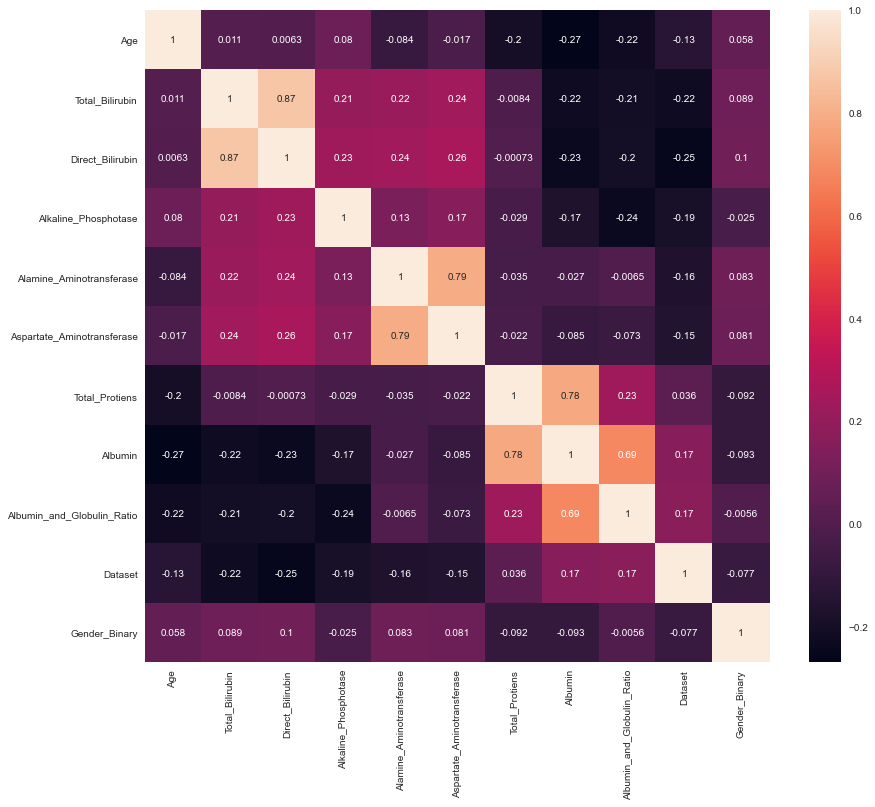

In [555]:
plt.figure(figsize=(14,12))  #Setting the size of figure to 14 by 12.
p=sns.heatmap(liver_df.corr(), annot=True) 

## Generating histogram plot as per the columns

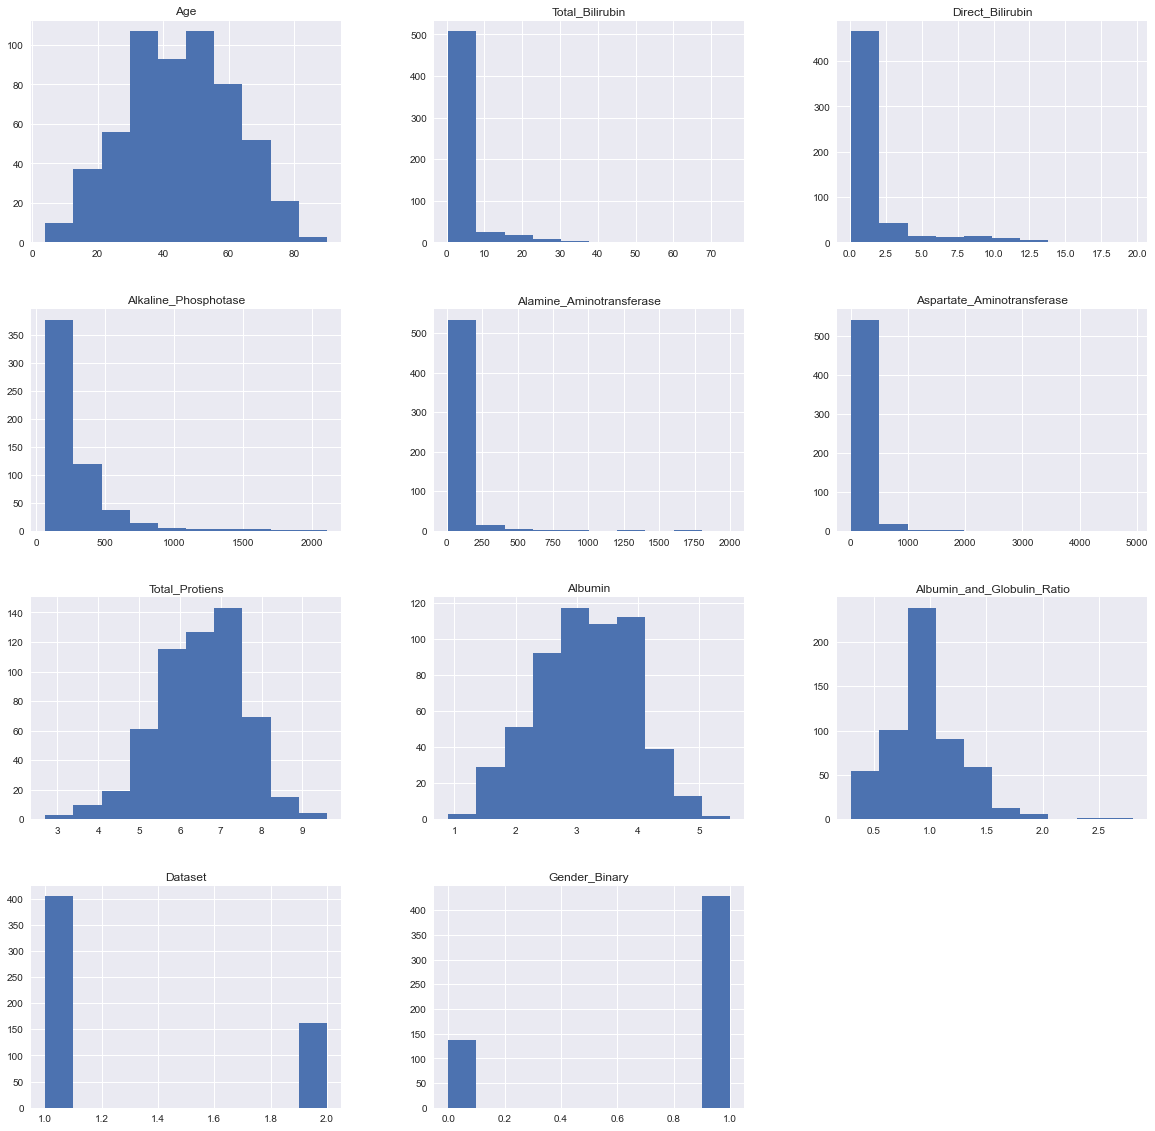

In [556]:
p = liver_df.hist(figsize = (20,20))

## Individual/Seperate histogram

### Histogram as per the age group

Text(0.5, 1.0, 'Histogram plot to represent the number of different age group of peoples')

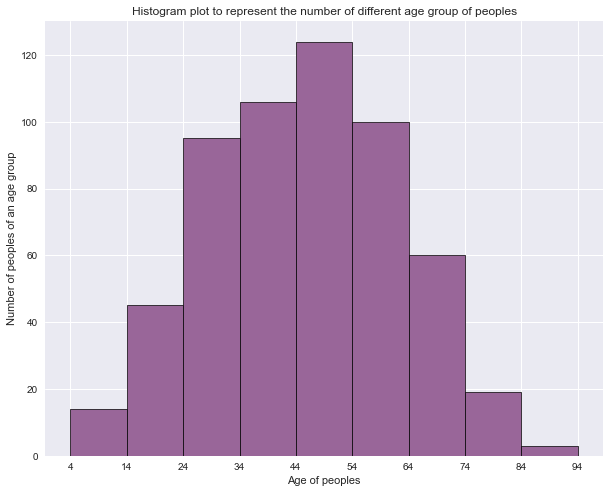

In [557]:
plt.figure(figsize=(10,8)) #Defining figure size
plt.hist(liver_df['Age'],
         edgecolor="black",
         linewidth=0.7,
         color="#996699",
         bins=[i for i in range(liver_df['Age'].unique().min(),liver_df['Age'].unique().max()+10,10)]) #defining data to be passed in histogram, and bins indicates details of bins required for histogram.
plt.xticks([i for i in range(liver_df['Age'].unique().min(),liver_df['Age'].unique().max()+10,10)]) #For defining values in x-axis
plt.xlabel("Age of peoples") #defining label for x-axis
plt.ylabel("Number of peoples of an age group") #defining label for y-axis
plt.title("Histogram plot to represent the number of different age group of peoples") #defining title for the figure

### Histogram regarding the rate of Alkaline Phosphotase 

Text(0.5, 1.0, 'Histogram plot to represent the rate of Alkaline Phosphotase among the peoples')

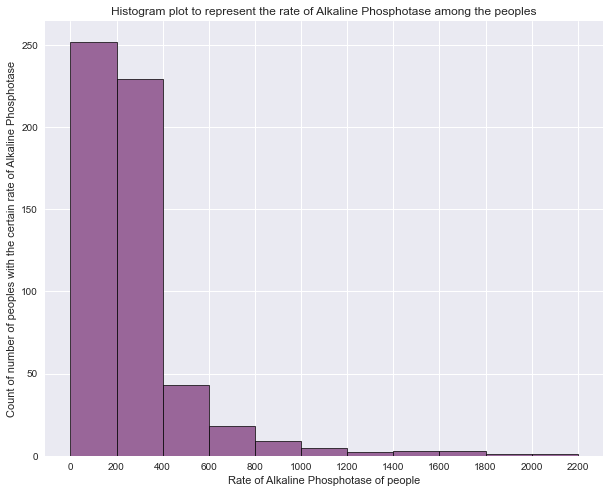

In [558]:
#liver_df['Alkaline_Phosphotase'].hist()
plt.figure(figsize=(10,8)) #Defining figure size
plt.hist(liver_df['Alkaline_Phosphotase'],
         edgecolor="black",
         linewidth=0.7,
         color="#996699",
         bins=[i for i in range(0,liver_df['Alkaline_Phosphotase'].unique().max()+200,200)]) #defining data to be passed in histogram, and bins indicates details of bins required for histogram.
plt.xticks([i for i in range(0,liver_df['Alkaline_Phosphotase'].unique().max()+200,200)]) #For defining values in x-axis
plt.xlabel("Rate of Alkaline Phosphotase of people") #defining label for x-axis
plt.ylabel("Count of number of peoples with the certain rate of Alkaline Phosphotase") #defining label for y-axis
plt.title("Histogram plot to represent the rate of Alkaline Phosphotase among the peoples") #defining title for the figure

### Histogram regarding the rate of Aspartate Aminotransferase

Text(0.5, 1.0, 'Histogram plot to represent the rate of Aspartate Aminotransferase among the peoples')

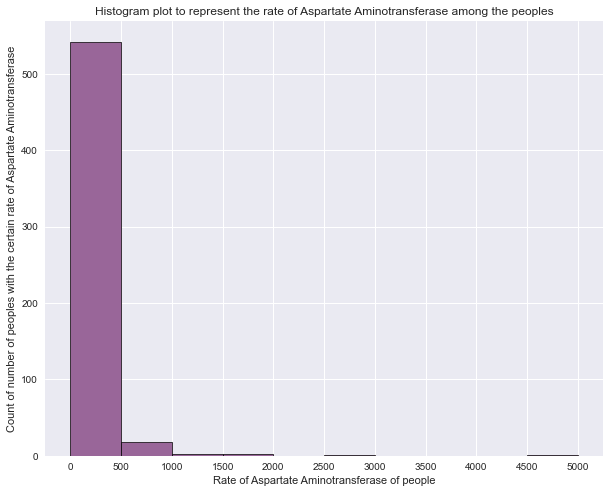

In [559]:
#liver_df['Aspartate_Aminotransferase'].hist()
plt.figure(figsize=(10,8)) #Defining figure size
plt.hist(liver_df['Aspartate_Aminotransferase'],
         edgecolor="black",
         linewidth=0.7,
         color="#996699",
         bins=[i for i in range(0,liver_df['Aspartate_Aminotransferase'].unique().max()+500,500)]) #defining data to be passed in histogram, and bins indicates details of bins required for histogram.
plt.xticks([i for i in range(0,liver_df['Aspartate_Aminotransferase'].unique().max()+500,500)]) #For defining values in x-axis
plt.xlabel("Rate of Aspartate Aminotransferase of people") #defining label for x-axis
plt.ylabel("Count of number of peoples with the certain rate of Aspartate Aminotransferase") #defining label for y-axis
plt.title("Histogram plot to represent the rate of Aspartate Aminotransferase among the peoples") #defining title for the figure

### Histogram regarding the rate of Alamine Aminotransferase

Text(0.5, 1.0, 'Histogram plot to represent the rate of Alamine Aminotransferase among the peoples')

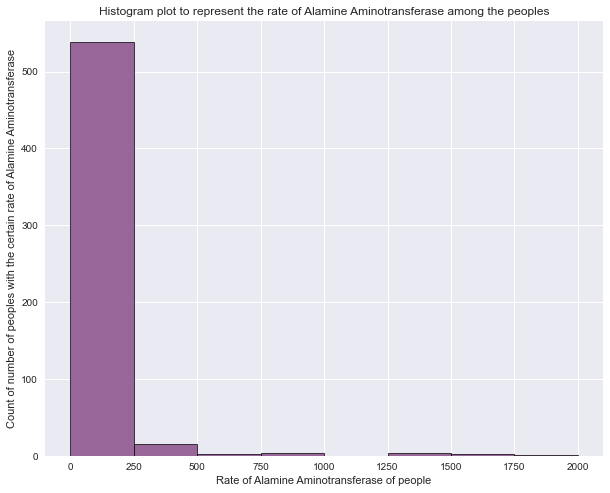

In [560]:
#liver_df['Alamine_Aminotransferase'].hist()
plt.figure(figsize=(10,8)) #Defining figure size
plt.hist(liver_df['Alamine_Aminotransferase'],
         edgecolor="black",
         linewidth=0.7,
         color="#996699",
         bins=[i for i in range(0,liver_df['Alamine_Aminotransferase'].unique().max()+250,250)]) #defining data to be passed in histogram, and bins indicates details of bins required for histogram.
plt.xticks([i for i in range(0,liver_df['Alamine_Aminotransferase'].unique().max()+250,250)]) #For defining values in x-axis
plt.xlabel("Rate of Alamine Aminotransferase of people") #defining label for x-axis
plt.ylabel("Count of number of peoples with the certain rate of Alamine Aminotransferase") #defining label for y-axis
plt.title("Histogram plot to represent the rate of Alamine Aminotransferase among the peoples") #defining title for the figure

### Histogram regarding the rate of Total Protiens 

Text(0.5, 1.0, 'Histogram plot to represent the rate of Total Protiens among the peoples')

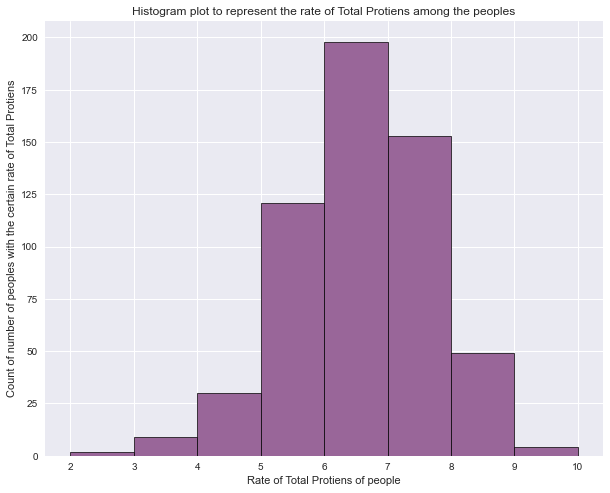

In [561]:
#liver_df['Total_Protiens'].hist()
plt.figure(figsize=(10,8)) #Defining figure size
plt.hist(liver_df['Total_Protiens'],
         edgecolor="black",
         linewidth=0.7,
         color="#996699",
         bins=[i for i in range(int(liver_df['Total_Protiens'].unique().min()),int(liver_df['Total_Protiens'].unique().max()+1)+1)]) #defining data to be passed in histogram, and bins indicates details of bins required for histogram.
plt.xticks([i for i in range(int(liver_df['Total_Protiens'].unique().min()),int(liver_df['Total_Protiens'].unique().max()+1)+1)]) #For defining values in x-axis
plt.xlabel("Rate of Total Protiens of people") #defining label for x-axis
plt.ylabel("Count of number of peoples with the certain rate of Total Protiens") #defining label for y-axis
plt.title("Histogram plot to represent the rate of Total Protiens among the peoples") #defining title for the figure

### Histogram regarding the rate of Albumin

Text(0.5, 1.0, 'Histogram plot to represent the rate of Albumin among the peoples')

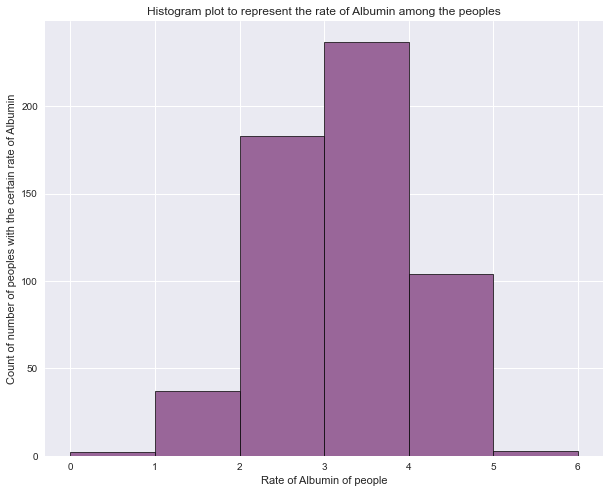

In [562]:
#liver_df['Albumin'].hist()
plt.figure(figsize=(10,8)) #Defining figure size
plt.hist(liver_df['Albumin'],
         edgecolor="black",
         linewidth=0.7,
         color="#996699",
         bins=[i for i in range(int(liver_df['Albumin'].unique().min()),int(liver_df['Albumin'].unique().max()+1)+1)]) #defining data to be passed in histogram, and bins indicates details of bins required for histogram.
plt.xticks([i for i in range(int(liver_df['Albumin'].unique().min()),int(liver_df['Albumin'].unique().max()+1)+1)]) #For defining values in x-axis
plt.xlabel("Rate of Albumin of people") #defining label for x-axis
plt.ylabel("Count of number of peoples with the certain rate of Albumin") #defining label for y-axis
plt.title("Histogram plot to represent the rate of Albumin among the peoples") #defining title for the figure

### Histogram regarding the rate of Albumin and Globulin Ratio

Text(0.5, 1.0, 'Histogram plot to represent the rate of Albumin and Globulin Ratio among the peoples')

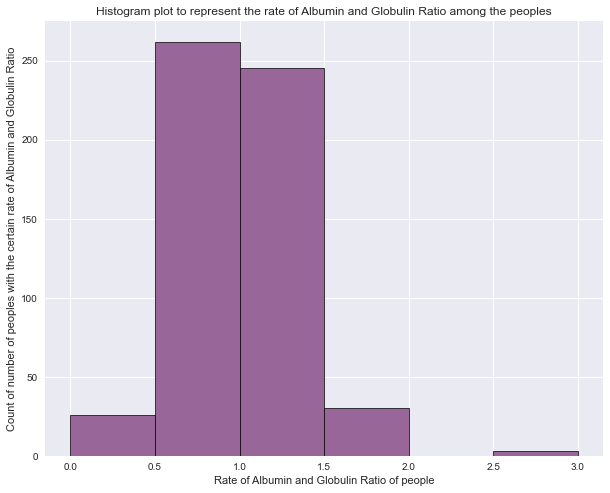

In [563]:
#liver_df['Albumin_and_Globulin_Ratio'].hist()
plt.figure(figsize=(10,8)) #Defining figure size
plt.hist(liver_df['Albumin_and_Globulin_Ratio'],
         edgecolor="black",
         linewidth=0.7,
         color="#996699",
         bins=[i/2 for i in range(int(liver_df['Albumin_and_Globulin_Ratio'].unique().min()),int(liver_df['Albumin_and_Globulin_Ratio'].unique().max())*2+3)]) #defining data to be passed in histogram, and bins indicates details of bins required for histogram.
plt.xticks([i/2 for i in range(int(liver_df['Albumin_and_Globulin_Ratio'].unique().min()),int(liver_df['Albumin_and_Globulin_Ratio'].unique().max())*2+3)]) #For defining values in x-axis
plt.xlabel("Rate of Albumin and Globulin Ratio of people") #defining label for x-axis
plt.ylabel("Count of number of peoples with the certain rate of Albumin and Globulin Ratio") #defining label for y-axis
plt.title("Histogram plot to represent the rate of Albumin and Globulin Ratio among the peoples") #defining title for the figure

### Histogram regarding the rate of Total Bilirubin

Text(0.5, 1.0, 'Histogram plot to represent the rate of Total Bilirubin among the peoples')

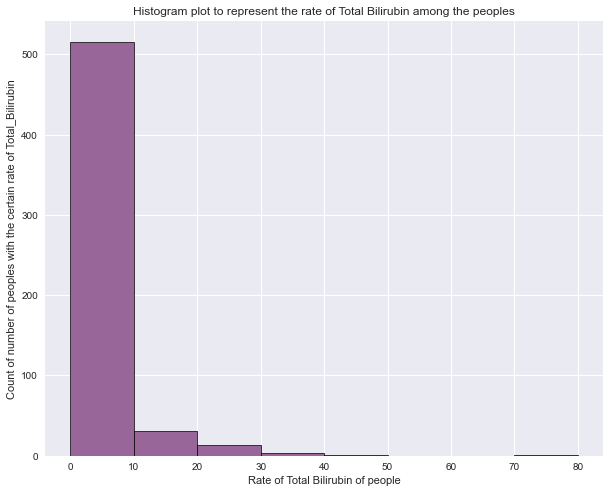

In [564]:
#liver_df['Total_Bilirubin'].hist()
plt.figure(figsize=(10,8)) #Defining figure size
plt.hist(liver_df['Total_Bilirubin'],
         edgecolor="black",
         linewidth=0.7,
         color="#996699",
         bins=[i for i in range(int(liver_df['Total_Bilirubin'].unique().min()),int(liver_df['Total_Bilirubin'].unique().max())+10,10)]) #defining data to be passed in histogram, and bins indicates details of bins required for histogram.
plt.xticks([i for i in range(int(liver_df['Total_Bilirubin'].unique().min()),int(liver_df['Total_Bilirubin'].unique().max())+10,10)]) #For defining values in x-axis
plt.xlabel("Rate of Total Bilirubin of people") #defining label for x-axis
plt.ylabel("Count of number of peoples with the certain rate of Total_Bilirubin") #defining label for y-axis
plt.title("Histogram plot to represent the rate of Total Bilirubin among the peoples") #defining title for the figure

### Histogram regarding the rate of Direct_Bilirubin

Text(0.5, 1.0, 'Histogram plot to represent the rate of Direct Bilirubin among the peoples')

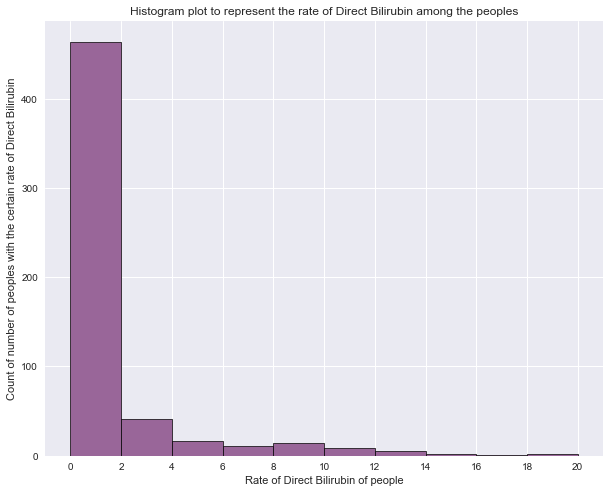

In [565]:
#liver_df['Direct_Bilirubin'].hist()
plt.figure(figsize=(10,8)) #Defining figure size
plt.hist(liver_df['Direct_Bilirubin'],
         edgecolor="black",
         linewidth=0.7,
         color="#996699",
         bins=[i for i in range(int(liver_df['Direct_Bilirubin'].unique().min()),int(liver_df['Direct_Bilirubin'].unique().max())+2,2)]) #defining data to be passed in histogram, and bins indicates details of bins required for histogram.
plt.xticks([i for i in range(int(liver_df['Direct_Bilirubin'].unique().min()),int(liver_df['Direct_Bilirubin'].unique().max())+2,2)]) #For defining values in x-axis
plt.xlabel("Rate of Direct Bilirubin of people") #defining label for x-axis
plt.ylabel("Count of number of peoples with the certain rate of Direct Bilirubin") #defining label for y-axis
plt.title("Histogram plot to represent the rate of Direct Bilirubin among the peoples") #defining title for the figure

# Data Visualization

## Total number of male and female present in the dataset

Text(0.5, 1.0, 'Pie-chart representing number of male and female present in the dataset')

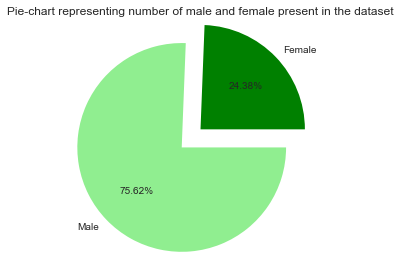

In [566]:
#liver_df.groupby('Gender')['Gender'].count()
plt.pie(liver_df.groupby('Gender')['Gender'].count(), 
        explode=[0,0.3], 
        labels=liver_df.groupby('Gender')['Gender'].count().index,
        colors=["#008000","#90ee90"],
        autopct="%.2f%%",
        radius=1.2,
       )#grouping data as per the gender and counting the number of data as per gender for plotting a pie-chart 
plt.title("Pie-chart representing number of male and female present in the dataset") #defining title for the figure

## Total number of patients with liver diseases and without liver disease in the dataset

Text(0.5, 1.0, 'Pie-chart representing number of patients with liver diseases and without liver disease in the dataset')

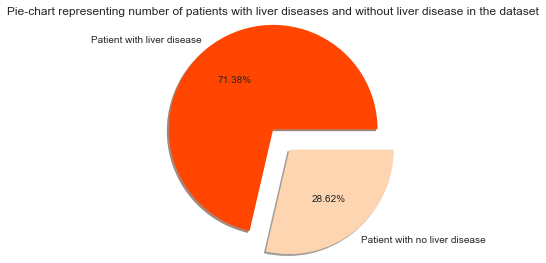

In [567]:
#liver_df.groupby('Dataset')['Dataset'].count()
plt.pie(liver_df.groupby('Dataset_Details')['Dataset_Details'].count(), 
        explode=[0,0.3], 
        labels=liver_df.groupby('Dataset_Details')['Dataset_Details'].count().index,
        colors=["#ff4500","#fdd5b1"],
        autopct="%.2f%%",
        radius=1.2,
        shadow = True
       )#grouping data as per the dataset column and counting the number of data as per dataset column for plotting a pie-chart 
plt.title("Pie-chart representing number of patients with liver diseases and without liver disease in the dataset") #defining title for the figure

In [568]:
#liver_df.groupby('Dataset')['Dataset'].count()
'''plt.pie(liver_df.groupby('Dataset')['Dataset'].count(), 
        explode=[0,0.3], 
        labels=liver_df.groupby('Dataset')['Dataset'].count().index,
        colors=["#996699","#ff9999"],
        autopct="%.2f%%",
        radius=1.2,
        shadow = True
       )#grouping data as per the dataset column and counting the number of data as per dataset column for plotting a pie-chart 
plt.title("Pie-chart representing number of patients with liver diseases and without liver disease in the dataset") #defining title for the figure'''

'plt.pie(liver_df.groupby(\'Dataset\')[\'Dataset\'].count(), \n        explode=[0,0.3], \n        labels=liver_df.groupby(\'Dataset\')[\'Dataset\'].count().index,\n        colors=["#996699","#ff9999"],\n        autopct="%.2f%%",\n        radius=1.2,\n        shadow = True\n       )#grouping data as per the dataset column and counting the number of data as per dataset column for plotting a pie-chart \nplt.title("Pie-chart representing number of patients with liver diseases and without liver disease in the dataset") #defining title for the figure'

## Patients with liver diseases and without liver disease as per gender

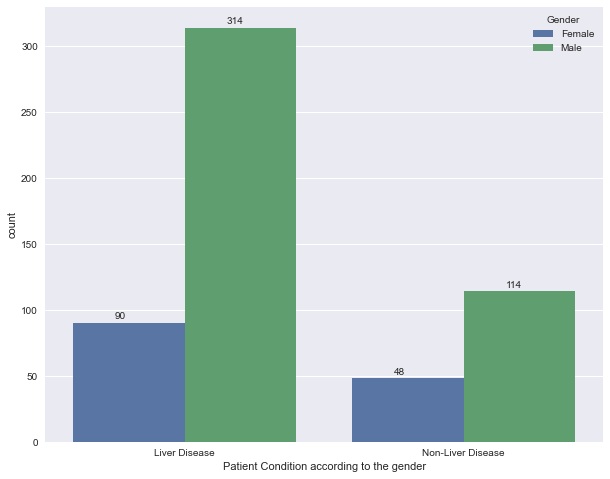

In [569]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = liver_df['Dataset'].apply(lambda x:'Liver Disease' if x == 1 else 'Non-Liver Disease'), hue=liver_df['Gender'])
ax.set_xlabel('Patient Condition according to the gender')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+0.15, p.get_height()+3))

## Patients with and without liver disease according to the age

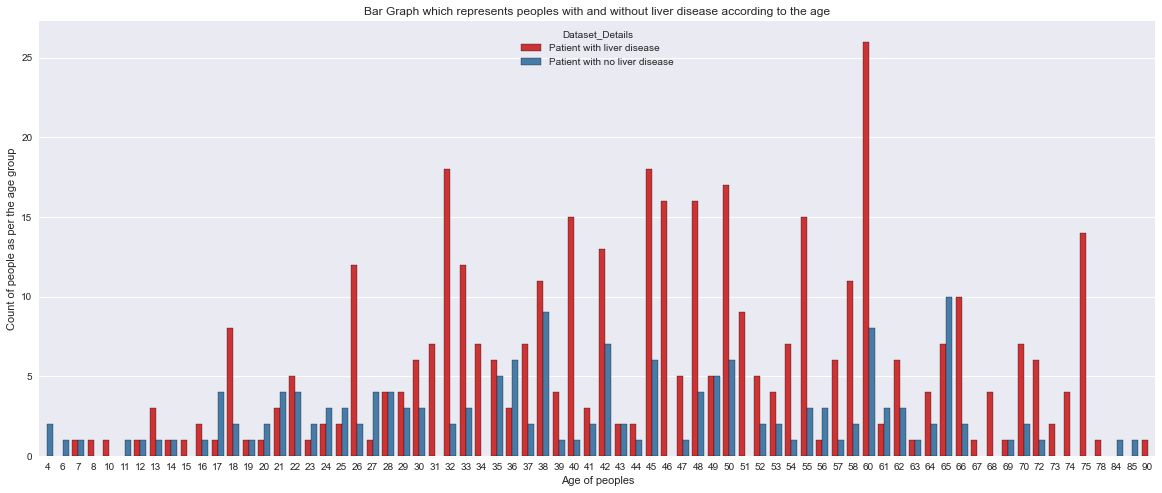

In [570]:
plt.figure(figsize=(20,8)) #Defining figure size
patient_age_disease=sns.countplot(x='Age', data=liver_df, hue="Dataset_Details",palette="Set1",edgecolor="black") #passing the unique value of Age in x axis and representing the total count of each value in y axis with hue which represents patients with and without liver disease
patient_age_disease.set(xlabel="Age of peoples",ylabel="Count of people as per the age group") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel
patient_age_disease.set_title("Bar Graph which represents peoples with and without liver disease according to the age") #defining title for the figure
plt.show()

## Top 10 age group patients having liver disease

In [571]:
#liver_df[liver_df['Dataset']==1].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
topTenAgeGroupLD = liver_df[liver_df['Dataset']==1].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head(10) #extracting data which consists of patients with liver disease then, the data is counted and sorted in ascending order to extract only first 10 rows
topTenAgeGroupLD

Age  Count
50   60     26
23   32     18
36   45     18
41   50     17
37   46     16
39   48     16
31   40     15
46   55     15
64   75     14
33   42     13

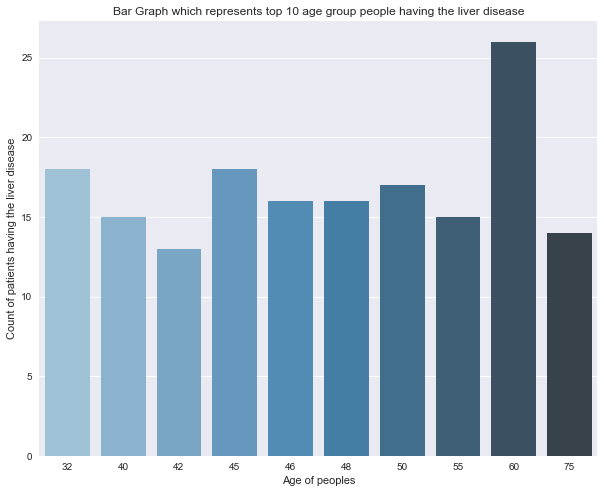

In [572]:
plt.figure(figsize=(10,8)) #Defining figure size
barGraphTopTenAgeLD = sns.barplot(x = 'Age',y = 'Count', data = topTenAgeGroupLD, palette="Blues_d")
barGraphTopTenAgeLD.set(xlabel="Age of peoples",ylabel="Count of patients having the liver disease") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel
barGraphTopTenAgeLD.set_title("Bar Graph which represents top 10 age group people having the liver disease") #defining title for the figure
plt.show()

In [573]:
#topTenAgeGroupLiverDisease["Count"].tolist()

## Top 10 age group patients who do not have the liver disease

In [574]:
#liver_df[liver_df['Dataset']==1].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
topTenAgeGroupNonLD = liver_df[liver_df['Dataset']==2].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head(10) #extracting data which consists of patients without liver disease then, the data is counted and sorted in ascending order to extract only first 10 rows
topTenAgeGroupNonLD

Age  Count
51   65     10
27   38      9
46   60      8
31   42      7
34   45      6
25   36      6
38   50      6
37   49      5
24   35      5
8    17      4

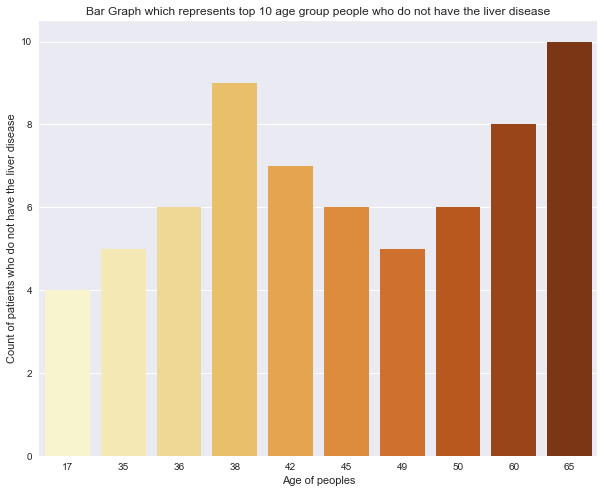

In [575]:
plt.figure(figsize=(10,8)) #Defining figure size
barGraphTopTenAgeNonLD = sns.barplot(x = 'Age',y = 'Count', data = topTenAgeGroupNonLD, palette="YlOrBr")
barGraphTopTenAgeNonLD.set(xlabel="Age of peoples",ylabel="Count of patients who do not have the liver disease") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel
barGraphTopTenAgeNonLD.set_title("Bar Graph which represents top 10 age group people who do not have the liver disease") #defining title for the figure
plt.show()

## Top 10 age group patients having liver disease VS Top 10 age group patients who do not have the liver disease

Text(0.5, 0.98, 'Bar Graph of top 10 count of patients with and without the liver disease as per the age group')

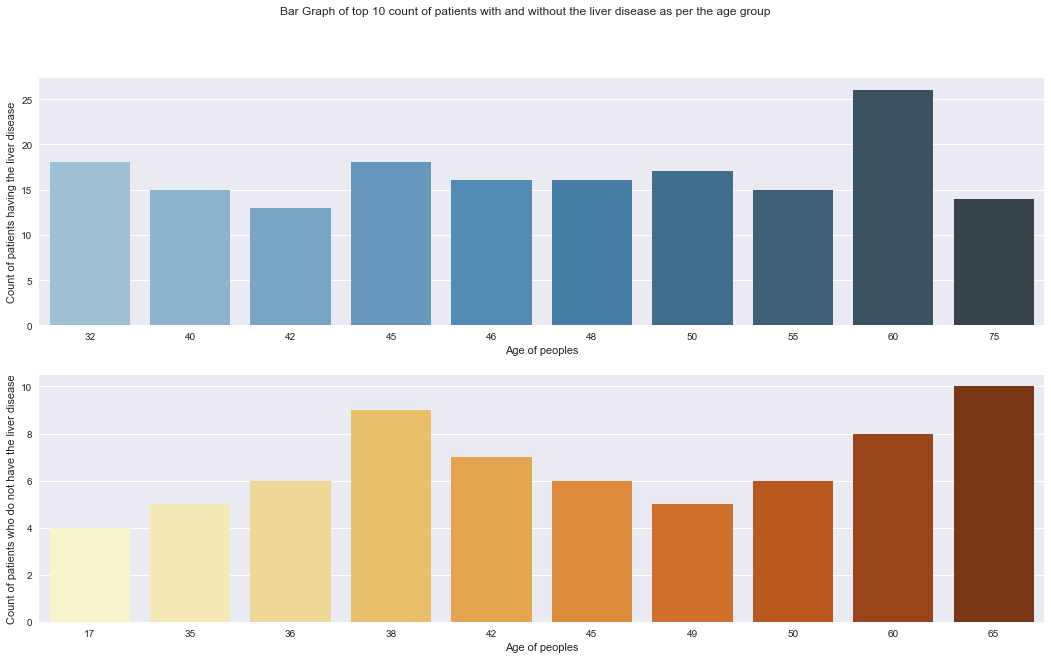

In [576]:
f, axes = plt.subplots(2, 1, figsize=(18,10)) #creating a subplot which comprises of 1 row and 2 columns

barGraphTopTenAgeLD = sns.barplot(x = 'Age',y = 'Count', data = topTenAgeGroupLD, ax=axes[0], palette="Blues_d")
barGraphTopTenAgeLD.set(xlabel="Age of peoples",ylabel="Count of patients having the liver disease") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel

barGraphTopTenAgeNonLD = sns.barplot(x = 'Age',y = 'Count', data = topTenAgeGroupNonLD, ax=axes[1], palette="YlOrBr")
barGraphTopTenAgeNonLD.set(xlabel="Age of peoples",ylabel="Count of patients who do not have the liver disease") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel

plt.suptitle('Bar Graph of top 10 count of patients with and without the liver disease as per the age group') #defining title for the subplots

## Top 20 lowest count of age group patients having the liver disease

In [577]:
#liver_df[liver_df['Dataset']==1].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
topTwentyLeastAgeLD = liver_df[liver_df['Dataset']==1].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).tail(20) #extracting data which consists of patients with liver disease then, the data is counted and sorted in ascending order to extract only last 20 rows
topTwentyLeastAgeLD

Age  Count
35   44      2
34   43      2
51   61      2
57   67      1
65   78      1
59   69      1
0     7      1
53   63      1
47   56      1
1     8      1
18   27      1
14   23      1
11   20      1
10   19      1
8    17      1
6    15      1
5    14      1
3    12      1
2    10      1
66   90      1

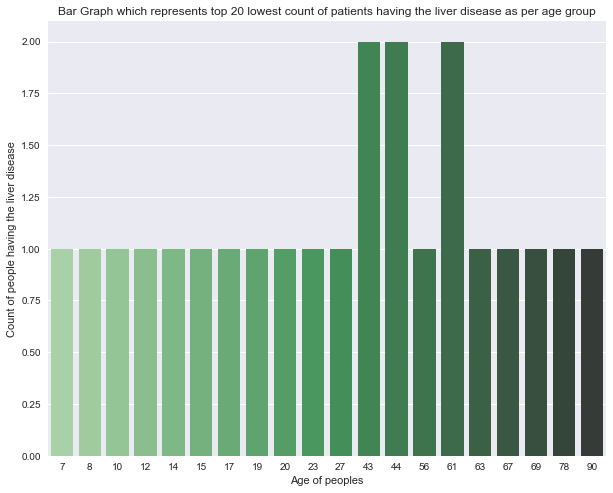

In [578]:
plt.figure(figsize=(10,8)) #Defining figure size
barGraphTopLeastTwentyAgeLD = sns.barplot(x = 'Age',y = 'Count', data = topTwentyLeastAgeLD, palette="Greens_d")
barGraphTopLeastTwentyAgeLD.set(xlabel="Age of peoples",ylabel="Count of people having the liver disease") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel
barGraphTopLeastTwentyAgeLD.set_title("Bar Graph which represents top 20 lowest count of patients having the liver disease as per age group") #defining title for the figure
plt.show()

## Top 20 lowest count of paitents without the liver disease as per age group

In [579]:
#liver_df[liver_df['Dataset']==1].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
topTwentyLeastAgeNonLD = liver_df[liver_df['Dataset']==2].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).tail(20) #extracting data which consists of patients without liver disease then, the data is counted and sorted in ascending order to extract only last 20 rows
topTwentyLeastAgeNonLD

Age  Count
22   32      2
49   63      1
44   57      1
53   69      1
55   72      1
56   84      1
29   40      1
41   54      1
35   47      1
33   44      1
1     6      1
28   39      1
10   19      1
7    16      1
6    14      1
5    13      1
4    12      1
3    11      1
2     7      1
57   85      1

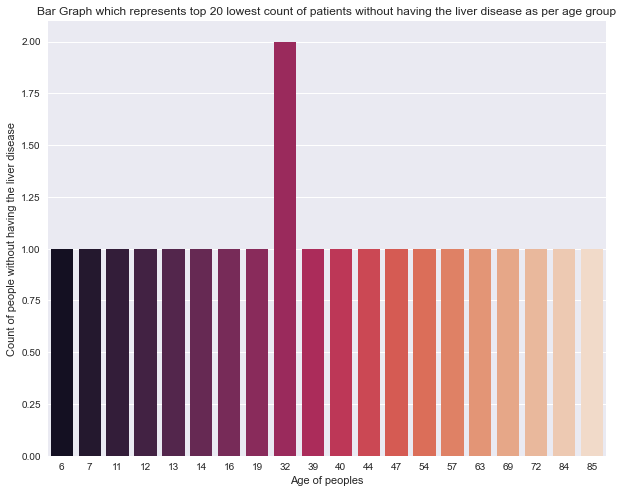

In [580]:
plt.figure(figsize=(10,8)) #Defining figure size
barGraphTopTwentyLeastAgeNonLD = sns.barplot(x = 'Age',y = 'Count', data = topTwentyLeastAgeNonLD, palette="rocket")
barGraphTopTwentyLeastAgeNonLD.set(xlabel="Age of peoples",ylabel="Count of people without having the liver disease") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel
barGraphTopTwentyLeastAgeNonLD.set_title("Bar Graph which represents top 20 lowest count of patients without having the liver disease as per age group") #defining title for the figure
plt.show()

## Top 20 lowest count of age group patients having the liver disease VS Top 20 lowest count of paitents without the liver disease as per age group

Text(0.5, 0.98, 'Bar Graph of top 20 lowest count of patients with and without the liver disease as per the age group')

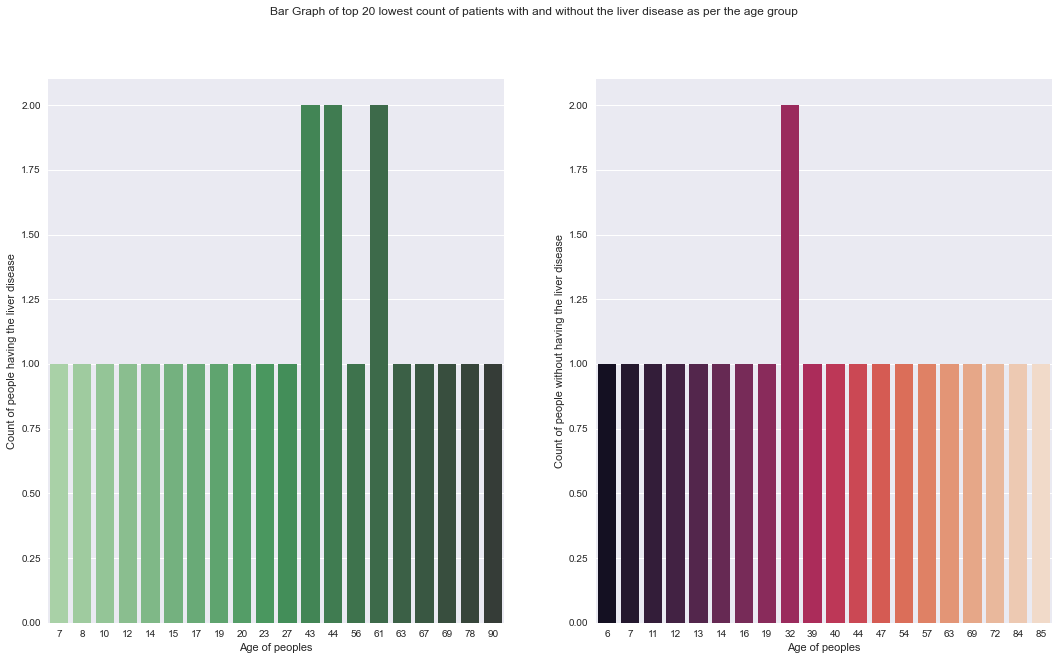

In [581]:
f, axes = plt.subplots(1, 2, figsize=(18,10)) #creating a subplot which comprises of 1 row and 2 columns

barGraphTopLeastTwentyAgeLD = sns.barplot(x = 'Age',y = 'Count', ax=axes[0], data = topTwentyLeastAgeLD, palette="Greens_d")
barGraphTopLeastTwentyAgeLD.set(xlabel="Age of peoples",ylabel="Count of people having the liver disease") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel

barGraphTopTwentyLeastAgeNonLD = sns.barplot(x = 'Age',y = 'Count', ax=axes[1], data = topTwentyLeastAgeNonLD, palette="rocket")
barGraphTopTwentyLeastAgeNonLD.set(xlabel="Age of peoples",ylabel="Count of people without having the liver disease") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel

plt.suptitle('Bar Graph of top 20 lowest count of patients with and without the liver disease as per the age group') #defining title for the subplots

## Further analysis and Data visualization

<p>Note:</p>
    <ul>
        <li>1 represents Normal level</li>
        <li>0 represents Not Normal level</li>
    </ul>

### Further analysis and Data Visualization on Total Bilirubin

#### Creating function as per the recommended rate of Total Bilirubin       

In [582]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         566 non-null    int64  
 1   Gender                      566 non-null    object 
 2   Total_Bilirubin             566 non-null    float64
 3   Direct_Bilirubin            566 non-null    float64
 4   Alkaline_Phosphotase        566 non-null    int64  
 5   Alamine_Aminotransferase    566 non-null    int64  
 6   Aspartate_Aminotransferase  566 non-null    int64  
 7   Total_Protiens              566 non-null    float64
 8   Albumin                     566 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     566 non-null    int64  
 11  Dataset_Details             566 non-null    object 
 12  Gender_Binary               566 non-null    int64  
dtypes: float64(5), int64(6), object(2)


In [583]:
liver_df['Total_Bilirubin'] #extracting the values of selected columns from dataframe

0       0.7
1      10.9
2       7.3
3       1.0
4       3.9
       ... 
561     0.5
562     0.6
563     0.8
564     1.3
565     1.0
Name: Total_Bilirubin, Length: 566, dtype: float64

In [584]:
#Creating a function to provide 1 value to normal total bilirubin rate and 0 to not normal total bilrubin rate
def binary_total_bilirubin(total_bilirubin):
    if total_bilirubin>=0.4 and total_bilirubin<=1:
        return 1
    else:
        return 0

In [585]:
liver_df['Total_Bilirubin_Binary'] = liver_df['Total_Bilirubin'].apply(binary_total_bilirubin) #Implementing the developed function and creating a new column as per the defined logic

In [586]:
liver_df[['Total_Bilirubin','Total_Bilirubin_Binary']] #extracting the values of selected columns from dataframe

Total_Bilirubin  Total_Bilirubin_Binary
0                0.7                       1
1               10.9                       0
2                7.3                       0
3                1.0                       1
4                3.9                       0
..               ...                     ...
561              0.5                       1
562              0.6                       1
563              0.8                       1
564              1.3                       0
565              1.0                       1

[566 rows x 2 columns]

In [587]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         566 non-null    int64  
 1   Gender                      566 non-null    object 
 2   Total_Bilirubin             566 non-null    float64
 3   Direct_Bilirubin            566 non-null    float64
 4   Alkaline_Phosphotase        566 non-null    int64  
 5   Alamine_Aminotransferase    566 non-null    int64  
 6   Aspartate_Aminotransferase  566 non-null    int64  
 7   Total_Protiens              566 non-null    float64
 8   Albumin                     566 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     566 non-null    int64  
 11  Dataset_Details             566 non-null    object 
 12  Gender_Binary               566 non-null    int64  
 13  Total_Bilirubin_Binary      566 non

In [588]:
#Creating a function for determining normal total bilirubin rate
def desc_total_bilirubin(total_bilirubin):
    if total_bilirubin>=0.4 and total_bilirubin<=1:
        return "Normal"
    else:
        return "Not in Normal Range"

In [589]:
liver_df['Total_Bilirubin_Description'] = liver_df['Total_Bilirubin'].apply(desc_total_bilirubin) #Implementing the developed function and creating a new column as per the defined logic

In [590]:
liver_df[['Total_Bilirubin','Total_Bilirubin_Binary','Total_Bilirubin_Description']] #extracting the values of selected columns from dataframe

Total_Bilirubin  Total_Bilirubin_Binary Total_Bilirubin_Description
0                0.7                       1                      Normal
1               10.9                       0         Not in Normal Range
2                7.3                       0         Not in Normal Range
3                1.0                       1                      Normal
4                3.9                       0         Not in Normal Range
..               ...                     ...                         ...
561              0.5                       1                      Normal
562              0.6                       1                      Normal
563              0.8                       1                      Normal
564              1.3                       0         Not in Normal Range
565              1.0                       1                      Normal

[566 rows x 3 columns]

In [591]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          566 non-null    int64  
 1   Gender                       566 non-null    object 
 2   Total_Bilirubin              566 non-null    float64
 3   Direct_Bilirubin             566 non-null    float64
 4   Alkaline_Phosphotase         566 non-null    int64  
 5   Alamine_Aminotransferase     566 non-null    int64  
 6   Aspartate_Aminotransferase   566 non-null    int64  
 7   Total_Protiens               566 non-null    float64
 8   Albumin                      566 non-null    float64
 9   Albumin_and_Globulin_Ratio   566 non-null    float64
 10  Dataset                      566 non-null    int64  
 11  Dataset_Details              566 non-null    object 
 12  Gender_Binary                566 non-null    int64  
 13  Total_Bilirubin_Bina

#### Peoples as per the age whose Total Bilirubin is not in the the recommended level 

In [592]:
liver_df[liver_df['Total_Bilirubin_Description']=='Not in Normal Range'].groupby('Age')['Total_Bilirubin_Binary'].count()

Age
7      1
13     1
14     1
16     2
18     3
19     1
20     2
21     2
22     5
23     2
24     1
26     8
27     1
29     1
30     2
31     2
32    13
33    10
34     5
35     4
36     4
37     3
38    10
39     4
40     9
41     3
42     8
43     2
44     1
45    14
46    10
47     3
48     9
49     4
50    12
51     4
52     2
53     2
54     5
55    10
56     2
57     4
58     4
60    27
61     1
62     6
64     4
65     6
66     7
67     1
68     1
70     6
72     3
73     2
74     1
75     9
90     1
Name: Total_Bilirubin_Binary, dtype: int64

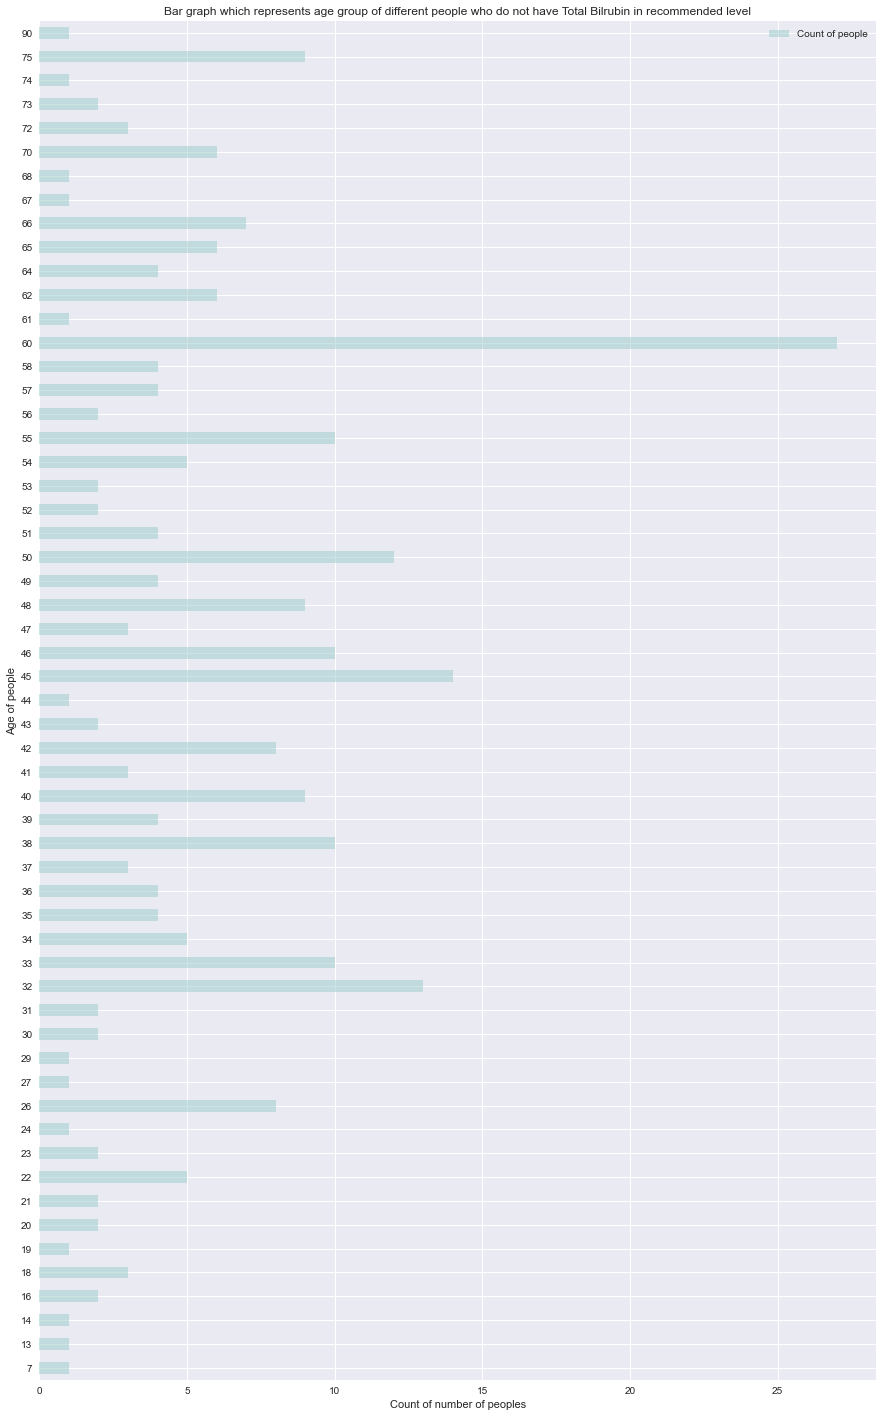

In [593]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Total_Bilirubin_Description']=='Not in Normal Range'].groupby('Age')['Total_Bilirubin_Binary'].count().plot(kind="barh",
                                                                                                                               label="Count of people",
                                                                                                                               color="#99cccc",
                                                                                                                               alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents age group of different people who do not have Total Bilrubin in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Top 10 age group people having Total Bilrubin in not recommended level

In [594]:
#liver_df[liver_df['Dataset']==1].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
topTenTotalBilrubinNN = liver_df[liver_df['Total_Bilirubin_Description']=='Not in Normal Range'].groupby('Age')['Total_Bilirubin_Binary'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head(10) #extracting data which consists of patients without liver disease then, the data is counted and sorted in ascending order to extract only first 10 rows
topTenTotalBilrubinNN

Age  Count
43   60     27
29   45     14
16   32     13
34   50     12
39   55     10
30   46     10
22   38     10
17   33     10
24   40      9
55   75      9

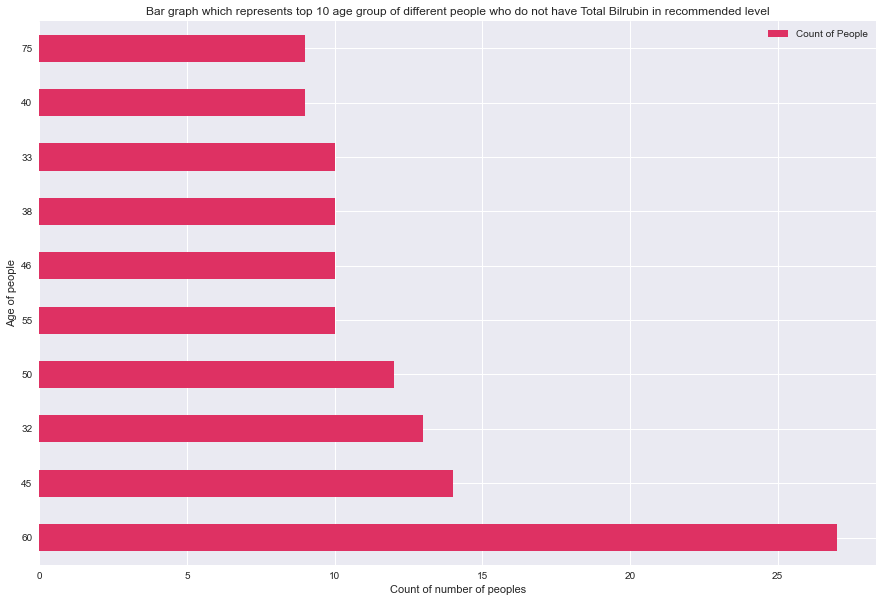

In [595]:
topTenTotalBilrubinNN.plot.barh(x='Age', y='Count',figsize=(15,10),color="#DE3163", label="Count of People")
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents top 10 age group of different people who do not have Total Bilrubin in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Peoples as per the age having normal Total Bilirubin level

In [596]:
liver_df[liver_df['Total_Bilirubin_Description']=='Normal'].groupby('Age')['Total_Bilirubin_Binary'].count()

Age
4     2
6     1
7     1
8     1
10    1
     ..
74    3
75    5
78    1
84    1
85    1
Name: Total_Bilirubin_Binary, Length: 69, dtype: int64

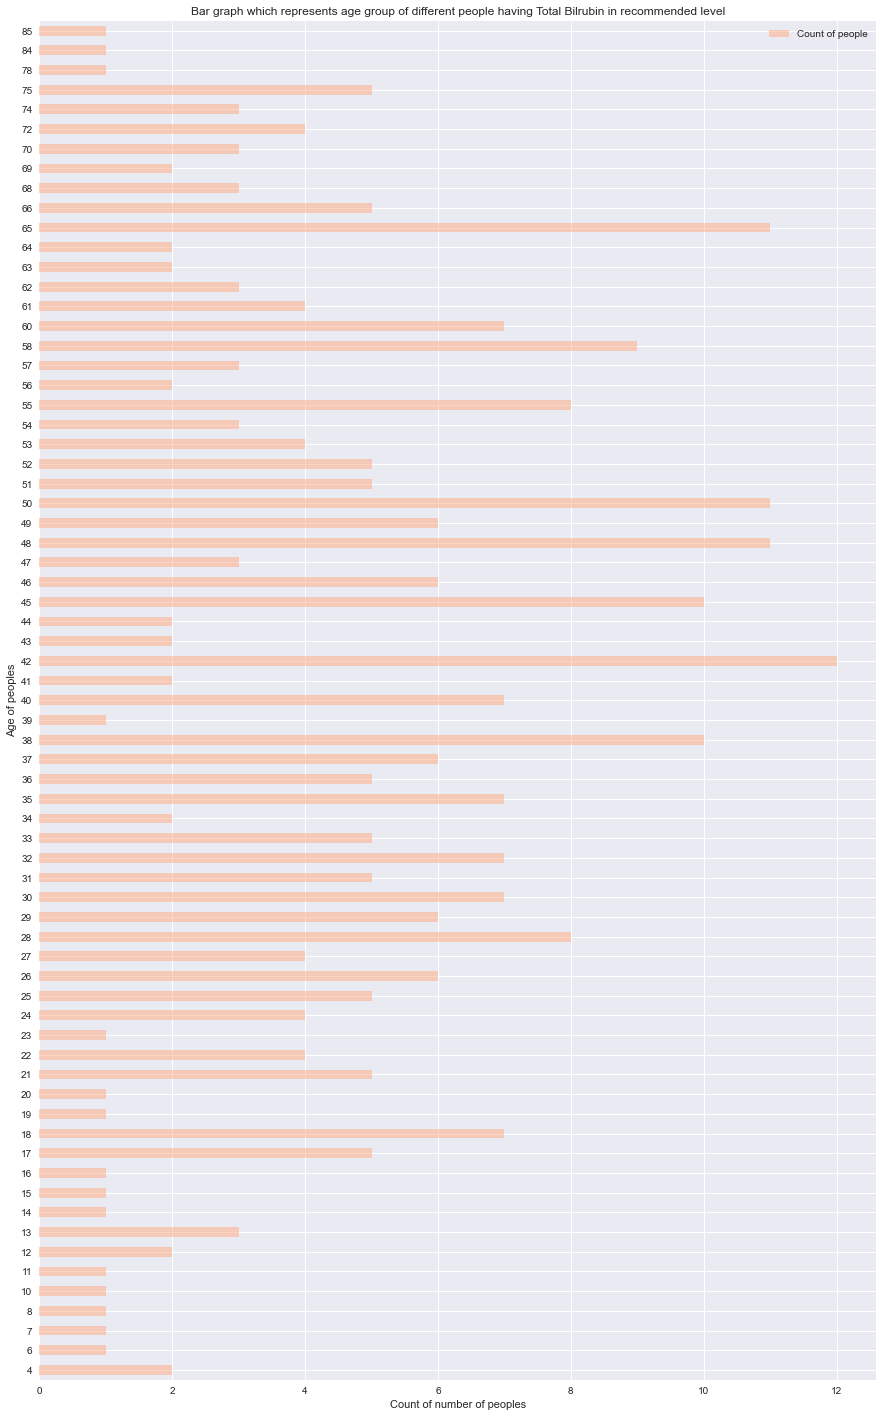

In [597]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Total_Bilirubin_Description']=='Normal'].groupby('Age')['Total_Bilirubin_Binary'].count().plot(kind="barh",
                                                                                                                  label="Count of people", 
                                                                                                                  color="#ffa97e",
                                                                                                                  alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of peoples") #defining label for y-axis
plt.title("Bar graph which represents age group of different people having Total Bilrubin in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### People having Total Bilirubin not in recommended level as per the gender

In [598]:
liver_df[liver_df['Total_Bilirubin_Description']=='Not in Normal Range'].groupby('Gender')['Total_Bilirubin_Binary'].count()

Gender
Female     36
Male      235
Name: Total_Bilirubin_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Total Builirubin in recommended level as per the gender')

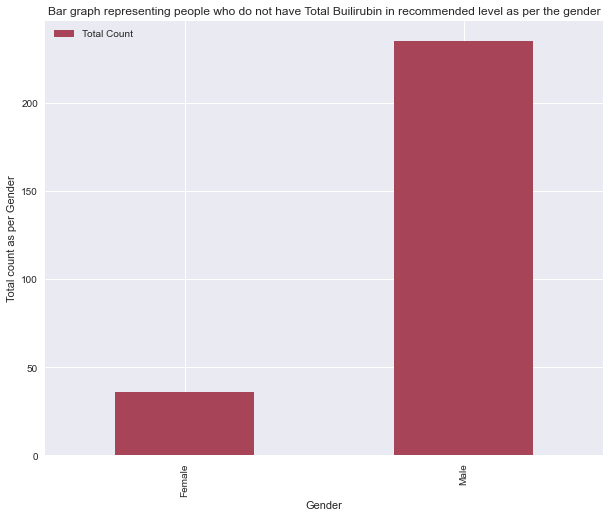

In [599]:
total_Bilirubin_not_normal=liver_df[liver_df['Total_Bilirubin_Description']=='Not in Normal Range'].groupby('Gender')['Total_Bilirubin_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#a74458",
                                                                                                                                  label="Total Count")
total_Bilirubin_not_normal.legend() #for placing a legend on the axes
total_Bilirubin_not_normal.set_xlabel("Gender") #defining label for x-axis
total_Bilirubin_not_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
total_Bilirubin_not_normal.set_title("Bar graph representing people who do not have Total Builirubin in recommended level as per the gender") #defining title for the figure

#### Peoples having normal Total Bilirubin level as per the gender

In [600]:
liver_df[liver_df['Total_Bilirubin_Description']=='Normal'].groupby('Gender')['Total_Bilirubin_Binary'].count()

Gender
Female    102
Male      193
Name: Total_Bilirubin_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Total Builirubin in recommended level as per the gender')

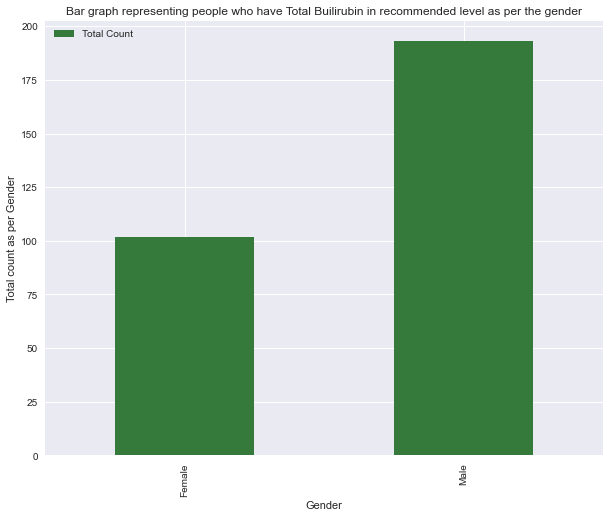

In [601]:
total_Bilirubin_normal=liver_df[liver_df['Total_Bilirubin_Description']=='Normal'].groupby('Gender')['Total_Bilirubin_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#35793b",
                                                                                                                                  label="Total Count")
total_Bilirubin_normal.legend() #for placing a legend on the axes
total_Bilirubin_normal.set_xlabel("Gender") #defining label for x-axis
total_Bilirubin_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
total_Bilirubin_normal.set_title("Bar graph representing people who have Total Builirubin in recommended level as per the gender") #defining title for the figure

In [602]:
liver_df

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
561   60    Male              0.5               0.1                   500   
562   40    Male              0.6               0.1                    98   
563   52    Male              0.8               0.2                   245   
564   31    Male              1.3               0.5                   184   
565   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
561                        20                          34             5.9   
562                        35                          31             6.0   
563                        48                          49             6.4   
564                        29                          32             6.8   
565                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  \
0        3.3                        0.90        1   
1        3.2                        0.74        1   
2        3.3                        0.89        1   
3        3.4                        1.00        1   
4        2.4                        0.40        1   
..       ...                         ...      ...   
561      1.6                        0.37        2   
562      3.2                        1.10        1   
563      3.2                        1.00        1   
564      3.4                        1.00        1   
565      4.4                        1.50        2   

                   Dataset_Details  Gender_Binary  Total_Bilirubin_Binary  \
0       Patient with liver disease              0                       1   
1       Patient with liver disease              1                       0   
2       Patient with liver disease              1                       0   
3       Patient with liver disease              1                       1   
4       Patient with liver disease              1                       0   
..                             ...            ...                     ...   
561  Patient with no liver disease              1                       1   
562     Patient with liver disease              1                       1   
563     Patient with liver disease              1                       1   
564     Patient with liver disease              1                       0   
565  Patient with no liver disease              1                       1   

    Total_Bilirubin_Description  
0                        Normal  
1           Not in Normal Range  
2           Not in Normal Range  
3                        Normal  
4           Not in Normal Range  
..                          ...  
561                      Normal  
562                      Normal  
563                      Normal  
564         Not in Normal Range  
565                      Normal  

[566 rows x 15 columns]

#### Normal level Total Bilrubin vs Total Bilrubin not in normal level as per the gender

Text(0.5, 0.98, 'Bar graph of Normal level Total Bilrubin vs Total Bilrubin not in normal level as per the gender')

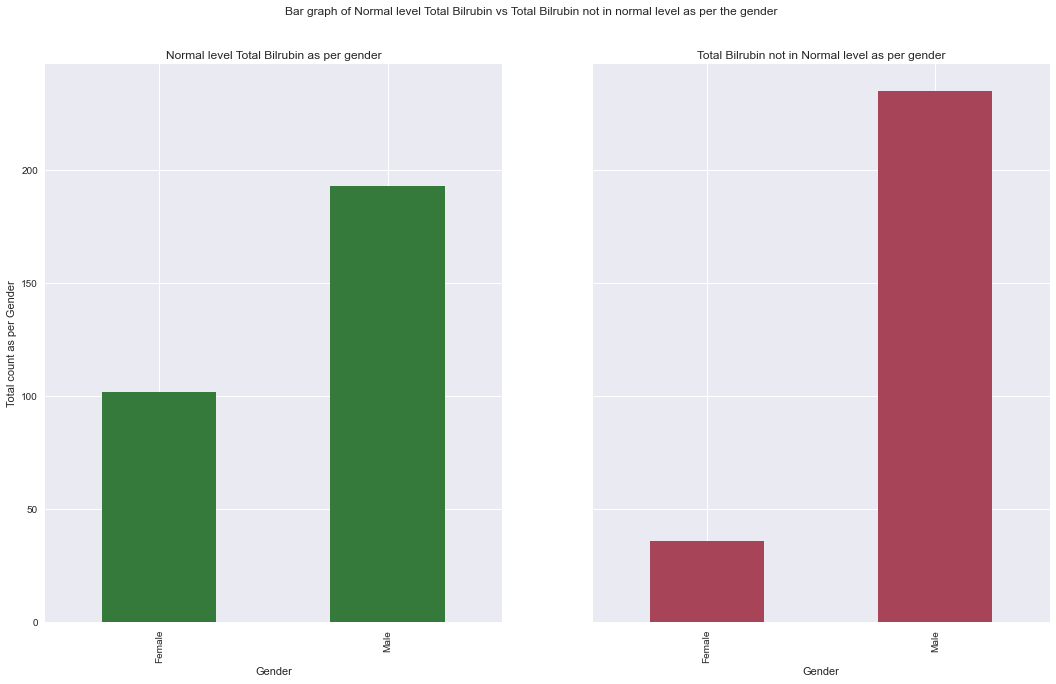

In [603]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
total_Bilirubin_normal=liver_df[liver_df['Total_Bilirubin_Description']=='Normal'].groupby('Gender')['Total_Bilirubin_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#35793b",
                                                                                                                                  ax=axes[0])
total_Bilirubin_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
total_Bilirubin_normal.set_title("Normal level Total Bilrubin as per gender")

total_Bilirubin_not_normal=liver_df[liver_df['Total_Bilirubin_Description']=='Not in Normal Range'].groupby('Gender')['Total_Bilirubin_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#a74458",
                                                                                                                                  ax=axes[1])
total_Bilirubin_not_normal.set_title("Total Bilrubin not in Normal level as per gender")
total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Total Bilrubin vs Total Bilrubin not in normal level as per the gender") #defining title for the figure

#### The condition of liver of the patient according to the Total Bilrubin rate

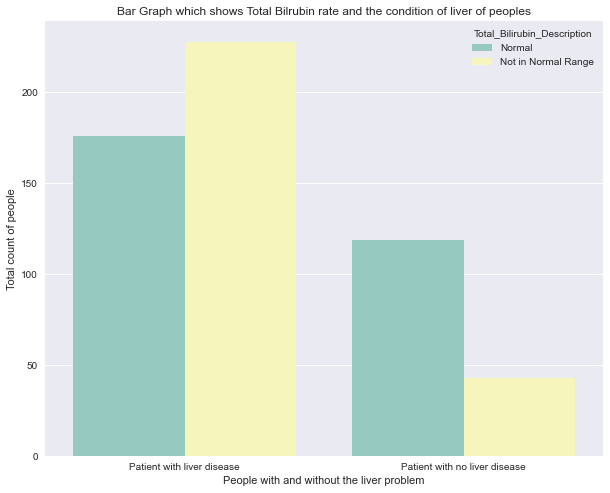

In [604]:
plt.figure(figsize=(10,8)) #Defining figure size
total_bilrubin_condition=sns.countplot(x="Dataset_Details", data=liver_df, hue="Total_Bilirubin_Description",palette="Set3")
total_bilrubin_condition.set(xlabel="People with and without the liver problem",ylabel="Total count of people") #defining label for x-axis by providing xlabel and #efining label for y-axis by providing ylabel 
total_bilrubin_condition.set_title("Bar Graph which shows Total Bilrubin rate and the condition of liver of peoples") #defining title for the figure
plt.show()

#### People who have Total Bilrubin in normal level and have liver disease

In [605]:
total_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Bilirubin_Description']=='Normal')].groupby('Gender')['Total_Bilirubin_Description'].count()
total_bilrubin_liverD

Gender
Female     60
Male      116
Name: Total_Bilirubin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Total Builirubin in recommended level and have liver disease as per the gender')

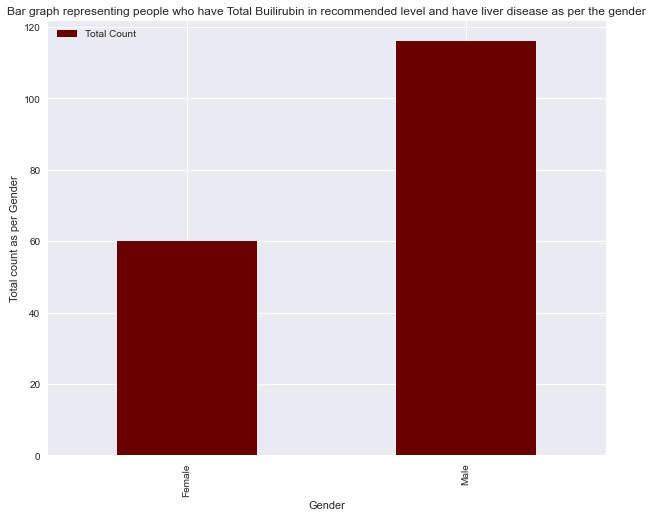

In [606]:
total_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Bilirubin_Description']=='Normal')].groupby('Gender')['Total_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#690000",
                                                                                                                                  label="Total Count")
total_bilrubin_liverD.legend() #for placing a legend on the axes
total_bilrubin_liverD.set_xlabel("Gender") #defining label for x-axis
total_bilrubin_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
total_bilrubin_liverD.set_title("Bar graph representing people who have Total Builirubin in recommended level and have liver disease as per the gender") #defining title for the figure

#### People who have Total Bilrubin in normal level and do not have liver disease

In [607]:
total_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Bilirubin_Description']=='Normal')].groupby('Gender')['Total_Bilirubin_Description'].count()
total_bilrubin_no_liverD

Gender
Female    42
Male      77
Name: Total_Bilirubin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Total Builirubin in recommended level and do not have liver disease as per the gender')

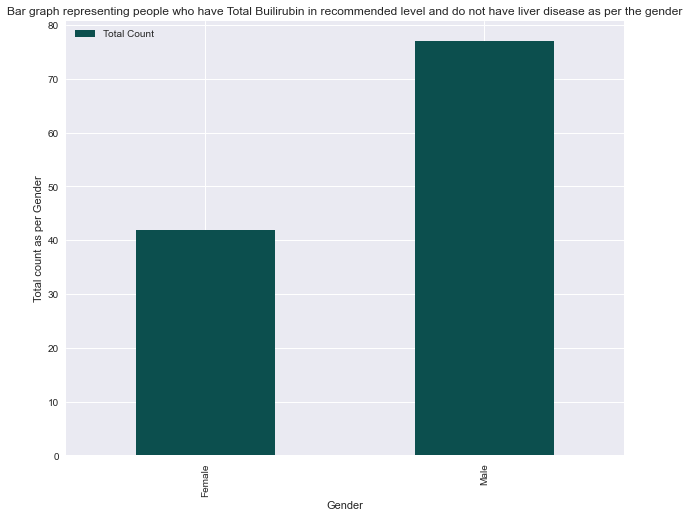

In [608]:
total_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Bilirubin_Description']=='Normal')].groupby('Gender')['Total_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#0c4f4e",
                                                                                                                                  label="Total Count")
total_bilrubin_no_liverD.legend() #for placing a legend on the axes
total_bilrubin_no_liverD.set_xlabel("Gender") #defining label for x-axis
total_bilrubin_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
total_bilrubin_no_liverD.set_title("Bar graph representing people who have Total Builirubin in recommended level and do not have liver disease as per the gender") #defining title for the figure

#### Total Bilrubin in normal level and having liver disease VS  Total Bilrubin in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Normal level Total Bilrubin in normal level and having liver disease VS  Total Bilrubin in normal level and not having a liver disease')

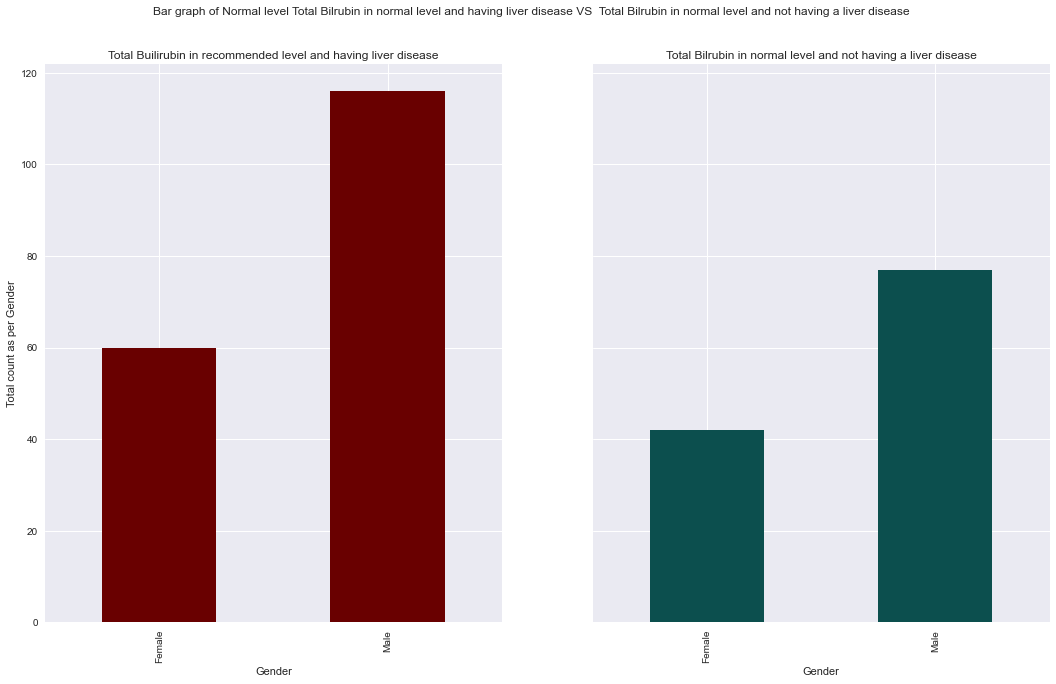

In [609]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
total_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Bilirubin_Description']=='Normal')].groupby('Gender')['Total_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#690000",
                                                                                                                                  #label="Total Count",
                                                                                                                                  ax=axes[0])
total_bilrubin_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
total_bilrubin_liverD.set_title("Total Builirubin in recommended level and having liver disease")

total_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Bilirubin_Description']=='Normal')].groupby('Gender')['Total_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#0c4f4e",
                                                                                                                                  #label="Total Count",
                                                                                                                                  ax=axes[1])
total_bilrubin_no_liverD.set_title("Total Bilrubin in normal level and not having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Total Bilrubin in normal level and having liver disease VS  Total Bilrubin in normal level and not having a liver disease") #defining title for the figure

#### People who do not have Total Bilrubin in normal level and have liver diesease 

In [610]:
not_Ntotal_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Total_Bilirubin_Description'].count()
not_Ntotal_bilrubin_liverD

Gender
Female     30
Male      198
Name: Total_Bilirubin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Total Bilrubin in normal level and have liver diesease as per the gender')

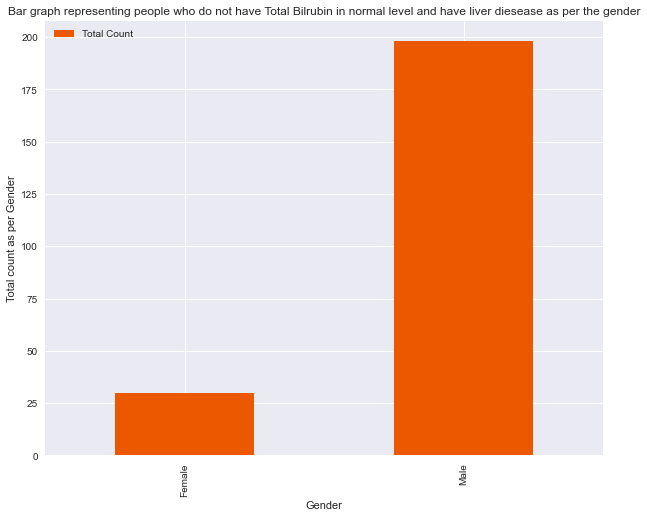

In [611]:
not_Ntotal_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Total_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#EC5800",
                                                                                                                                  label="Total Count")
not_Ntotal_bilrubin_liverD.legend() #for placing a legend on the axes
not_Ntotal_bilrubin_liverD.set_xlabel("Gender") #defining label for x-axis
not_Ntotal_bilrubin_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_Ntotal_bilrubin_liverD.set_title("Bar graph representing people who do not have Total Bilrubin in normal level and have liver diesease as per the gender") #defining title for the figure

#### People who do not have Total Bilrubin in normal level and do not have liver diesease as well

In [612]:
not_Ntotal_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Total_Bilirubin_Description'].count()
not_Ntotal_bilrubin_no_liverD

Gender
Female     6
Male      37
Name: Total_Bilirubin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Total Bilrubin in normal level and do not have liver diesease as per the gender')

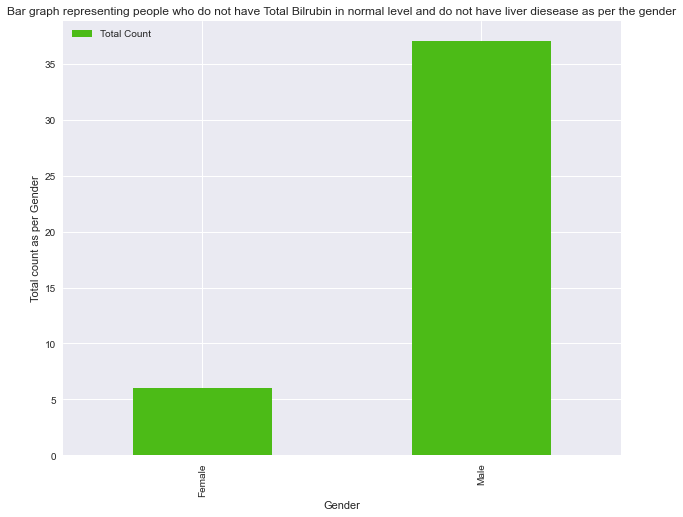

In [613]:
not_Ntotal_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Total_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#4CBB17",
                                                                                                                                  label="Total Count")
not_Ntotal_bilrubin_no_liverD.legend() #for placing a legend on the axes
not_Ntotal_bilrubin_no_liverD.set_xlabel("Gender") #defining label for x-axis
not_Ntotal_bilrubin_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_Ntotal_bilrubin_no_liverD.set_title("Bar graph representing people who do not have Total Bilrubin in normal level and do not have liver diesease as per the gender") #defining title for the figure

#### Total Bilrubin not in normal level and having liver disease VS  Total Bilrubin not in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Total Bilrubin not in normal level and having liver disease VS  Total Bilrubin not in normal level and not having a liver disease')

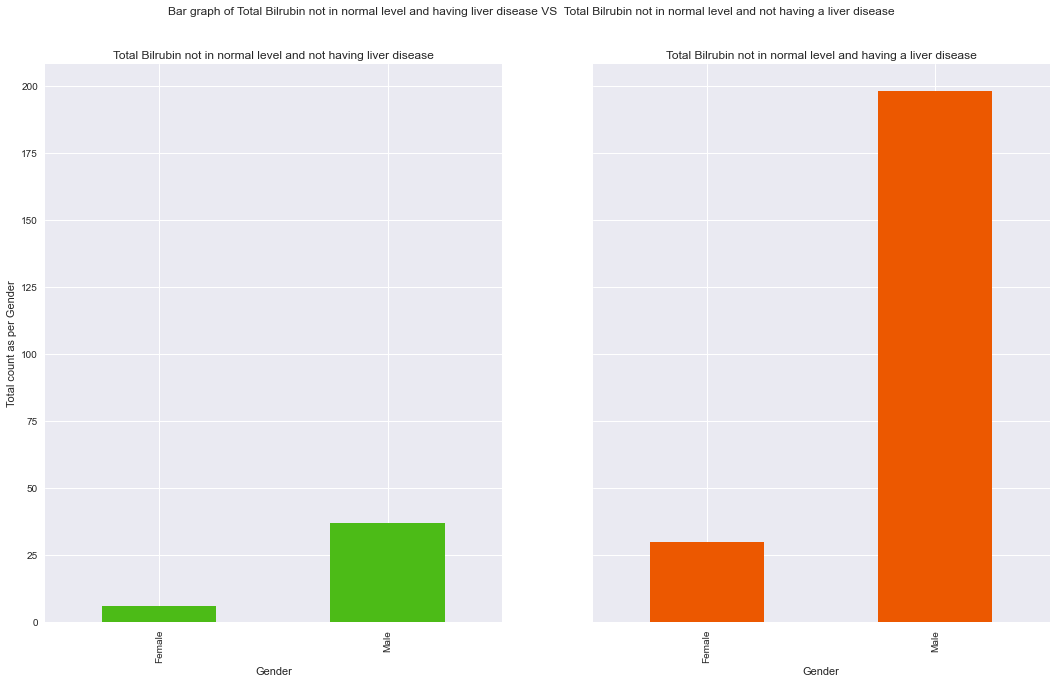

In [614]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
not_Ntotal_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Total_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#4CBB17",
                                                                                                                                  #label="Total Count",
                                                                                                                                  ax=axes[0])
not_Ntotal_bilrubin_no_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
not_Ntotal_bilrubin_no_liverD.set_title("Total Bilrubin not in normal level and not having liver disease")

not_Ntotal_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Total_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#EC5800",
                                                                                                                                  #label="Total Count",
                                                                                                                                  ax=axes[1])
not_Ntotal_bilrubin_liverD.set_title("Total Bilrubin not in normal level and having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Total Bilrubin not in normal level and having liver disease VS  Total Bilrubin not in normal level and not having a liver disease") #defining title for the figure

### Further analysis and Data Visualization on Direct Bilirubin

#### Creating function as per the recommended rate of Direct Bilirubin  

In [615]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          566 non-null    int64  
 1   Gender                       566 non-null    object 
 2   Total_Bilirubin              566 non-null    float64
 3   Direct_Bilirubin             566 non-null    float64
 4   Alkaline_Phosphotase         566 non-null    int64  
 5   Alamine_Aminotransferase     566 non-null    int64  
 6   Aspartate_Aminotransferase   566 non-null    int64  
 7   Total_Protiens               566 non-null    float64
 8   Albumin                      566 non-null    float64
 9   Albumin_and_Globulin_Ratio   566 non-null    float64
 10  Dataset                      566 non-null    int64  
 11  Dataset_Details              566 non-null    object 
 12  Gender_Binary                566 non-null    int64  
 13  Total_Bilirubin_Bina

In [616]:
liver_df['Direct_Bilirubin'] #extracting the values of selected columns from dataframe

0      0.1
1      5.5
2      4.1
3      0.4
4      2.0
      ... 
561    0.1
562    0.1
563    0.2
564    0.5
565    0.3
Name: Direct_Bilirubin, Length: 566, dtype: float64

In [617]:
#Creating a function to provide 1 value to normal direct bilirubin rate and 0 to not normal total bilrubin rate
def binary_direct_bilirubin(direct_bilirubin):
    if direct_bilirubin>=0 and direct_bilirubin<=0.4:
        return 1
    else:
        return 0

In [618]:
liver_df['Direct_Bilirubin_Binary'] = liver_df['Direct_Bilirubin'].apply(binary_direct_bilirubin) #Implementing the developed function and creating a new column as per the defined logic

In [619]:
liver_df[['Direct_Bilirubin','Direct_Bilirubin_Binary']] #extracting the values of selected columns from dataframe

Direct_Bilirubin  Direct_Bilirubin_Binary
0                 0.1                        1
1                 5.5                        0
2                 4.1                        0
3                 0.4                        1
4                 2.0                        0
..                ...                      ...
561               0.1                        1
562               0.1                        1
563               0.2                        1
564               0.5                        0
565               0.3                        1

[566 rows x 2 columns]

In [620]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          566 non-null    int64  
 1   Gender                       566 non-null    object 
 2   Total_Bilirubin              566 non-null    float64
 3   Direct_Bilirubin             566 non-null    float64
 4   Alkaline_Phosphotase         566 non-null    int64  
 5   Alamine_Aminotransferase     566 non-null    int64  
 6   Aspartate_Aminotransferase   566 non-null    int64  
 7   Total_Protiens               566 non-null    float64
 8   Albumin                      566 non-null    float64
 9   Albumin_and_Globulin_Ratio   566 non-null    float64
 10  Dataset                      566 non-null    int64  
 11  Dataset_Details              566 non-null    object 
 12  Gender_Binary                566 non-null    int64  
 13  Total_Bilirubin_Bina

In [621]:
#Creating a function for determining normal direct bilirubin rate
def desc_direct_bilirubin(direct_bilirubin):
    if direct_bilirubin>=0 and direct_bilirubin<=0.4:
        return "Normal"
    else:
        return "Not in Normal Range"

In [622]:
liver_df['Direct_Bilirubin_Description'] = liver_df['Direct_Bilirubin'].apply(desc_direct_bilirubin) #Implementing the developed function and creating a new column as per the defined logic

In [623]:
liver_df[['Age','Direct_Bilirubin','Direct_Bilirubin_Binary','Direct_Bilirubin_Description']] #extracting the values of selected columns from dataframe

Age  Direct_Bilirubin  Direct_Bilirubin_Binary  \
0     65               0.1                        1   
1     62               5.5                        0   
2     62               4.1                        0   
3     58               0.4                        1   
4     72               2.0                        0   
..   ...               ...                      ...   
561   60               0.1                        1   
562   40               0.1                        1   
563   52               0.2                        1   
564   31               0.5                        0   
565   38               0.3                        1   

    Direct_Bilirubin_Description  
0                         Normal  
1            Not in Normal Range  
2            Not in Normal Range  
3                         Normal  
4            Not in Normal Range  
..                           ...  
561                       Normal  
562                       Normal  
563                       Normal  
564          Not in Normal Range  
565                       Normal  

[566 rows x 4 columns]

In [624]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           566 non-null    int64  
 1   Gender                        566 non-null    object 
 2   Total_Bilirubin               566 non-null    float64
 3   Direct_Bilirubin              566 non-null    float64
 4   Alkaline_Phosphotase          566 non-null    int64  
 5   Alamine_Aminotransferase      566 non-null    int64  
 6   Aspartate_Aminotransferase    566 non-null    int64  
 7   Total_Protiens                566 non-null    float64
 8   Albumin                       566 non-null    float64
 9   Albumin_and_Globulin_Ratio    566 non-null    float64
 10  Dataset                       566 non-null    int64  
 11  Dataset_Details               566 non-null    object 
 12  Gender_Binary                 566 non-null    int64  
 13  Total

#### Peoples as per the age whose Direct Bilirubin is not in the the recommended level

In [625]:
liver_df[liver_df['Direct_Bilirubin_Description']=='Not in Normal Range'].groupby('Age')['Direct_Bilirubin_Binary'].count()

Age
7      1
13     1
14     1
16     2
18     3
19     1
20     2
21     2
22     4
23     2
24     1
26     7
31     1
32    13
33    10
34     5
35     4
36     3
37     2
38     8
39     4
40     8
41     3
42     8
43     2
44     1
45    13
46     9
47     3
48    10
49     3
50    11
51     4
52     2
53     2
54     5
55     9
56     2
57     3
58     5
60    27
61     1
62     5
64     3
65     5
66     7
67     1
68     1
70     4
72     3
73     2
75     8
Name: Direct_Bilirubin_Binary, dtype: int64

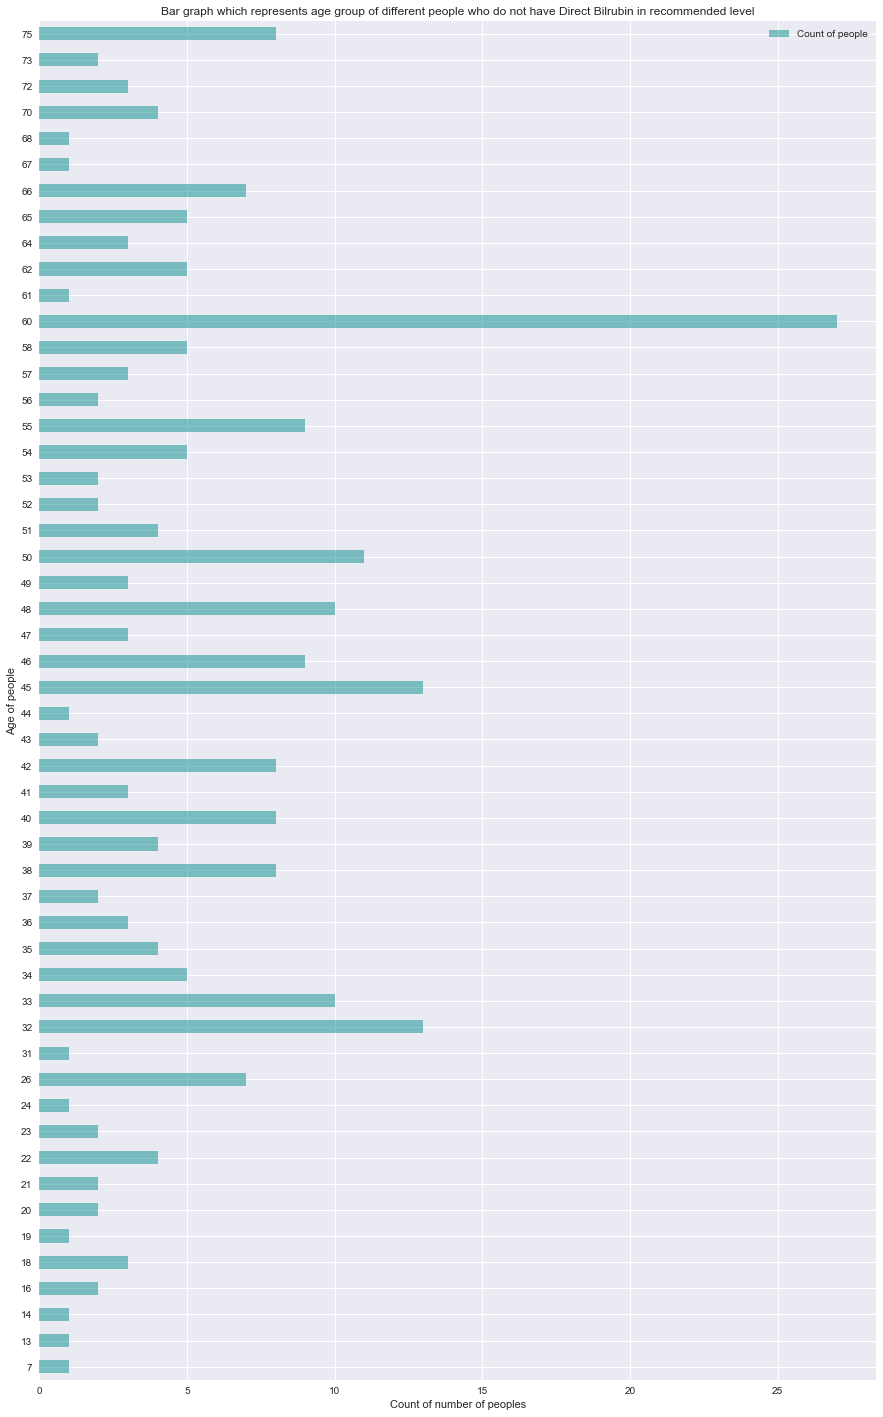

In [626]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Direct_Bilirubin_Description']=='Not in Normal Range'].groupby('Age')['Direct_Bilirubin_Binary'].count().plot(kind="barh",
                                                                                                                               label="Count of people",
                                                                                                                               color="#088F8F",
                                                                                                                               alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents age group of different people who do not have Direct Bilrubin in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Top 10 age group people having Direct Bilrubin in not recommended level

In [627]:
topTenDirectBilrubinNN = liver_df[liver_df['Direct_Bilirubin_Description']=='Not in Normal Range'].groupby('Age')['Direct_Bilirubin_Binary'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head(10)
topTenDirectBilrubinNN

Age  Count
40   60     27
26   45     13
13   32     13
31   50     11
29   48     10
14   33     10
36   55      9
27   46      9
23   42      8
21   40      8

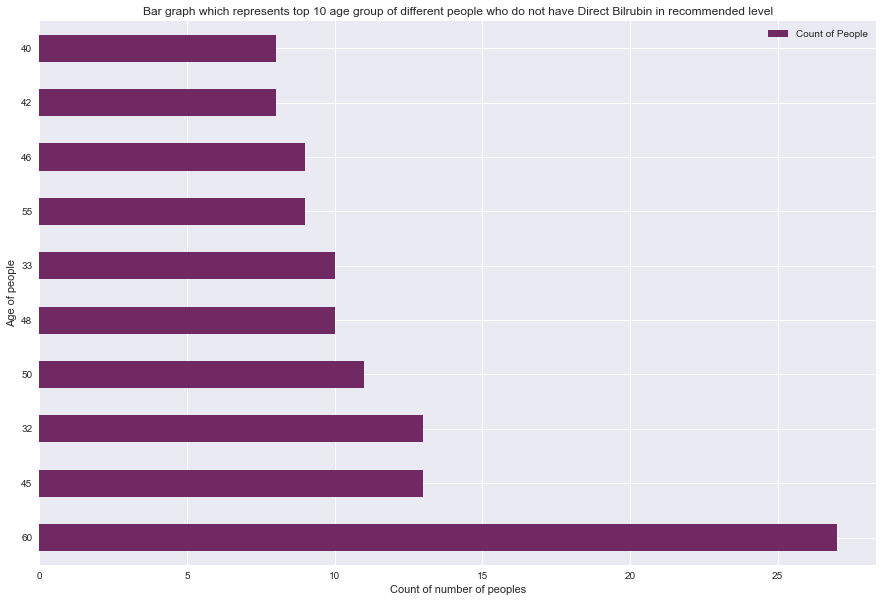

In [628]:
topTenDirectBilrubinNN.plot.barh(x='Age', y='Count',figsize=(15,10),color="#702963", label="Count of People")
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents top 10 age group of different people who do not have Direct Bilrubin in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Peoples as per the age having normal Direct Bilirubin level

In [629]:
liver_df[liver_df['Direct_Bilirubin_Description']=='Normal'].groupby('Age')['Direct_Bilirubin_Binary'].count()

Age
4     2
6     1
7     1
8     1
10    1
     ..
75    6
78    1
84    1
85    1
90    1
Name: Direct_Bilirubin_Binary, Length: 70, dtype: int64

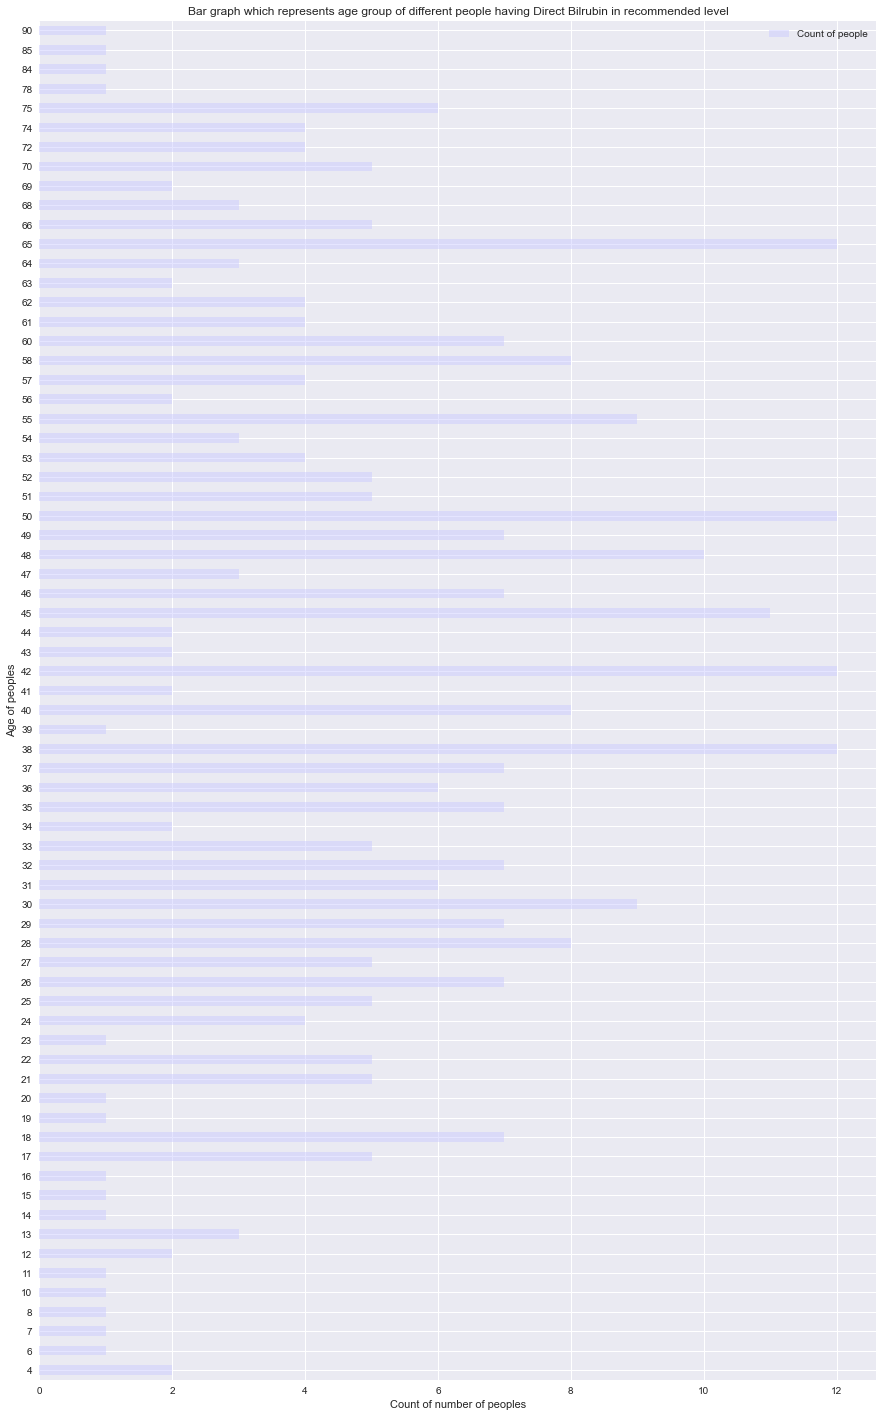

In [630]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Direct_Bilirubin_Description']=='Normal'].groupby('Age')['Direct_Bilirubin_Binary'].count().plot(kind="barh",
                                                                                                                  label="Count of people", 
                                                                                                                  color="#CCCCFF",
                                                                                                                  alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of peoples") #defining label for y-axis
plt.title("Bar graph which represents age group of different people having Direct Bilrubin in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### People having Direct Bilirubin not in recommended level as per the gender

In [631]:
liver_df[liver_df['Direct_Bilirubin_Description']=='Not in Normal Range'].groupby('Gender')['Direct_Bilirubin_Binary'].count()

Gender
Female     33
Male      214
Name: Direct_Bilirubin_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Direct Builirubin in recommended level as per the gender')

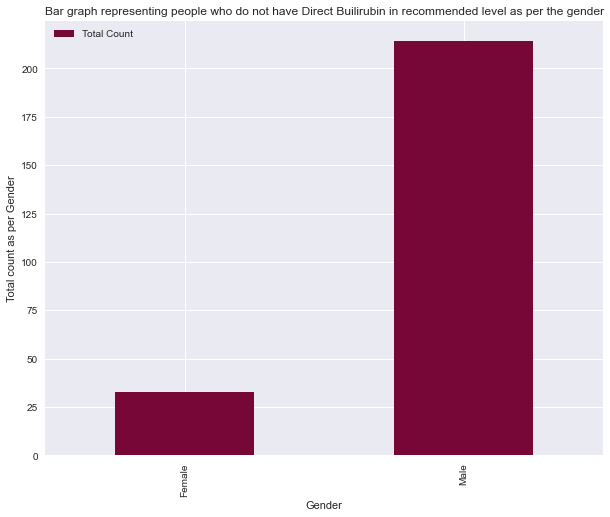

In [632]:
direct_Bilirubin_not_normal=liver_df[liver_df['Direct_Bilirubin_Description']=='Not in Normal Range'].groupby('Gender')['Direct_Bilirubin_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#770737",
                                                                                                                                  label="Total Count")
direct_Bilirubin_not_normal.legend() #for placing a legend on the axes
direct_Bilirubin_not_normal.set_xlabel("Gender") #defining label for x-axis
direct_Bilirubin_not_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
direct_Bilirubin_not_normal.set_title("Bar graph representing people who do not have Direct Builirubin in recommended level as per the gender") #defining title for the figure

#### Peoples having normal Direct Bilirubin level as per the gender

In [633]:
liver_df[liver_df['Direct_Bilirubin_Description']=='Normal'].groupby('Gender')['Direct_Bilirubin_Binary'].count()

Gender
Female    105
Male      214
Name: Direct_Bilirubin_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Direct Builirubin in recommended level as per the gender')

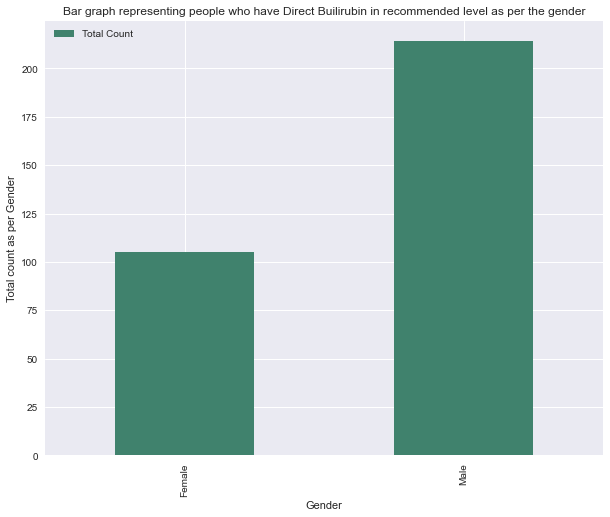

In [634]:
direct_bilirubin_normal=liver_df[liver_df['Direct_Bilirubin_Description']=='Normal'].groupby('Gender')['Direct_Bilirubin_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#40826D",
                                                                                                                                  label="Total Count")
direct_bilirubin_normal.legend() #for placing a legend on the axes
direct_bilirubin_normal.set_xlabel("Gender") #defining label for x-axis
direct_bilirubin_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
direct_bilirubin_normal.set_title("Bar graph representing people who have Direct Builirubin in recommended level as per the gender") #defining title for the figure

In [635]:
liver_df

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
561   60    Male              0.5               0.1                   500   
562   40    Male              0.6               0.1                    98   
563   52    Male              0.8               0.2                   245   
564   31    Male              1.3               0.5                   184   
565   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
561                        20                          34             5.9   
562                        35                          31             6.0   
563                        48                          49             6.4   
564                        29                          32             6.8   
565                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  \
0        3.3                        0.90        1   
1        3.2                        0.74        1   
2        3.3                        0.89        1   
3        3.4                        1.00        1   
4        2.4                        0.40        1   
..       ...                         ...      ...   
561      1.6                        0.37        2   
562      3.2                        1.10        1   
563      3.2                        1.00        1   
564      3.4                        1.00        1   
565      4.4                        1.50        2   

                   Dataset_Details  Gender_Binary  Total_Bilirubin_Binary  \
0       Patient with liver disease              0                       1   
1       Patient with liver disease              1                       0   
2       Patient with liver disease              1                       0   
3       Patient with liver disease              1                       1   
4       Patient with liver disease              1                       0   
..                             ...            ...                     ...   
561  Patient with no liver disease              1                       1   
562     Patient with liver disease              1                       1   
563     Patient with liver disease              1                       1   
564     Patient with liver disease              1                       0   
565  Patient with no liver disease              1                       1   

    Total_Bilirubin_Description  Direct_Bilirubin_Binary  \
0                        Normal                        1   
1           Not in Normal Range                        0   
2           Not in Normal Range                        0   
3                        Normal                        1   
4           Not in Normal Range                        0   
..                          ...                      ...   
561                      Normal                        1   
562                      Normal                        1   
563                      Normal                      

#### Normal level Direct Bilrubin vs Direct Bilrubin not in normal level as per the gender

Text(0.5, 0.98, 'Bar graph of Normal level Direct Bilrubin VS Direct Bilrubin not in normal level as per the gender')

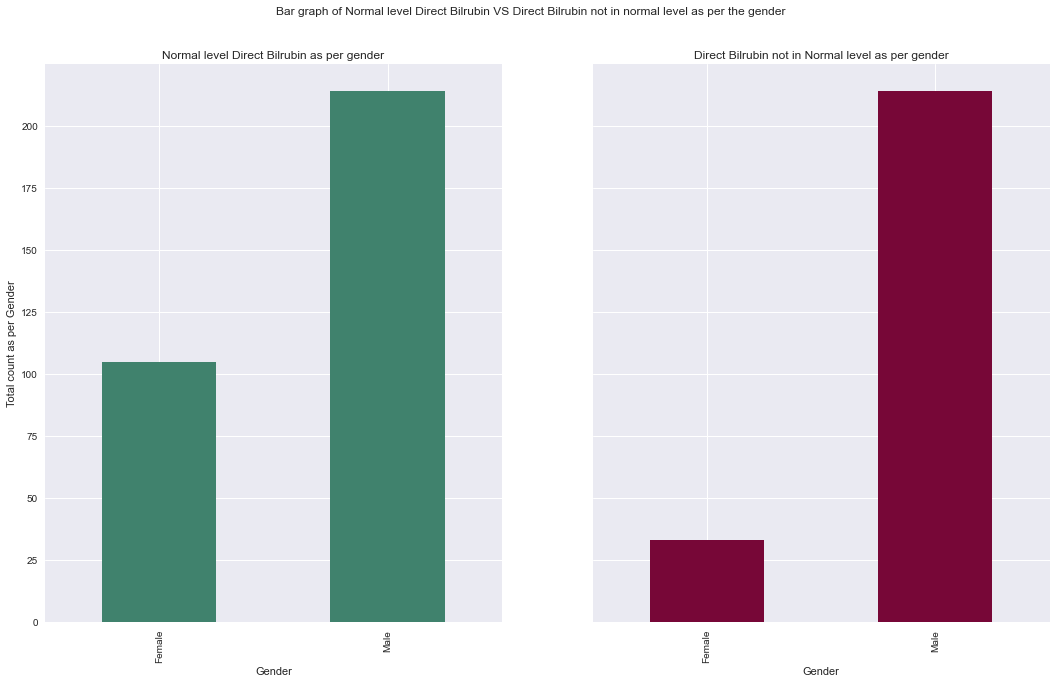

In [636]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
direct_bilirubin_normal=liver_df[liver_df['Direct_Bilirubin_Description']=='Normal'].groupby('Gender')['Direct_Bilirubin_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#40826D",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
direct_bilirubin_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
direct_bilirubin_normal.set_title("Normal level Direct Bilrubin as per gender")

direct_Bilirubin_not_normal=liver_df[liver_df['Direct_Bilirubin_Description']=='Not in Normal Range'].groupby('Gender')['Direct_Bilirubin_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#770737",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
direct_Bilirubin_not_normal.set_title("Direct Bilrubin not in Normal level as per gender")
direct_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Direct Bilrubin VS Direct Bilrubin not in normal level as per the gender") #defining title for the figure

#### The condition of liver of the patient according to the Direct Bilrubin rate

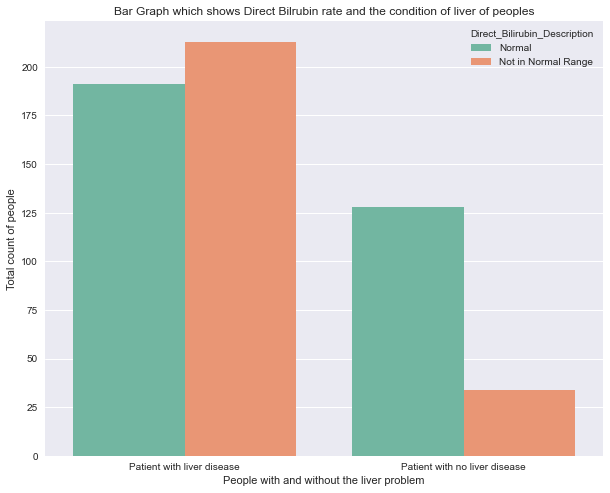

In [637]:
plt.figure(figsize=(10,8)) #Defining figure size
direct_bilrubin_condition=sns.countplot(x="Dataset_Details", data=liver_df, hue="Direct_Bilirubin_Description",palette="Set2")
direct_bilrubin_condition.set(xlabel="People with and without the liver problem",ylabel="Total count of people") #defining label for x-axis by providing xlabel and #efining label for y-axis by providing ylabel 
direct_bilrubin_condition.set_title("Bar Graph which shows Direct Bilrubin rate and the condition of liver of peoples") #defining title for the figure
plt.show()

#### People who have Direct Bilrubin in normal level and have liver disease

In [638]:
direct_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Direct_Bilirubin_Description']=='Normal')].groupby('Gender')['Direct_Bilirubin_Description'].count()
direct_bilrubin_liverD

Gender
Female     61
Male      130
Name: Direct_Bilirubin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Direct Builirubin in recommended level and have liver disease as per the gender')

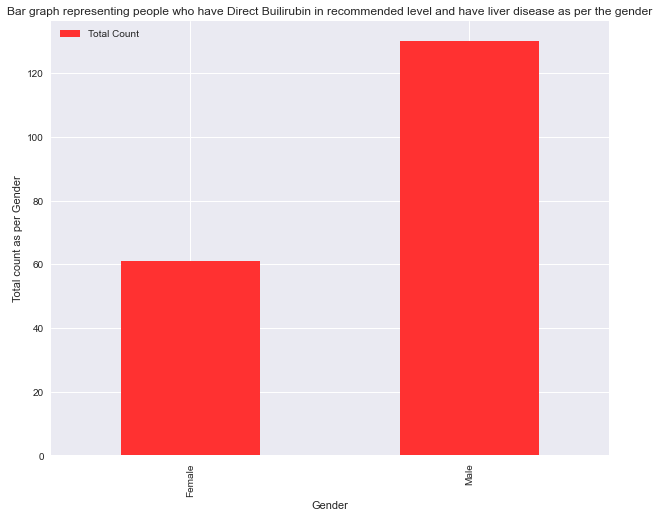

In [639]:
direct_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Direct_Bilirubin_Description']=='Normal')].groupby('Gender')['Direct_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#FF3131",
                                                                                                                                  label="Total Count")
direct_bilrubin_liverD.legend() #for placing a legend on the axes
direct_bilrubin_liverD.set_xlabel("Gender") #defining label for x-axis
direct_bilrubin_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
direct_bilrubin_liverD.set_title("Bar graph representing people who have Direct Builirubin in recommended level and have liver disease as per the gender") #defining title for the figure

#### People who have Direct Bilrubin in normal level and do not have liver disease

In [640]:
direct_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Direct_Bilirubin_Description']=='Normal')].groupby('Gender')['Direct_Bilirubin_Description'].count()
direct_bilrubin_no_liverD

Gender
Female    44
Male      84
Name: Direct_Bilirubin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Direct Builirubin in recommended level and do not have liver disease as per the gender')

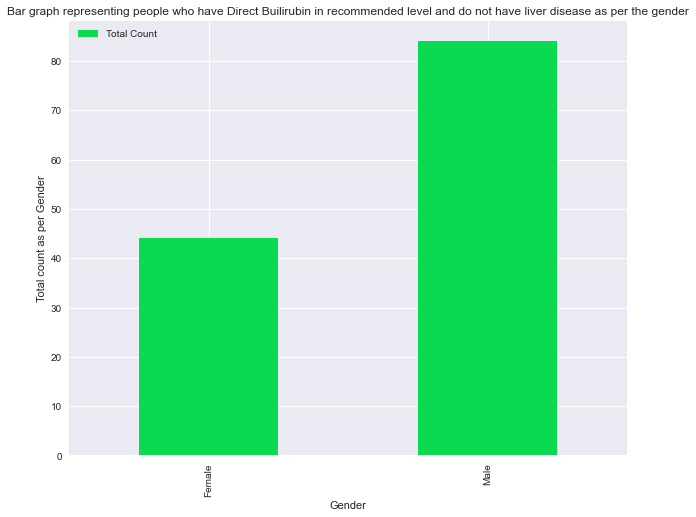

In [641]:
direct_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Direct_Bilirubin_Description']=='Normal')].groupby('Gender')['Direct_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#0BDA51",
                                                                                                                                  label="Total Count")
direct_bilrubin_no_liverD.legend() #for placing a legend on the axes
direct_bilrubin_no_liverD.set_xlabel("Gender") #defining label for x-axis
direct_bilrubin_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
direct_bilrubin_no_liverD.set_title("Bar graph representing people who have Direct Builirubin in recommended level and do not have liver disease as per the gender") #defining title for the figure

#### Direct Bilrubin in normal level and having liver disease VS  Direct Bilrubin in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Normal level Direct Bilrubin in normal level and having liver disease VS  Direct Bilrubin in normal level and not having a liver disease')

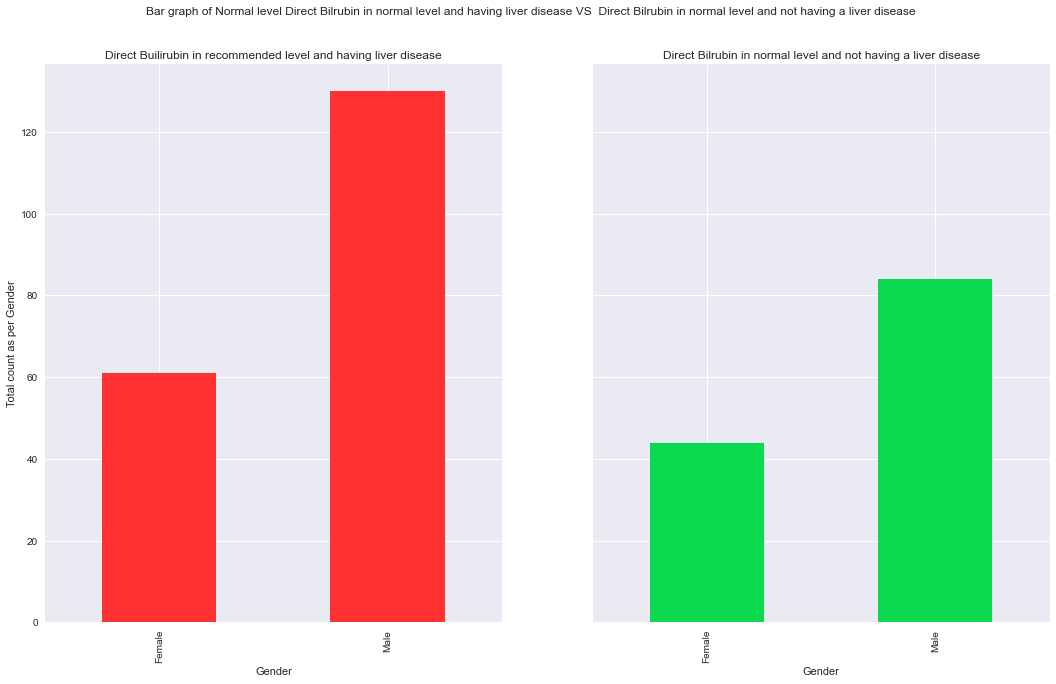

In [642]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
direct_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Direct_Bilirubin_Description']=='Normal')].groupby('Gender')['Direct_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#FF3131",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
direct_bilrubin_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
direct_bilrubin_liverD.set_title("Direct Builirubin in recommended level and having liver disease")

direct_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Direct_Bilirubin_Description']=='Normal')].groupby('Gender')['Direct_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#0BDA51",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
direct_bilrubin_no_liverD.set_title("Direct Bilrubin in normal level and not having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Direct Bilrubin in normal level and having liver disease VS  Direct Bilrubin in normal level and not having a liver disease") #defining title for the figure

#### People who do not have Direct Bilrubin in normal level and have liver diesease 

In [643]:
not_Ndirect_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Direct_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Direct_Bilirubin_Description'].count()
not_Ndirect_bilrubin_liverD

Gender
Female     29
Male      184
Name: Direct_Bilirubin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Direct Bilrubin in normal level and have liver diesease as per the gender')

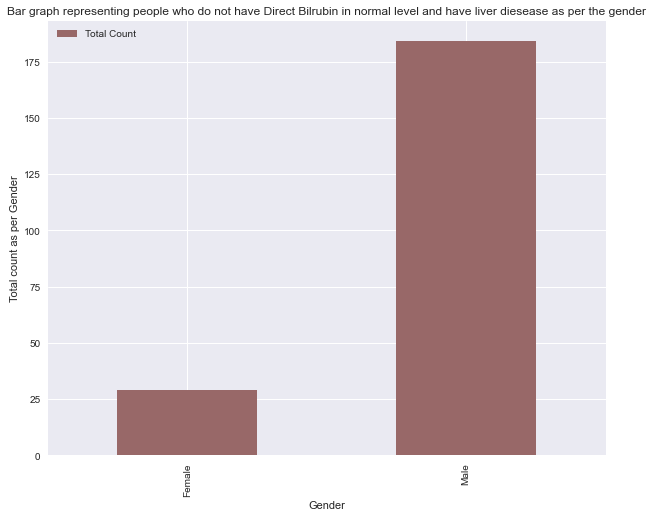

In [644]:
not_Ndirect_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Direct_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Direct_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#986868",
                                                                                                                                  label="Total Count")
not_Ndirect_bilrubin_liverD.legend() #for placing a legend on the axes
not_Ndirect_bilrubin_liverD.set_xlabel("Gender") #defining label for x-axis
not_Ndirect_bilrubin_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_Ndirect_bilrubin_liverD.set_title("Bar graph representing people who do not have Direct Bilrubin in normal level and have liver diesease as per the gender") #defining title for the figure

#### People who do not have Direct Bilrubin in normal level and do not have liver diesease as well

In [645]:
not_NDirect_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Direct_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Direct_Bilirubin_Description'].count()
not_NDirect_bilrubin_no_liverD

Gender
Female     4
Male      30
Name: Direct_Bilirubin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Direct Bilrubin in normal level and do not have liver diesease as per the gender')

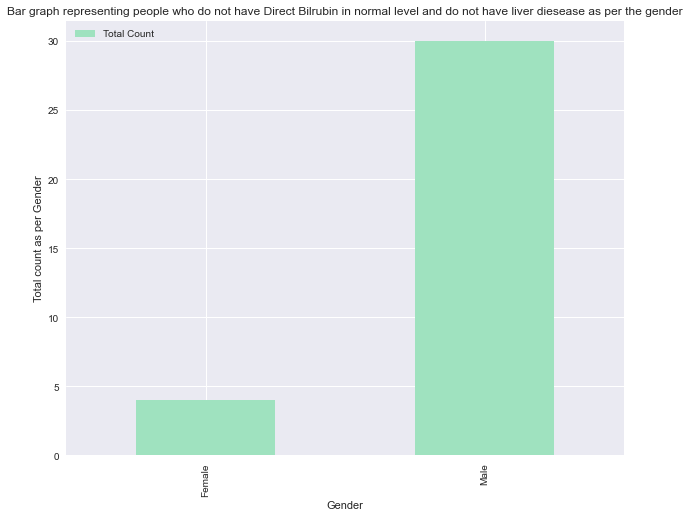

In [646]:
not_NDirect_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Direct_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Direct_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#9FE2BF",
                                                                                                                                  label="Total Count")
not_NDirect_bilrubin_no_liverD.legend() #for placing a legend on the axes
not_NDirect_bilrubin_no_liverD.set_xlabel("Gender") #defining label for x-axis
not_NDirect_bilrubin_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_NDirect_bilrubin_no_liverD.set_title("Bar graph representing people who do not have Direct Bilrubin in normal level and do not have liver diesease as per the gender") #defining title for the figure

#### Direct Bilrubin not in normal level and having liver disease VS  Direct Bilrubin not in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Direct Bilrubin not in normal level and having liver disease VS  Direct Bilrubin not in normal level and not having a liver disease')

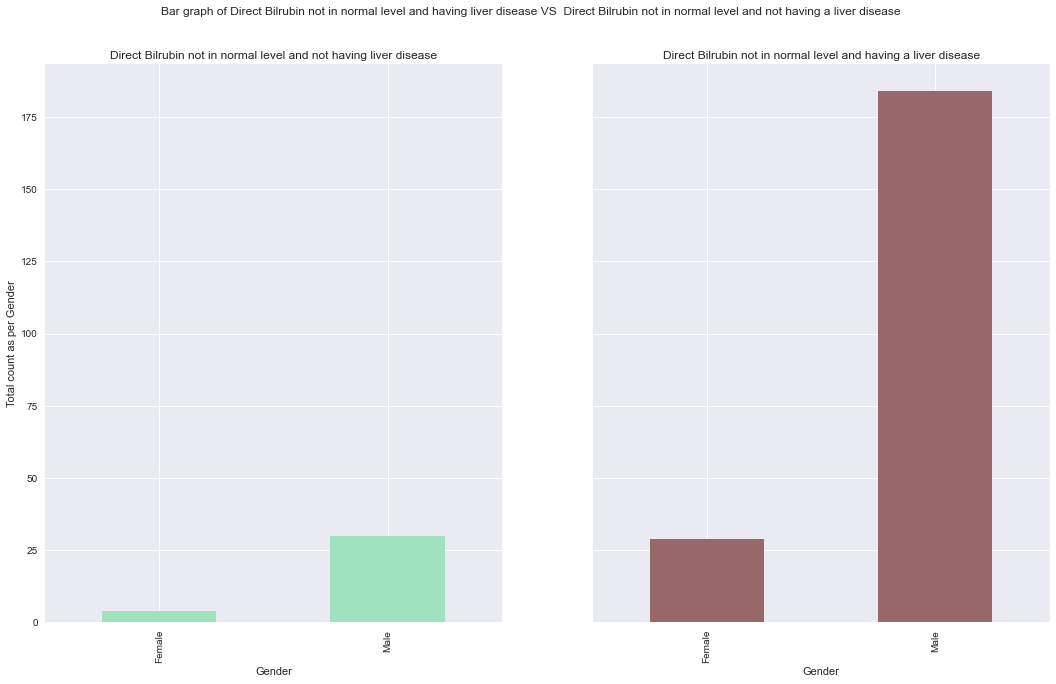

In [647]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
not_NDirect_bilrubin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Direct_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Direct_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#9FE2BF",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
not_NDirect_bilrubin_no_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
not_NDirect_bilrubin_no_liverD.set_title("Direct Bilrubin not in normal level and not having liver disease")

not_Ndirect_bilrubin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Direct_Bilirubin_Description']=='Not in Normal Range')].groupby('Gender')['Direct_Bilirubin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#986868",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
not_Ndirect_bilrubin_liverD.set_title("Direct Bilrubin not in normal level and having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Direct Bilrubin not in normal level and having liver disease VS  Direct Bilrubin not in normal level and not having a liver disease") #defining title for the figure

### Further analysis and Data Visualization on Alkaline Phosphatase (ALP)

#### Creating function as per the recommended rate of Alkaline Phosphotase

In [648]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           566 non-null    int64  
 1   Gender                        566 non-null    object 
 2   Total_Bilirubin               566 non-null    float64
 3   Direct_Bilirubin              566 non-null    float64
 4   Alkaline_Phosphotase          566 non-null    int64  
 5   Alamine_Aminotransferase      566 non-null    int64  
 6   Aspartate_Aminotransferase    566 non-null    int64  
 7   Total_Protiens                566 non-null    float64
 8   Albumin                       566 non-null    float64
 9   Albumin_and_Globulin_Ratio    566 non-null    float64
 10  Dataset                       566 non-null    int64  
 11  Dataset_Details               566 non-null    object 
 12  Gender_Binary                 566 non-null    int64  
 13  Total

In [649]:
liver_df['Alkaline_Phosphotase'] #extracting the values of selected columns from dataframe

0      187
1      699
2      490
3      182
4      195
      ... 
561    500
562     98
563    245
564    184
565    216
Name: Alkaline_Phosphotase, Length: 566, dtype: int64

In [650]:
#Creating a function to provide 1 value to normal alkaline phosphotase rate and 0 to not normal alkaline phosphotasen rate
def binary_alkaline_phosphotase(alkaline_phosphotase):
    if alkaline_phosphotase>=3 and alkaline_phosphotase<=150:
        return 1
    else:
        return 0

In [651]:
liver_df['Alkaline_Phosphotase_Binary'] = liver_df['Alkaline_Phosphotase'].apply(binary_alkaline_phosphotase) #Implementing the developed function and creating a new column as per the defined logic

In [652]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           566 non-null    int64  
 1   Gender                        566 non-null    object 
 2   Total_Bilirubin               566 non-null    float64
 3   Direct_Bilirubin              566 non-null    float64
 4   Alkaline_Phosphotase          566 non-null    int64  
 5   Alamine_Aminotransferase      566 non-null    int64  
 6   Aspartate_Aminotransferase    566 non-null    int64  
 7   Total_Protiens                566 non-null    float64
 8   Albumin                       566 non-null    float64
 9   Albumin_and_Globulin_Ratio    566 non-null    float64
 10  Dataset                       566 non-null    int64  
 11  Dataset_Details               566 non-null    object 
 12  Gender_Binary                 566 non-null    int64  
 13  Total

In [653]:
liver_df[['Alkaline_Phosphotase','Alkaline_Phosphotase_Binary']] #extracting the values of selected columns from dataframe

Alkaline_Phosphotase  Alkaline_Phosphotase_Binary
0                     187                            0
1                     699                            0
2                     490                            0
3                     182                            0
4                     195                            0
..                    ...                          ...
561                   500                            0
562                    98                            1
563                   245                            0
564                   184                            0
565                   216                            0

[566 rows x 2 columns]

In [654]:
#Creating a function for determining normal alkaline phosphotase
def desc_alkaline_phosphotase(alkaline_phosphotase):
    if alkaline_phosphotase>=3 and alkaline_phosphotase<=150:
        return "Normal"
    else:
        return "Not in Normal Range"

In [655]:
liver_df['Alkaline_Phosphotase_Description'] = liver_df['Alkaline_Phosphotase'].apply(desc_alkaline_phosphotase) #Implementing the developed function and creating a new column as per the defined logic

In [656]:
liver_df[['Alkaline_Phosphotase','Alkaline_Phosphotase_Binary','Alkaline_Phosphotase_Description']] #extracting the values of selected columns from dataframe

Alkaline_Phosphotase  Alkaline_Phosphotase_Binary  \
0                     187                            0   
1                     699                            0   
2                     490                            0   
3                     182                            0   
4                     195                            0   
..                    ...                          ...   
561                   500                            0   
562                    98                            1   
563                   245                            0   
564                   184                            0   
565                   216                            0   

    Alkaline_Phosphotase_Description  
0                Not in Normal Range  
1                Not in Normal Range  
2                Not in Normal Range  
3                Not in Normal Range  
4                Not in Normal Range  
..                               ...  
561              Not in Normal Range  
562                           Normal  
563              Not in Normal Range  
564              Not in Normal Range  
565              Not in Normal Range  

[566 rows x 3 columns]

In [657]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               566 non-null    int64  
 1   Gender                            566 non-null    object 
 2   Total_Bilirubin                   566 non-null    float64
 3   Direct_Bilirubin                  566 non-null    float64
 4   Alkaline_Phosphotase              566 non-null    int64  
 5   Alamine_Aminotransferase          566 non-null    int64  
 6   Aspartate_Aminotransferase        566 non-null    int64  
 7   Total_Protiens                    566 non-null    float64
 8   Albumin                           566 non-null    float64
 9   Albumin_and_Globulin_Ratio        566 non-null    float64
 10  Dataset                           566 non-null    int64  
 11  Dataset_Details                   566 non-null    object 
 12  Gender_B

#### Peoples as per the age whose Alkaline Phosphatase (ALP) is not in the the recommended level

In [658]:
liver_df[liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range'].groupby('Age')['Alkaline_Phosphotase_Binary'].count()

Age
4      2
6      1
7      2
8      1
10     1
      ..
75    14
78     1
84     1
85     1
90     1
Name: Alkaline_Phosphotase_Binary, Length: 72, dtype: int64

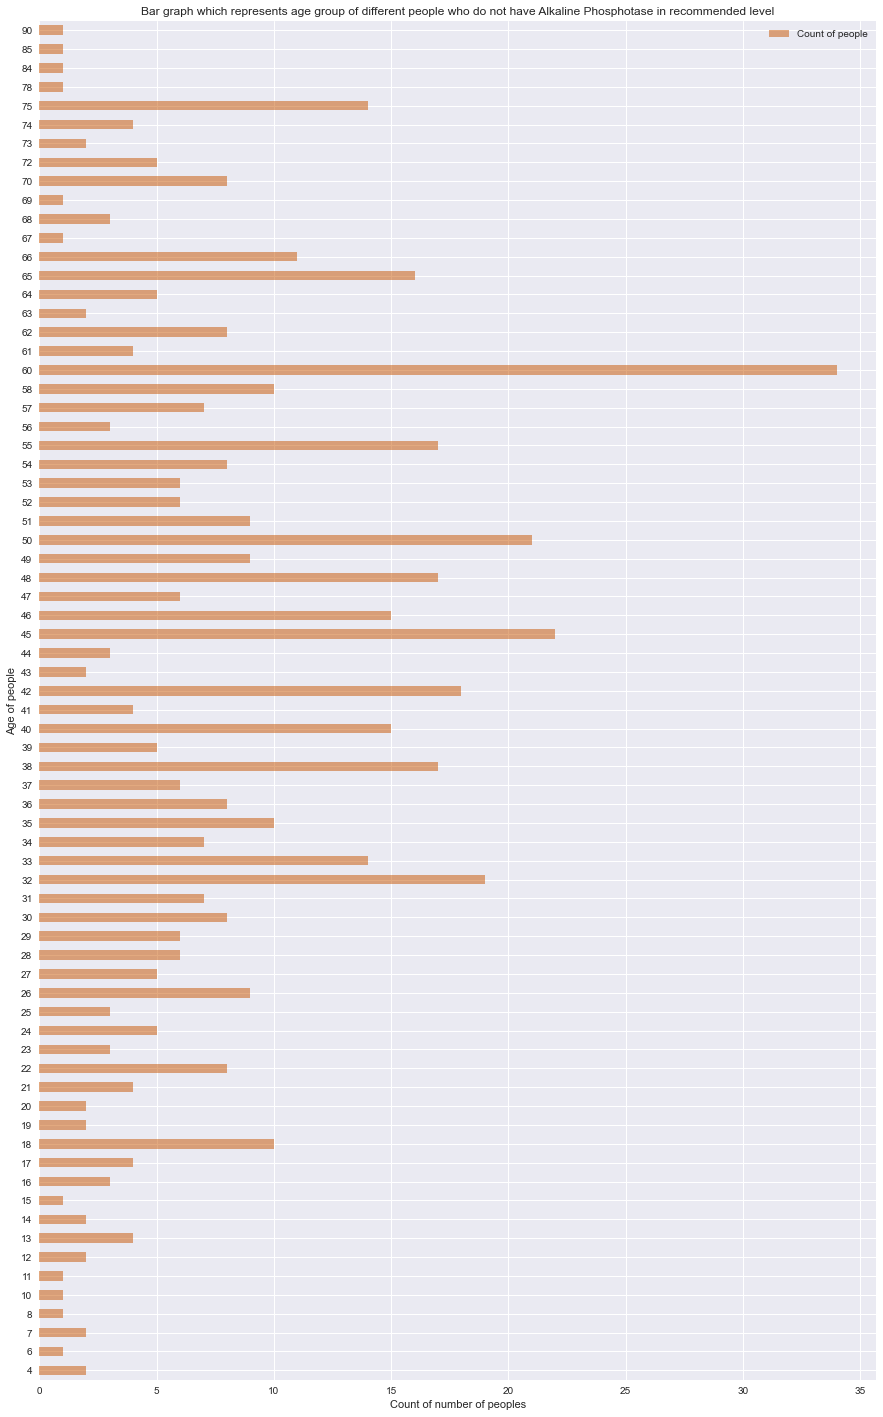

In [659]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range'].groupby('Age')['Alkaline_Phosphotase_Binary'].count().plot(kind="barh",
                                                                                                                               label="Count of people",
                                                                                                                               color="#C75400",
                                                                                                                               alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents age group of different people who do not have Alkaline Phosphotase in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Top 10 age group people having Alkaline Phosphotase (ALP) in not recommended level

In [660]:
topTenALPNN = liver_df[liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range'].groupby('Age')['Alkaline_Phosphotase_Binary'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head(10) 
topTenALPNN

Age  Count
53   60     34
39   45     22
44   50     21
26   32     19
36   42     18
32   38     17
49   55     17
42   48     17
58   65     16
40   46     15

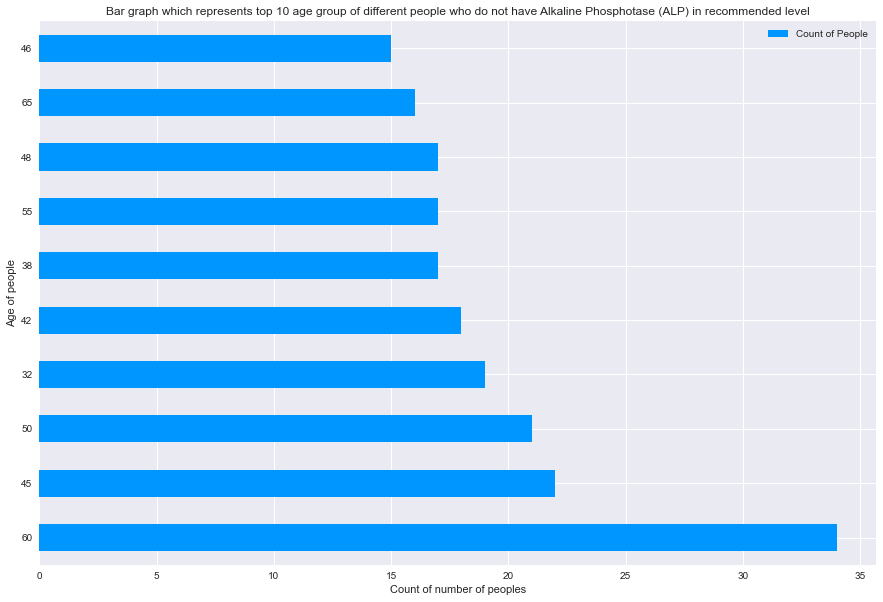

In [661]:
topTenALPNN.plot.barh(x='Age', y='Count',figsize=(15,10),color="#0096FF", label="Count of People")
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents top 10 age group of different people who do not have Alkaline Phosphotase (ALP) in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Peoples as per the age having normal Alkaline Phosphotase (ALP) level

In [662]:
liver_df[liver_df['Alkaline_Phosphotase_Description']=='Normal'].groupby('Age')['Alkaline_Phosphotase_Binary'].count()

Age
17    1
20    1
21    3
22    1
25    2
26    5
28    2
29    1
30    1
32    1
33    1
35    1
36    1
37    3
38    3
40    1
41    1
42    2
43    2
45    2
46    1
48    3
49    1
50    2
52    1
55    1
56    1
58    3
61    1
62    1
64    1
65    1
66    1
68    1
69    1
70    1
72    2
Name: Alkaline_Phosphotase_Binary, dtype: int64

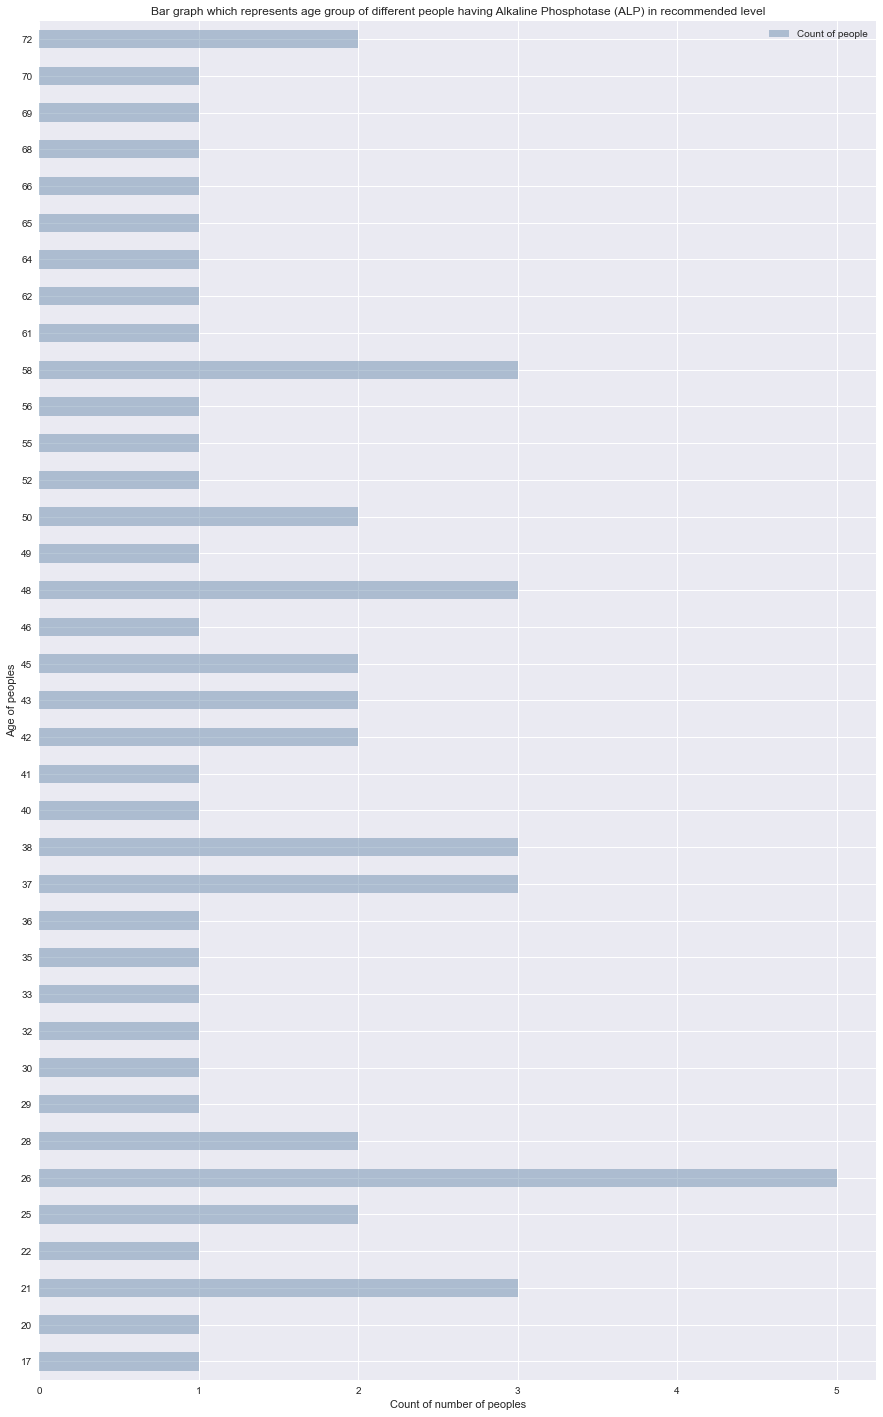

In [663]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Alkaline_Phosphotase_Description']=='Normal'].groupby('Age')['Alkaline_Phosphotase_Binary'].count().plot(kind="barh",
                                                                                                                  label="Count of people", 
                                                                                                                  color="#6F8FAF",
                                                                                                                  alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of peoples") #defining label for y-axis
plt.title("Bar graph which represents age group of different people having Alkaline Phosphotase (ALP) in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### People having Alkaline Phosphotase (ALP) not in recommended level as per the gender

In [664]:
liver_df[liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range'].groupby('Gender')['Alkaline_Phosphotase_Binary'].count()

Gender
Female    122
Male      386
Name: Alkaline_Phosphotase_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Alkaline Phosphotase in recommended level as per the gender')

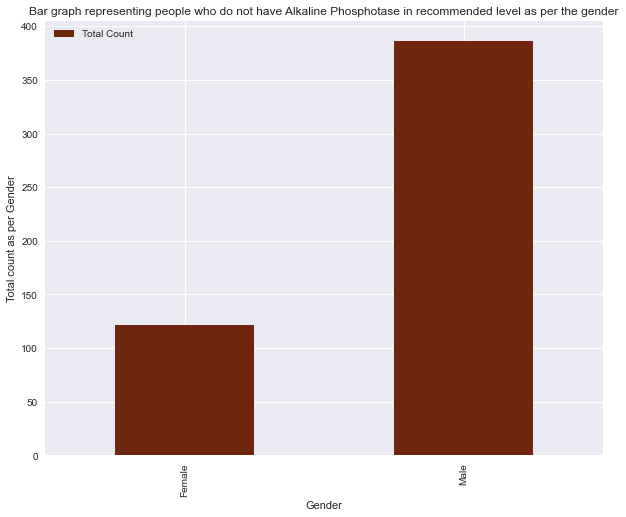

In [665]:
ALP_not_normal=liver_df[liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range'].groupby('Gender')['Alkaline_Phosphotase_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#6E260E",
                                                                                                                                  label="Total Count")
ALP_not_normal.legend() #for placing a legend on the axes
ALP_not_normal.set_xlabel("Gender") #defining label for x-axis
ALP_not_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
ALP_not_normal.set_title("Bar graph representing people who do not have Alkaline Phosphotase in recommended level as per the gender") #defining title for the figure

#### Peoples having normal Alkaline Phosphotase (ALP) level as per the gender

In [666]:
liver_df[liver_df['Alkaline_Phosphotase_Description']=='Normal'].groupby('Gender')['Alkaline_Phosphotase_Binary'].count()

Gender
Female    16
Male      42
Name: Alkaline_Phosphotase_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Alkaline Phosphotase (ALP) in recommended level as per the gender')

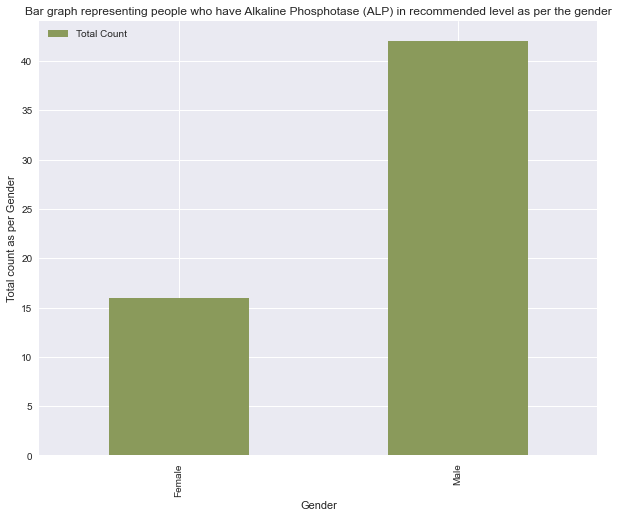

In [667]:
ALP_normal=liver_df[liver_df['Alkaline_Phosphotase_Description']=='Normal'].groupby('Gender')['Alkaline_Phosphotase_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#8A9A5B",
                                                                                                                                  label="Total Count")
ALP_normal.legend() #for placing a legend on the axes
ALP_normal.set_xlabel("Gender") #defining label for x-axis
ALP_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
ALP_normal.set_title("Bar graph representing people who have Alkaline Phosphotase (ALP) in recommended level as per the gender") #defining title for the figure

In [668]:
liver_df

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
561   60    Male              0.5               0.1                   500   
562   40    Male              0.6               0.1                    98   
563   52    Male              0.8               0.2                   245   
564   31    Male              1.3               0.5                   184   
565   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
561                        20                          34             5.9   
562                        35                          31             6.0   
563                        48                          49             6.4   
564                        29                          32             6.8   
565                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  \
0        3.3                        0.90        1   
1        3.2                        0.74        1   
2        3.3                        0.89        1   
3        3.4                        1.00        1   
4        2.4                        0.40        1   
..       ...                         ...      ...   
561      1.6                        0.37        2   
562      3.2                        1.10        1   
563      3.2                        1.00        1   
564      3.4                        1.00        1   
565      4.4                        1.50        2   

                   Dataset_Details  Gender_Binary  Total_Bilirubin_Binary  \
0       Patient with liver disease              0                       1   
1       Patient with liver disease              1                       0   
2       Patient with liver disease              1                       0   
3       Patient with liver disease              1                       1   
4       Patient with liver disease              1                       0   
..                             ...            ...                     ...   
561  Patient with no liver disease              1                       1   
562     Patient with liver disease              1                       1   
563     Patient with liver disease              1                       1   
564     Patient with liver disease              1                       0   
565  Patient with no liver disease              1                       1   

    Total_Bilirubin_Description  Direct_Bilirubin_Binary  \
0                        Normal                        1   
1           Not in Normal Range                        0   
2           Not in Normal Range                        0   
3                        Normal                        1   
4           Not in Normal Range                        0   
..                          ...                      ...   
561                      Normal                        1   
562                      Normal                        1   
563                      Normal                      

#### Normal level Alkaline Phosphotase (ALP) vs Alkaline Phosphotase (ALP) not in normal level as per the gender

Text(0.5, 0.98, 'Bar graph of Normal level Alkaline Phosphotase (ALP) vs Alkaline Phosphotase (ALP) not in normal level as per the gender')

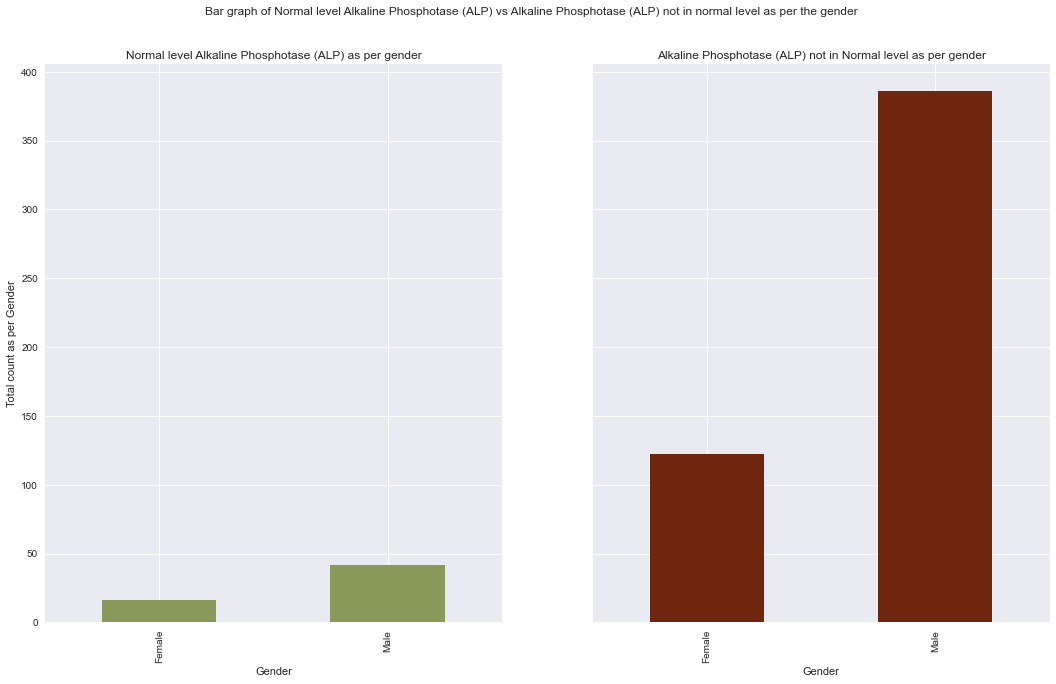

In [669]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
ALP_normal=liver_df[liver_df['Alkaline_Phosphotase_Description']=='Normal'].groupby('Gender')['Alkaline_Phosphotase_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#8A9A5B",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
ALP_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
ALP_normal.set_title("Normal level Alkaline Phosphotase (ALP) as per gender")

ALP_not_normal=liver_df[liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range'].groupby('Gender')['Alkaline_Phosphotase_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#6E260E",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
ALP_not_normal.set_title("Alkaline Phosphotase (ALP) not in Normal level as per gender")
ALP_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Alkaline Phosphotase (ALP) vs Alkaline Phosphotase (ALP) not in normal level as per the gender") #defining title for the figure

#### The condition of liver of the patient according to the Alkaline Phosphotase (ALP) rate

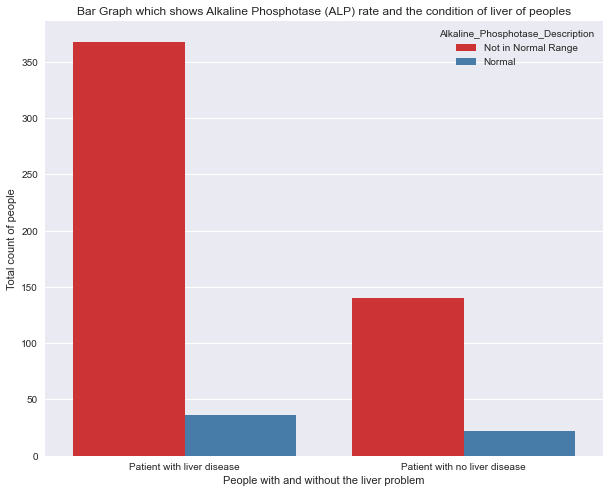

In [670]:
plt.figure(figsize=(10,8)) #Defining figure size
ALP_condition=sns.countplot(x="Dataset_Details", data=liver_df, hue="Alkaline_Phosphotase_Description",palette="Set1")
ALP_condition.set(xlabel="People with and without the liver problem",ylabel="Total count of people") #defining label for x-axis by providing xlabel and #efining label for y-axis by providing ylabel 
ALP_condition.set_title("Bar Graph which shows Alkaline Phosphotase (ALP) rate and the condition of liver of peoples") #defining title for the figure
plt.show()

#### People who have Alkaline Phosphotase (ALP) in normal level and have liver disease

In [671]:
ALP_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alkaline_Phosphotase_Description']=='Normal')].groupby('Gender')['Alkaline_Phosphotase_Binary'].count()
ALP_liverD

Gender
Female     8
Male      28
Name: Alkaline_Phosphotase_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Alkaline Phosphotase (ALP) in recommended level and have liver disease as per the gender')

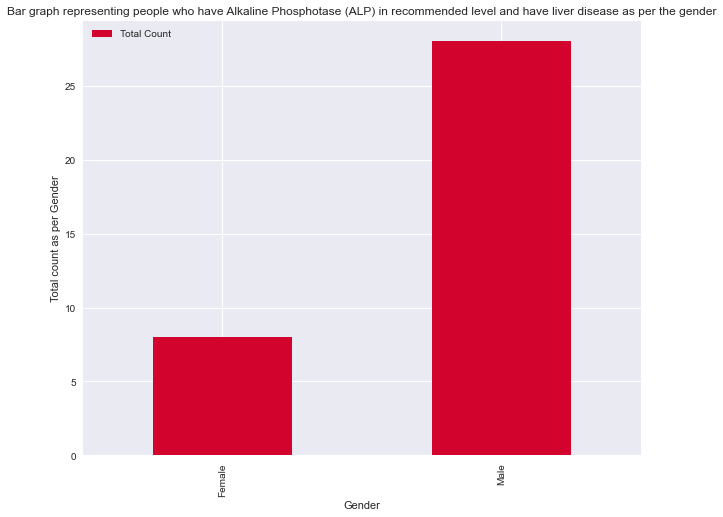

In [672]:
ALP_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alkaline_Phosphotase_Description']=='Normal')].groupby('Gender')['Alkaline_Phosphotase_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#D2042D",
                                                                                                                                  label="Total Count")
ALP_liverD.legend() #for placing a legend on the axes
ALP_liverD.set_xlabel("Gender") #defining label for x-axis
ALP_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
ALP_liverD.set_title("Bar graph representing people who have Alkaline Phosphotase (ALP) in recommended level and have liver disease as per the gender") #defining title for the figure

#### People who have Alkaline Phosphotase (ALP) in normal level and do not have liver disease

In [673]:
ALP_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alkaline_Phosphotase_Description']=='Normal')].groupby('Gender')['Alkaline_Phosphotase_Description'].count()
ALP_no_liverD

Gender
Female     8
Male      14
Name: Alkaline_Phosphotase_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Alkaline Phosphotase in recommended level and do not have liver disease as per the gender')

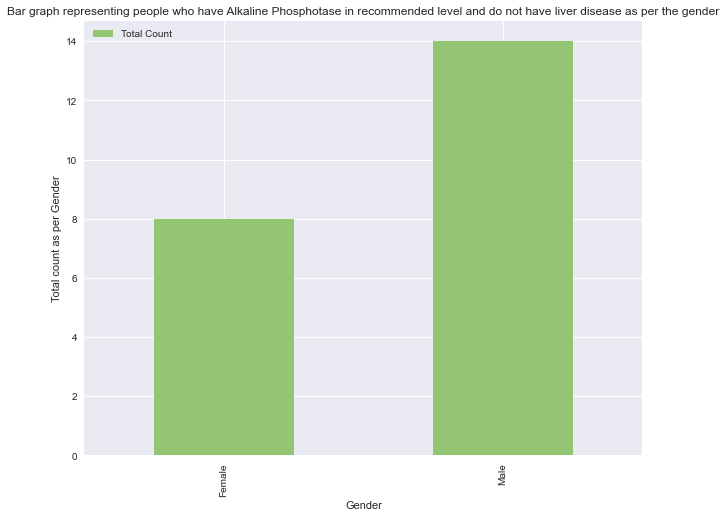

In [674]:
ALP_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alkaline_Phosphotase_Description']=='Normal')].groupby('Gender')['Alkaline_Phosphotase_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#93C572",
                                                                                                                                  label="Total Count")
ALP_no_liverD.legend() #for placing a legend on the axes
ALP_no_liverD.set_xlabel("Gender") #defining label for x-axis
ALP_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
ALP_no_liverD.set_title("Bar graph representing people who have Alkaline Phosphotase in recommended level and do not have liver disease as per the gender") #defining title for the figure

#### Alkaline Phosphotase (ALP) in normal level and having liver disease VS Alkaline Phosphotase (ALP)  in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Normal level Alkaline Phosphotase (ALP) in normal level and having liver disease VS Alkaline Phosphotase (ALP) in normal level and not having a liver disease')

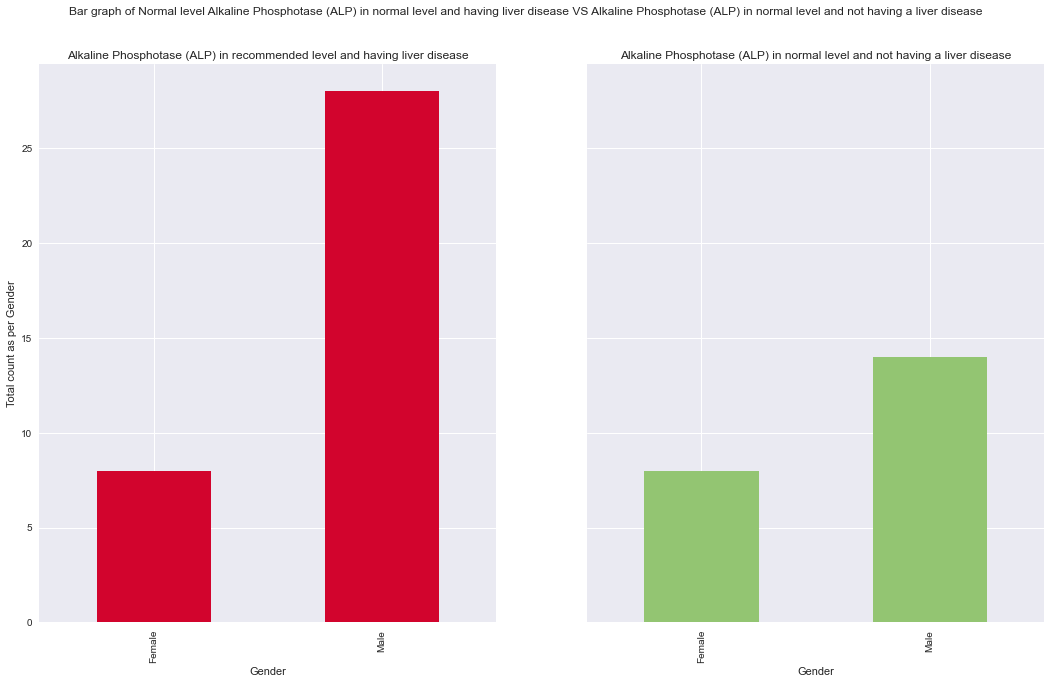

In [675]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
ALP_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alkaline_Phosphotase_Description']=='Normal')].groupby('Gender')['Alkaline_Phosphotase_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#D2042D",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
ALP_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
ALP_liverD.set_title("Alkaline Phosphotase (ALP) in recommended level and having liver disease")

ALP_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alkaline_Phosphotase_Description']=='Normal')].groupby('Gender')['Alkaline_Phosphotase_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#93C572",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
ALP_no_liverD.set_title("Alkaline Phosphotase (ALP) in normal level and not having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Alkaline Phosphotase (ALP) in normal level and having liver disease VS Alkaline Phosphotase (ALP) in normal level and not having a liver disease") #defining title for the figure

#### People who do not have Alkaline Phosphotase (ALP) in normal level and have liver diesease 

In [676]:
not_N_ALP_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range')].groupby('Gender')['Alkaline_Phosphotase_Description'].count()
not_N_ALP_liverD

Gender
Female     82
Male      286
Name: Alkaline_Phosphotase_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Alkaline Phosphotase in normal level and have liver diesease as per the gender')

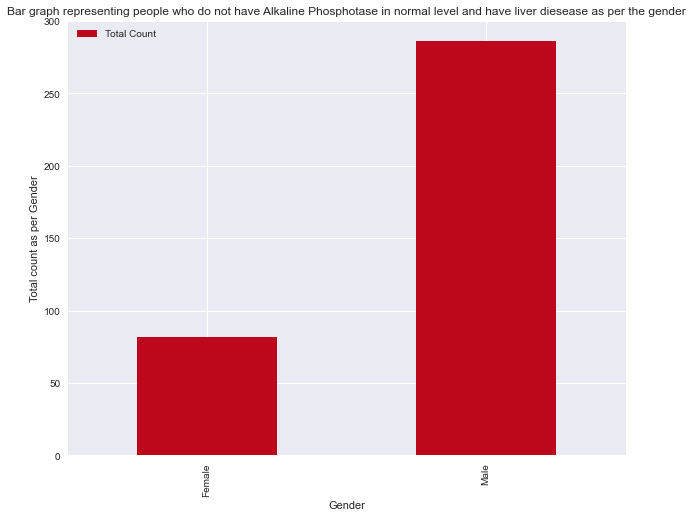

In [677]:
not_N_ALP_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range')].groupby('Gender')['Alkaline_Phosphotase_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#BC071D",
                                                                                                                                  label="Total Count")
not_N_ALP_liverD.legend() #for placing a legend on the axes
not_N_ALP_liverD.set_xlabel("Gender") #defining label for x-axis
not_N_ALP_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_N_ALP_liverD.set_title("Bar graph representing people who do not have Alkaline Phosphotase in normal level and have liver diesease as per the gender") #defining title for the figure

#### People who do not have Alkaline Phosphotase (ALP) in normal level and do not have liver disease as well

In [678]:
not_N_ALP_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range')].groupby('Gender')['Alkaline_Phosphotase_Description'].count()
not_N_ALP_no_liverD

Gender
Female     40
Male      100
Name: Alkaline_Phosphotase_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Alkaline Phosphotase (ALP) in normal level and do not have liver disease as per the gender')

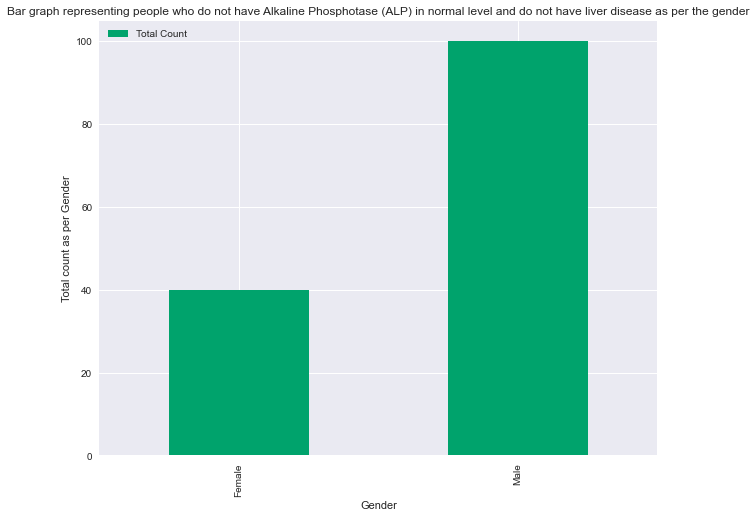

In [679]:
not_N_ALP_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range')].groupby('Gender')['Alkaline_Phosphotase_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#00A36C",
                                                                                                                                  label="Total Count")
not_N_ALP_no_liverD.legend() #for placing a legend on the axes
not_N_ALP_no_liverD.set_xlabel("Gender") #defining label for x-axis
not_N_ALP_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_N_ALP_no_liverD.set_title("Bar graph representing people who do not have Alkaline Phosphotase (ALP) in normal level and do not have liver disease as per the gender") #defining title for the figure

#### Alkaline Phosphotase (ALP) not in normal level and having liver disease VS Alkaline Phosphotase (ALP) not in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Alkaline Phosphotase (ALP) not in normal level and having liver disease VS Alkaline Phosphotase (ALP) not in normal level and not having a liver disease')

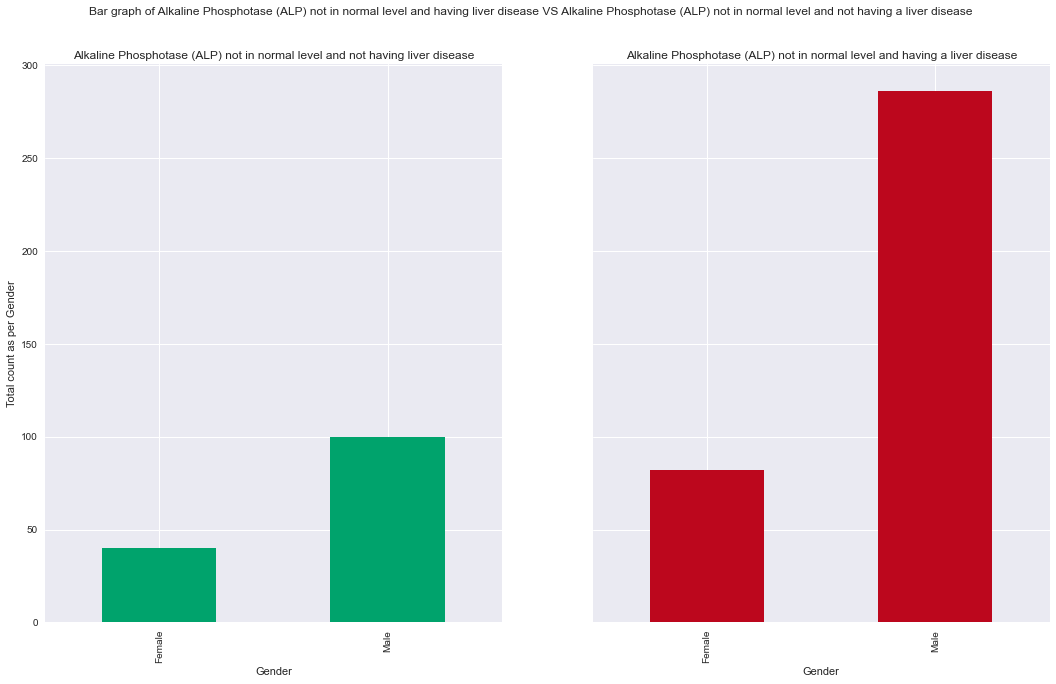

In [680]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
not_N_ALP_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range')].groupby('Gender')['Alkaline_Phosphotase_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#00A36C",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
not_N_ALP_no_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
not_N_ALP_no_liverD.set_title("Alkaline Phosphotase (ALP) not in normal level and not having liver disease")

not_N_ALP_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alkaline_Phosphotase_Description']=='Not in Normal Range')].groupby('Gender')['Alkaline_Phosphotase_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#BC071D",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
not_N_ALP_liverD.set_title("Alkaline Phosphotase (ALP) not in normal level and having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Alkaline Phosphotase (ALP) not in normal level and having liver disease VS Alkaline Phosphotase (ALP) not in normal level and not having a liver disease") #defining title for the figure

### Further analysis and Data Visualization on Sgpt Alamine aminotransferase (ALT)

#### Creating function as per the recommended rate of Alamine Aminotransferase

In [681]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               566 non-null    int64  
 1   Gender                            566 non-null    object 
 2   Total_Bilirubin                   566 non-null    float64
 3   Direct_Bilirubin                  566 non-null    float64
 4   Alkaline_Phosphotase              566 non-null    int64  
 5   Alamine_Aminotransferase          566 non-null    int64  
 6   Aspartate_Aminotransferase        566 non-null    int64  
 7   Total_Protiens                    566 non-null    float64
 8   Albumin                           566 non-null    float64
 9   Albumin_and_Globulin_Ratio        566 non-null    float64
 10  Dataset                           566 non-null    int64  
 11  Dataset_Details                   566 non-null    object 
 12  Gender_B

In [682]:
liver_df['Alamine_Aminotransferase'] #extracting the values of selected columns from dataframe

0      16
1      64
2      60
3      14
4      27
       ..
561    20
562    35
563    48
564    29
565    21
Name: Alamine_Aminotransferase, Length: 566, dtype: int64

In [683]:
#Creating a function to provide 1 value to normal total bilirubin rate and 0 to not normal total bilrubin rate
def binary_alamine_aminotransferase(alamine_aminotransferase):
    if alamine_aminotransferase>=5 and alamine_aminotransferase<=35:
        return 1
    else:
        return 0

In [684]:
liver_df['Alamine_Aminotransferase_Binary'] = liver_df['Alamine_Aminotransferase'].apply(binary_alamine_aminotransferase) #Implementing the developed function and creating a new column as per the defined logic

In [685]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               566 non-null    int64  
 1   Gender                            566 non-null    object 
 2   Total_Bilirubin                   566 non-null    float64
 3   Direct_Bilirubin                  566 non-null    float64
 4   Alkaline_Phosphotase              566 non-null    int64  
 5   Alamine_Aminotransferase          566 non-null    int64  
 6   Aspartate_Aminotransferase        566 non-null    int64  
 7   Total_Protiens                    566 non-null    float64
 8   Albumin                           566 non-null    float64
 9   Albumin_and_Globulin_Ratio        566 non-null    float64
 10  Dataset                           566 non-null    int64  
 11  Dataset_Details                   566 non-null    object 
 12  Gender_B

In [686]:
liver_df[['Alamine_Aminotransferase','Alamine_Aminotransferase_Binary']] #extracting the values of selected columns from dataframe

Alamine_Aminotransferase  Alamine_Aminotransferase_Binary
0                          16                                1
1                          64                                0
2                          60                                0
3                          14                                1
4                          27                                1
..                        ...                              ...
561                        20                                1
562                        35                                1
563                        48                                0
564                        29                                1
565                        21                                1

[566 rows x 2 columns]

In [687]:
#Creating a function for determining normal alkaline phosphotase
def desc_alamine_aminotransferase(alamine_aminotransferase):
    if alamine_aminotransferase>=5 and alamine_aminotransferase<=35:
        return "Normal"
    else:
        return "Not in Normal Range"

In [688]:
liver_df['Alamine_Aminotransferase_Description'] = liver_df['Alamine_Aminotransferase'].apply(desc_alamine_aminotransferase) #Implementing the developed function and creating a new column as per the defined logic

In [689]:
liver_df[['Alamine_Aminotransferase','Alamine_Aminotransferase_Binary','Alamine_Aminotransferase_Description']] #extracting the values of selected columns from dataframe

Alamine_Aminotransferase  Alamine_Aminotransferase_Binary  \
0                          16                                1   
1                          64                                0   
2                          60                                0   
3                          14                                1   
4                          27                                1   
..                        ...                              ...   
561                        20                                1   
562                        35                                1   
563                        48                                0   
564                        29                                1   
565                        21                                1   

    Alamine_Aminotransferase_Description  
0                                 Normal  
1                    Not in Normal Range  
2                    Not in Normal Range  
3                                 Normal  
4                                 Normal  
..                                   ...  
561                               Normal  
562                               Normal  
563                  Not in Normal Range  
564                               Normal  
565                               Normal  

[566 rows x 3 columns]

In [690]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   566 non-null    int64  
 1   Gender                                566 non-null    object 
 2   Total_Bilirubin                       566 non-null    float64
 3   Direct_Bilirubin                      566 non-null    float64
 4   Alkaline_Phosphotase                  566 non-null    int64  
 5   Alamine_Aminotransferase              566 non-null    int64  
 6   Aspartate_Aminotransferase            566 non-null    int64  
 7   Total_Protiens                        566 non-null    float64
 8   Albumin                               566 non-null    float64
 9   Albumin_and_Globulin_Ratio            566 non-null    float64
 10  Dataset                               566 non-null    int64  
 11  Dataset_Details    

#### Peoples as per the age whose Alamine Aminotransferase (ALT) is not in the the recommended level

In [691]:
liver_df[liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range'].groupby('Age')['Alamine_Aminotransferase_Binary'].count()

Age
4     1
6     1
7     1
12    2
14    1
     ..
69    1
70    6
73    1
75    7
90    1
Name: Alamine_Aminotransferase_Binary, Length: 61, dtype: int64

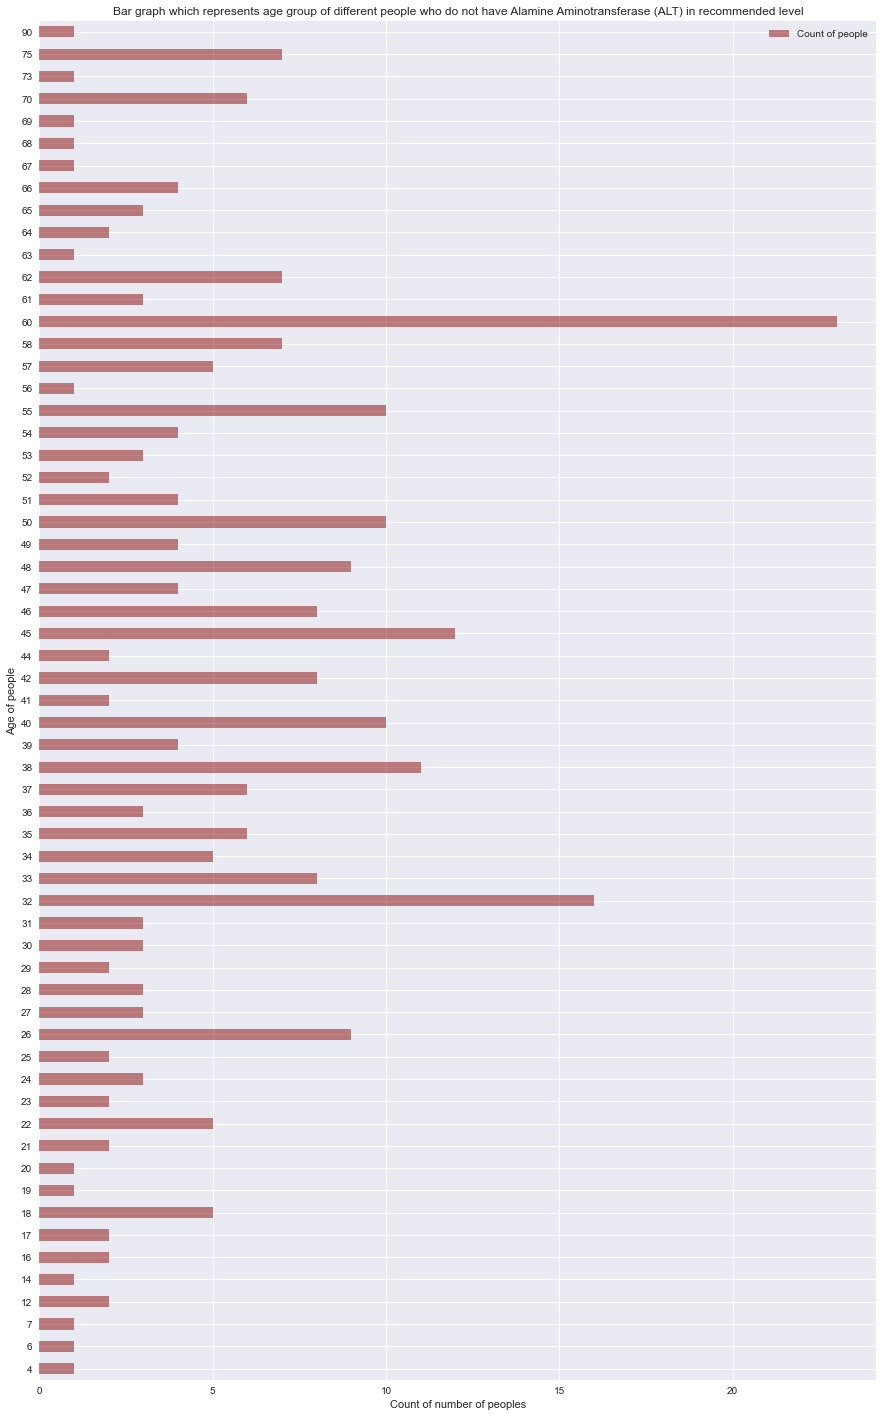

In [692]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range'].groupby('Age')['Alamine_Aminotransferase_Binary'].count().plot(kind="barh",
                                                                                                                               label="Count of people",
                                                                                                                               color="#880808",
                                                                                                                               alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents age group of different people who do not have Alamine Aminotransferase (ALT) in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Top 10 age group people having Alamine Aminotransferase (ALT) in not recommended level

In [693]:
topTenALTNN = liver_df[liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range'].groupby('Age')['Alamine_Aminotransferase_Binary'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head(10) 
topTenALTNN

Age  Count
47   60     23
21   32     16
33   45     12
27   38     11
43   55     10
38   50     10
29   40     10
15   26      9
36   48      9
22   33      8

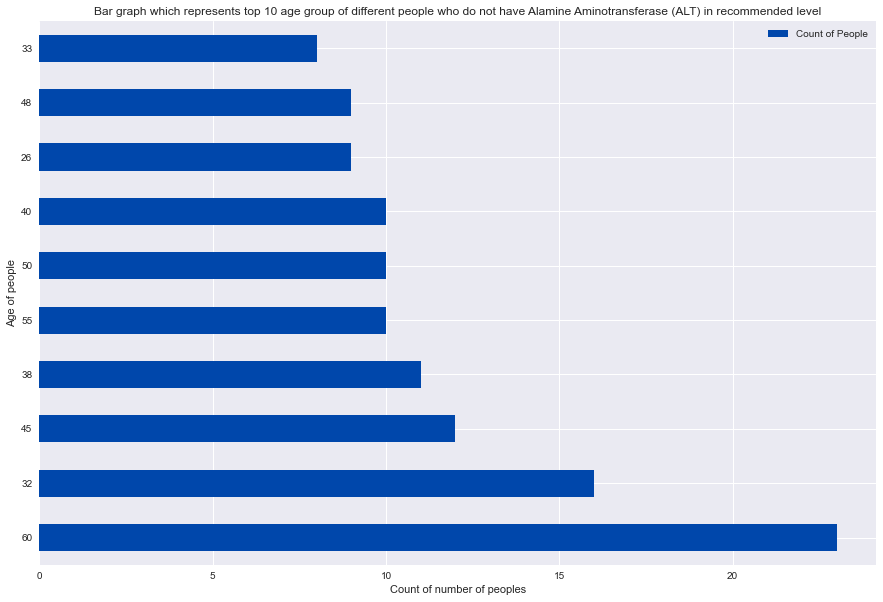

In [694]:
topTenALTNN.plot.barh(x='Age', y='Count',figsize=(15,10),color="#0047AB", label="Count of People")
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents top 10 age group of different people who do not have Alamine Aminotransferase (ALT) in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Peoples as per the age having normal Alamine Aminotransferase (ALT) level

In [695]:
liver_df[liver_df['Alamine_Aminotransferase_Description']=='Normal'].groupby('Age')['Alamine_Aminotransferase_Binary'].count()

Age
4     1
7     1
8     1
10    1
11    1
     ..
74    4
75    7
78    1
84    1
85    1
Name: Alamine_Aminotransferase_Binary, Length: 68, dtype: int64

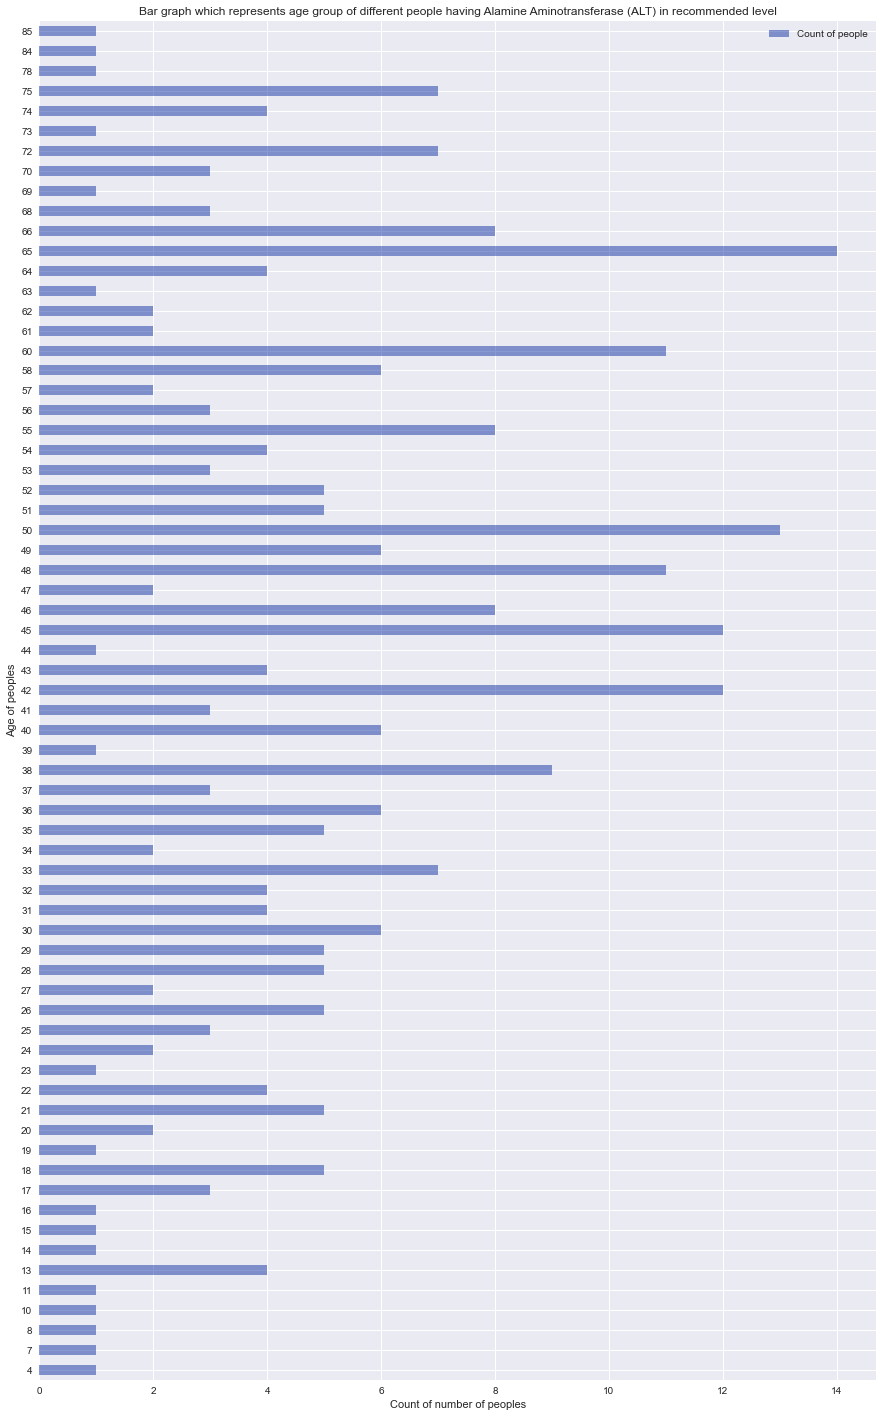

In [696]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Alamine_Aminotransferase_Description']=='Normal'].groupby('Age')['Alamine_Aminotransferase_Binary'].count().plot(kind="barh",
                                                                                                                  label="Count of people", 
                                                                                                                  color="#1434A4",
                                                                                                                  alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of peoples") #defining label for y-axis
plt.title("Bar graph which represents age group of different people having Alamine Aminotransferase (ALT) in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### People having Alamine Aminotransferase (ALT) not in recommended level as per the gender

In [697]:
liver_df[liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range'].groupby('Gender')['Alamine_Aminotransferase_Binary'].count()

Gender
Female     45
Male      234
Name: Alamine_Aminotransferase_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Alamine Aminotransferase (ALT) in recommended level as per the gender')

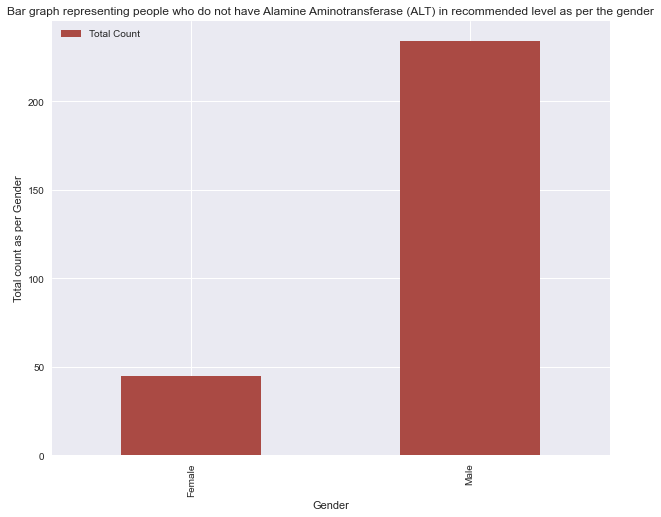

In [698]:
ALT_not_normal=liver_df[liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range'].groupby('Gender')['Alamine_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#AA4A44",
                                                                                                                                  label="Total Count")
ALT_not_normal.legend() #for placing a legend on the axes
ALT_not_normal.set_xlabel("Gender") #defining label for x-axis
ALT_not_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
ALT_not_normal.set_title("Bar graph representing people who do not have Alamine Aminotransferase (ALT) in recommended level as per the gender") #defining title for the figure

#### Peoples having normal Alamine Aminotransferase (ALT) level as per the gender

In [699]:
liver_df[liver_df['Alamine_Aminotransferase_Description']=='Normal'].groupby('Gender')['Alamine_Aminotransferase_Binary'].count()

Gender
Female     93
Male      194
Name: Alamine_Aminotransferase_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Alamine Aminotransferase (ALT) in recommended level as per the gender')

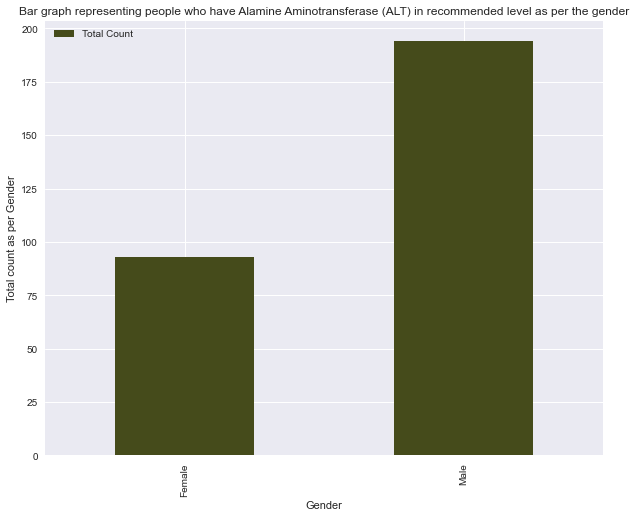

In [700]:
ALT_normal=liver_df[liver_df['Alamine_Aminotransferase_Description']=='Normal'].groupby('Gender')['Alamine_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#454B1B",
                                                                                                                                  label="Total Count")
ALT_normal.legend() #for placing a legend on the axes
ALT_normal.set_xlabel("Gender") #defining label for x-axis
ALT_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
ALT_normal.set_title("Bar graph representing people who have Alamine Aminotransferase (ALT) in recommended level as per the gender") #defining title for the figure

In [701]:
liver_df

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
561   60    Male              0.5               0.1                   500   
562   40    Male              0.6               0.1                    98   
563   52    Male              0.8               0.2                   245   
564   31    Male              1.3               0.5                   184   
565   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
561                        20                          34             5.9   
562                        35                          31             6.0   
563                        48                          49             6.4   
564                        29                          32             6.8   
565                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  ...                Dataset_Details  \
0        3.3                        0.90  ...     Patient with liver disease   
1        3.2                        0.74  ...     Patient with liver disease   
2        3.3                        0.89  ...     Patient with liver disease   
3        3.4                        1.00  ...     Patient with liver disease   
4        2.4                        0.40  ...     Patient with liver disease   
..       ...                         ...  ...                            ...   
561      1.6                        0.37  ...  Patient with no liver disease   
562      3.2                        1.10  ...     Patient with liver disease   
563      3.2                        1.00  ...     Patient with liver disease   
564      3.4                        1.00  ...     Patient with liver disease   
565      4.4                        1.50  ...  Patient with no liver disease   

    Gender_Binary  Total_Bilirubin_Binary  Total_Bilirubin_Description  \
0               0                       1                       Normal   
1               1                       0          Not in Normal Range   
2               1                       0          Not in Normal Range   
3               1                       1                       Normal   
4               1                       0          Not in Normal Range   
..            ...                     ...                          ...   
561             1                       1                       Normal   
562             1                       1                       Normal   
563             1                       1                       Normal   
564             1                       0          Not in Normal Range   
565             1                       1                       Normal   

    Direct_Bilirubin_Binary  Direct_Bilirubin_Description  \
0                         1                        Normal   
1                         0           Not in Normal Range   
2                         0           Not in Normal Range   
3                         1                        Normal   


#### Normal level Alamine Aminotransferase (ALT) vs Alamine Aminotransferase (ALT) not in normal level as per the gender

Text(0.5, 0.98, 'Bar graph of Normal level Alamine Aminotransferase (ALT) vs Alamine Aminotransferase (ALT) not in normal level as per the gender')

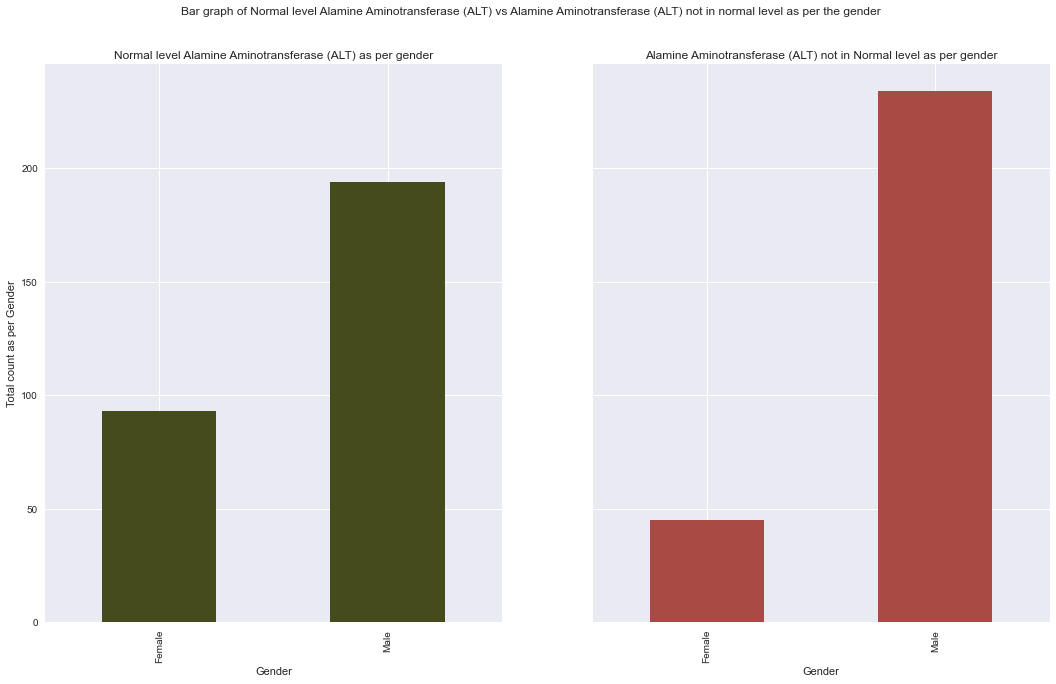

In [702]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
ALT_normal=liver_df[liver_df['Alamine_Aminotransferase_Description']=='Normal'].groupby('Gender')['Alamine_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#454B1B",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
ALT_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
ALT_normal.set_title("Normal level Alamine Aminotransferase (ALT) as per gender")

ALT_not_normal=liver_df[liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range'].groupby('Gender')['Alamine_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#AA4A44",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
ALT_not_normal.set_title("Alamine Aminotransferase (ALT) not in Normal level as per gender")
ALT_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Alamine Aminotransferase (ALT) vs Alamine Aminotransferase (ALT) not in normal level as per the gender") #defining title for the figure

#### The condition of liver of the patient according to the Alamine Aminotransferase (ALT) rate

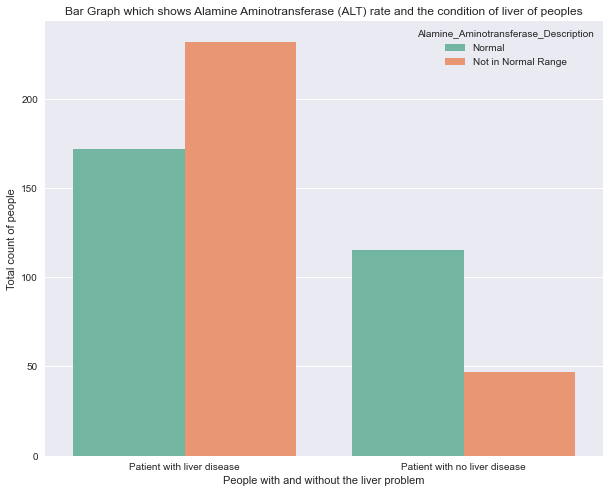

In [703]:
plt.figure(figsize=(10,8)) #Defining figure size
ALP_condition=sns.countplot(x="Dataset_Details", data=liver_df, hue="Alamine_Aminotransferase_Description",palette="Set2")
ALP_condition.set(xlabel="People with and without the liver problem",ylabel="Total count of people") #defining label for x-axis by providing xlabel and #efining label for y-axis by providing ylabel 
ALP_condition.set_title("Bar Graph which shows Alamine Aminotransferase (ALT) rate and the condition of liver of peoples") #defining title for the figure
plt.show()

#### People who have Alamine Aminotransferase (ALT) in normal level and have liver disease

In [704]:
ALT_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alamine_Aminotransferase_Description']=='Normal')].groupby('Gender')['Alamine_Aminotransferase_Binary'].count()
ALT_liverD

Gender
Female     54
Male      118
Name: Alamine_Aminotransferase_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Alamine Aminotransferase (ALT) in recommended level and have liver disease as per the gender')

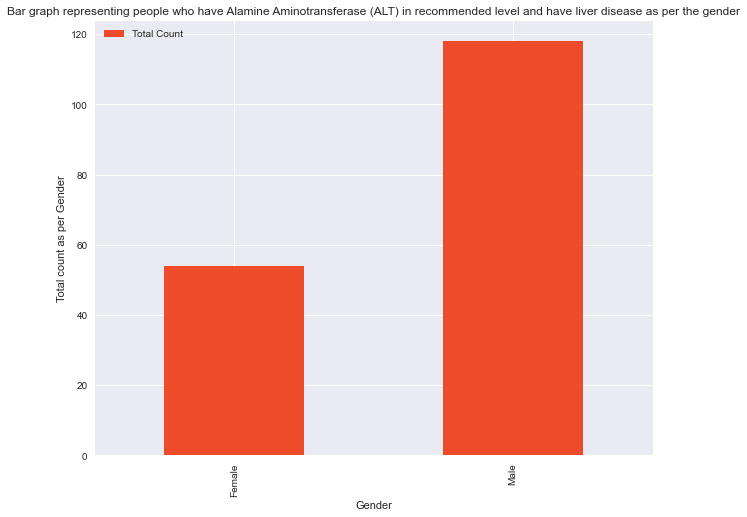

In [705]:
ALT_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alamine_Aminotransferase_Description']=='Normal')].groupby('Gender')['Alamine_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#EE4B2B",
                                                                                                                                  label="Total Count")
ALT_liverD.legend() #for placing a legend on the axes
ALT_liverD.set_xlabel("Gender") #defining label for x-axis
ALT_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
ALT_liverD.set_title("Bar graph representing people who have Alamine Aminotransferase (ALT) in recommended level and have liver disease as per the gender") #defining title for the figure

#### People who have Alamine Aminotransferase (ALT) in normal level and do not have liver disease

In [706]:
ALT_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alamine_Aminotransferase_Description']=='Normal')].groupby('Gender')['Alamine_Aminotransferase_Description'].count()
ALT_no_liverD

Gender
Female    39
Male      76
Name: Alamine_Aminotransferase_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Alamine Aminotransferase (ALT) in recommended level and do not have liver disease as per the gender')

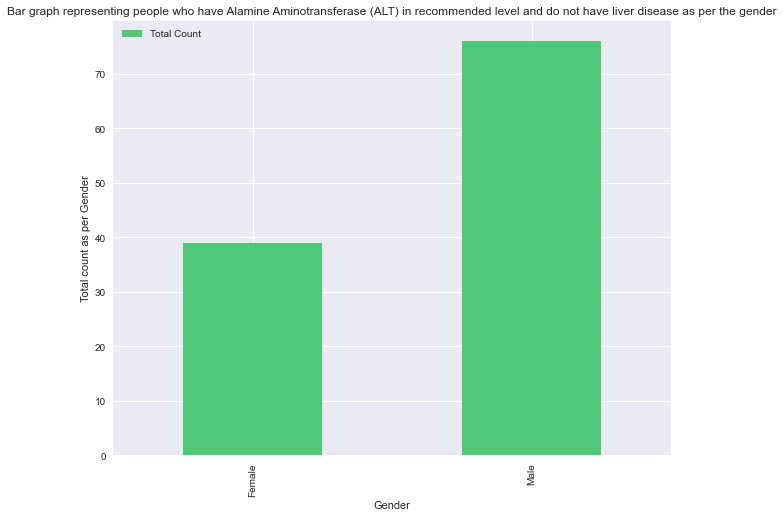

In [707]:
ALT_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alamine_Aminotransferase_Description']=='Normal')].groupby('Gender')['Alamine_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#50C878",
                                                                                                                                  label="Total Count")
ALT_no_liverD.legend() #for placing a legend on the axes
ALT_no_liverD.set_xlabel("Gender") #defining label for x-axis
ALT_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
ALT_no_liverD.set_title("Bar graph representing people who have Alamine Aminotransferase (ALT) in recommended level and do not have liver disease as per the gender") #defining title for the figure

#### Alamine Aminotransferase (ALT) in normal level and having liver disease VS Alamine Aminotransferase (ALT)  in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Normal level Alamine Aminotransferase (ALT) in normal level and having liver disease VS Alamine Aminotransferase (ALT) in normal level and not having a liver disease')

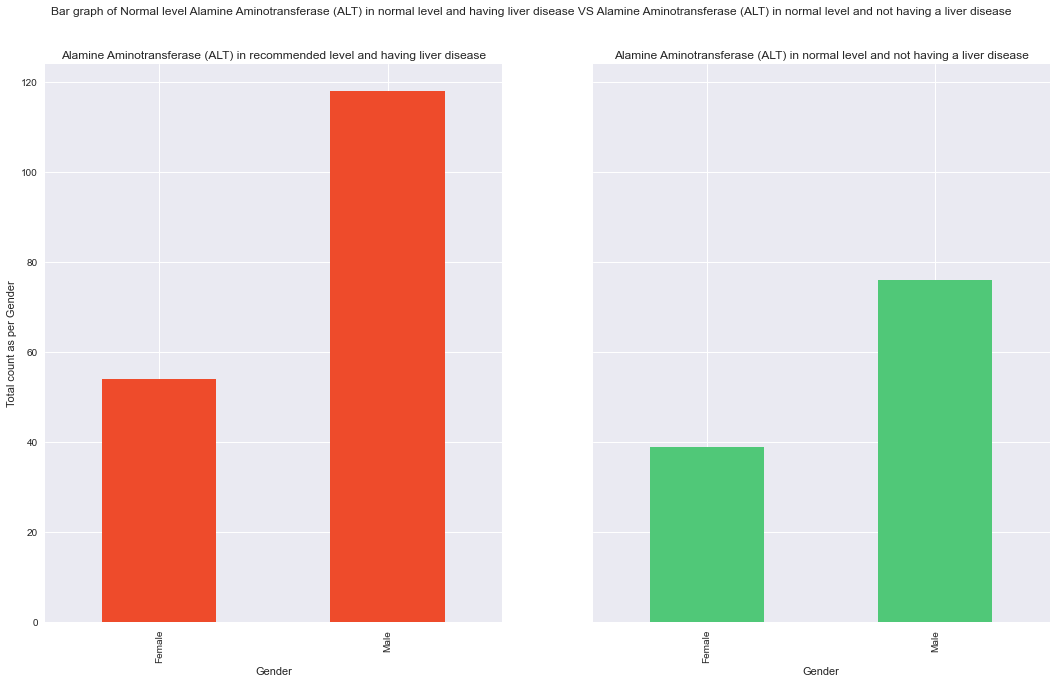

In [708]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
ALT_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alamine_Aminotransferase_Description']=='Normal')].groupby('Gender')['Alamine_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#EE4B2B",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
ALT_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
ALT_liverD.set_title("Alamine Aminotransferase (ALT) in recommended level and having liver disease")

ALT_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alamine_Aminotransferase_Description']=='Normal')].groupby('Gender')['Alamine_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#50C878",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
ALT_no_liverD.set_title("Alamine Aminotransferase (ALT) in normal level and not having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Alamine Aminotransferase (ALT) in normal level and having liver disease VS Alamine Aminotransferase (ALT) in normal level and not having a liver disease") #defining title for the figure

#### People who do not have Alamine Aminotransferase (ALT) in normal level and have liver diesease 

In [709]:
not_N_ALT_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Alamine_Aminotransferase_Description'].count()
not_N_ALT_liverD

Gender
Female     36
Male      196
Name: Alamine_Aminotransferase_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Alamine Aminotransferase (ALT) in normal level and have liver diesease as per the gender')

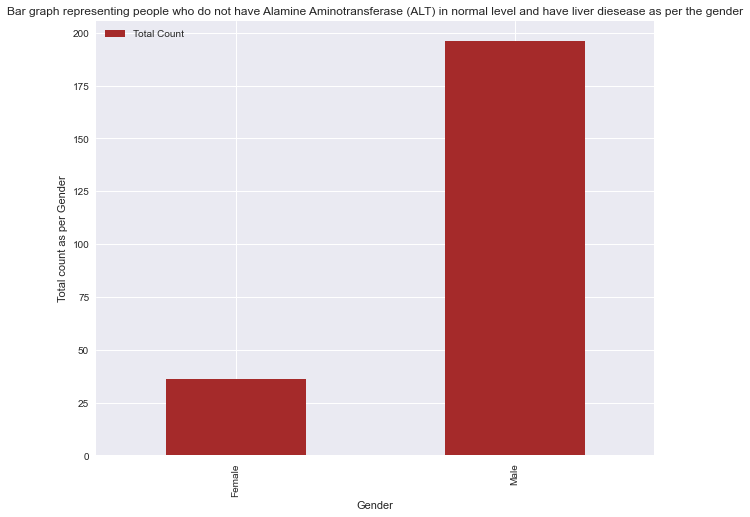

In [710]:
not_N_ALT_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Alamine_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#A52A2A",
                                                                                                                                  label="Total Count")
not_N_ALT_liverD.legend() #for placing a legend on the axes
not_N_ALT_liverD.set_xlabel("Gender") #defining label for x-axis
not_N_ALT_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_N_ALT_liverD.set_title("Bar graph representing people who do not have Alamine Aminotransferase (ALT) in normal level and have liver diesease as per the gender") #defining title for the figure

#### People who do not have Alamine Aminotransferase (ALT) in normal level and do not have liver disease as well

In [711]:
not_N_ALT_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Alamine_Aminotransferase_Description'].count()
not_N_ALT_no_liverD

Gender
Female     9
Male      38
Name: Alamine_Aminotransferase_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Alamine Aminotransferase (ALT) in normal level and do not have liver disease as per the gender')

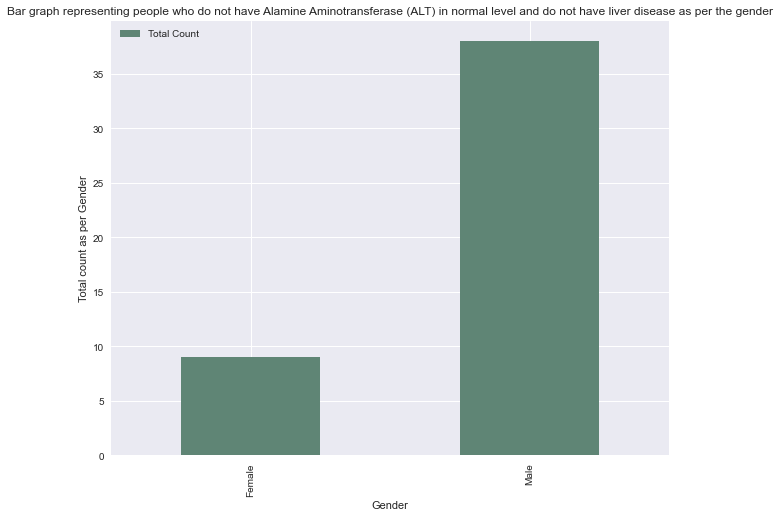

In [712]:
not_N_ALT_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Alamine_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#5F8575",
                                                                                                                                  label="Total Count")
not_N_ALT_no_liverD.legend() #for placing a legend on the axes
not_N_ALT_no_liverD.set_xlabel("Gender") #defining label for x-axis
not_N_ALT_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_N_ALT_no_liverD.set_title("Bar graph representing people who do not have Alamine Aminotransferase (ALT) in normal level and do not have liver disease as per the gender") #defining title for the figure

#### Alamine Aminotransferase (ALT) not in normal level and having liver disease VS Alamine Aminotransferase (ALT) not in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Alamine Aminotransferase (ALT) not in normal level and having liver disease VS Alamine Aminotransferase (ALT) not in normal level and not having a liver disease')

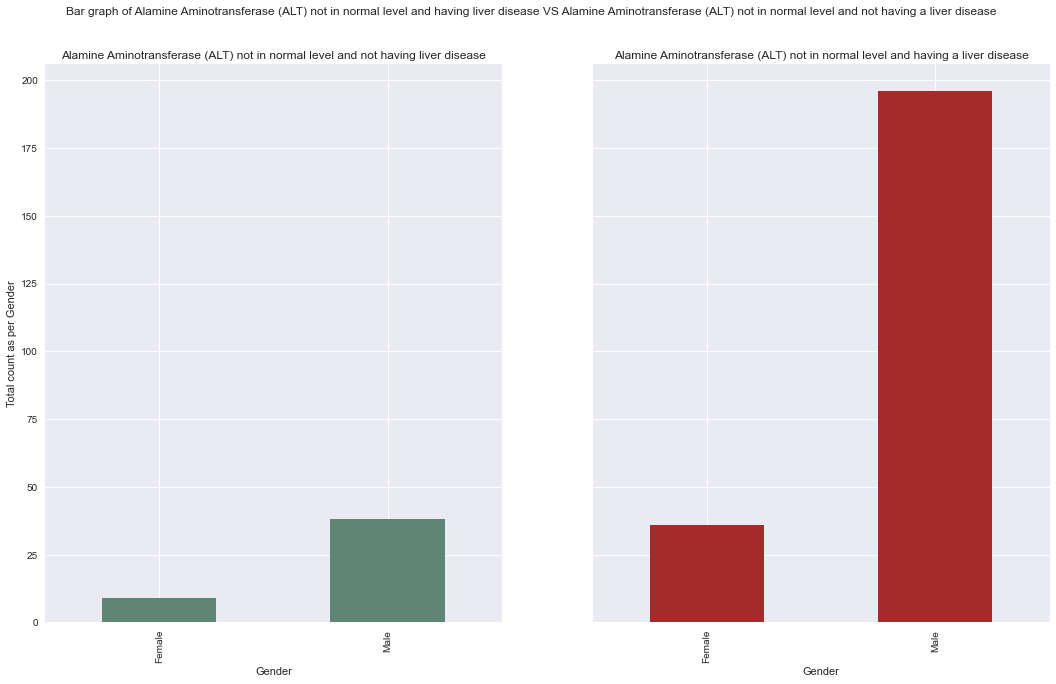

In [713]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
not_N_ALT_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Alamine_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#5F8575",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
not_N_ALT_no_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
not_N_ALT_no_liverD.set_title("Alamine Aminotransferase (ALT) not in normal level and not having liver disease")

not_N_ALT_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Alamine_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Alamine_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#A52A2A",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
not_N_ALT_liverD.set_title("Alamine Aminotransferase (ALT) not in normal level and having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Alamine Aminotransferase (ALT) not in normal level and having liver disease VS Alamine Aminotransferase (ALT) not in normal level and not having a liver disease") #defining title for the figure

### Further analysis and Data Visualization on Sgot Aspartate Aminotransferase (AST)

#### Creating function as per the recommended rate of Aspartate Aminotransferase

In [714]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   566 non-null    int64  
 1   Gender                                566 non-null    object 
 2   Total_Bilirubin                       566 non-null    float64
 3   Direct_Bilirubin                      566 non-null    float64
 4   Alkaline_Phosphotase                  566 non-null    int64  
 5   Alamine_Aminotransferase              566 non-null    int64  
 6   Aspartate_Aminotransferase            566 non-null    int64  
 7   Total_Protiens                        566 non-null    float64
 8   Albumin                               566 non-null    float64
 9   Albumin_and_Globulin_Ratio            566 non-null    float64
 10  Dataset                               566 non-null    int64  
 11  Dataset_Details    

In [715]:
liver_df['Aspartate_Aminotransferase'] #extracting the values of selected columns from dataframe

0       18
1      100
2       68
3       20
4       59
      ... 
561     34
562     31
563     49
564     32
565     24
Name: Aspartate_Aminotransferase, Length: 566, dtype: int64

In [716]:
#Creating a function to provide 1 value to normal Aspartate Aminotransferase rate and 0 to not normal Aspartate Aminotransferase rate
def binary_aspartate_aminotransferase(aspartate_aminotransferase):
    if aspartate_aminotransferase>=5 and aspartate_aminotransferase<=40:
        return 1
    else:
        return 0

In [717]:
liver_df['Aspartate_Aminotransferase_Binary'] = liver_df['Aspartate_Aminotransferase'].apply(binary_aspartate_aminotransferase) #Implementing the developed function and creating a new column as per the defined logic

In [718]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   566 non-null    int64  
 1   Gender                                566 non-null    object 
 2   Total_Bilirubin                       566 non-null    float64
 3   Direct_Bilirubin                      566 non-null    float64
 4   Alkaline_Phosphotase                  566 non-null    int64  
 5   Alamine_Aminotransferase              566 non-null    int64  
 6   Aspartate_Aminotransferase            566 non-null    int64  
 7   Total_Protiens                        566 non-null    float64
 8   Albumin                               566 non-null    float64
 9   Albumin_and_Globulin_Ratio            566 non-null    float64
 10  Dataset                               566 non-null    int64  
 11  Dataset_Details    

In [719]:
liver_df[['Aspartate_Aminotransferase','Aspartate_Aminotransferase_Binary']] #extracting the values of selected columns from dataframe

Aspartate_Aminotransferase  Aspartate_Aminotransferase_Binary
0                            18                                  1
1                           100                                  0
2                            68                                  0
3                            20                                  1
4                            59                                  0
..                          ...                                ...
561                          34                                  1
562                          31                                  1
563                          49                                  0
564                          32                                  1
565                          24                                  1

[566 rows x 2 columns]

In [720]:
#Creating a function for determining normal alkaline phosphotase
def desc_aspartate_aminotransferase(aspartate_aminotransferase):
    if aspartate_aminotransferase>=5 and aspartate_aminotransferase<=40:
        return "Normal"
    else:
        return "Not in Normal Range"

In [721]:
liver_df['Aspartate_Aminotransferase_Description'] = liver_df['Aspartate_Aminotransferase'].apply(desc_aspartate_aminotransferase) #Implementing the developed function and creating a new column as per the defined logic

In [722]:
liver_df[['Aspartate_Aminotransferase','Aspartate_Aminotransferase_Binary','Aspartate_Aminotransferase_Description']] #extracting the values of selected columns from dataframe

Aspartate_Aminotransferase  Aspartate_Aminotransferase_Binary  \
0                            18                                  1   
1                           100                                  0   
2                            68                                  0   
3                            20                                  1   
4                            59                                  0   
..                          ...                                ...   
561                          34                                  1   
562                          31                                  1   
563                          49                                  0   
564                          32                                  1   
565                          24                                  1   

    Aspartate_Aminotransferase_Description  
0                                   Normal  
1                      Not in Normal Range  
2                      Not in Normal Range  
3                                   Normal  
4                      Not in Normal Range  
..                                     ...  
561                                 Normal  
562                                 Normal  
563                    Not in Normal Range  
564                                 Normal  
565                                 Normal  

[566 rows x 3 columns]

In [723]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

#### Peoples as per the age whose Aspartate Aminotransferase (AST) is not in the the recommended level

In [724]:
liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range'].groupby('Age')['Aspartate_Aminotransferase_Binary'].count()

Age
4     1
7     2
8     1
10    1
12    2
     ..
73    2
74    1
75    4
78    1
90    1
Name: Aspartate_Aminotransferase_Binary, Length: 65, dtype: int64

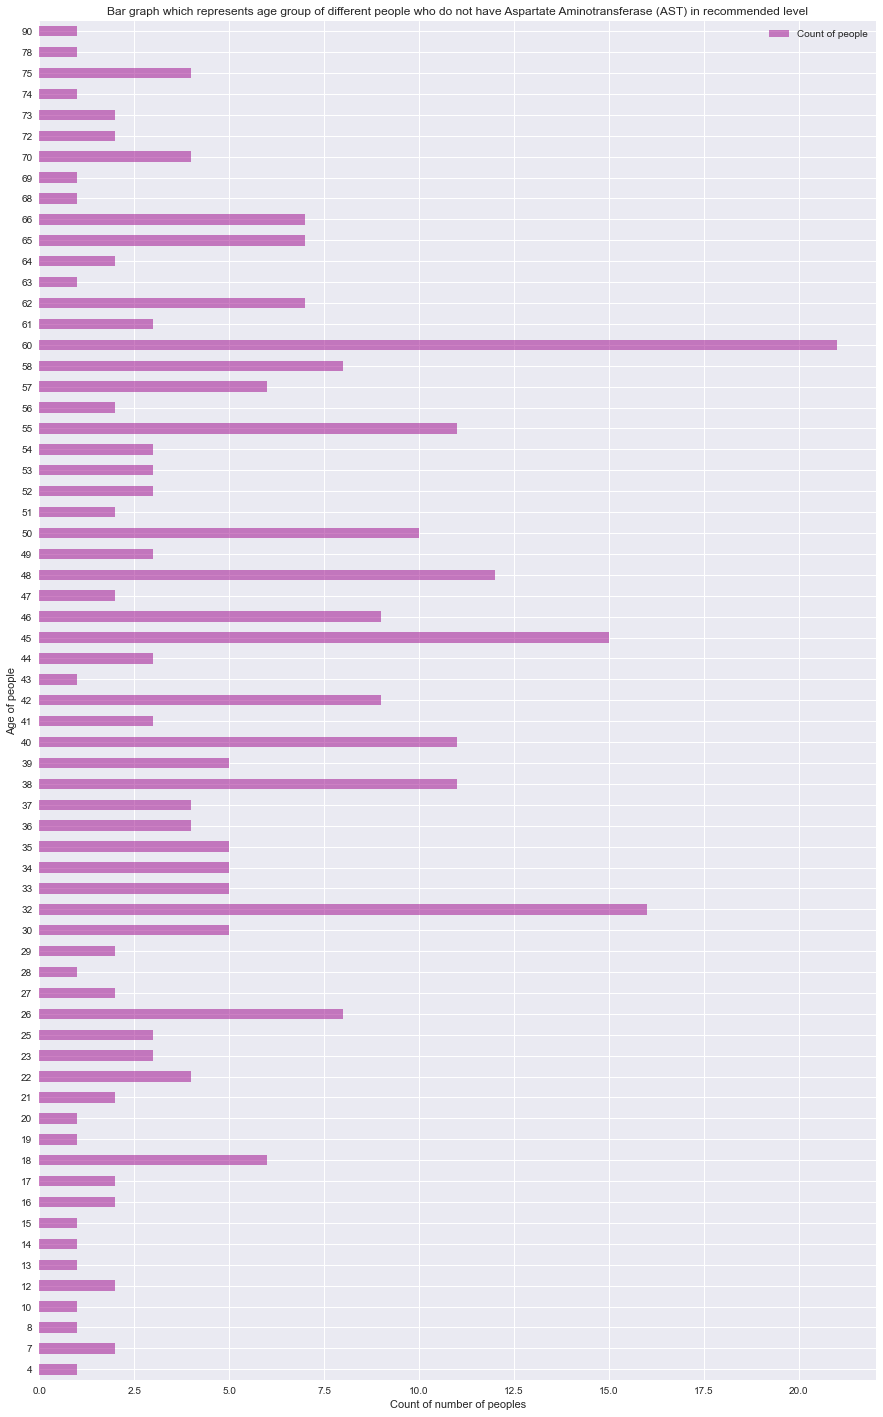

In [725]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range'].groupby('Age')['Aspartate_Aminotransferase_Binary'].count().plot(kind="barh",
                                                                                                                               label="Count of people",
                                                                                                                               color="#9B0389",
                                                                                                                               alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents age group of different people who do not have Aspartate Aminotransferase (AST) in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Top 10 age group people having Aspartate Aminotransferase (AST) in not recommended level

In [726]:
topTenASTNN = liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range'].groupby('Age')['Aspartate_Aminotransferase_Binary'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head(10) 
topTenASTNN

Age  Count
49   60     21
22   32     16
35   45     15
38   48     12
45   55     11
30   40     11
28   38     11
40   50     10
32   42      9
36   46      9

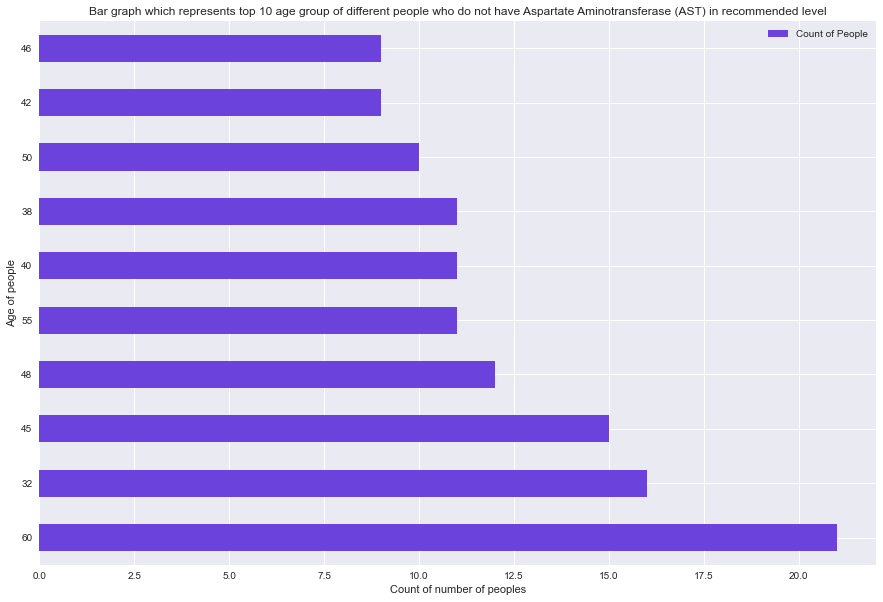

In [727]:
topTenASTNN.plot.barh(x='Age', y='Count',figsize=(15,10),color="#6B43DC", label="Count of People")
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents top 10 age group of different people who do not have Aspartate Aminotransferase (AST) in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Peoples as per the age having normal Aspartate Aminotransferase (AST) level

In [728]:
liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Normal'].groupby('Age')['Aspartate_Aminotransferase_Binary'].count()

Age
4      1
6      1
11     1
13     3
14     1
      ..
72     5
74     3
75    10
84     1
85     1
Name: Aspartate_Aminotransferase_Binary, Length: 61, dtype: int64

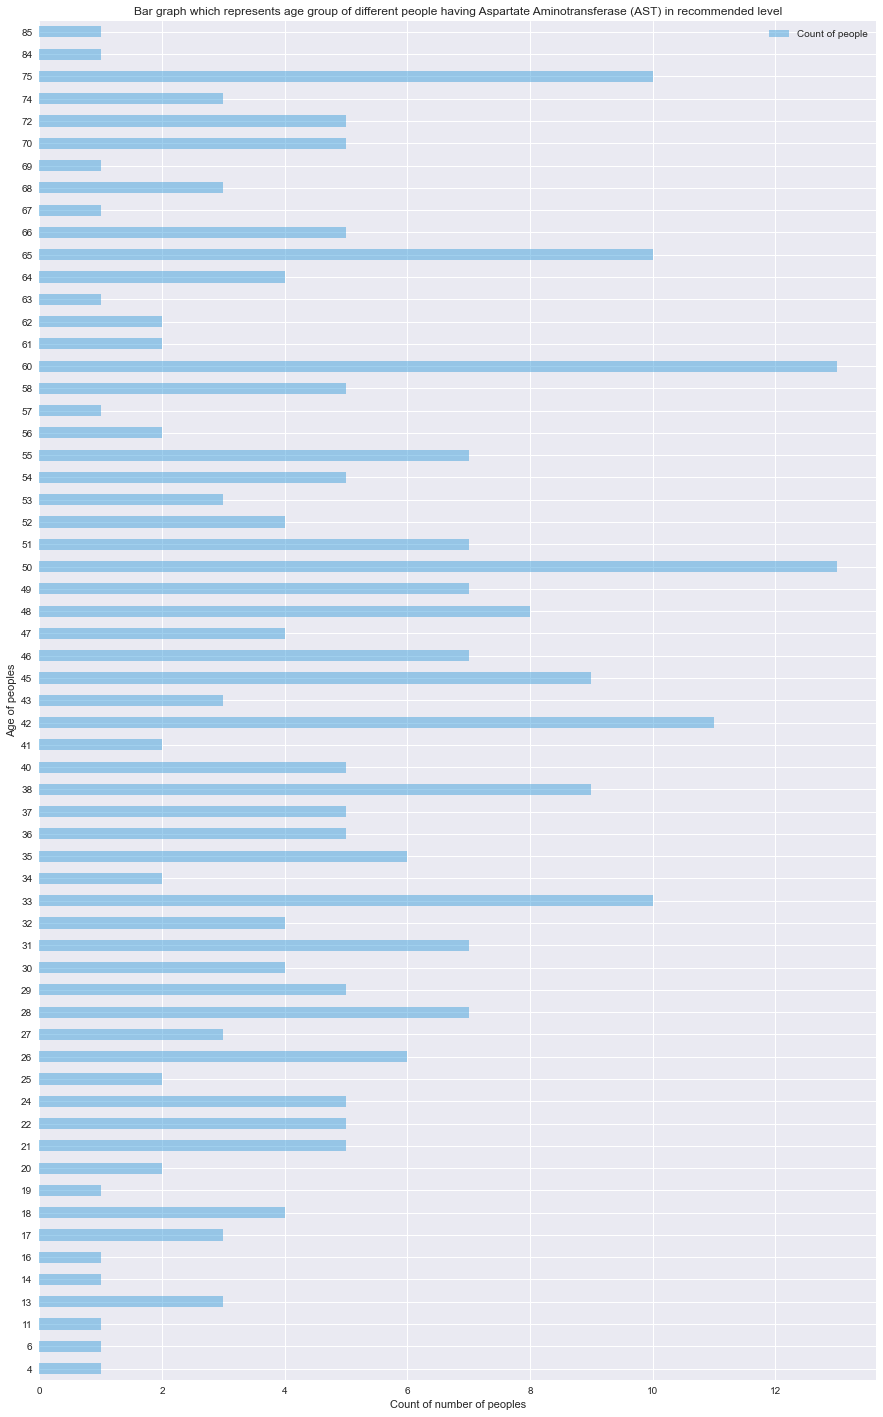

In [729]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Normal'].groupby('Age')['Aspartate_Aminotransferase_Binary'].count().plot(kind="barh",
                                                                                                                  label="Count of people", 
                                                                                                                  color="#43A1DC",
                                                                                                                  alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of peoples") #defining label for y-axis
plt.title("Bar graph which represents age group of different people having Aspartate Aminotransferase (AST) in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### People having Aspartate Aminotransferase (AST) not in recommended level as per the gender

In [730]:
liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range'].groupby('Gender')['Aspartate_Aminotransferase_Binary'].count()

Gender
Female     49
Male      239
Name: Aspartate_Aminotransferase_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Aspartate Aminotransferase (AST) in recommended level as per the gender')

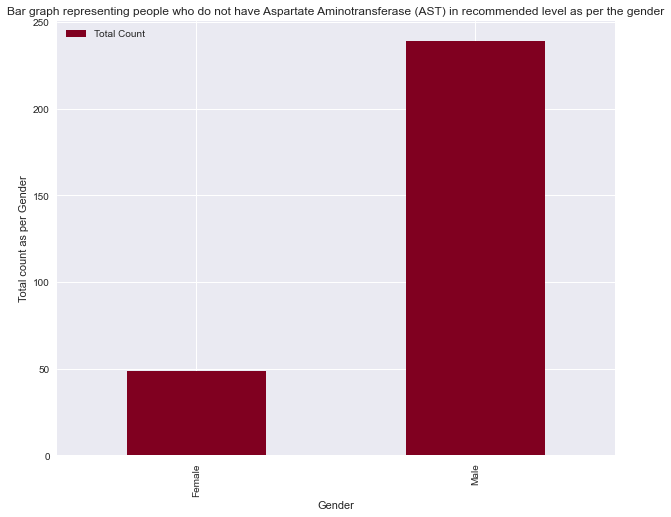

In [731]:
AST_not_normal=liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range'].groupby('Gender')['Aspartate_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#800020",
                                                                                                                                  label="Total Count")
AST_not_normal.legend() #for placing a legend on the axes
AST_not_normal.set_xlabel("Gender") #defining label for x-axis
AST_not_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
AST_not_normal.set_title("Bar graph representing people who do not have Aspartate Aminotransferase (AST) in recommended level as per the gender") #defining title for the figure

#### Peoples having normal Aspartate Aminotransferase (AST) level as per the gender

In [732]:
liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Normal'].groupby('Gender')['Aspartate_Aminotransferase_Binary'].count()

Gender
Female     89
Male      189
Name: Aspartate_Aminotransferase_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Aspartate Aminotransferase (AST) in recommended level as per the gender')

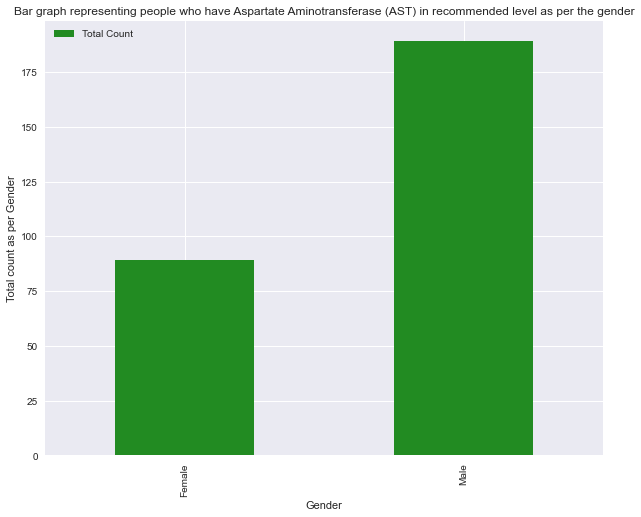

In [733]:
AST_normal=liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Normal'].groupby('Gender')['Aspartate_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#228B22",
                                                                                                                                  label="Total Count")
AST_normal.legend() #for placing a legend on the axes
AST_normal.set_xlabel("Gender") #defining label for x-axis
AST_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
AST_normal.set_title("Bar graph representing people who have Aspartate Aminotransferase (AST) in recommended level as per the gender") #defining title for the figure

#### Normal level Aspartate Aminotransferase (AST) vs Aspartate Aminotransferase (AST) not in normal level as per the gender

Text(0.5, 0.98, 'Bar graph of Normal level Aspartate Aminotransferase (AST) vs Aspartate Aminotransferase (AST) not in normal level as per the gender')

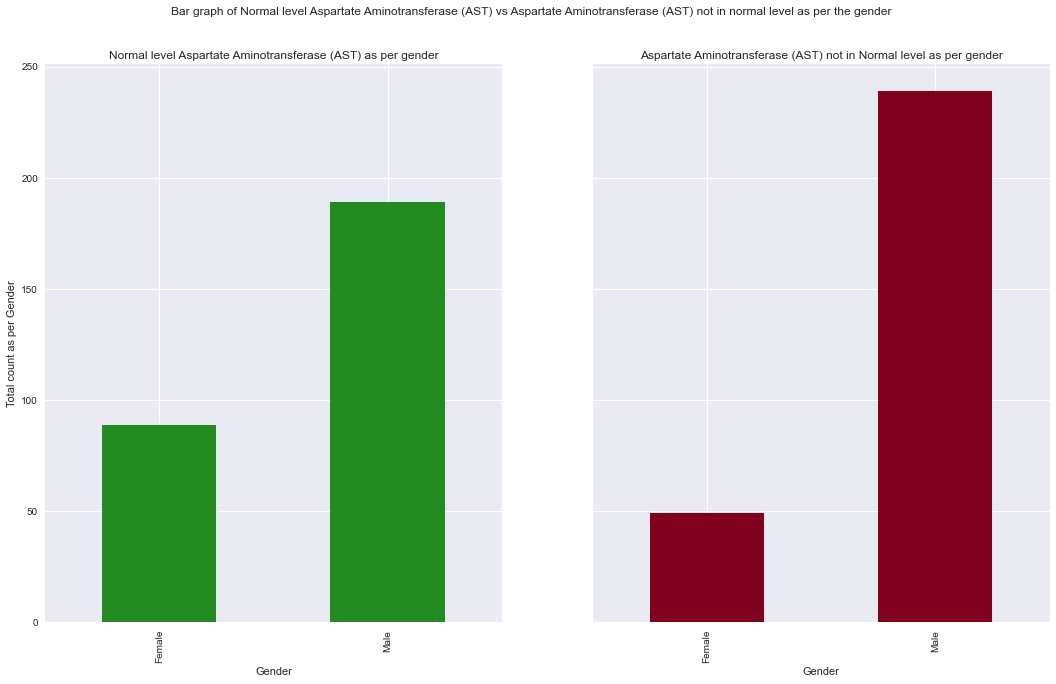

In [734]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
AST_normal=liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Normal'].groupby('Gender')['Aspartate_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#228B22",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
AST_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
AST_normal.set_title("Normal level Aspartate Aminotransferase (AST) as per gender")

AST_not_normal=liver_df[liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range'].groupby('Gender')['Aspartate_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#800020",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
AST_not_normal.set_title("Aspartate Aminotransferase (AST) not in Normal level as per gender")
AST_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Aspartate Aminotransferase (AST) vs Aspartate Aminotransferase (AST) not in normal level as per the gender") #defining title for the figure

#### The condition of liver of the patient according to the Aspartate Aminotransferase (AST) rate

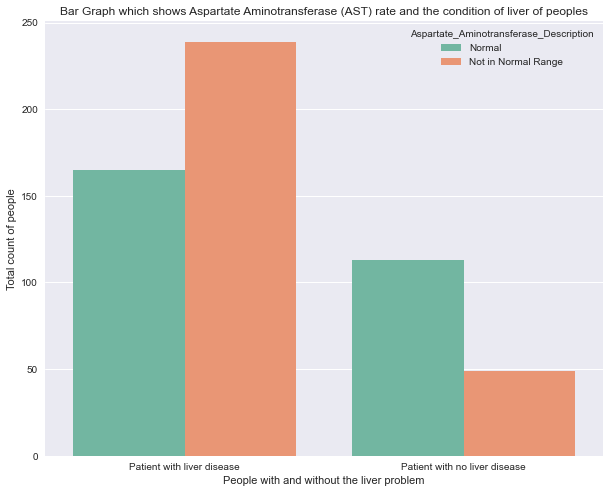

In [735]:
plt.figure(figsize=(10,8)) #Defining figure size
ALP_condition=sns.countplot(x="Dataset_Details", data=liver_df, hue="Aspartate_Aminotransferase_Description",palette="Set2")
ALP_condition.set(xlabel="People with and without the liver problem",ylabel="Total count of people") #defining label for x-axis by providing xlabel and #efining label for y-axis by providing ylabel 
ALP_condition.set_title("Bar Graph which shows Aspartate Aminotransferase (AST) rate and the condition of liver of peoples") #defining title for the figure
plt.show()

#### People who have Aspartate Aminotransferase (AST) in normal level and have liver disease

In [736]:
AST_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Aspartate_Aminotransferase_Description']=='Normal')].groupby('Gender')['Aspartate_Aminotransferase_Binary'].count()
AST_liverD

Gender
Female     52
Male      113
Name: Aspartate_Aminotransferase_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Aspartate Aminotransferase (AST) in recommended level and have liver disease as per the gender')

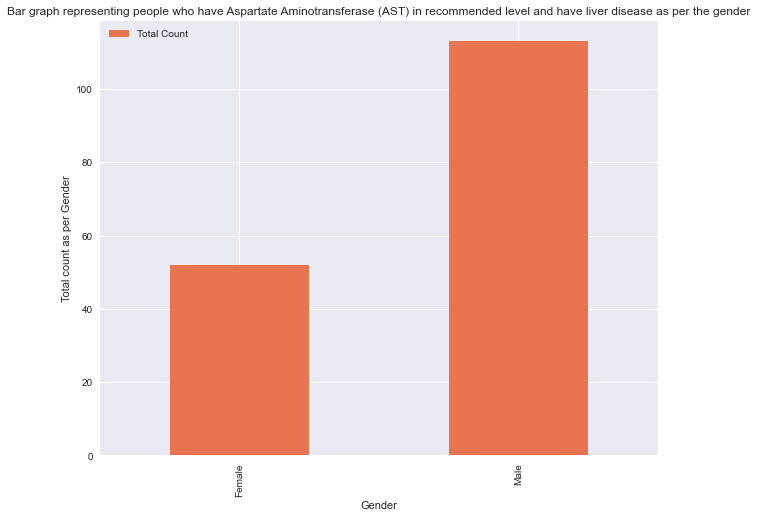

In [737]:
AST_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Aspartate_Aminotransferase_Description']=='Normal')].groupby('Gender')['Aspartate_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#E97451",
                                                                                                                                  label="Total Count")
AST_liverD.legend() #for placing a legend on the axes
AST_liverD.set_xlabel("Gender") #defining label for x-axis
AST_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
AST_liverD.set_title("Bar graph representing people who have Aspartate Aminotransferase (AST) in recommended level and have liver disease as per the gender") #defining title for the figure

#### People who have Aspartate Aminotransferase (AST) in normal level and do not have liver disease

In [738]:
AST_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Aspartate_Aminotransferase_Description']=='Normal')].groupby('Gender')['Aspartate_Aminotransferase_Description'].count()
AST_no_liverD

Gender
Female    37
Male      76
Name: Aspartate_Aminotransferase_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Aspartate Aminotransferase (AST) in recommended level and do not have liver disease as per the gender')

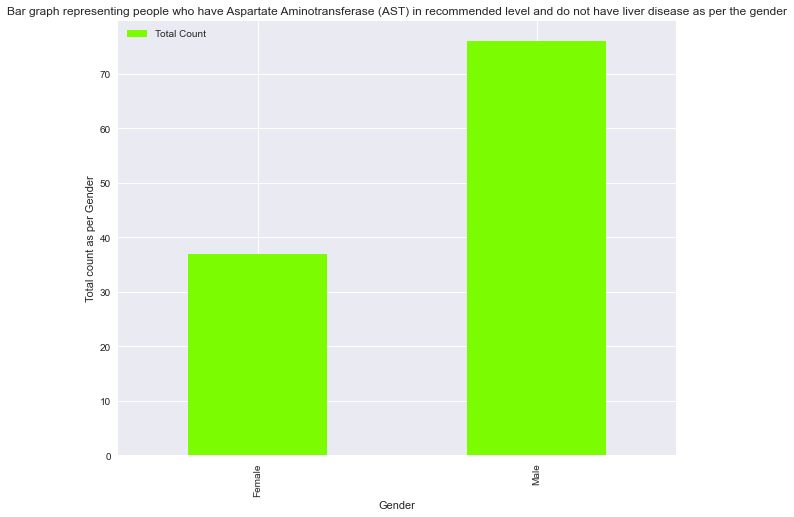

In [739]:
AST_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Aspartate_Aminotransferase_Description']=='Normal')].groupby('Gender')['Aspartate_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#7CFC00",
                                                                                                                                  label="Total Count")
AST_no_liverD.legend() #for placing a legend on the axes
AST_no_liverD.set_xlabel("Gender") #defining label for x-axis
AST_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
AST_no_liverD.set_title("Bar graph representing people who have Aspartate Aminotransferase (AST) in recommended level and do not have liver disease as per the gender") #defining title for the figure

#### Aspartate Aminotransferase (AST) in normal level and having liver disease VS Aspartate Aminotransferase (AST)  in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Normal level Aspartate Aminotransferase (AST) in normal level and having liver disease VS Aspartate Aminotransferase (AST) in normal level and not having a liver disease')

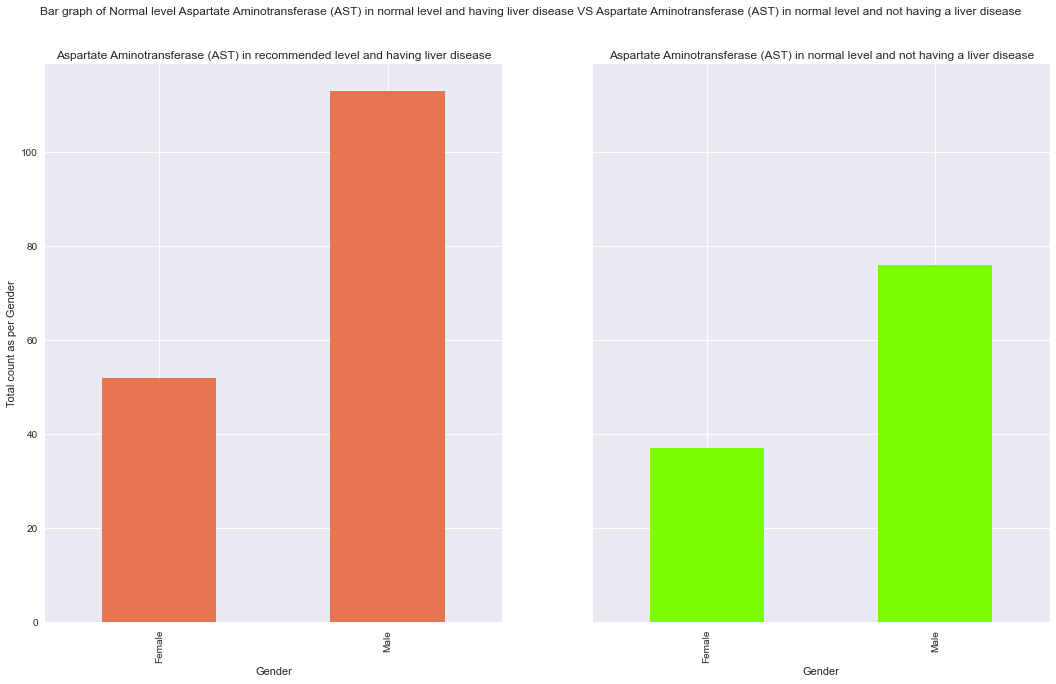

In [740]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
AST_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Aspartate_Aminotransferase_Description']=='Normal')].groupby('Gender')['Aspartate_Aminotransferase_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#E97451",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
AST_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
AST_liverD.set_title("Aspartate Aminotransferase (AST) in recommended level and having liver disease")

AST_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Aspartate_Aminotransferase_Description']=='Normal')].groupby('Gender')['Aspartate_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#7CFC00",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
AST_no_liverD.set_title("Aspartate Aminotransferase (AST) in normal level and not having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Aspartate Aminotransferase (AST) in normal level and having liver disease VS Aspartate Aminotransferase (AST) in normal level and not having a liver disease") #defining title for the figure

#### People who do not have Aspartate Aminotransferase (AST) in normal level and have liver diesease 

In [741]:
not_N_AST_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Aspartate_Aminotransferase_Description'].count()
not_N_AST_liverD

Gender
Female     38
Male      201
Name: Aspartate_Aminotransferase_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Aspartate Aminotransferase (AST) in normal level and have liver disease as per the gender')

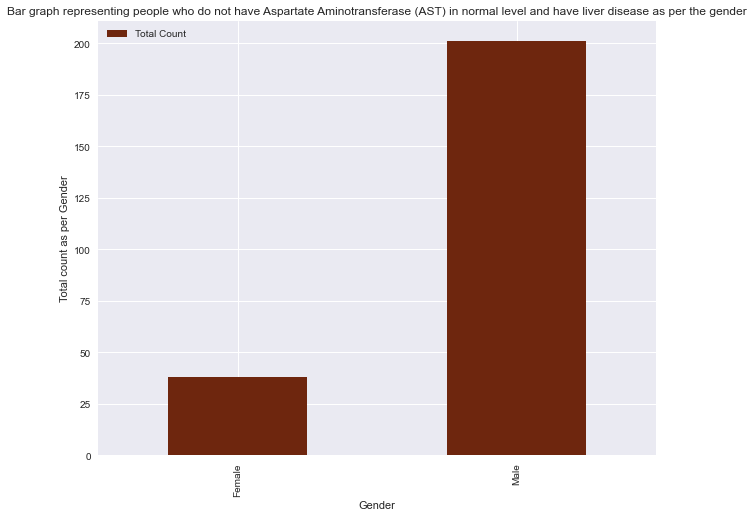

In [742]:
not_N_AST_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Aspartate_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#6E260E",
                                                                                                                                  label="Total Count")
not_N_AST_liverD.legend() #for placing a legend on the axes
not_N_AST_liverD.set_xlabel("Gender") #defining label for x-axis
not_N_AST_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_N_AST_liverD.set_title("Bar graph representing people who do not have Aspartate Aminotransferase (AST) in normal level and have liver disease as per the gender") #defining title for the figure

#### People who do not have Aspartate Aminotransferase (AST) in normal level and do not have liver disease as well

In [743]:
not_N_AST_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Aspartate_Aminotransferase_Description'].count()
not_N_AST_no_liverD

Gender
Female    11
Male      38
Name: Aspartate_Aminotransferase_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Aspartate Aminotransferase (AST) in normal level and do not have liver disease as per the gender')

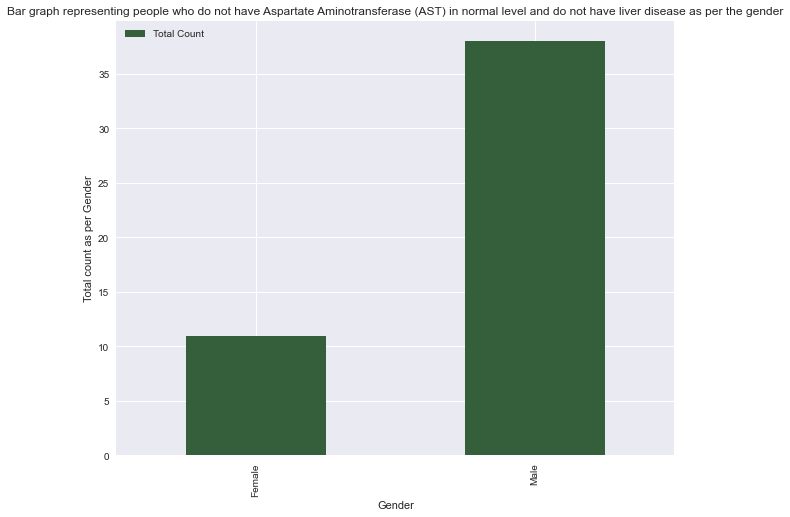

In [744]:
not_N_AST_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Aspartate_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#355E3B",
                                                                                                                                  label="Total Count")
not_N_AST_no_liverD.legend() #for placing a legend on the axes
not_N_AST_no_liverD.set_xlabel("Gender") #defining label for x-axis
not_N_AST_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_N_AST_no_liverD.set_title("Bar graph representing people who do not have Aspartate Aminotransferase (AST) in normal level and do not have liver disease as per the gender") #defining title for the figure

#### Aspartate Aminotransferase (AST) not in normal level and having liver disease VS Aspartate Aminotransferase (AST) not in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Aspartate Aminotransferase (AST) not in normal level and having liver disease VS Aspartate Aminotransferase (AST) not in normal level and not having a liver disease')

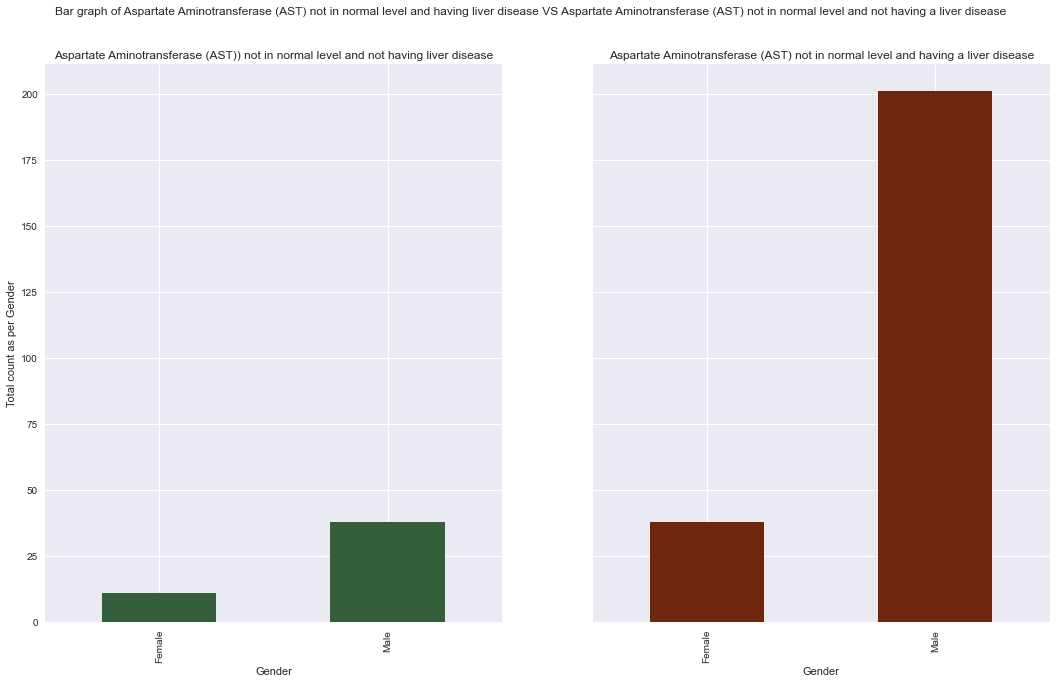

In [745]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
not_N_AST_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Aspartate_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#355E3B",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
not_N_AST_no_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
not_N_AST_no_liverD.set_title("Aspartate Aminotransferase (AST)) not in normal level and not having liver disease")

not_N_AST_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Aspartate_Aminotransferase_Description']=='Not in Normal Range')].groupby('Gender')['Aspartate_Aminotransferase_Description'].count().plot(kind="bar",
                                                                                                                                 # figsize=(10,8),
                                                                                                                                  color="#6E260E",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
not_N_AST_liverD.set_title("Aspartate Aminotransferase (AST) not in normal level and having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Aspartate Aminotransferase (AST) not in normal level and having liver disease VS Aspartate Aminotransferase (AST) not in normal level and not having a liver disease") #defining title for the figure

### Further analysis and Data Visualization on Total Protiens

#### Creating function as per the recommended rate of Total Protiens

In [746]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

In [747]:
liver_df['Total_Protiens'] #extracting the values of selected columns from dataframe

0      6.8
1      7.5
2      7.0
3      6.8
4      7.3
      ... 
561    5.9
562    6.0
563    6.4
564    6.8
565    7.3
Name: Total_Protiens, Length: 566, dtype: float64

In [748]:
#Creating a function to provide 1 value to normal total bilirubin rate and 0 to not normal total bilrubin rate
def binary_total_protiens(total_protiens):
    if total_protiens>=6 and total_protiens<=8:
        return 1
    else:
        return 0

In [749]:
liver_df['Total_Protiens_Binary'] = liver_df['Total_Protiens'].apply(binary_total_protiens) #Implementing the developed function and creating a new column as per the defined logic

In [750]:
liver_df[['Total_Protiens','Total_Protiens_Binary']] #extracting the values of selected columns from dataframe

Total_Protiens  Total_Protiens_Binary
0               6.8                      1
1               7.5                      1
2               7.0                      1
3               6.8                      1
4               7.3                      1
..              ...                    ...
561             5.9                      0
562             6.0                      1
563             6.4                      1
564             6.8                      1
565             7.3                      1

[566 rows x 2 columns]

In [751]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

In [752]:
#Creating a function for determining normal total bilirubin rate
def desc_total_protiens(total_bilirubin):
    if total_bilirubin>=6 and total_bilirubin<=8:
        return "Normal"
    else:
        return "Not in Normal Range"

In [753]:
liver_df['Total_Protiens_Description'] = liver_df['Total_Protiens'].apply(desc_total_protiens) #Implementing the developed function and creating a new column as per the defined logic

In [754]:
liver_df[['Total_Protiens','Total_Protiens_Binary','Total_Protiens_Description']] #extracting the values of selected columns from dataframe

Total_Protiens  Total_Protiens_Binary Total_Protiens_Description
0               6.8                      1                     Normal
1               7.5                      1                     Normal
2               7.0                      1                     Normal
3               6.8                      1                     Normal
4               7.3                      1                     Normal
..              ...                    ...                        ...
561             5.9                      0        Not in Normal Range
562             6.0                      1                     Normal
563             6.4                      1                     Normal
564             6.8                      1                     Normal
565             7.3                      1                     Normal

[566 rows x 3 columns]

In [755]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

#### Peoples as per the age whose Total Protiens is not in the the recommended level

In [756]:
liver_df[liver_df['Total_Protiens_Description']=='Not in Normal Range'].groupby('Age')['Total_Protiens_Binary'].count()

Age
6      1
13     1
14     1
16     1
18     3
19     1
20     1
21     1
22     3
24     1
25     1
26     6
27     2
28     3
29     3
30     5
31     1
32     8
33     3
34     4
35     2
36     5
37     7
38     3
39     2
40     6
42     9
44     1
45    12
46     4
47     1
48     9
49     4
50     5
51     2
52     1
53     2
54     1
55     5
56     2
57     5
58     5
60    11
61     2
62     4
63     1
64     1
65     9
66     4
68     2
69     1
70     4
72     1
73     1
74     2
75     9
Name: Total_Protiens_Binary, dtype: int64

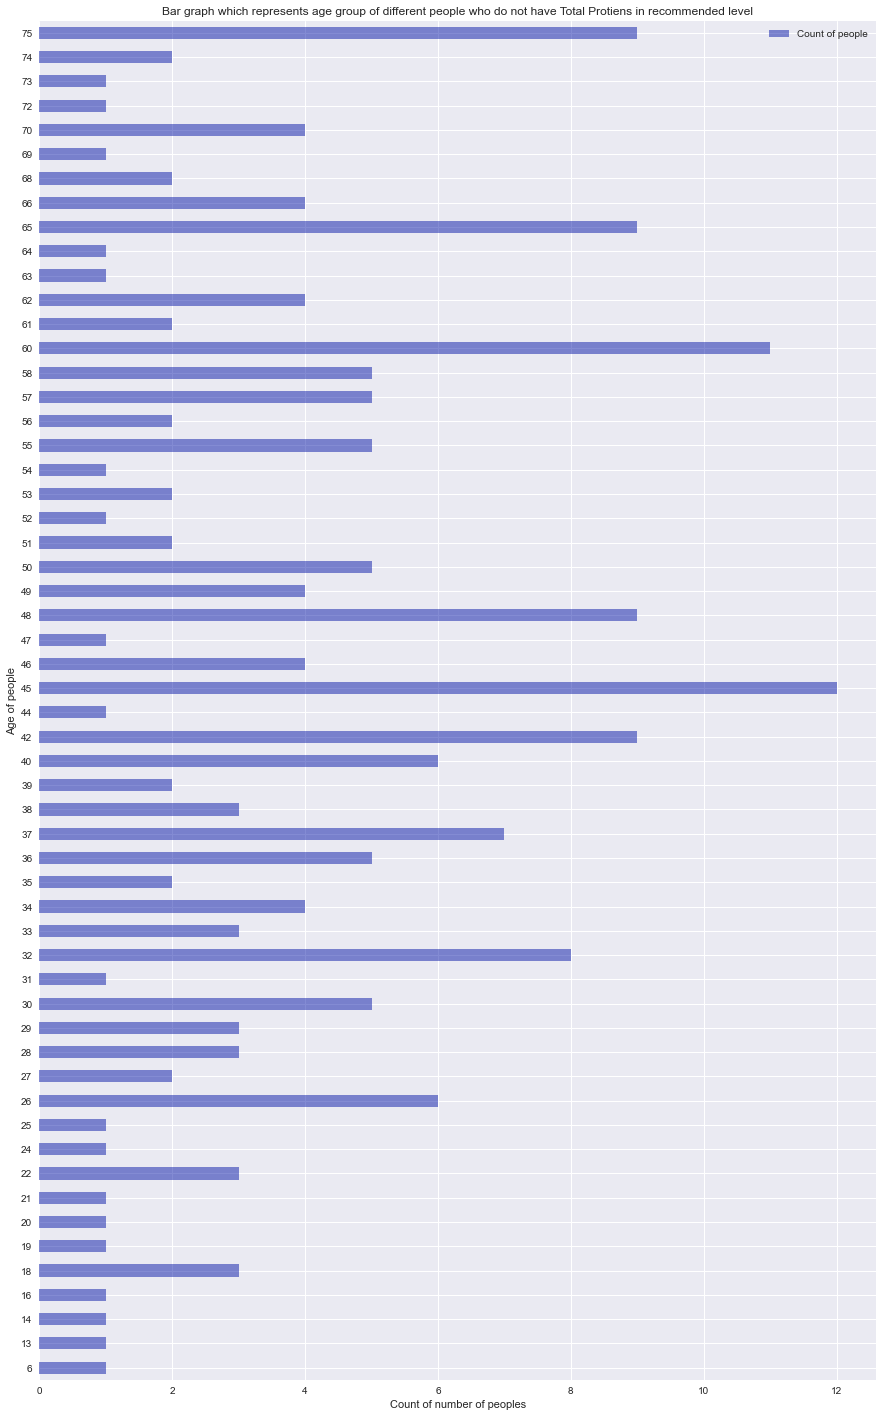

In [757]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Total_Protiens_Description']=='Not in Normal Range'].groupby('Age')['Total_Protiens_Binary'].count().plot(kind="barh",
                                                                                                                               label="Count of people",
                                                                                                                               color="#0818A8",
                                                                                                                               alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents age group of different people who do not have Total Protiens in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Top 10 age group people having Total Protiens in not recommended level

In [758]:
#liver_df[liver_df['Dataset']==1].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
topTenTotalProtiensNN = liver_df[liver_df['Total_Protiens_Description']=='Not in Normal Range'].groupby('Age')['Total_Protiens_Binary'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head(10) #extracting data which consists of patients without liver disease then, the data is counted and sorted in ascending order to extract only first 10 rows
topTenTotalProtiensNN

Age  Count
28   45     12
42   60     11
26   42      9
47   65      9
31   48      9
55   75      9
17   32      8
22   37      7
11   26      6
25   40      6

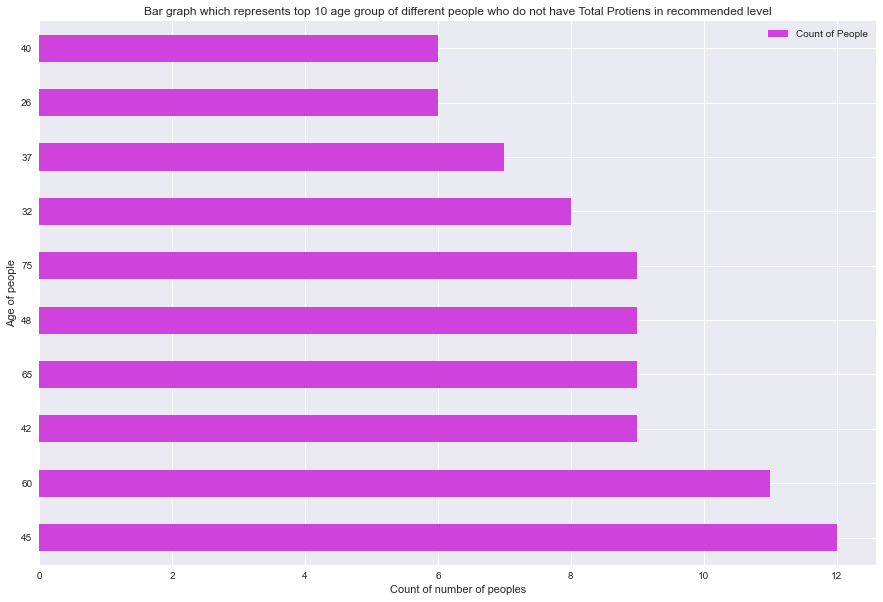

In [759]:
topTenTotalProtiensNN.plot.barh(x='Age', y='Count',figsize=(15,10),color="#CF43DC", label="Count of People")
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents top 10 age group of different people who do not have Total Protiens in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

In [760]:
#### Peoples as per the age having normal Total Protiens level

In [761]:
liver_df[liver_df['Total_Protiens_Description']=='Normal'].groupby('Age')['Total_Protiens_Binary'].count()

Age
4     2
7     2
8     1
10    1
11    1
     ..
75    5
78    1
84    1
85    1
90    1
Name: Total_Protiens_Binary, Length: 71, dtype: int64

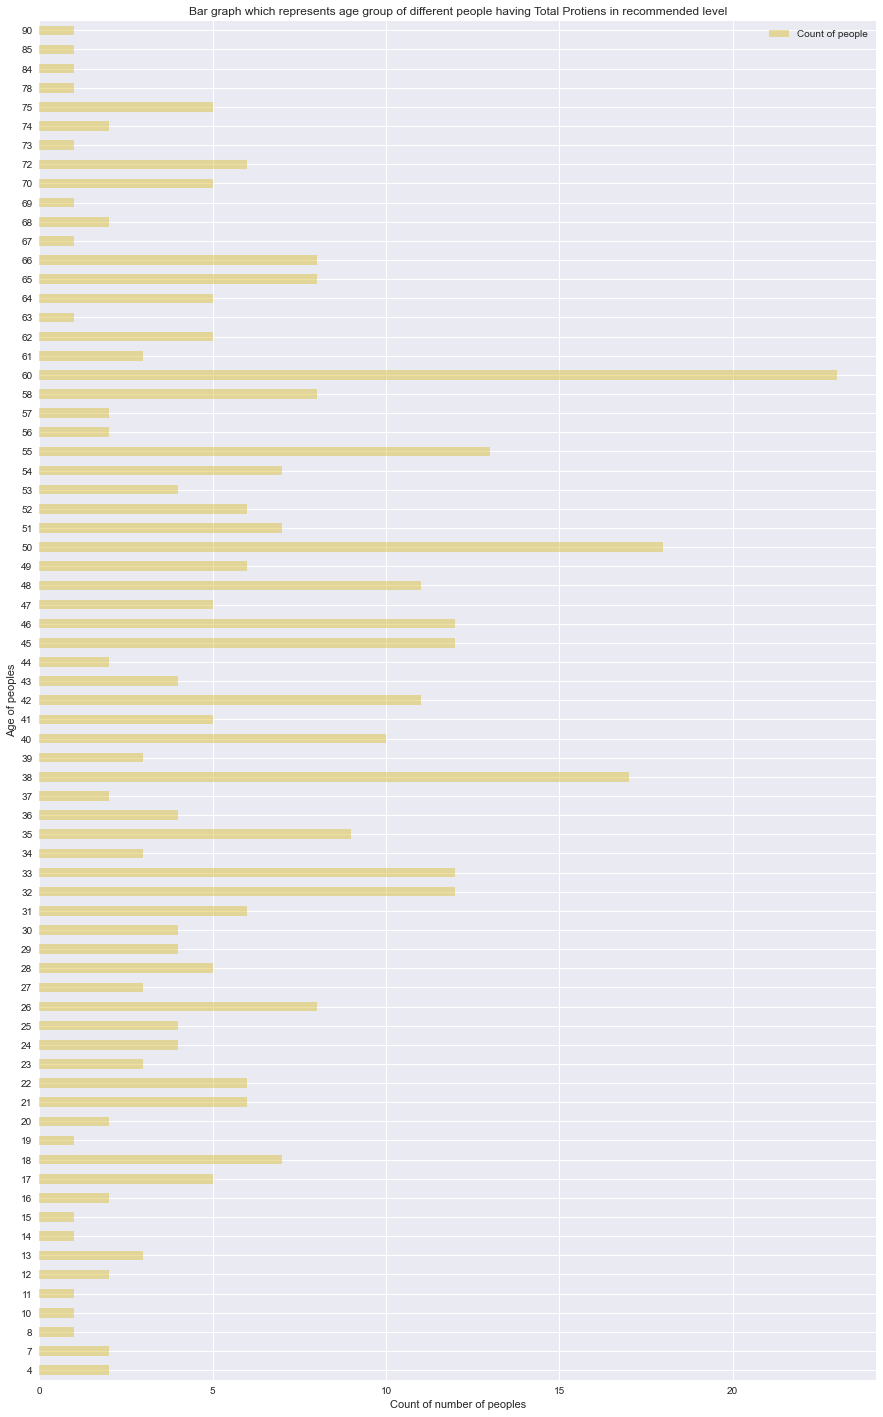

In [762]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Total_Protiens_Description']=='Normal'].groupby('Age')['Total_Protiens_Binary'].count().plot(kind="barh",
                                                                                                                  label="Count of people", 
                                                                                                                  color="#DCC243",
                                                                                                                  alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of peoples") #defining label for y-axis
plt.title("Bar graph which represents age group of different people having Total Protiens in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### People having Total Protiens not in recommended level as per the gender

In [763]:
liver_df[liver_df['Total_Protiens_Description']=='Not in Normal Range'].groupby('Gender')['Total_Protiens_Binary'].count()

Gender
Female     48
Male      147
Name: Total_Protiens_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Total Protiens in recommended level as per the gender')

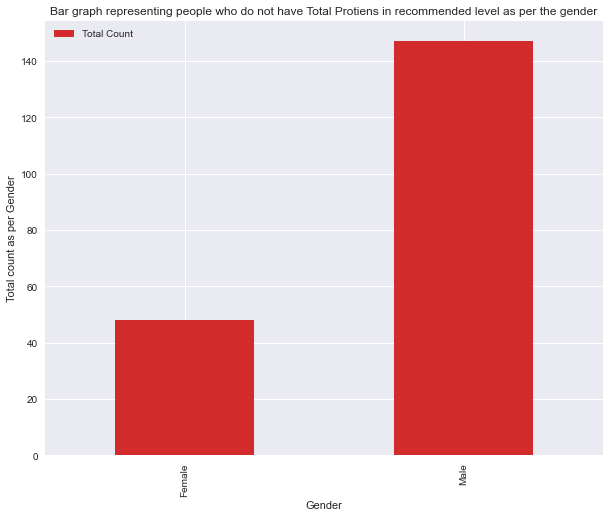

In [764]:
total_protiens_not_normal=liver_df[liver_df['Total_Protiens_Description']=='Not in Normal Range'].groupby('Gender')['Total_Protiens_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#D22B2B",
                                                                                                                                  label="Total Count")
total_protiens_not_normal.legend() #for placing a legend on the axes
total_protiens_not_normal.set_xlabel("Gender") #defining label for x-axis
total_protiens_not_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
total_protiens_not_normal.set_title("Bar graph representing people who do not have Total Protiens in recommended level as per the gender") #defining title for the figure

#### Peoples having normal Total Protiens level as per the gender

In [765]:
liver_df[liver_df['Total_Protiens_Description']=='Normal'].groupby('Gender')['Total_Protiens_Binary'].count()

Gender
Female     90
Male      281
Name: Total_Protiens_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Total Protiens in recommended level as per the gender')

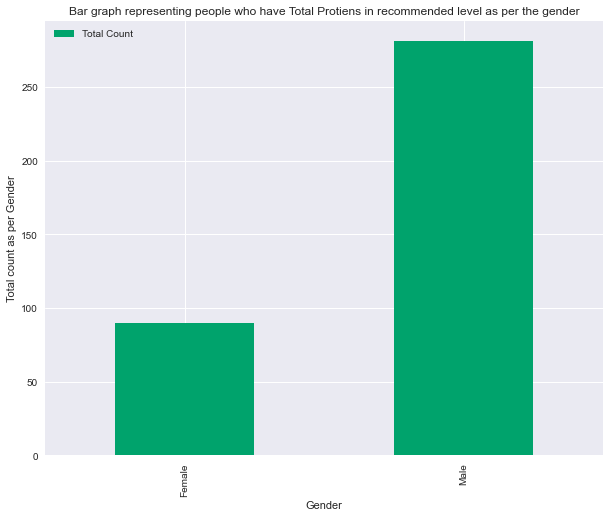

In [766]:
total_protiens_normal=liver_df[liver_df['Total_Protiens_Description']=='Normal'].groupby('Gender')['Total_Protiens_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#00A36C",
                                                                                                                                  label="Total Count")
total_protiens_normal.legend() #for placing a legend on the axes
total_protiens_normal.set_xlabel("Gender") #defining label for x-axis
total_protiens_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
total_protiens_normal.set_title("Bar graph representing people who have Total Protiens in recommended level as per the gender") #defining title for the figure

#### Normal level Total Protiens vs Total Protiens not in normal level as per the gender

Text(0.5, 0.98, 'Bar graph of Normal level Total Protiens vs Total Protiens not in normal level as per the gender')

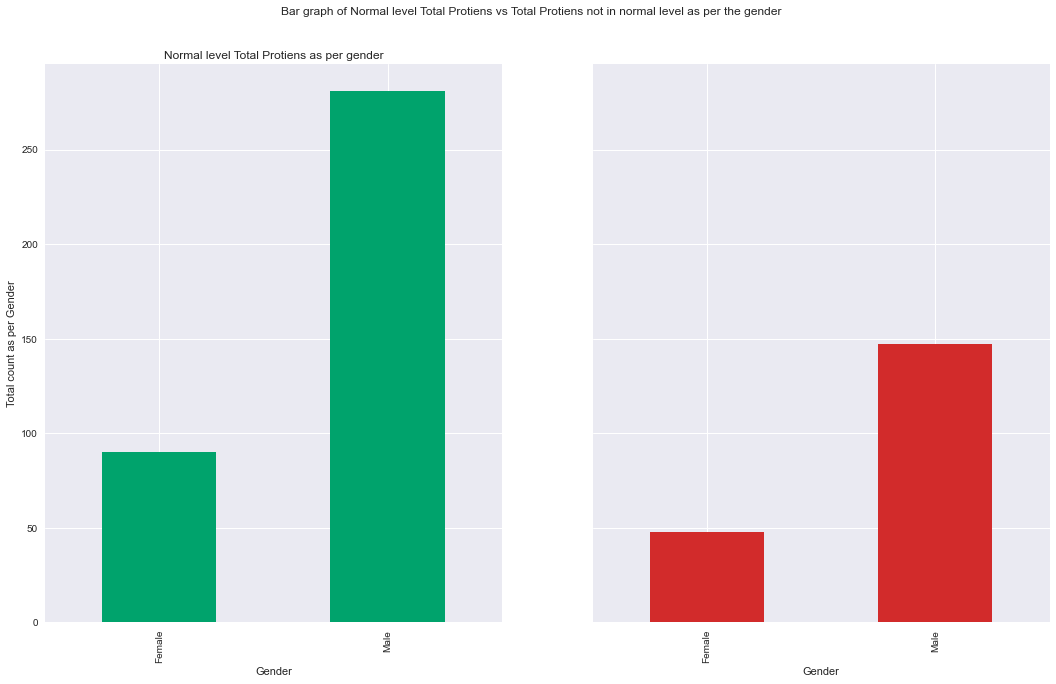

In [767]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
total_protiens_normal=liver_df[liver_df['Total_Protiens_Description']=='Normal'].groupby('Gender')['Total_Protiens_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#00A36C",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
total_protiens_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
total_protiens_normal.set_title("Normal level Total Protiens as per gender")

total_protiens_not_normal=liver_df[liver_df['Total_Protiens_Description']=='Not in Normal Range'].groupby('Gender')['Total_Protiens_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#D22B2B",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
total_Bilirubin_not_normal.set_title("Total Protiens not in Normal level as per gender")
total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Total Protiens vs Total Protiens not in normal level as per the gender") #defining title for the figure

#### The condition of liver of the patient according to the Total Protiens rate

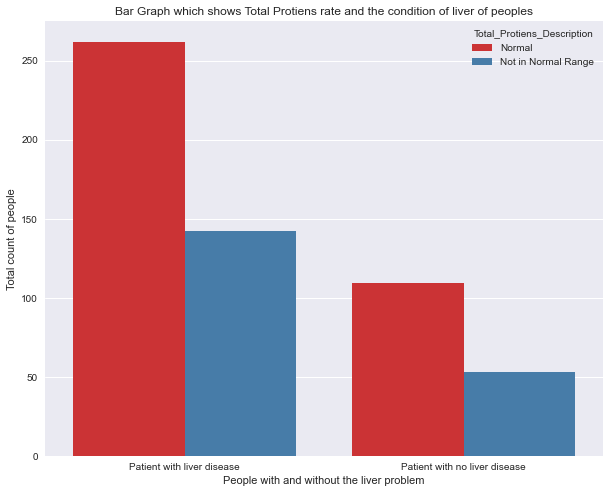

In [768]:
plt.figure(figsize=(10,8)) #Defining figure size
total_bilrubin_condition=sns.countplot(x="Dataset_Details", data=liver_df, hue="Total_Protiens_Description",palette="Set1")
total_bilrubin_condition.set(xlabel="People with and without the liver problem",ylabel="Total count of people") #defining label for x-axis by providing xlabel and #efining label for y-axis by providing ylabel 
total_bilrubin_condition.set_title("Bar Graph which shows Total Protiens rate and the condition of liver of peoples") #defining title for the figure
plt.show()

#### People who have Total Protiens in normal level and have liver disease

In [769]:
total_protiens_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Protiens_Description']=='Normal')].groupby('Gender')['Total_Protiens_Description'].count()
total_protiens_liverD

Gender
Female     60
Male      202
Name: Total_Protiens_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Total Protiens in recommended level and have liver disease as per the gender')

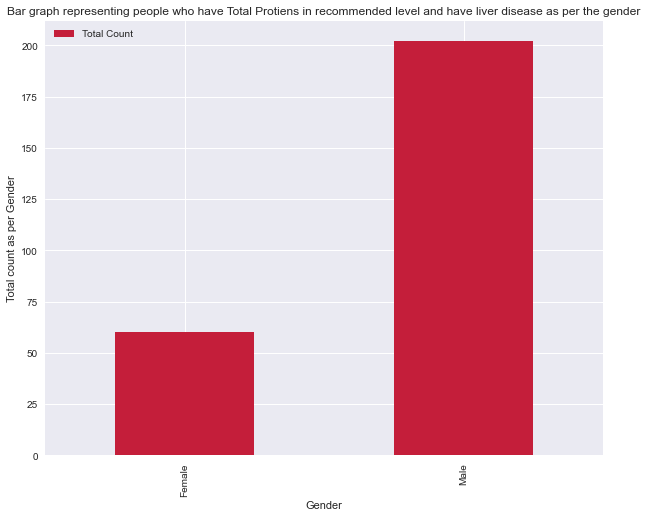

In [770]:
total_protiens_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Protiens_Description']=='Normal')].groupby('Gender')['Total_Protiens_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#C41E3A",
                                                                                                                                  label="Total Count")
total_protiens_liverD.legend() #for placing a legend on the axes
total_protiens_liverD.set_xlabel("Gender") #defining label for x-axis
total_protiens_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
total_protiens_liverD.set_title("Bar graph representing people who have Total Protiens in recommended level and have liver disease as per the gender") #defining title for the figure

#### People who have Total Protiens in normal level and do not have liver disease

In [771]:
total_protiens_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Protiens_Description']=='Normal')].groupby('Gender')['Total_Protiens_Description'].count()
total_protiens_no_liverD

Gender
Female    30
Male      79
Name: Total_Protiens_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Total Protiens in recommended level and do not have liver disease as per the gender')

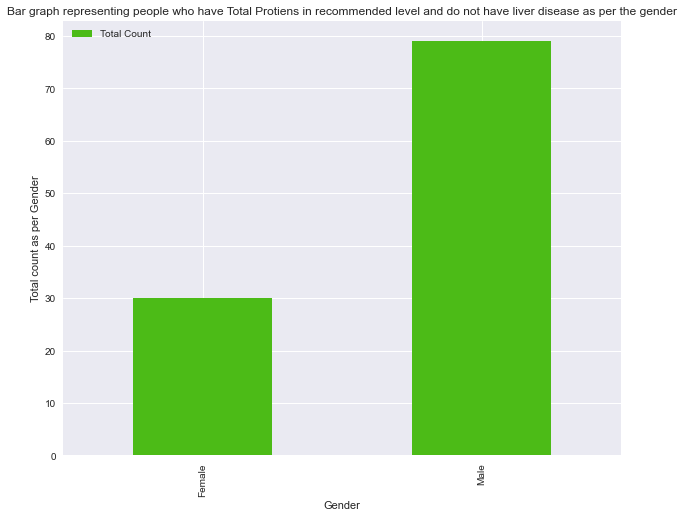

In [772]:
total_protiens_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Protiens_Description']=='Normal')].groupby('Gender')['Total_Protiens_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#4CBB17",
                                                                                                                                  label="Total Count")
total_protiens_no_liverD.legend() #for placing a legend on the axes
total_protiens_no_liverD.set_xlabel("Gender") #defining label for x-axis
total_protiens_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
total_protiens_no_liverD.set_title("Bar graph representing people who have Total Protiens in recommended level and do not have liver disease as per the gender") #defining title for the figure

#### Total Protiens in normal level and having liver disease VS  Total Protiens in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Normal level Total Protiens in normal level and having liver disease VS  Total Protiens in normal level and not having a liver disease')

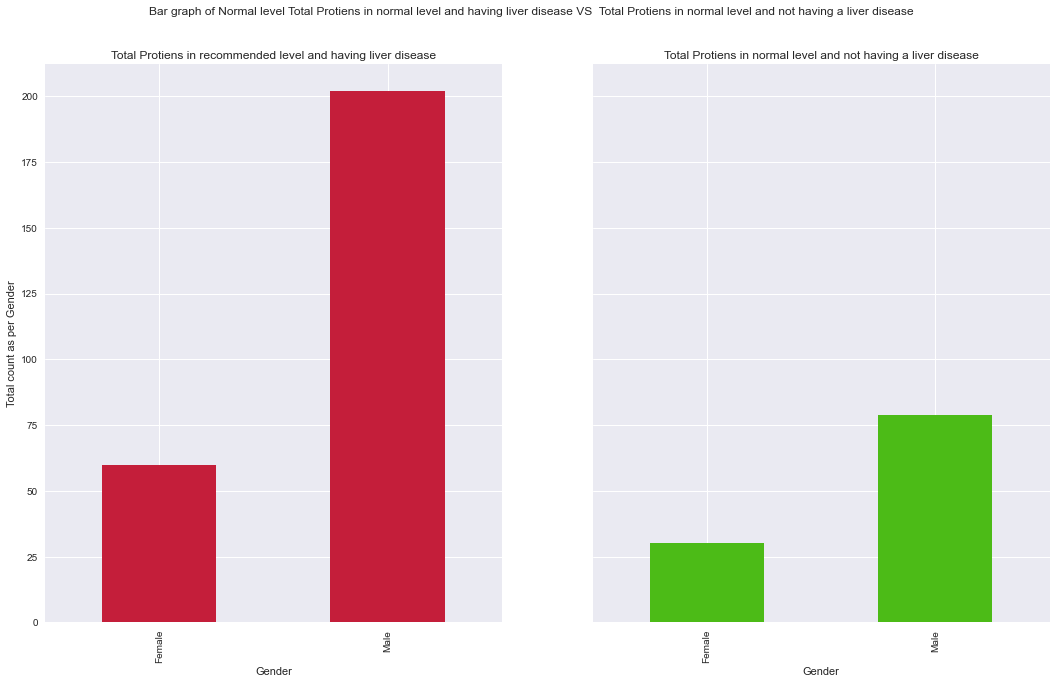

In [773]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
total_protiens_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Protiens_Description']=='Normal')].groupby('Gender')['Total_Protiens_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#C41E3A",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
total_protiens_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
total_protiens_liverD.set_title("Total Protiens in recommended level and having liver disease")

total_protiens_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Protiens_Description']=='Normal')].groupby('Gender')['Total_Protiens_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#4CBB17",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
total_protiens_no_liverD.set_title("Total Protiens in normal level and not having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Total Protiens in normal level and having liver disease VS  Total Protiens in normal level and not having a liver disease") #defining title for the figure

#### People who do not have Total Protiens in normal level and have liver diesease 

In [774]:
not_Ntotal_protiens_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Protiens_Description']=='Not in Normal Range')].groupby('Gender')['Total_Protiens_Description'].count()
not_Ntotal_protiens_liverD

Gender
Female     30
Male      112
Name: Total_Protiens_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Total Protiens in normal level and have liver diesease as per the gender')

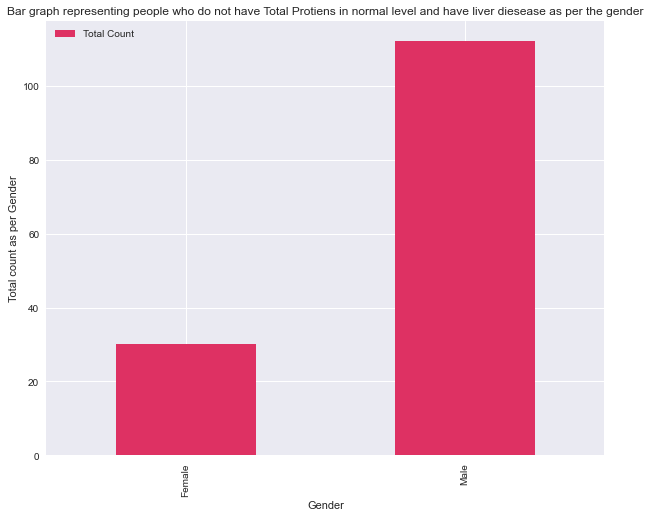

In [775]:
not_Ntotal_protiens_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Protiens_Description']=='Not in Normal Range')].groupby('Gender')['Total_Protiens_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#DE3163",
                                                                                                                                  label="Total Count")
not_Ntotal_protiens_liverD.legend() #for placing a legend on the axes
not_Ntotal_protiens_liverD.set_xlabel("Gender") #defining label for x-axis
not_Ntotal_protiens_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_Ntotal_protiens_liverD.set_title("Bar graph representing people who do not have Total Protiens in normal level and have liver diesease as per the gender") #defining title for the figure

#### People who do not have Total Protiens in normal level and do not have liver diesease as well

In [776]:
not_Ntotal_protiens_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Protiens_Description']=='Not in Normal Range')].groupby('Gender')['Total_Protiens_Description'].count()
not_Ntotal_protiens_no_liverD

Gender
Female    18
Male      35
Name: Total_Protiens_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Total Protiens in normal level and do not have liver diesease as per the gender')

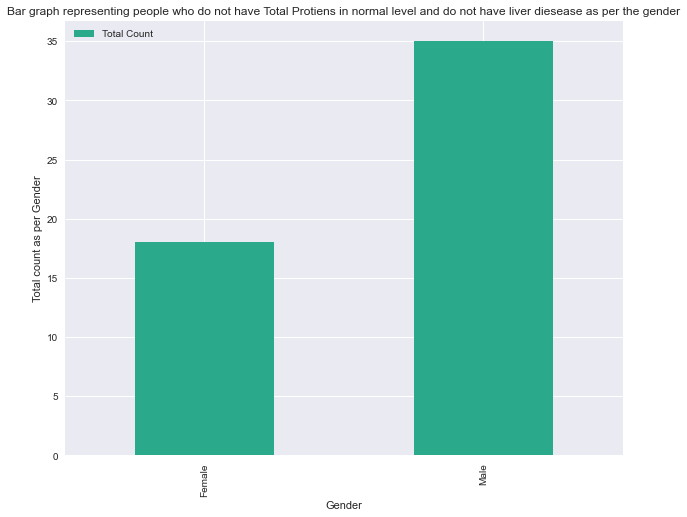

In [777]:
not_Ntotal_protiens_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Protiens_Description']=='Not in Normal Range')].groupby('Gender')['Total_Protiens_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#2AAA8A",
                                                                                                                                  label="Total Count")
not_Ntotal_protiens_no_liverD.legend() #for placing a legend on the axes
not_Ntotal_protiens_no_liverD.set_xlabel("Gender") #defining label for x-axis
not_Ntotal_protiens_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_Ntotal_protiens_no_liverD.set_title("Bar graph representing people who do not have Total Protiens in normal level and do not have liver diesease as per the gender") #defining title for the figure

#### Total Protiens not in normal level and having liver disease VS  Total Protiens not in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Total Protiens not in normal level and having liver disease VS  Total Protiens not in normal level and not having a liver disease')

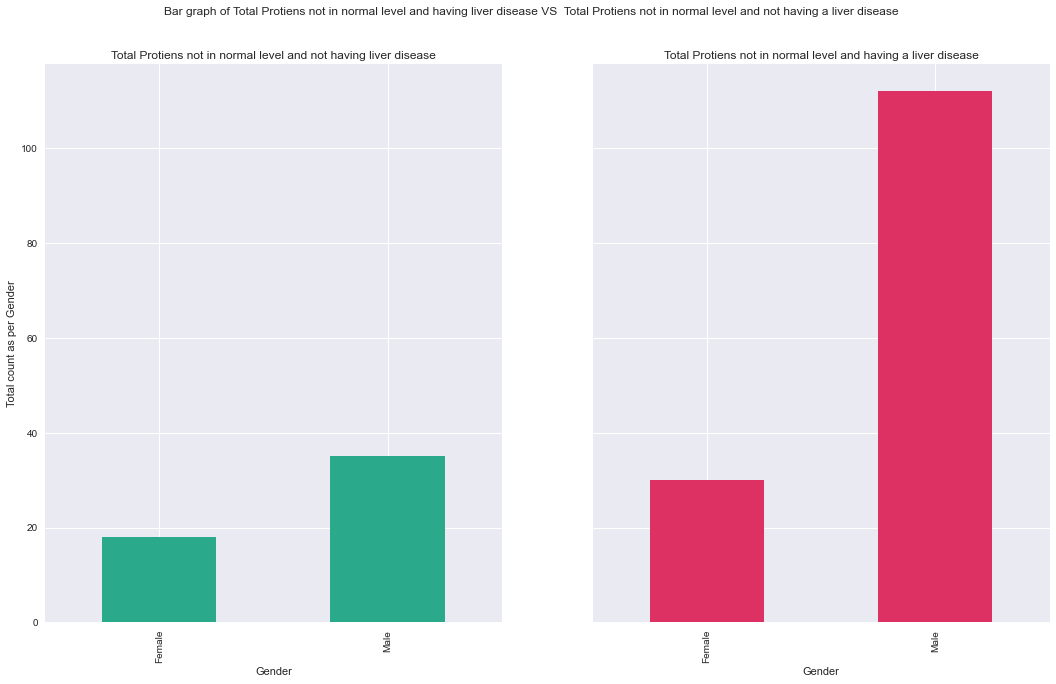

In [778]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
not_Ntotal_protiens_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Total_Protiens_Description']=='Not in Normal Range')].groupby('Gender')['Total_Protiens_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#2AAA8A",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
not_Ntotal_protiens_no_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
not_Ntotal_protiens_no_liverD.set_title("Total Protiens not in normal level and not having liver disease")

not_Ntotal_protiens_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Total_Protiens_Description']=='Not in Normal Range')].groupby('Gender')['Total_Protiens_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#DE3163",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
not_Ntotal_protiens_liverD.set_title("Total Protiens not in normal level and having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Total Protiens not in normal level and having liver disease VS  Total Protiens not in normal level and not having a liver disease") #defining title for the figure

### Further analysis and Data Visualization on Albumin

#### Creating function as per the recommended rate of Albumin

In [779]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

In [780]:
liver_df['Albumin'] #extracting the values of selected columns from dataframe

0      3.3
1      3.2
2      3.3
3      3.4
4      2.4
      ... 
561    1.6
562    3.2
563    3.2
564    3.4
565    4.4
Name: Albumin, Length: 566, dtype: float64

In [781]:
#Creating a function to provide 1 value to normal albumin rate and 0 to not normal albumin rate
def binary_albumin(albumin):
    if albumin>=3.5 and albumin<=5.5:
        return 1
    else:
        return 0

In [782]:
liver_df['Albumin_Binary'] = liver_df['Albumin'].apply(binary_albumin) #Implementing the developed function and creating a new column as per the defined logic

In [783]:
liver_df[['Albumin','Albumin_Binary']] #extracting the values of selected columns from dataframe

Albumin  Albumin_Binary
0        3.3               0
1        3.2               0
2        3.3               0
3        3.4               0
4        2.4               0
..       ...             ...
561      1.6               0
562      3.2               0
563      3.2               0
564      3.4               0
565      4.4               1

[566 rows x 2 columns]

In [784]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

In [785]:
#Creating a function for determining normal albumin rate
def desc_albumin(albumin):
    if albumin>=3.5 and albumin<=5.5:
        return "Normal"
    else:
        return "Not in Normal Range"

In [786]:
liver_df['Albumin_Description'] = liver_df['Albumin'].apply(desc_albumin) #Implementing the developed function and creating a new column as per the defined logic

In [787]:
liver_df[['Albumin','Albumin_Binary','Albumin_Description']] #extracting the values of selected columns from dataframe

Albumin  Albumin_Binary  Albumin_Description
0        3.3               0  Not in Normal Range
1        3.2               0  Not in Normal Range
2        3.3               0  Not in Normal Range
3        3.4               0  Not in Normal Range
4        2.4               0  Not in Normal Range
..       ...             ...                  ...
561      1.6               0  Not in Normal Range
562      3.2               0  Not in Normal Range
563      3.2               0  Not in Normal Range
564      3.4               0  Not in Normal Range
565      4.4               1               Normal

[566 rows x 3 columns]

In [788]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

#### Peoples as per the age whose Albumin is not in the the recommended level 

In [789]:
liver_df[liver_df['Albumin_Description']=='Not in Normal Range'].groupby('Age')['Albumin_Binary'].count()

Age
4      1
6      1
7      1
8      1
16     1
      ..
74     2
75    13
78     1
84     1
90     1
Name: Albumin_Binary, Length: 64, dtype: int64

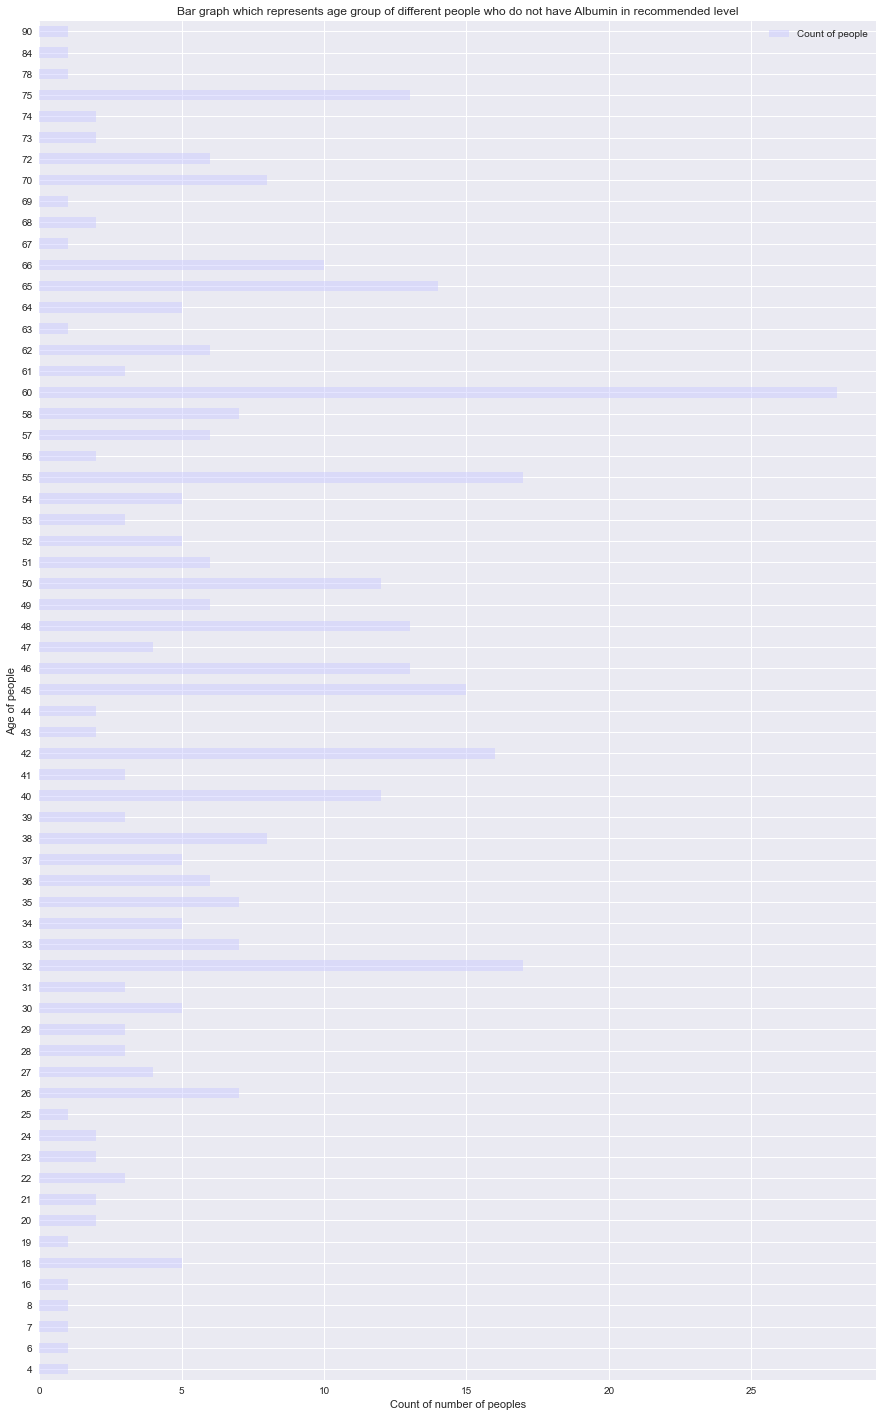

In [790]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Albumin_Description']=='Not in Normal Range'].groupby('Age')['Albumin_Binary'].count().plot(kind="barh",
                                                                                                                               label="Count of people",
                                                                                                                               color="#CCCCFF",
                                                                                                                               alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents age group of different people who do not have Albumin in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Top 10 age group people having Albumin in not recommended level

In [791]:
#liver_df[liver_df['Dataset']==1].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
topTenAlbuminNN = liver_df[liver_df['Albumin_Description']=='Not in Normal Range'].groupby('Age')['Albumin_Binary'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head(10) #extracting data which consists of patients without liver disease then, the data is counted and sorted in ascending order to extract only first 10 rows
topTenAlbuminNN

Age  Count
46   60     28
19   32     17
42   55     17
29   42     16
32   45     15
51   65     14
60   75     13
35   48     13
33   46     13
37   50     12

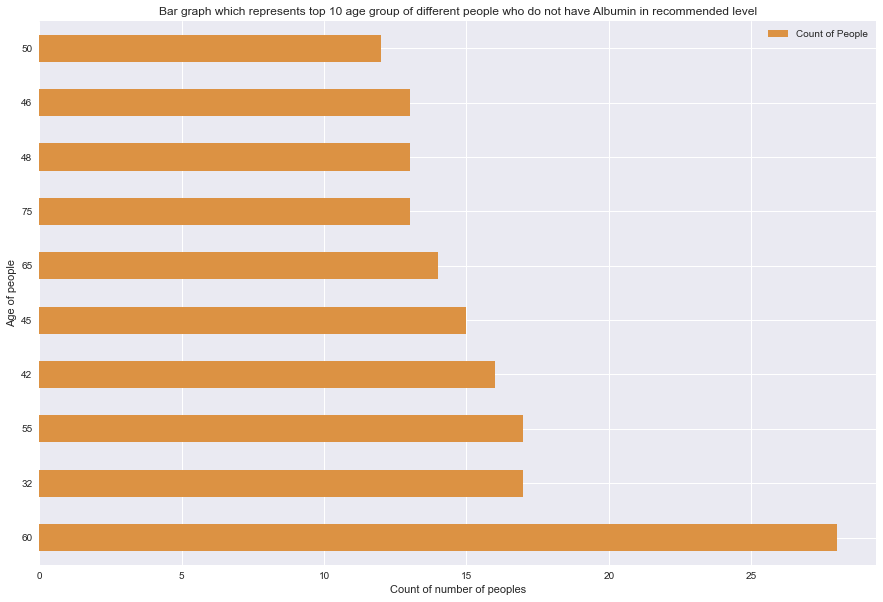

In [792]:
topTenAlbuminNN.plot.barh(x='Age', y='Count',figsize=(15,10),color="#DC9243", label="Count of People")
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents top 10 age group of different people who do not have Albumin in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Peoples as per the age having normal Albumin level

In [793]:
liver_df[liver_df['Albumin_Description']=='Normal'].groupby('Age')['Albumin_Binary'].count()

Age
4     1
7     1
10    1
11    1
12    2
     ..
70    1
72    1
74    2
75    1
85    1
Name: Albumin_Binary, Length: 65, dtype: int64

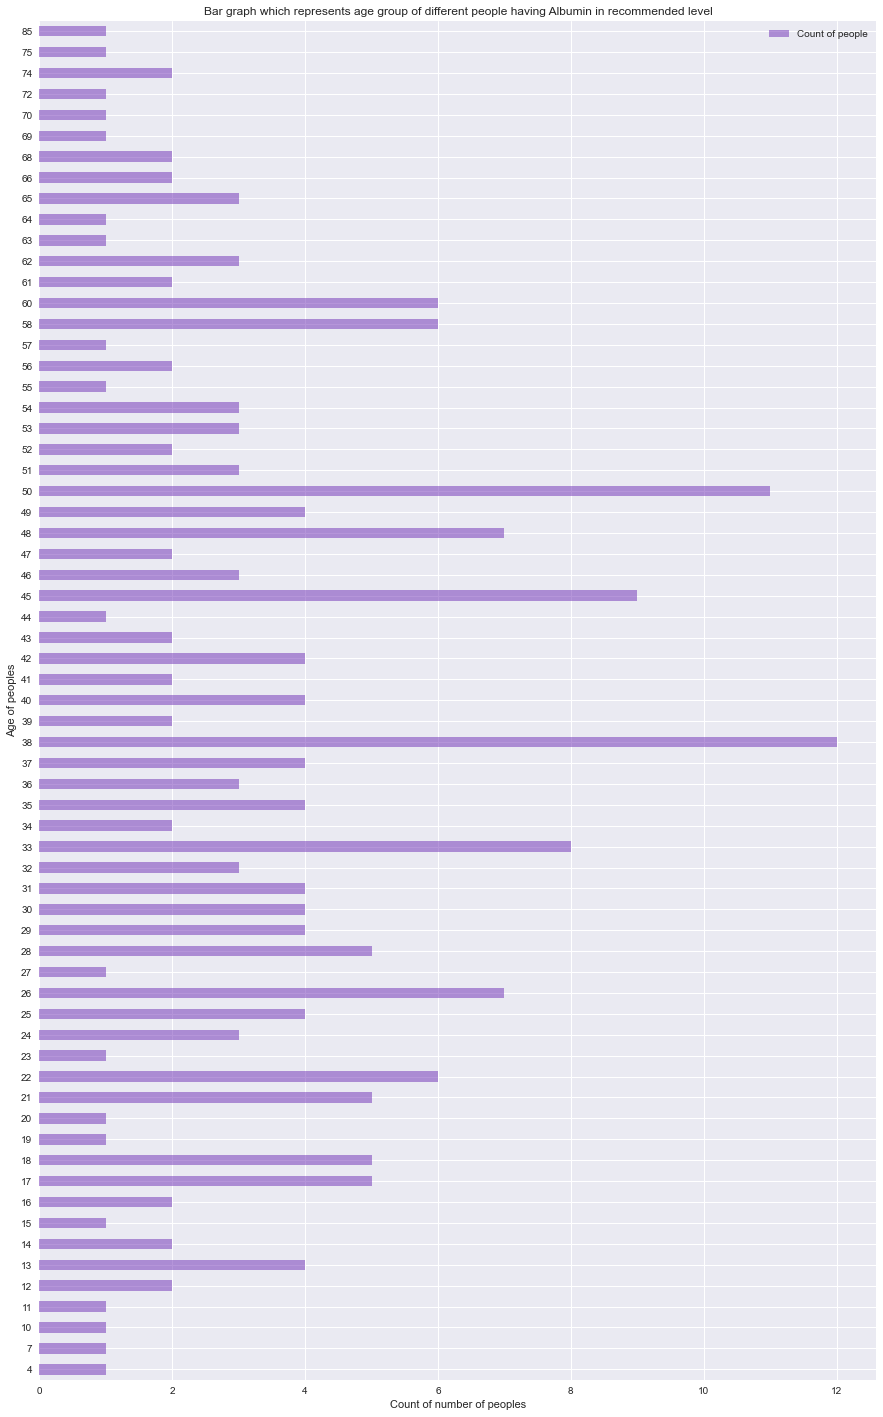

In [794]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Albumin_Description']=='Normal'].groupby('Age')['Albumin_Binary'].count().plot(kind="barh",
                                                                                                                  label="Count of people", 
                                                                                                                  color="#6D2DB5",
                                                                                                                  alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of peoples") #defining label for y-axis
plt.title("Bar graph which represents age group of different people having Albumin in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### People having Albumin not in recommended level as per the gender

In [795]:
liver_df[liver_df['Albumin_Description']=='Not in Normal Range'].groupby('Gender')['Albumin_Binary'].count()

Gender
Female     77
Male      283
Name: Albumin_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Albumin in recommended level as per the gender')

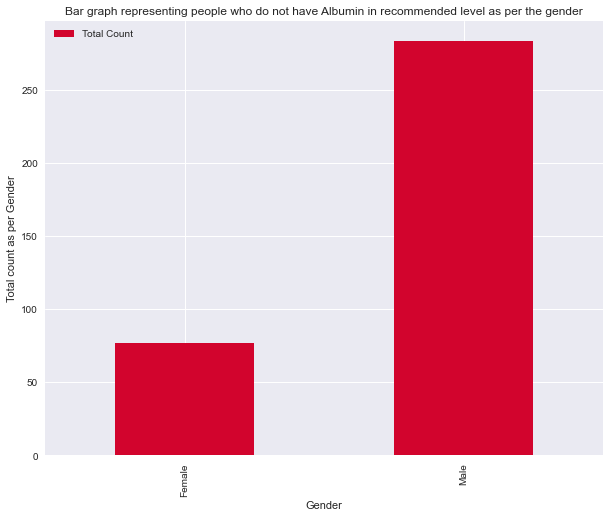

In [796]:
albumin_not_normal=liver_df[liver_df['Albumin_Description']=='Not in Normal Range'].groupby('Gender')['Albumin_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#D2042D",
                                                                                                                                  label="Total Count")
albumin_not_normal.legend() #for placing a legend on the axes
albumin_not_normal.set_xlabel("Gender") #defining label for x-axis
albumin_not_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
albumin_not_normal.set_title("Bar graph representing people who do not have Albumin in recommended level as per the gender") #defining title for the figure

#### Peoples having normal Albumin level as per the gender

In [797]:
liver_df[liver_df['Albumin_Description']=='Normal'].groupby('Gender')['Albumin_Binary'].count()

Gender
Female     61
Male      145
Name: Albumin_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Albumin in recommended level as per the gender')

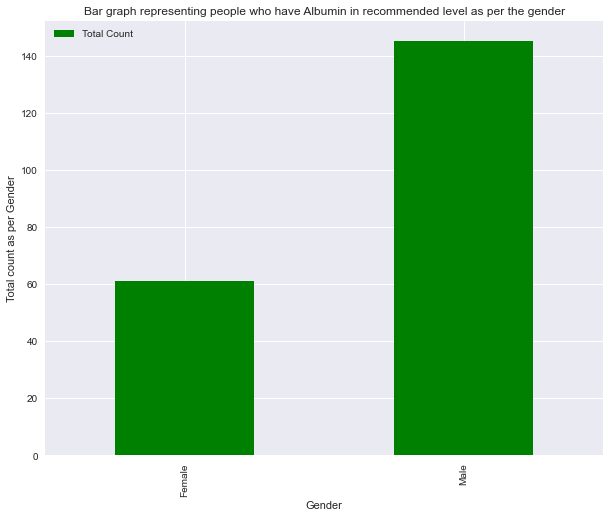

In [798]:
albumin_normal=liver_df[liver_df['Albumin_Description']=='Normal'].groupby('Gender')['Albumin_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#008000",
                                                                                                                                  label="Total Count")
albumin_normal.legend() #for placing a legend on the axes
albumin_normal.set_xlabel("Gender") #defining label for x-axis
albumin_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
albumin_normal.set_title("Bar graph representing people who have Albumin in recommended level as per the gender") #defining title for the figure

#### Normal level Albumin vs Albumin not in normal level as per the gender

Text(0.5, 0.98, 'Bar graph of Normal level Albumin vs Albumin not in normal level as per the gender')

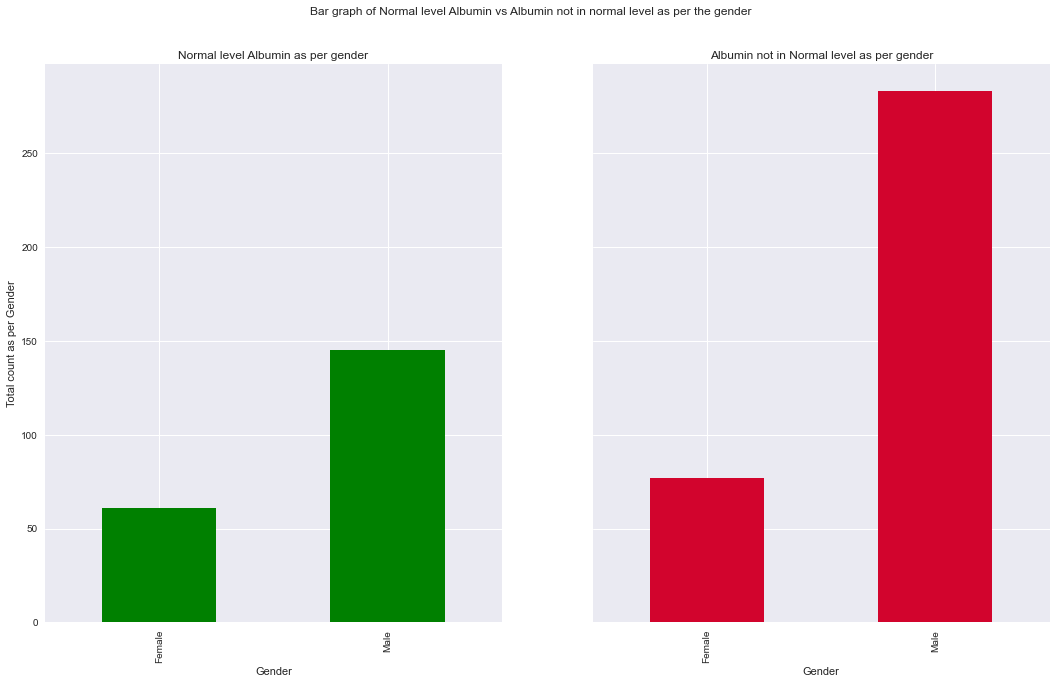

In [799]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
albumin_normal=liver_df[liver_df['Albumin_Description']=='Normal'].groupby('Gender')['Albumin_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#008000",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
albumin_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
albumin_normal.set_title("Normal level Albumin as per gender")

albumin_not_normal=liver_df[liver_df['Albumin_Description']=='Not in Normal Range'].groupby('Gender')['Albumin_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#D2042D",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
albumin_not_normal.set_title("Albumin not in Normal level as per gender")
albumin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Albumin vs Albumin not in normal level as per the gender") #defining title for the figure

#### The condition of liver of the patient according to the Albumin rate

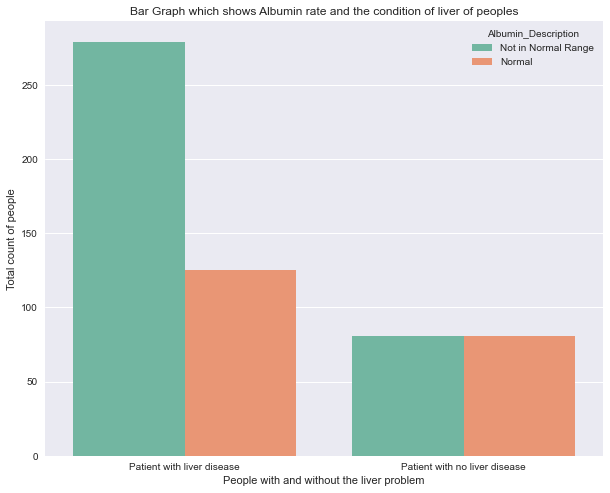

In [800]:
plt.figure(figsize=(10,8)) #Defining figure size
albumin_condition=sns.countplot(x="Dataset_Details", data=liver_df, hue="Albumin_Description",palette="Set2")
albumin_condition.set(xlabel="People with and without the liver problem",ylabel="Total count of people") #defining label for x-axis by providing xlabel and #efining label for y-axis by providing ylabel 
albumin_condition.set_title("Bar Graph which shows Albumin rate and the condition of liver of peoples") #defining title for the figure
plt.show()

#### People who have Albumin in normal level and have liver disease

In [801]:
albumin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_Description']=='Normal')].groupby('Gender')['Albumin_Description'].count()
albumin_liverD

Gender
Female    38
Male      87
Name: Albumin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Albumin in recommended level and have liver disease as per the gender')

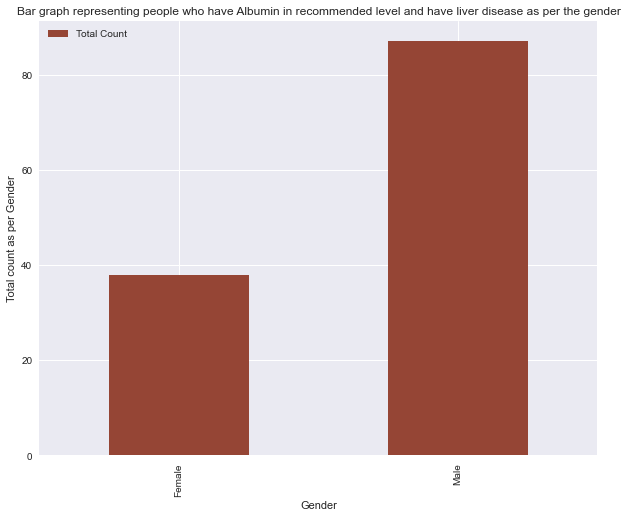

In [802]:
albumin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_Description']=='Normal')].groupby('Gender')['Albumin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#954535",
                                                                                                                                  label="Total Count")
albumin_liverD.legend() #for placing a legend on the axes
albumin_liverD.set_xlabel("Gender") #defining label for x-axis
albumin_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
albumin_liverD.set_title("Bar graph representing people who have Albumin in recommended level and have liver disease as per the gender") #defining title for the figure

#### People who have Albumin in normal level and do not have liver disease

In [803]:
albumin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_Description']=='Normal')].groupby('Gender')['Albumin_Description'].count()
albumin_no_liverD

Gender
Female    23
Male      58
Name: Albumin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Albumin in recommended level and do not have liver disease as per the gender')

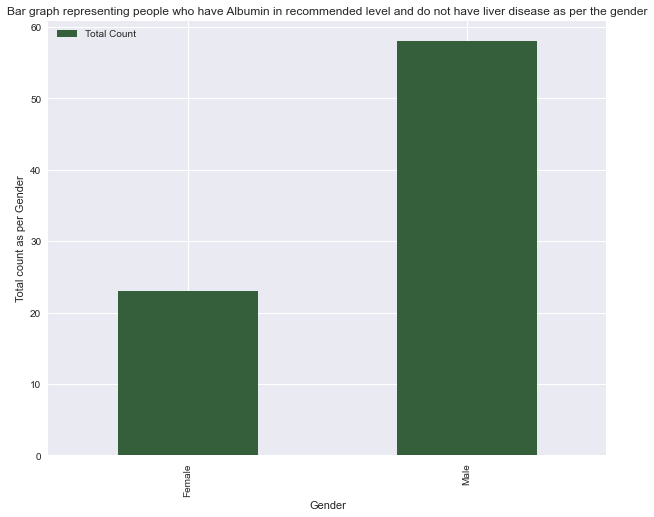

In [804]:
albumin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_Description']=='Normal')].groupby('Gender')['Albumin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#355E3B",
                                                                                                                                  label="Total Count")
albumin_no_liverD.legend() #for placing a legend on the axes
albumin_no_liverD.set_xlabel("Gender") #defining label for x-axis
albumin_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
albumin_no_liverD.set_title("Bar graph representing people who have Albumin in recommended level and do not have liver disease as per the gender") #defining title for the figure

#### Albumin in normal level and having liver disease VS Albumin in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Normal level Albumin in normal level and having liver disease VS  Albumin in normal level and not having a liver disease')

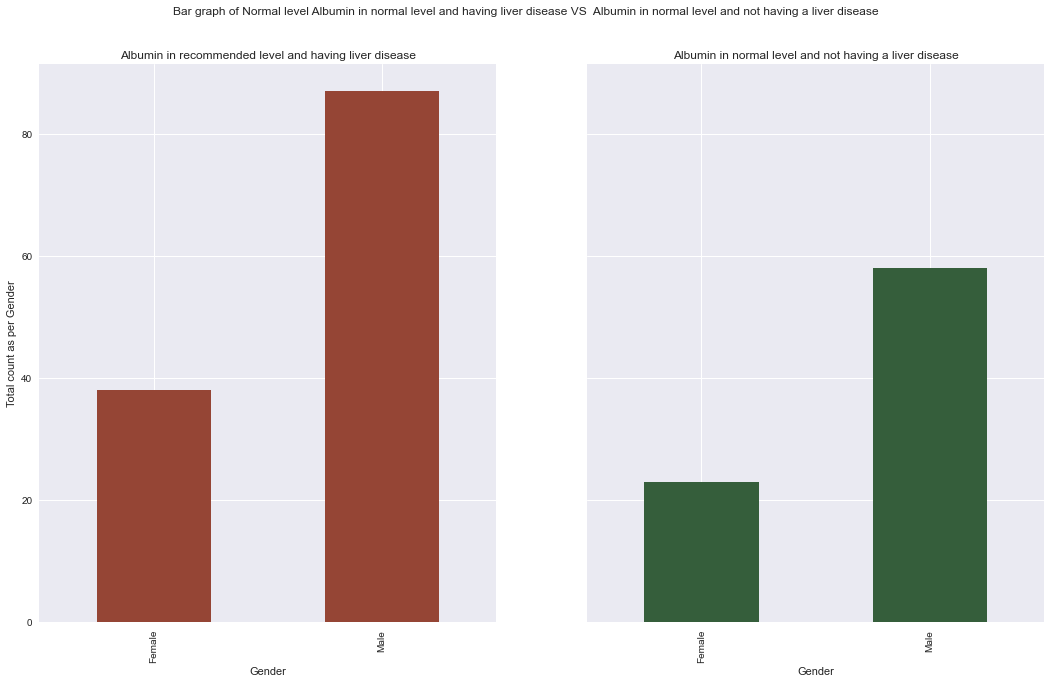

In [805]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
albumin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_Description']=='Normal')].groupby('Gender')['Albumin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#954535",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
albumin_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
albumin_liverD.set_title("Albumin in recommended level and having liver disease")

albumin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_Description']=='Normal')].groupby('Gender')['Albumin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#355E3B",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
albumin_no_liverD.set_title("Albumin in normal level and not having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Albumin in normal level and having liver disease VS  Albumin in normal level and not having a liver disease") #defining title for the figure

#### People who do not have Albumin in normal level and have liver diesease 

In [806]:
not_NAlbumin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_Description'].count()
not_NAlbumin_liverD

Gender
Female     52
Male      227
Name: Albumin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Albumin in normal level and have liver diesease as per the gender')

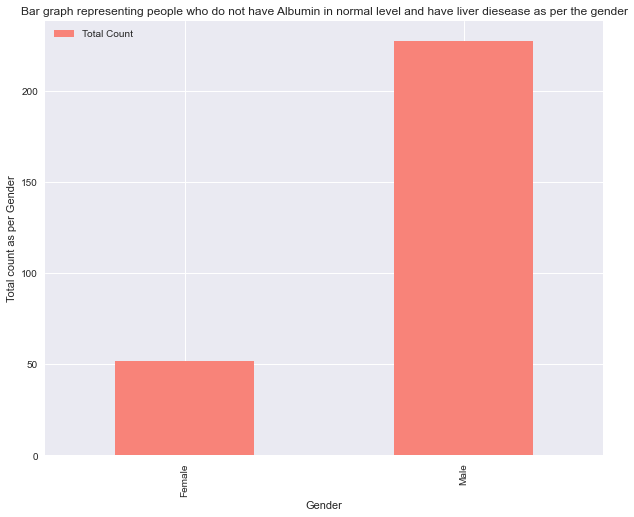

In [807]:
not_NAlbumin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#F88379",
                                                                                                                                  label="Total Count")
not_NAlbumin_liverD.legend() #for placing a legend on the axes
not_NAlbumin_liverD.set_xlabel("Gender") #defining label for x-axis
not_NAlbumin_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_NAlbumin_liverD.set_title("Bar graph representing people who do not have Albumin in normal level and have liver diesease as per the gender") #defining title for the figure

#### People who do not have Albumin in normal level and do not have liver diesease as well

In [808]:
not_NAlbumin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_Description'].count()
not_NAlbumin_no_liverD

Gender
Female    25
Male      56
Name: Albumin_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Albumin in normal level and do not have liver diesease as per the gender')

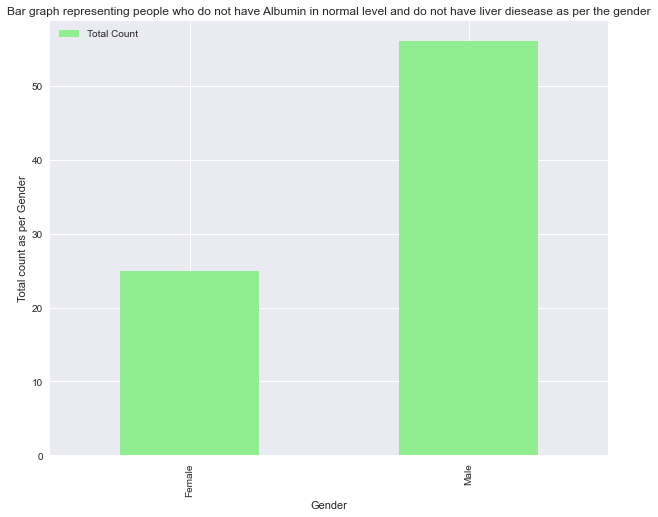

In [809]:
not_NAlbumin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#90EE90",
                                                                                                                                  label="Total Count")
not_NAlbumin_no_liverD.legend() #for placing a legend on the axes
not_NAlbumin_no_liverD.set_xlabel("Gender") #defining label for x-axis
not_NAlbumin_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_NAlbumin_no_liverD.set_title("Bar graph representing people who do not have Albumin in normal level and do not have liver diesease as per the gender") #defining title for the figure

#### Albumin not in normal level and having liver disease VS Albumin not in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Albumin not in normal level and having liver disease VS  Albumin not in normal level and not having a liver disease')

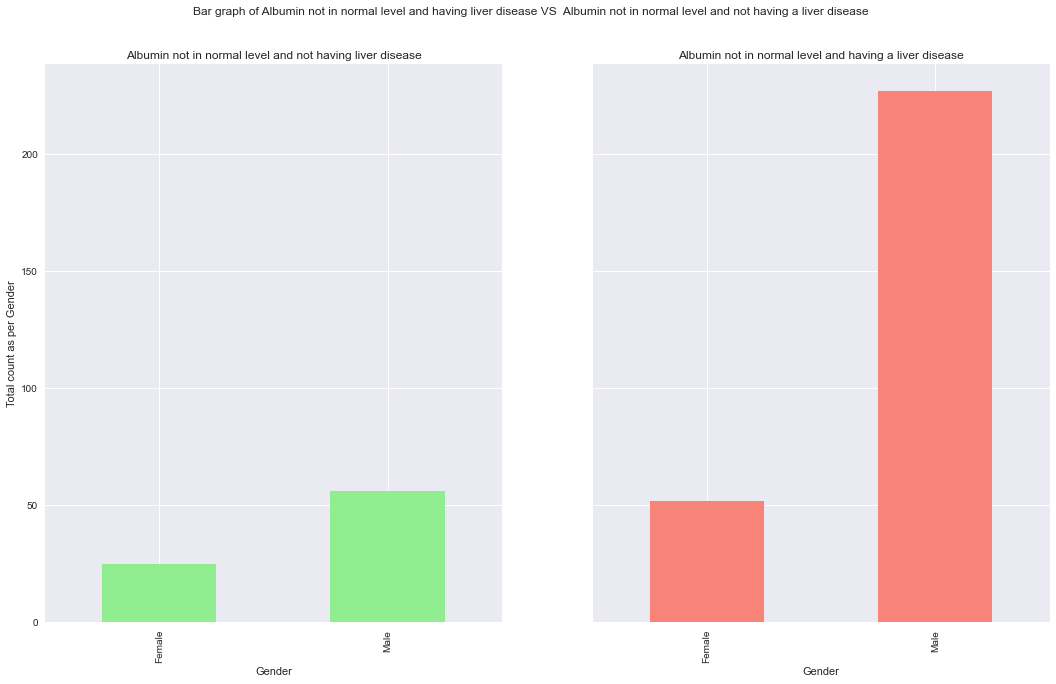

In [810]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
not_NAlbumin_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#90EE90",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
not_NAlbumin_no_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
not_NAlbumin_no_liverD.set_title("Albumin not in normal level and not having liver disease")

not_NAlbumin_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#F88379",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
not_NAlbumin_liverD.set_title("Albumin not in normal level and having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Albumin not in normal level and having liver disease VS  Albumin not in normal level and not having a liver disease") #defining title for the figure

### Further analysis and Data Visualization on Albumin and Globulin Ratio

#### Creating function as per the recommended rate of Albumin and Globulin Ratio

In [811]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

In [812]:
liver_df['Albumin_and_Globulin_Ratio'] #extracting the values of selected columns from dataframe

0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
561    0.37
562    1.10
563    1.00
564    1.00
565    1.50
Name: Albumin_and_Globulin_Ratio, Length: 566, dtype: float64

In [813]:
#Creating a function to provide 1 value to normal Albumin and Globulin Ratio rate and 0 to not normal Albumin andGlobulin Ratio rate
def binary_albumin_and_globulin_ratio(albumin_and_globulin_ratio):
    if albumin_and_globulin_ratio>=1.50 and albumin_and_globulin_ratio<=2.50:
        return 1
    else:
        return 0

In [814]:
liver_df['Albumin_and_Globulin_Ratio_Binary'] = liver_df['Albumin_and_Globulin_Ratio'].apply(binary_albumin_and_globulin_ratio) #Implementing the developed function and creating a new column as per the defined logic

In [815]:
liver_df[['Albumin_and_Globulin_Ratio','Albumin_and_Globulin_Ratio_Binary']] #extracting the values of selected columns from dataframe

Albumin_and_Globulin_Ratio  Albumin_and_Globulin_Ratio_Binary
0                          0.90                                  0
1                          0.74                                  0
2                          0.89                                  0
3                          1.00                                  0
4                          0.40                                  0
..                          ...                                ...
561                        0.37                                  0
562                        1.10                                  0
563                        1.00                                  0
564                        1.00                                  0
565                        1.50                                  1

[566 rows x 2 columns]

In [816]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

In [817]:
#Creating a function for determining normal total bilirubin rate
def desc_albumin_and_globulin_ratio(albumin_and_globulin_ratio):
    if albumin_and_globulin_ratio>=1.5 and albumin_and_globulin_ratio<=2.5:
        return "Normal"
    else:
        return "Not in Normal Range"

In [818]:
liver_df['Albumin_and_Globulin_Ratio_Description'] = liver_df['Albumin_and_Globulin_Ratio'].apply(desc_albumin_and_globulin_ratio) #Implementing the developed function and creating a new column as per the defined logic

In [819]:
liver_df[['Albumin_and_Globulin_Ratio','Albumin_and_Globulin_Ratio_Binary','Albumin_and_Globulin_Ratio_Description']] #extracting the values of selected columns from dataframe

Albumin_and_Globulin_Ratio  Albumin_and_Globulin_Ratio_Binary  \
0                          0.90                                  0   
1                          0.74                                  0   
2                          0.89                                  0   
3                          1.00                                  0   
4                          0.40                                  0   
..                          ...                                ...   
561                        0.37                                  0   
562                        1.10                                  0   
563                        1.00                                  0   
564                        1.00                                  0   
565                        1.50                                  1   

    Albumin_and_Globulin_Ratio_Description  
0                      Not in Normal Range  
1                      Not in Normal Range  
2                      Not in Normal Range  
3                      Not in Normal Range  
4                      Not in Normal Range  
..                                     ...  
561                    Not in Normal Range  
562                    Not in Normal Range  
563                    Not in Normal Range  
564                    Not in Normal Range  
565                                 Normal  

[566 rows x 3 columns]

In [820]:
liver_df.info() #extracting details such as column name, number of rows, data type of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

#### Peoples as per the age whose Albumin and Globulin Ratio is not in the the recommended level 

In [821]:
liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range'].groupby('Age')['Albumin_and_Globulin_Ratio_Binary'].count()

Age
4      2
6      1
7      2
8      1
10     1
      ..
75    14
78     1
84     1
85     1
90     1
Name: Albumin_and_Globulin_Ratio_Binary, Length: 71, dtype: int64

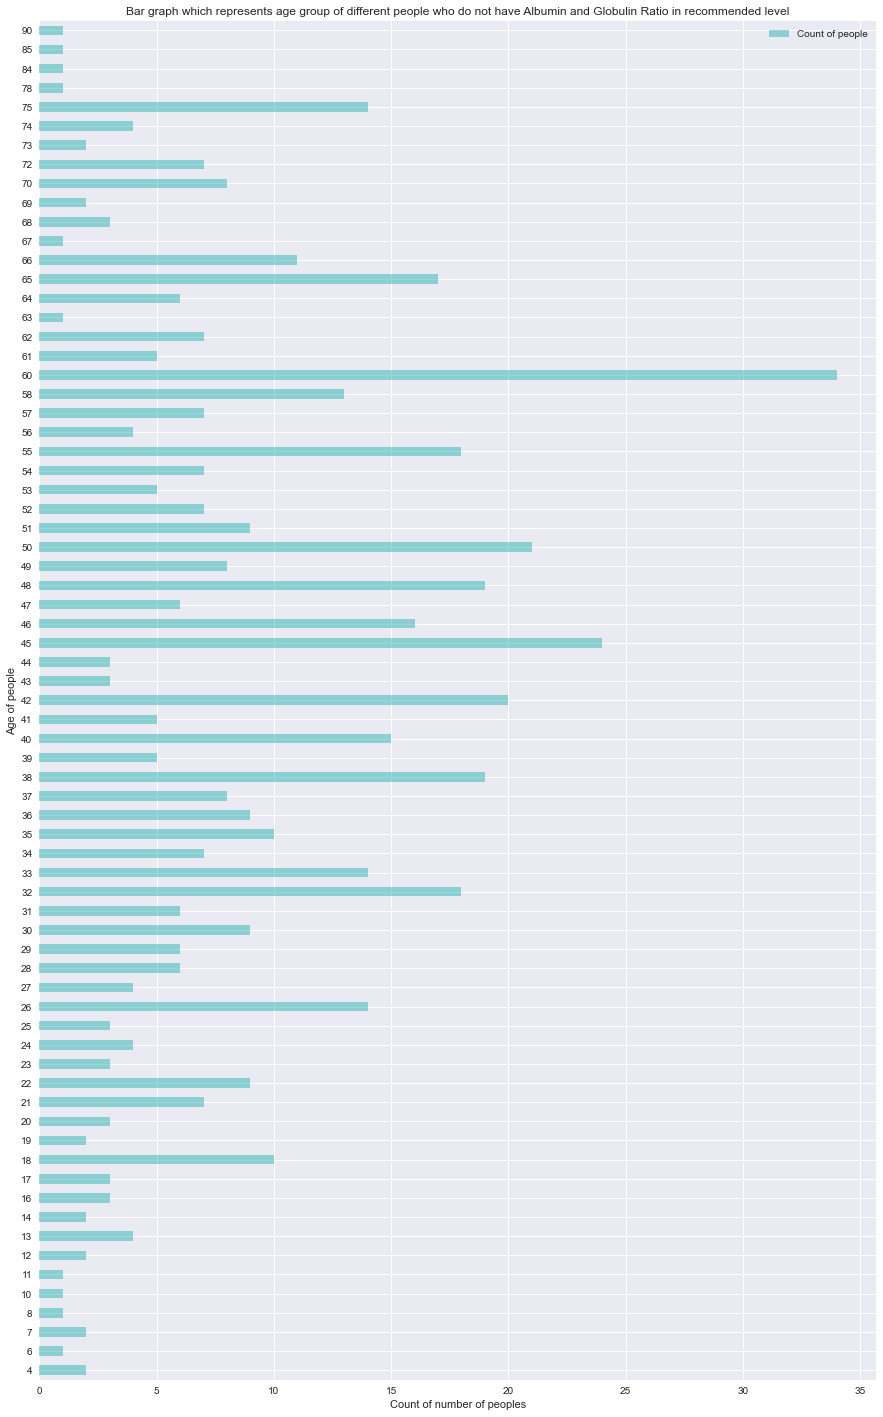

In [822]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range'].groupby('Age')['Albumin_and_Globulin_Ratio_Binary'].count().plot(kind="barh",
                                                                                                                               label="Count of people",
                                                                                                                               color="#2DB5B4",
                                                                                                                               alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents age group of different people who do not have Albumin and Globulin Ratio in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Top 10 age group people having Albumin and Globulin Ratio in not recommended level

In [823]:
#liver_df[liver_df['Dataset']==1].groupby('Age')['Dataset'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
topTenAlbuminAndGlobulinRatioNN = liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range'].groupby('Age')['Albumin_and_Globulin_Ratio_Binary'].count().reset_index(name='Count').sort_values(['Count'], ascending=False).head(10) #extracting data which consists of patients without liver disease then, the data is counted and sorted in ascending order to extract only first 10 rows
topTenAlbuminAndGlobulinRatioNN

Age  Count
52   60     34
38   45     24
43   50     21
35   42     20
41   48     19
31   38     19
25   32     18
48   55     18
57   65     17
39   46     16

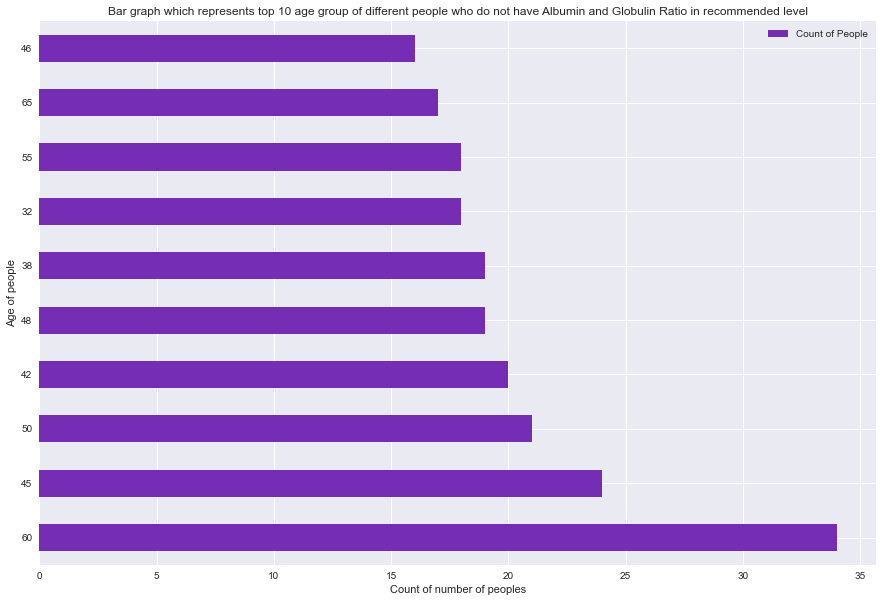

In [824]:
topTenAlbuminAndGlobulinRatioNN.plot.barh(x='Age', y='Count',figsize=(15,10),color="#762DB5", label="Count of People")
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of people") #defining label for y-axis
plt.title("Bar graph which represents top 10 age group of different people who do not have Albumin and Globulin Ratio in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### Peoples as per the age having normal Albumin and Globulin Ratio level

In [825]:
liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal'].groupby('Age')['Albumin_and_Globulin_Ratio_Binary'].count()

Age
15    1
17    2
24    1
25    2
27    1
28    2
29    1
31    1
32    2
33    1
35    1
37    1
38    1
40    1
43    1
48    1
49    2
50    2
53    1
54    1
62    2
63    1
66    1
68    1
70    1
Name: Albumin_and_Globulin_Ratio_Binary, dtype: int64

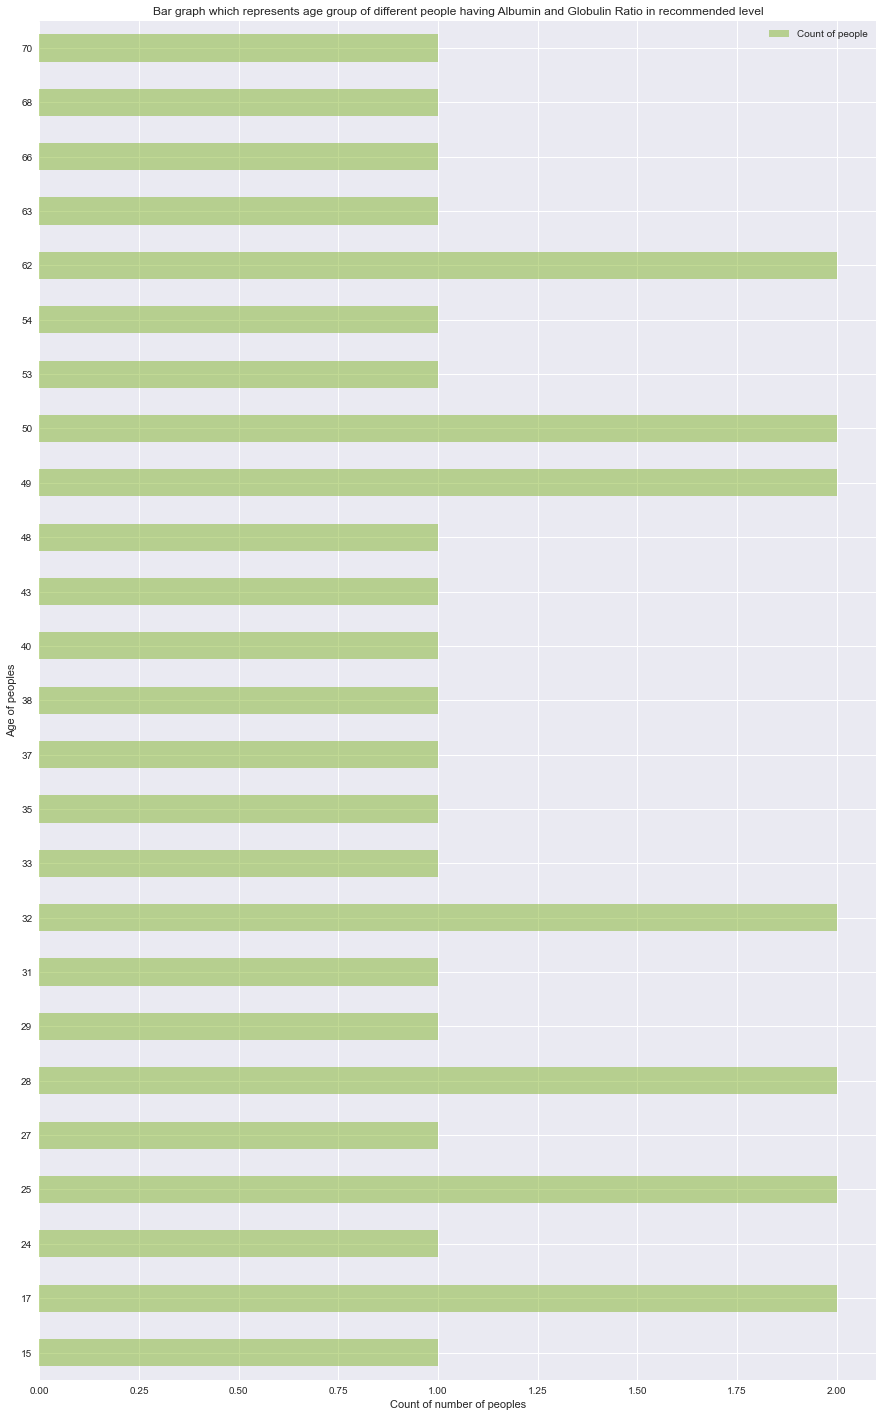

In [826]:
plt.figure(figsize=(15,25))
liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal'].groupby('Age')['Albumin_and_Globulin_Ratio_Binary'].count().plot(kind="barh",
                                                                                                                  label="Count of people", 
                                                                                                                  color="#84B52D",
                                                                                                                  alpha=0.5)
plt.xlabel("Count of number of peoples") #defining label for x-axis
plt.ylabel("Age of peoples") #defining label for y-axis
plt.title("Bar graph which represents age group of different people having Albumin and Globulin Ratio in recommended level") #defining title for the figure
plt.legend() #for placing a legend on the axes

#### People having Albumin and Globulin Ratio not in recommended level as per the gender

In [827]:
liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range'].groupby('Gender')['Albumin_and_Globulin_Ratio_Binary'].count()

Gender
Female    130
Male      404
Name: Albumin_and_Globulin_Ratio_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Albumin and Globulin Ratio in recommended level as per the gender')

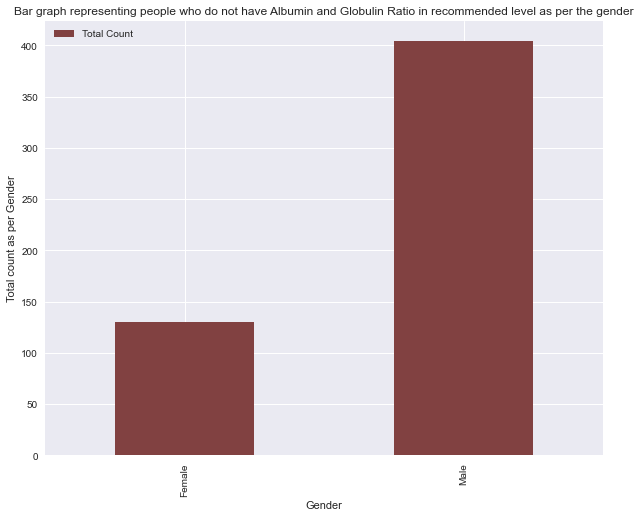

In [828]:
albumin_and_globulin_not_normal=liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range'].groupby('Gender')['Albumin_and_Globulin_Ratio_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#814141",
                                                                                                                                  label="Total Count")
albumin_and_globulin_not_normal.legend() #for placing a legend on the axes
albumin_and_globulin_not_normal.set_xlabel("Gender") #defining label for x-axis
albumin_and_globulin_not_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
albumin_and_globulin_not_normal.set_title("Bar graph representing people who do not have Albumin and Globulin Ratio in recommended level as per the gender") #defining title for the figure

#### Peoples having normal Albumin and Globulin Ratio level as per the gender

In [829]:
liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal'].groupby('Gender')['Albumin_and_Globulin_Ratio_Binary'].count()

Gender
Female     8
Male      24
Name: Albumin_and_Globulin_Ratio_Binary, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Albumin and Globulin Ratio in recommended level as per the gender')

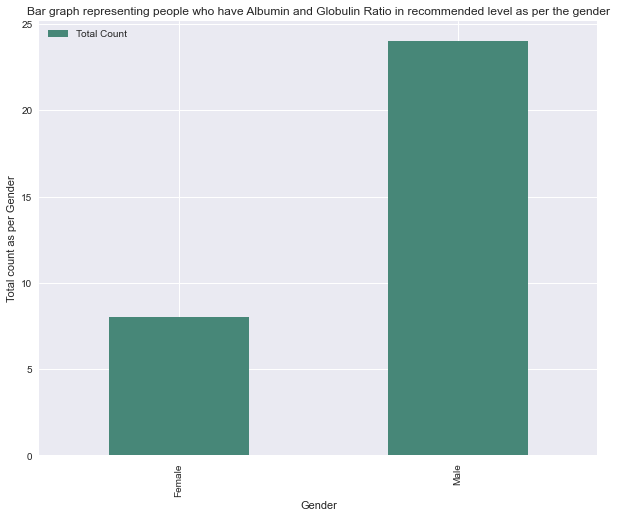

In [830]:
albumin_and_globulin_normal=liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal'].groupby('Gender')['Albumin_and_Globulin_Ratio_Binary'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#478778",
                                                                                                                                  label="Total Count")
albumin_and_globulin_normal.legend() #for placing a legend on the axes
albumin_and_globulin_normal.set_xlabel("Gender") #defining label for x-axis
albumin_and_globulin_normal.set_ylabel("Total count as per Gender") #defining label for y-axis
albumin_and_globulin_normal.set_title("Bar graph representing people who have Albumin and Globulin Ratio in recommended level as per the gender") #defining title for the figure

#### Normal level Albumin and Globulin Ratio vs Albumin and Globulin Ratio not in normal level as per the gender

Text(0.5, 0.98, 'Bar graph of Normal level Albumin and Globulin Ratio vs Albumin and Globulin Ratio not in normal level as per the gender')

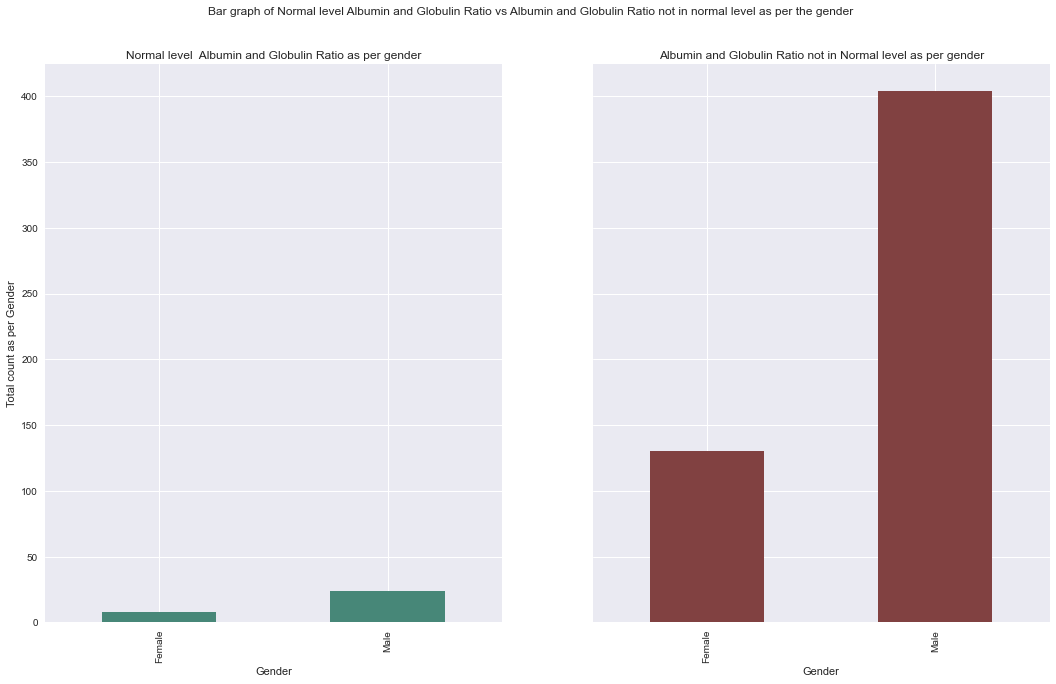

In [831]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
albumin_and_globulin_normal=liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal'].groupby('Gender')['Albumin_and_Globulin_Ratio_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#478778",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
albumin_and_globulin_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
albumin_and_globulin_normal.set_title("Normal level  Albumin and Globulin Ratio as per gender")

albumin_and_globulin_not_normal=liver_df[liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range'].groupby('Gender')['Albumin_and_Globulin_Ratio_Binary'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#814141",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
albumin_and_globulin_not_normal.set_title("Albumin and Globulin Ratio not in Normal level as per gender")
albumin_and_globulin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Albumin and Globulin Ratio vs Albumin and Globulin Ratio not in normal level as per the gender") #defining title for the figure

#### The condition of liver of the patient according to the Albumin and Globulin Ratio rate

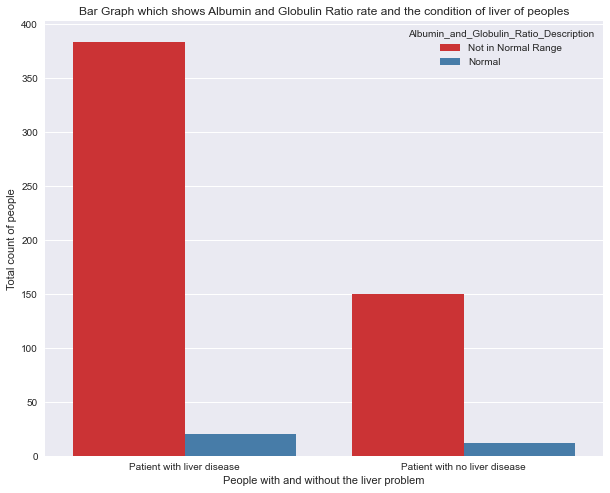

In [832]:
plt.figure(figsize=(10,8)) #Defining figure size
albumin_condition=sns.countplot(x="Dataset_Details", data=liver_df, hue="Albumin_and_Globulin_Ratio_Description",palette="Set1")
albumin_condition.set(xlabel="People with and without the liver problem",ylabel="Total count of people") #defining label for x-axis by providing xlabel and #efining label for y-axis by providing ylabel 
albumin_condition.set_title("Bar Graph which shows Albumin and Globulin Ratio rate and the condition of liver of peoples") #defining title for the figure
plt.show()

#### People who have Albumin and Globulin Ratio rate in normal level and have liver disease

In [833]:
albumin_and_globulin_Ratio_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count()
albumin_and_globulin_Ratio_liverD

Gender
Female     5
Male      15
Name: Albumin_and_Globulin_Ratio_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Albumin and Globulin Ratio in recommended level and have liver disease as per the gender')

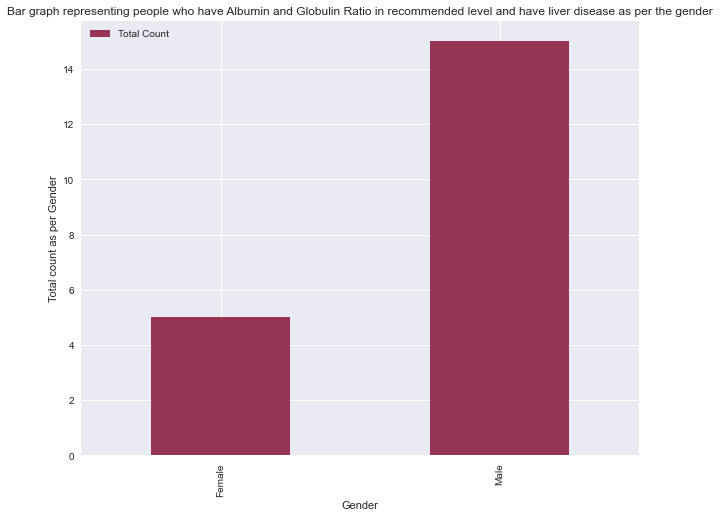

In [834]:
albumin_and_globulin_Ratio_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#953553",
                                                                                                                                  label="Total Count")
albumin_and_globulin_Ratio_liverD.legend() #for placing a legend on the axes
albumin_and_globulin_Ratio_liverD.set_xlabel("Gender") #defining label for x-axis
albumin_and_globulin_Ratio_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
albumin_and_globulin_Ratio_liverD.set_title("Bar graph representing people who have Albumin and Globulin Ratio in recommended level and have liver disease as per the gender") #defining title for the figure

#### People who have Albumin and Globulin Ratio in normal level and do not have liver disease

In [835]:
albumin_and_globulin_Ratio_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count()
albumin_and_globulin_Ratio_no_liverD

Gender
Female    3
Male      9
Name: Albumin_and_Globulin_Ratio_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who have Albumin and Globulin Ratio in recommended level and do not have liver disease as per the gender')

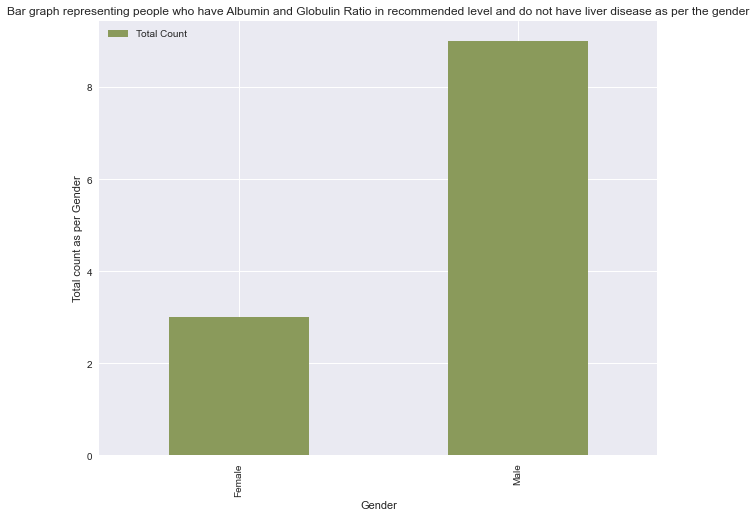

In [836]:
albumin_and_globulin_Ratio_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#8A9A5B",
                                                                                                                                  label="Total Count")
albumin_and_globulin_Ratio_no_liverD.legend() #for placing a legend on the axes
albumin_and_globulin_Ratio_no_liverD.set_xlabel("Gender") #defining label for x-axis
albumin_and_globulin_Ratio_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
albumin_and_globulin_Ratio_no_liverD.set_title("Bar graph representing people who have Albumin and Globulin Ratio in recommended level and do not have liver disease as per the gender") #defining title for the figure

#### Albumin and Globulin Ratio in normal level and having liver disease VS Albumin and Globulin Ratio in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Normal level Albumin and Globulin Ratio in normal level and having liver disease VS  Albumin in normal level and not having a liver disease')

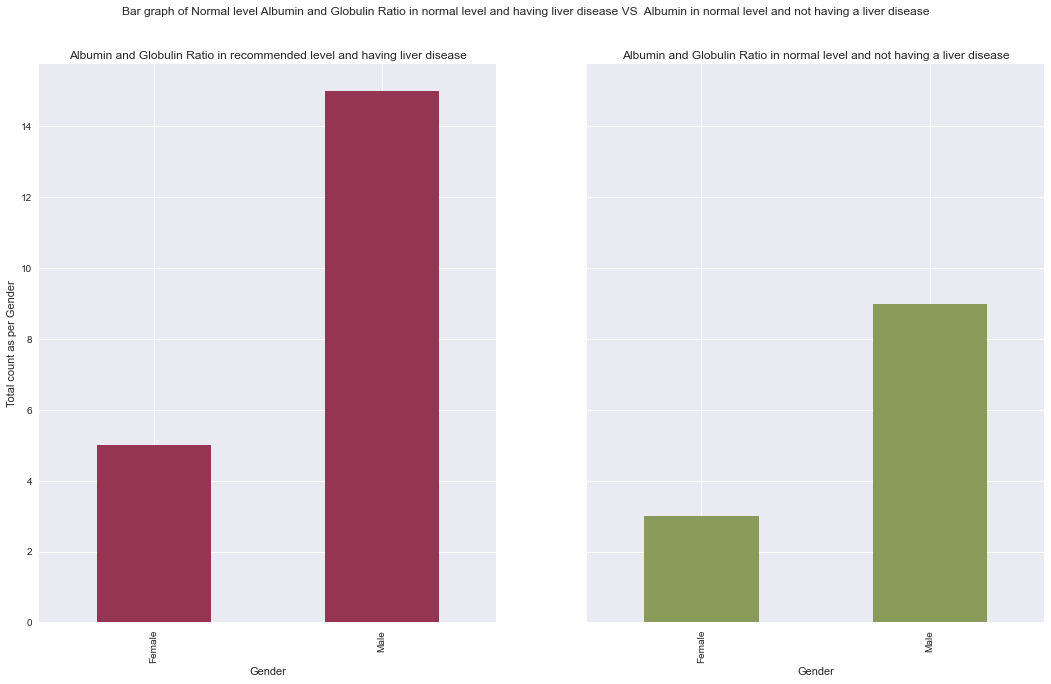

In [837]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
albumin_and_globulin_Ratio_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#953553",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
albumin_and_globulin_Ratio_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
albumin_and_globulin_Ratio_liverD.set_title("Albumin and Globulin Ratio in recommended level and having liver disease")

albumin_and_globulin_Ratio_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Normal')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#8A9A5B",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
albumin_and_globulin_Ratio_no_liverD.set_title("Albumin and Globulin Ratio in normal level and not having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Normal level Albumin and Globulin Ratio in normal level and having liver disease VS  Albumin in normal level and not having a liver disease") #defining title for the figure

#### People who do not have Albumin and Globulin Ratio in normal level and have liver diesease 

In [838]:
not_NAlbumin_and_Globulin_Ratio_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count()
not_NAlbumin_and_Globulin_Ratio_liverD

Gender
Female     85
Male      299
Name: Albumin_and_Globulin_Ratio_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Albumin and Globulin Ratio in normal level and have liver diesease as per the gender')

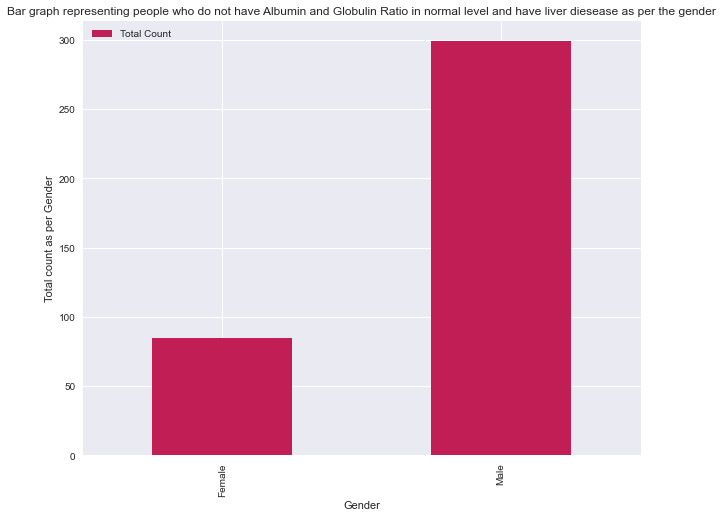

In [839]:
not_NAlbumin_and_Globulin_Ratio_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#C21E56",
                                                                                                                                  label="Total Count")
not_NAlbumin_and_Globulin_Ratio_liverD.legend() #for placing a legend on the axes
not_NAlbumin_and_Globulin_Ratio_liverD.set_xlabel("Gender") #defining label for x-axis
not_NAlbumin_and_Globulin_Ratio_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_NAlbumin_and_Globulin_Ratio_liverD.set_title("Bar graph representing people who do not have Albumin and Globulin Ratio in normal level and have liver diesease as per the gender") #defining title for the figure

#### People who do not have Albumin and Globulin Ratio in normal level and do not have liver diesease as well

In [840]:
not_NAlbumin_and_Globulin_Ratio_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count()
not_NAlbumin_and_Globulin_Ratio_no_liverD

Gender
Female     45
Male      105
Name: Albumin_and_Globulin_Ratio_Description, dtype: int64

Text(0.5, 1.0, 'Bar graph representing people who do not have Albumin and Globulin Ratio in normal level and do not have liver diesease as per the gender')

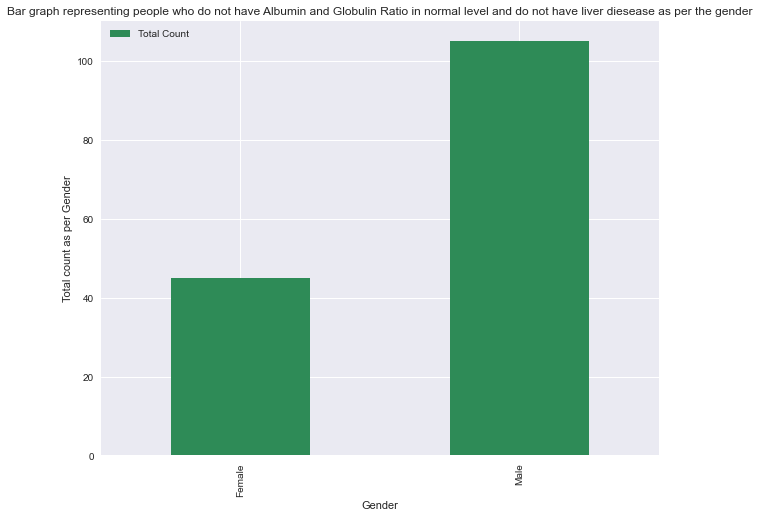

In [841]:
not_NAlbumin_and_Globulin_Ratio_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count().plot(kind="bar",
                                                                                                                                  figsize=(10,8),
                                                                                                                                  color="#2E8B57",
                                                                                                                                  label="Total Count")
not_NAlbumin_and_Globulin_Ratio_no_liverD.legend() #for placing a legend on the axes
not_NAlbumin_and_Globulin_Ratio_no_liverD.set_xlabel("Gender") #defining label for x-axis
not_NAlbumin_and_Globulin_Ratio_no_liverD.set_ylabel("Total count as per Gender") #defining label for y-axis
not_NAlbumin_and_Globulin_Ratio_no_liverD.set_title("Bar graph representing people who do not have Albumin and Globulin Ratio in normal level and do not have liver diesease as per the gender") #defining title for the figure

#### Albumin and Globulin Ratio not in normal level and having liver disease VS Albumin and Globulin Ratio not in normal level and not having a liver disease

Text(0.5, 0.98, 'Bar graph of Albumin and Globulin Ratio not in normal level and having liver disease VS  Albumin and Globulin Ratio not in normal level and not having a liver disease')

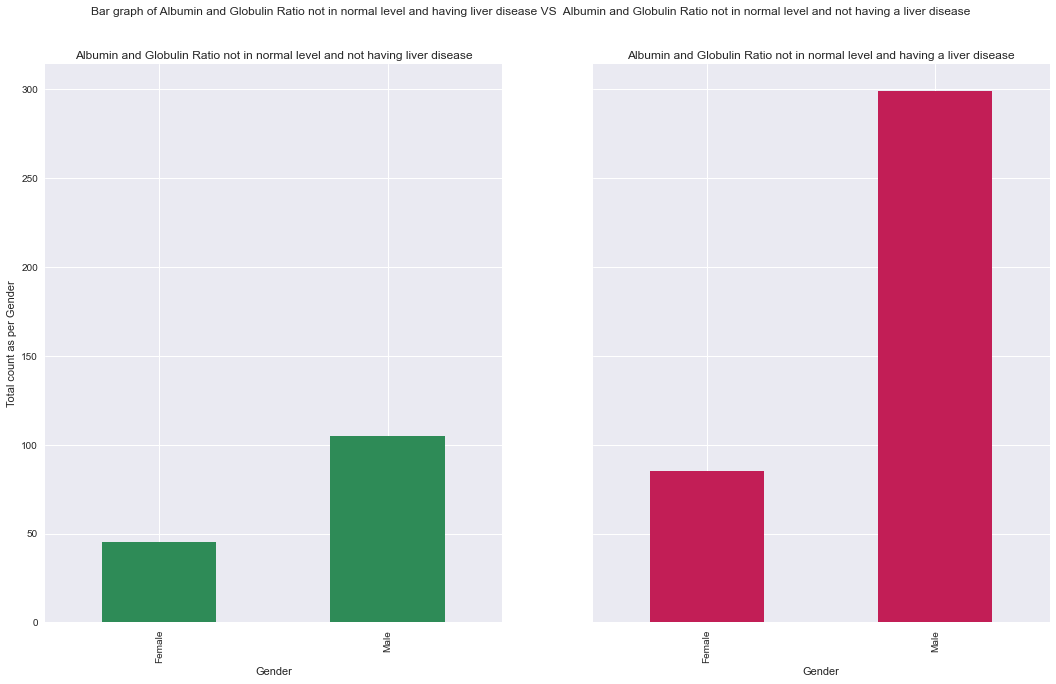

In [842]:
f, axes = plt.subplots(1, 2, figsize=(18,10),sharey=True) # creates subplot grid with 1 row and 2 columns
not_NAlbumin_and_Globulin_Ratio_no_liverD = liver_df[(liver_df['Dataset']==2)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#2E8B57",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[0])
not_NAlbumin_and_Globulin_Ratio_no_liverD.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
not_NAlbumin_and_Globulin_Ratio_no_liverD.set_title("Albumin and Globulin Ratio not in normal level and not having liver disease")

not_NAlbumin_and_Globulin_Ratio_liverD = liver_df[(liver_df['Dataset']==1)&(liver_df['Albumin_and_Globulin_Ratio_Description']=='Not in Normal Range')].groupby('Gender')['Albumin_and_Globulin_Ratio_Description'].count().plot(kind="bar",
                                                                                                                                  #figsize=(10,8),
                                                                                                                                  color="#C21E56",
                                                                                                                                  label="Total Count",
                                                                                                                                  ax=axes[1])
not_NAlbumin_and_Globulin_Ratio_liverD.set_title("Albumin and Globulin Ratio not in normal level and having a liver disease")
#total_Bilirubin_not_normal.set(xlabel="Gender",ylabel="Total count as per Gender") #defining label for x-axis and y- axis
plt.subplots_adjust(top=0.9)
plt.suptitle("Bar graph of Albumin and Globulin Ratio not in normal level and having liver disease VS  Albumin and Globulin Ratio not in normal level and not having a liver disease") #defining title for the figure

## Creating the pariplot according to the liver and non liver patients

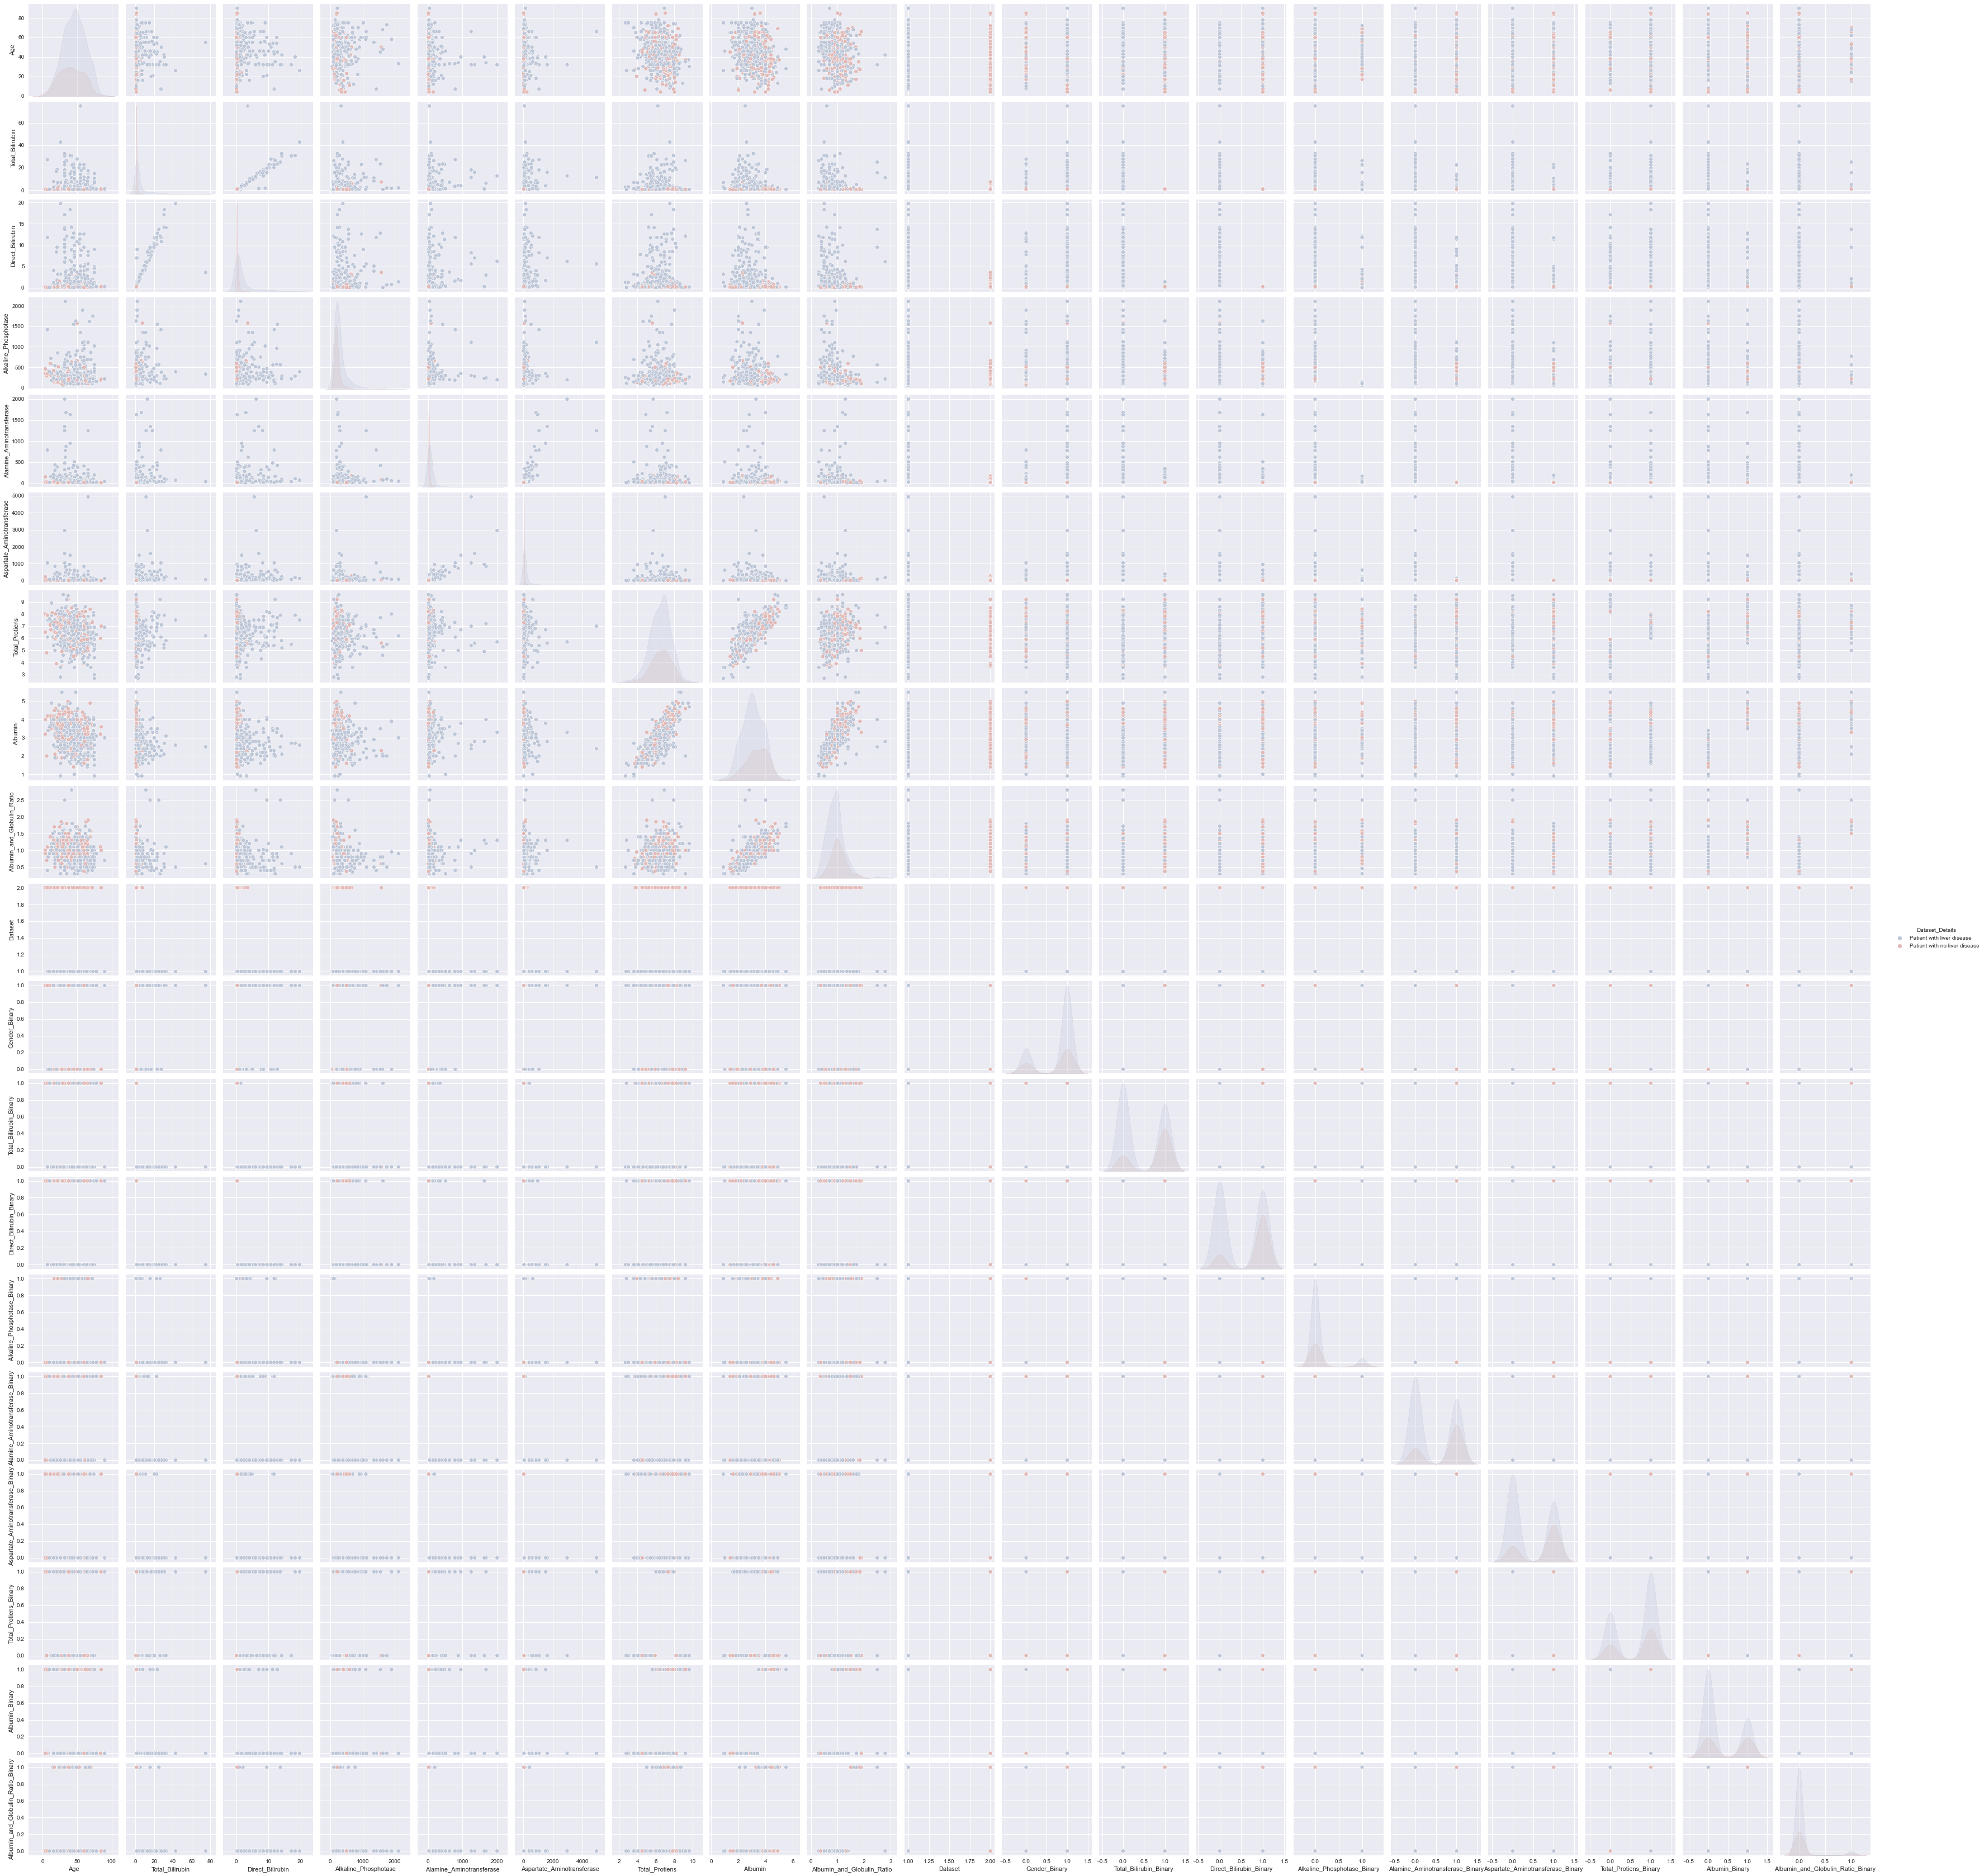

In [843]:
sns.pairplot(liver_df,hue='Dataset_Details', palette='vlag')

## Creating the pariplot according to the gender

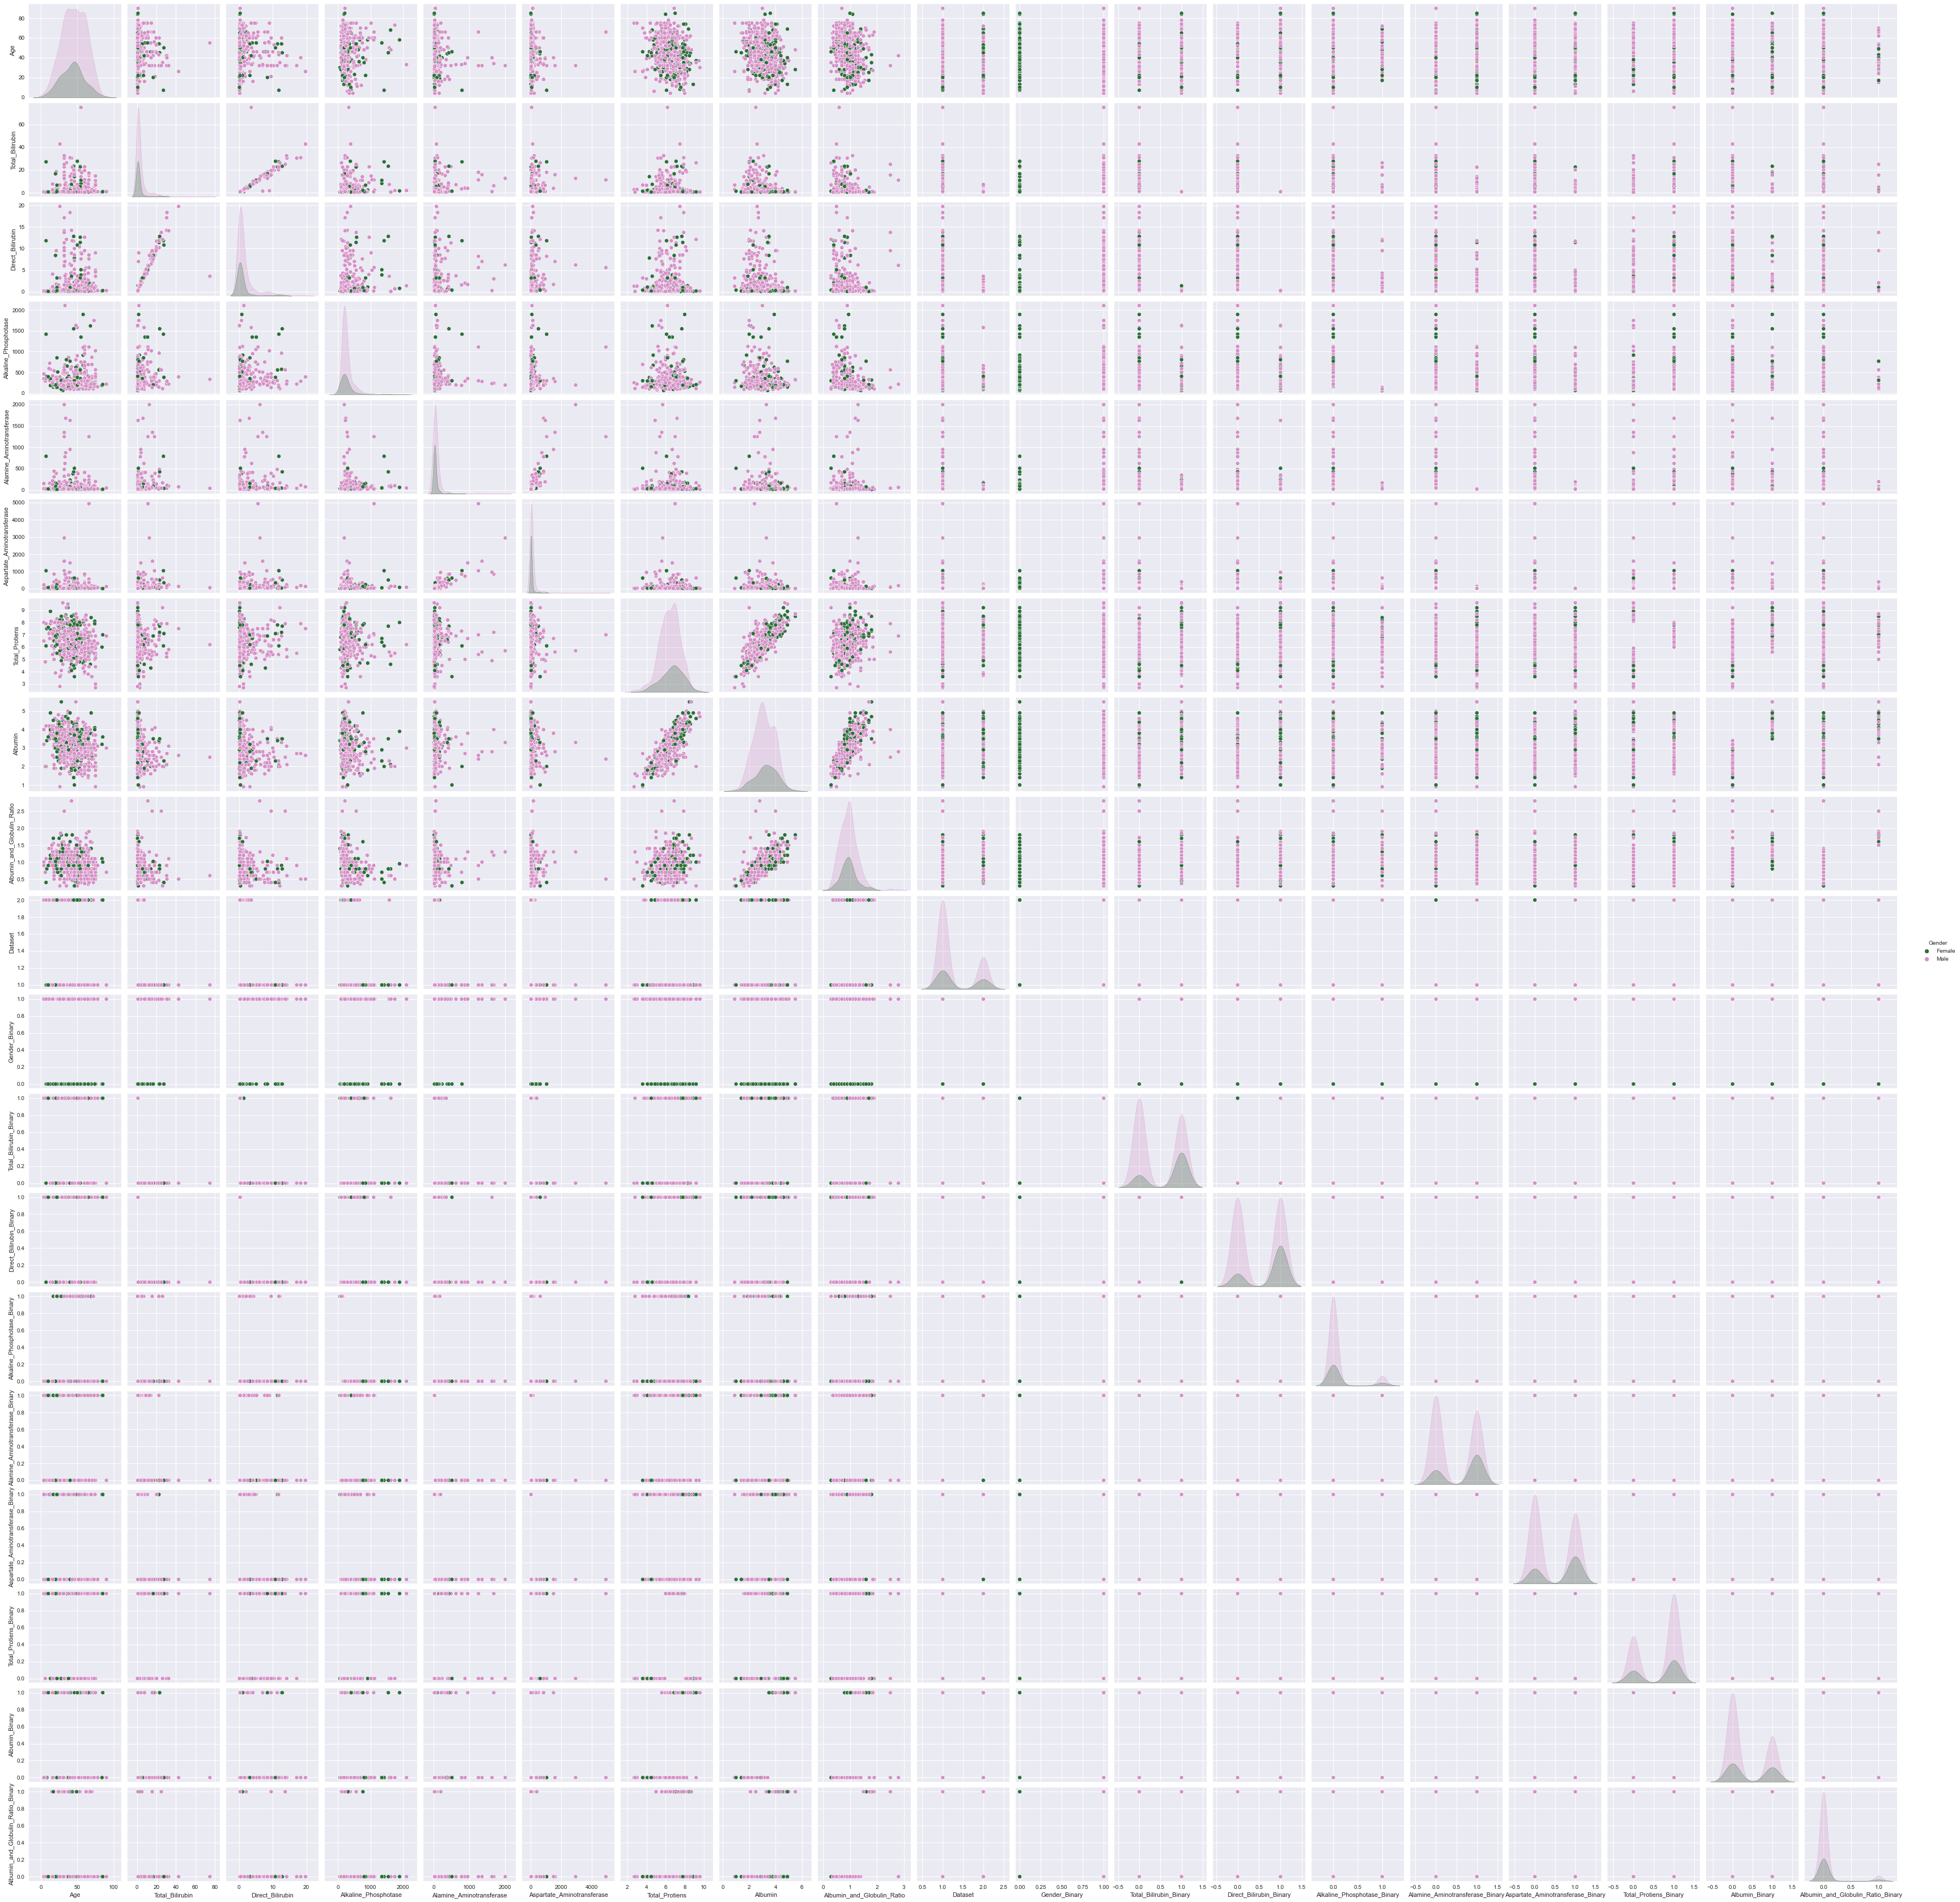

In [844]:
sns.pairplot(liver_df,hue='Gender', palette='cubehelix')

<p> The pairplot comprises two figures namely, the histogram and the scatter plot. 
Histogram can be used to view the distribution of a single variable. 
Likewise, the scatter plots on the upper and lower triangles are used to view the relationship between two variables.</p>

<a href="https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166">To learn more about pairplots, Click Here!!!</a>

## Determining Strong Correlation between the Attributes

### Correlation between Total Bilirubin & Direct Bilirubin

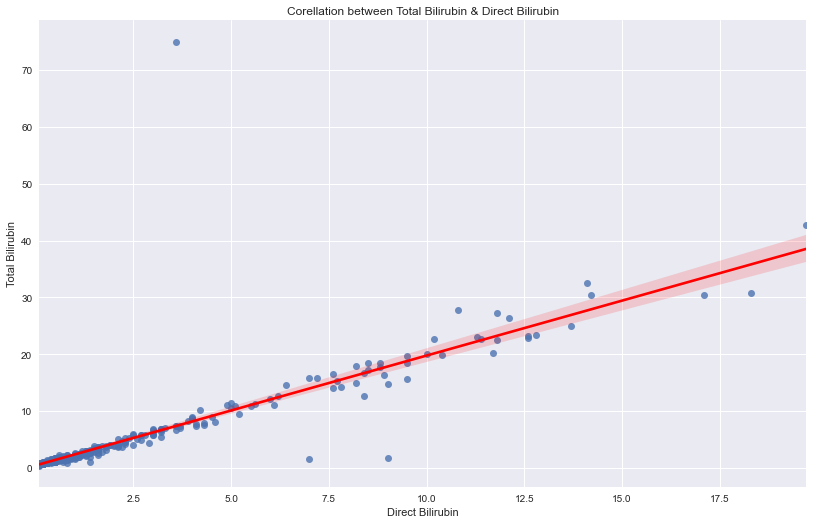

In [845]:
#plt.figure(figsize=(15,12))
lmplotDirectBTotalBilirubin = sns.lmplot(x='Direct_Bilirubin',y='Total_Bilirubin',data=liver_df,height=7, aspect=1.6, line_kws={'color': 'red'})
lmplotDirectBTotalBilirubin.set(xlabel="Direct Bilirubin",ylabel="Total Bilirubin") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel
plt.title('Corellation between Total Bilirubin & Direct Bilirubin')
plt.show()

#### Viewing Pearsons correlation between Total Bilirubin & Direct Bilirubin

In [846]:
corr, p_value = pearsonr(liver_df['Total_Bilirubin'], liver_df['Direct_Bilirubin']) 
print('Pearsons correlation between Total Bilirubin & Direct Bilirubin: %.3f' % corr +' and p-value: {}'.format(p_value) ) 

Pearsons correlation between Total Bilirubin & Direct Bilirubin: 0.874 and p-value: 6.802449119532482e-179


<p style="color:#CC5500;"> There is a positive, <b> strong correlation </b> between the two features namely <b> Total Bilirubin </b> and <b> Direct Bilirubin </b> of the dataset. 
</p>

In [847]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     566 non-null    int64  
 1   Gender                                  566 non-null    object 
 2   Total_Bilirubin                         566 non-null    float64
 3   Direct_Bilirubin                        566 non-null    float64
 4   Alkaline_Phosphotase                    566 non-null    int64  
 5   Alamine_Aminotransferase                566 non-null    int64  
 6   Aspartate_Aminotransferase              566 non-null    int64  
 7   Total_Protiens                          566 non-null    float64
 8   Albumin                                 566 non-null    float64
 9   Albumin_and_Globulin_Ratio              566 non-null    float64
 10  Dataset                                 566 non-null    int64 

### Coorelation between Alamine Aminotransferase & Aspartate Aminotransferase

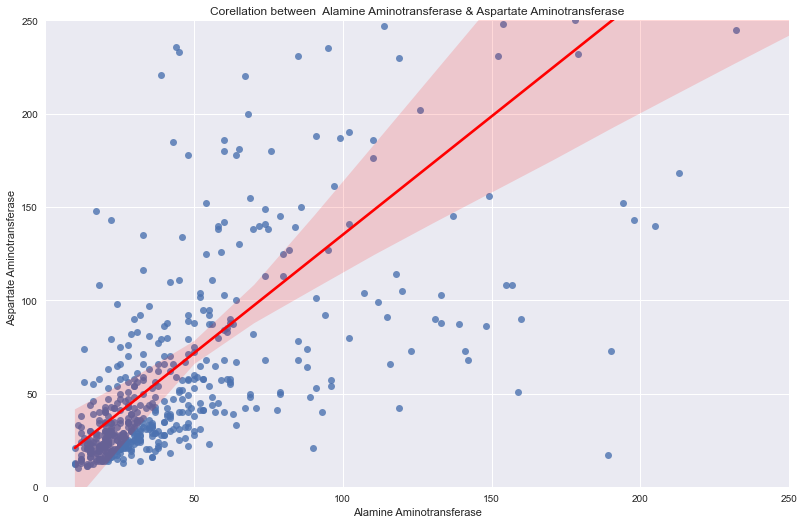

In [848]:
#plt.figure(figsize=(15,12))
lmplotAlamineAspartateAminotransferase = sns.lmplot(x='Alamine_Aminotransferase',y='Aspartate_Aminotransferase',data=liver_df,height=7, aspect=1.6, line_kws={'color': 'red'})
lmplotAlamineAspartateAminotransferase.set(xlabel="Alamine Aminotransferase",ylabel="Aspartate Aminotransferase  ") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel
plt.xlim(0,250) #setting lower bound of x axis as 0 and upper bound as 250.
plt.ylim(0,250) #setting lower bound of y axis as 0 and upper bound as 250.
plt.title('Corellation between  Alamine Aminotransferase & Aspartate Aminotransferase')
plt.show()

#### Viewing Pearsons correlation between Alamine Aminotransferase & Aspartate Aminotransferase

In [849]:
corr, p_value = pearsonr(liver_df['Alamine_Aminotransferase'], liver_df['Aspartate_Aminotransferase']) 
print('Pearsons correlation between Alamine Aminotransferase & Aspartate Aminotransferase: %.3f' % corr +' and p-value: {}'.format(p_value) ) 

Pearsons correlation between Alamine Aminotransferase & Aspartate Aminotransferase: 0.792 and p-value: 7.764611510959146e-123


<p style="color:#CC5500;"> 
    There is a positive, <b> strong correlation </b> between the two features namely <b> Alamine Aminotransferase </b> and <b> Aspartate Aminotransferase </b> of the dataset. 
</p>

### Coorelation between Total_Protiens & Albumin

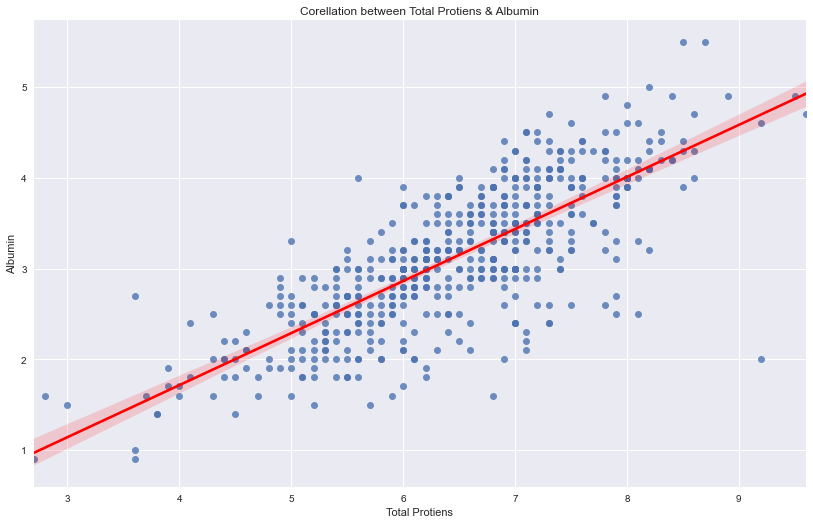

In [850]:
#plt.figure(figsize=(15,12))
lmplotTProtiensNAlbumin = sns.lmplot(x='Total_Protiens',y='Albumin',data=liver_df,height=7, aspect=1.6, line_kws={'color': 'red'})
lmplotTProtiensNAlbumin.set(xlabel="Total Protiens",ylabel="Albumin") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel
#plt.xlim(0,250) #setting lower bound of x axis as 0 and upper bound as 250.
#plt.ylim(0,250) #setting lower bound of y axis as 0 and upper bound as 250.
plt.title('Corellation between Total Protiens & Albumin')
plt.show()

#### Viewing Pearsons correlation between Total Protiens & Albumin

In [851]:
coor, p_value = pearsonr(liver_df['Total_Protiens'], liver_df['Albumin']) 
print('Pearsons correlation between Total Protiens & Albumin  %.3f' % coor+' and p-value: {}'.format(p_value)) 

#coor, p_value = pearsonr(df['Albumin'], df['Albumin_and_Globulin_Ratio']) 
#print('Pearsons correlation: %.3f' % coor + "and p-value: {}".format(p_value)) 


Pearsons correlation between Total Protiens & Albumin  0.784 and p-value: 8.711597342630112e-119


<p style="color:#CC5500;"> 
    There is a positive, <b> strong correlation </b> between the two features namely <b>Total Protiens </b> and <b> Albumin </b> of the dataset. 
</p>

### Coorelation between Albumin and Globulin Ratio & Albumin

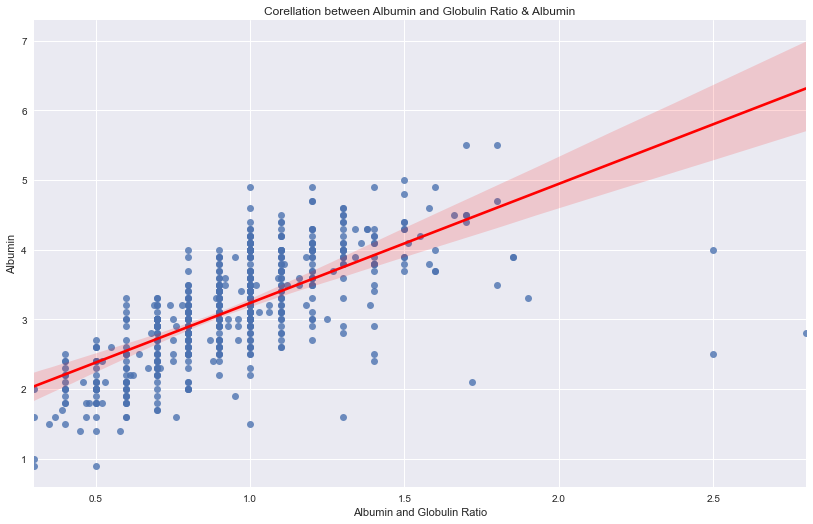

In [852]:
#plt.figure(figsize=(15,12))
lmplotAlbuminNGRNA = sns.lmplot(x='Albumin_and_Globulin_Ratio',y='Albumin',data=liver_df,height=7, aspect=1.6, line_kws={'color': 'red'})
lmplotAlbuminNGRNA.set(xlabel="Albumin and Globulin Ratio",ylabel="Albumin") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel
plt.title('Corellation between Albumin and Globulin Ratio & Albumin')
plt.show()

#### Viewing Pearsons correlation between Albumin and Globulin Ratio & Albumin

In [853]:
corr, p_value = pearsonr(liver_df['Albumin_and_Globulin_Ratio'], liver_df['Albumin']) 
print('Pearsons correlation between Albumin and Globulin Ratio & Albumin %.3f' % corr +' and p-value: {}'.format(p_value) ) 

Pearsons correlation between Albumin and Globulin Ratio & Albumin 0.687 and p-value: 2.1793959764618003e-80


<p style="color:#CC5500;"> 
    There is a positive, <b> strong correlation </b> between the two features namely <b>Albumin</b> and <b>  Albumin and Globulin Ratio </b> of the dataset. 
</p>

### Coorelation between Total_Protiens and Albumin and Globulin Ratio (View)

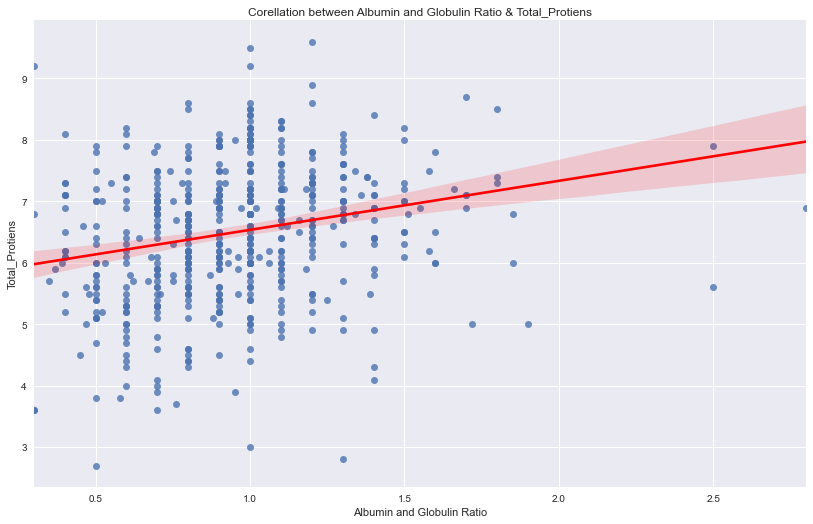

In [854]:
#plt.figure(figsize=(15,12))
lmplotAlbuminNGRNA = sns.lmplot(x='Albumin_and_Globulin_Ratio',y='Total_Protiens',data=liver_df,height=7, aspect=1.6, line_kws={'color': 'red'})
lmplotAlbuminNGRNA.set(xlabel="Albumin and Globulin Ratio",ylabel="Total_Protiens") #defining label for x-axis by defining xlabel and defining label for y-axis by defining ylabel
plt.title('Corellation between Albumin and Globulin Ratio & Total_Protiens')
plt.show()

#### Viewing Pearsons correlation between Total Protiens & Albumin and Globulin Ratio (View)

In [855]:
corr, p_value = pearsonr(liver_df['Albumin_and_Globulin_Ratio'], liver_df['Total_Protiens']) 
print('Pearsons correlation between Albumin and Globulin Ratio & Total_Protiens %.3f' % corr +' and p-value: {}'.format(p_value) ) 

Pearsons correlation between Albumin and Globulin Ratio & Total_Protiens 0.235 and p-value: 1.6291299405240473e-08


<p style="color:#CC5500;"> 
    There is a <b> moderate correlation </b> between the two features namely <b>Total Protiens </b> & <b>  Albumin and Globulin Ratio </b> of the dataset. 
</p>

<b><a href="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html">Note:</a></b>

<ul>
    <li> +1.0 : Perfect positive + association </li>
    <li> +0.8 to 1.0 : Very strong + association </li>
    <li> +0.6 to 0.8 : Strong + association </li>
    <li> +0.4 to 0.6 : Moderate + association </li>
    <li> +0.2 to 0.4 : Weak + association </li>
    <li> 0.0 to +0.2 : Very weak + or no association </li>
    <li> 0.0 to -0.2 : Very weak - or no association </li>
    <li> -0.2 to –0.4 : Weak - association </li>
    <li> -0.4 to -0.6 : Moderate - association </li>
    <li> -0.6 to -0.8 : Strong - association </li>
    <li> -0.8 to -1.0 : Very strong - association </li>
    <li> -1.0 : 	Perfect negative association </li>
</ul>

### Verdict from the correlation plots

<b>Conclusion</b>
    <ul>
        <li>There is a positive, <b> strong correlation </b> between the two features namely <b> Total Bilirubin </b> and <b> Direct Bilirubin </b> of the dataset.</li>
        <li>There is a positive, <b> strong correlation </b> between the two features namely <b> Alamine Aminotransferase </b> and <b> Aspartate Aminotransferase </b> of the dataset. </li>
        <li>There is a positive, <b> strong correlation </b> between the two features namely <b>Total Protiens </b> and <b> Albumin </b> of the dataset.</li>
        <li>There is a positive, <b> strong correlation </b> between the two features namely <b>Albumin</b> and <b>  Albumin and Globulin Ratio </b> of the dataset. </li>
    </ul>

## 3D scatter plot which represents the age of patients with Direct Bilirubin and Total Bilirubin as per their gender

In [856]:
fig = px.scatter_3d(liver_df,x='Age',y='Direct_Bilirubin',z='Total_Bilirubin',color='Gender')
fig.update_layout(title="Age v/s Direct_Bilirubin v/s Total_Bilirubin",title_x=0.5)

## 3D scatter plot which represents the age of patients with Alkaline Phosphotase and Alamine Aminotransferase as per their gender

In [857]:
fig = px.scatter_3d(liver_df,x='Age',y='Alkaline_Phosphotase',z='Alamine_Aminotransferase',color='Gender')
fig.update_layout(title="Age v/s Alkaline_Phosphotase v/s Alamine_Aminotransferase",title_x=0.5)

## 3D scatter plot which represents the age of patients with Total Protiens and Albumin and Globulin Ratio as per their gender

In [858]:
fig = px.scatter_3d(liver_df,x='Age',y='Total_Protiens',z='Albumin_and_Globulin_Ratio',color='Gender')
fig.update_layout(title="Age v/s Total_Protiens v/s Albumin_and_Globulin_Ratio",title_x=0.5)

## 3D scatter plot which represents the age of patients with Albumin and Aspartate Aminotransferase as per their gender

In [859]:
fig = px.scatter_3d(liver_df,x='Age',y='Albumin',z='Aspartate_Aminotransferase',color='Gender')
fig.update_layout(title="Age v/s Albumin v/s Aspartate_Aminotransferase",title_x=0.5)

## Dealing with the outliers

## Making copy of the dataframe

In [526]:
ml_df_liver = df_liver
ml_df_liver

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[583 rows x 11 columns]

<AxesSubplot:xlabel='Dataset', ylabel='Direct_Bilirubin'>

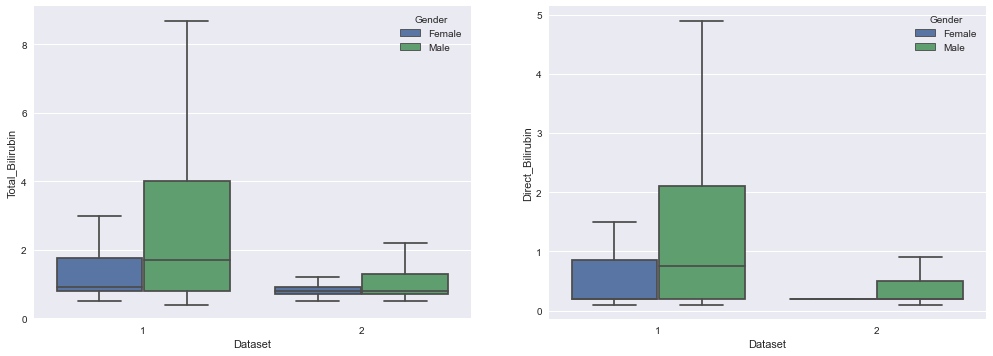

In [861]:
f, axes = plt.subplots(1, 2, figsize = (15, 6))
f.tight_layout(pad = 5)
sns.boxplot(x = "Dataset", y = "Total_Bilirubin", hue = "Gender", data = ml_df_liver, orient = 'v', ax = axes[0], showfliers = False)
sns.boxplot(x = "Dataset", y = "Direct_Bilirubin", hue = "Gender", data = ml_df_liver, orient = 'v', ax = axes[1], showfliers = False)

<AxesSubplot:xlabel='Dataset', ylabel='Albumin_and_Globulin_Ratio'>

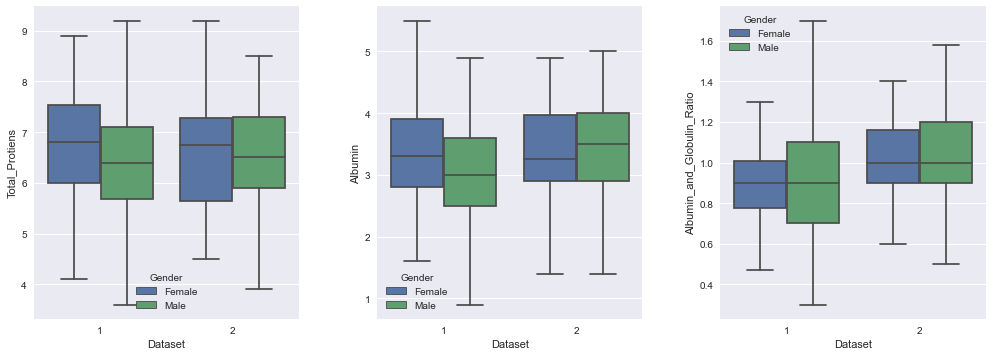

In [864]:
f, axes = plt.subplots(1, 3, figsize = (15, 6))
f.tight_layout(pad = 5)
sns.boxplot(x = "Dataset", y = "Total_Protiens", hue = "Gender", data = ml_df_liver, orient = 'v', ax = axes[0], showfliers = False)
sns.boxplot(x = "Dataset", y = "Albumin", hue = "Gender", data = ml_df_liver, orient = 'v', ax = axes[1], showfliers = False)
sns.boxplot(x = "Dataset", y = "Albumin_and_Globulin_Ratio", hue = "Gender", data = ml_df_liver, orient = 'v', ax = axes[2], showfliers = False)

<AxesSubplot:xlabel='Dataset', ylabel='Alkaline_Phosphotase'>

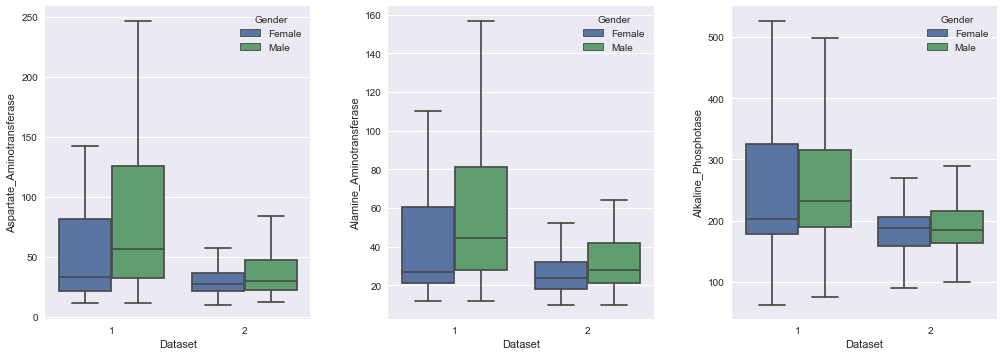

In [865]:
f, axes = plt.subplots(1, 3, figsize = (15, 6))
f.tight_layout(pad = 5)
sns.boxplot(x = "Dataset", y = "Aspartate_Aminotransferase", hue = "Gender", data = ml_df_liver, orient = 'v', ax = axes[0], showfliers = False)
sns.boxplot(x = "Dataset", y = "Alamine_Aminotransferase", hue = "Gender", data = ml_df_liver, orient = 'v', ax = axes[1], showfliers = False)
sns.boxplot(x = "Dataset", y = "Alkaline_Phosphotase", hue = "Gender", data = ml_df_liver, orient = 'v', ax = axes[2], showfliers = False)

## Machine learning models analysis

<p> Here, the prediction is being carried out in order to determine if the patient has an unhealthy Liver or not. Hence, the Outcome will be the <b>y label </b>and rest of the data will be the <b>X</b> or the input data.</p> 

In [468]:
df_liver

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[583 rows x 11 columns]

### Making copy of the DataFrame

In [469]:
#ml_df_liver = df_liver
#ml_df_liver

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[583 rows x 11 columns]

In [470]:
## Duplicating the rows in the DataFrame

In [471]:
#ml_df_liver = pd.concat([ml_df_liver]*2, ignore_index=True)
#ml_df_liver

### Dropping null values from the dataset

In [472]:
ml_df_liver = ml_df_liver.dropna() #Dropping the null values
ml_df_liver

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[579 rows x 11 columns]

### Converting Gender to Binary i.e. F:0 and M:1 and creating a new column called Gender_Binary

In [473]:
ml_df_liver['Gender_Binary'] = ml_df_liver['Gender'].apply(lambda x:0 if x=="Female" else 1) #using lambda function, if x=="Female" then return value as 1 else return 0.
ml_df_liver.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Binary  
0      3.3                        0.90        1              0  
1      3.2                        0.74        1              1  
2      3.3                        0.89        1              1  
3      3.4                        1.00        1              1  
4      2.4                        0.40        1              1

### Dropping column Gender

In [474]:
ml_df_liver = ml_df_liver.drop(columns=['Gender'])
ml_df_liver.head()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Binary  
0      3.3                        0.90        1              0  
1      3.2                        0.74        1              1  
2      3.3                        0.89        1              1  
3      3.4                        1.00        1              1  
4      2.4                        0.40        1              1

### Data except the outcome (Dataset) column in x

In [475]:
x = ml_df_liver.drop(columns=['Dataset'])
x.head()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Gender_Binary  
0      3.3                        0.90              0  
1      3.2                        0.74              1  
2      3.3                        0.89              1  
3      3.4                        1.00              1  
4      2.4                        0.40              1

### Data of the outcome (Dataset) column in y

In [476]:
y = ml_df_liver["Dataset"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

### Splitting data into training and testing state

In [477]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #Train: 80%, Test: 20%

#### Viewing the number of data present in training test and testing set

In [478]:
len(x_train), len(x_test)

(463, 116)

### StandardScalar

In [479]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<p> StandardScalar transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. </p>
<p>Standardize features by removing the mean and scaling to unit variance.</p>
<br>
<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"> For more information click here!!! </a>
<br>
<br>
<a href="https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02"> For detailed information clieck here!!! </a>

### Logistic Regression

In [480]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [481]:
LogisticRegressionScore = lr.score(x_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 65.51724137931035


#### Confusion Matrix of Logistic Regression

Text(0.5, 1.03, 'Confusion Matrix for Logistic Regression')

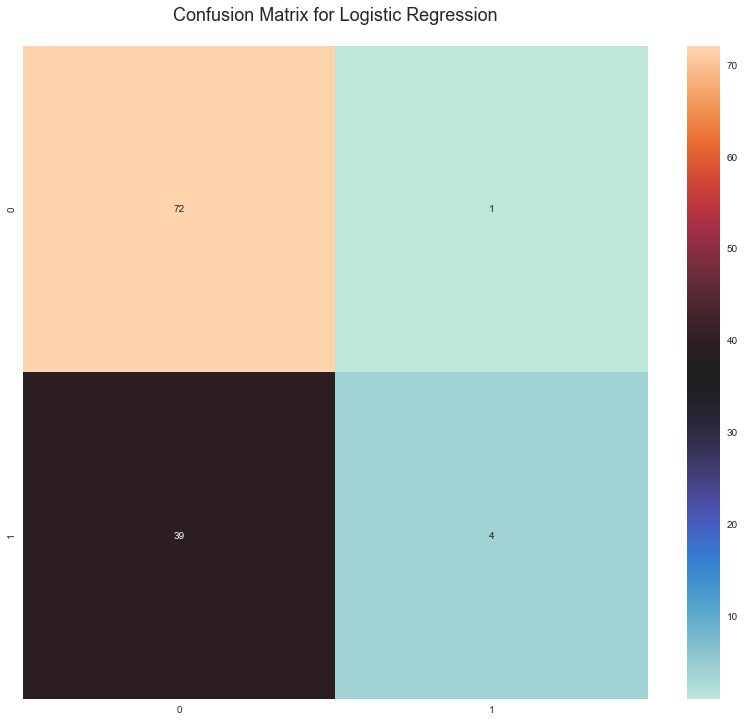

In [482]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_lr = lr.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(14,12)) 
sns.heatmap(cf_matrix, annot=True, cmap="icefire")
plt.title("Confusion Matrix for Logistic Regression", fontsize=18, y=1.03)

#### Classification report of Logistic Regression

In [483]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       0.65      0.99      0.78        73
           2       0.80      0.09      0.17        43

    accuracy                           0.66       116
   macro avg       0.72      0.54      0.47       116
weighted avg       0.70      0.66      0.55       116



### Random Forest Classifier

In [484]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [485]:
RandomForestClassifierScore = rfc.score(x_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 62.93103448275862


#### Confusion Matrix of Random Forest Classifier

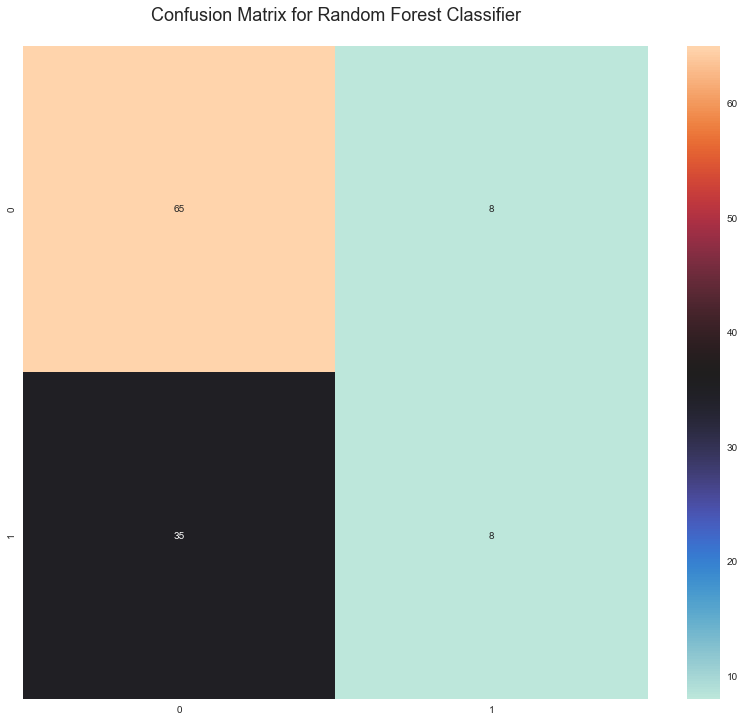

In [486]:
y_pred_rfc = rfc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(14,12)) 
sns.heatmap(cf_matrix, annot=True, cmap="icefire")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=18,y=1.03);

#### Classification report of Random Forest Classifier

In [487]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.65      0.89      0.75        73
           2       0.50      0.19      0.27        43

    accuracy                           0.63       116
   macro avg       0.57      0.54      0.51       116
weighted avg       0.59      0.63      0.57       116



### K Neighbors Classifier

In [488]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [489]:
KNeighborsClassifierScore = knn.score(x_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 63.793103448275865


#### Confusion matrix of K Neighbors Classifier

Text(0.5, 1.03, 'Confusion Matrix for K Neighbors Classifier')

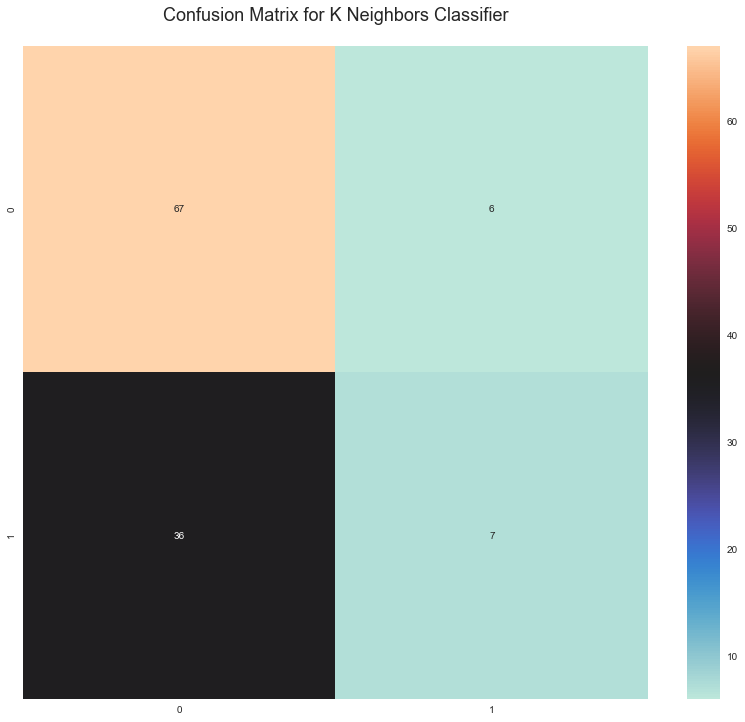

In [490]:
y_pred_knn = knn.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(14,12)) 
sns.heatmap(cf_matrix, annot=True, cmap="icefire")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=18, y=1.03)

#### Classification report of K Neighbors Classifier

In [491]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.65      0.89      0.75        73
           2       0.50      0.19      0.27        43

    accuracy                           0.63       116
   macro avg       0.57      0.54      0.51       116
weighted avg       0.59      0.63      0.57       116



### Decision Tree Classifier

In [492]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [493]:
DecisionTreeClassifierScore = dtc.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 60.3448275862069


#### Confusion matrix of Decision Tree Classifier

Text(0.5, 1.03, 'Confusion Matrix for Decision Tree Classifier')

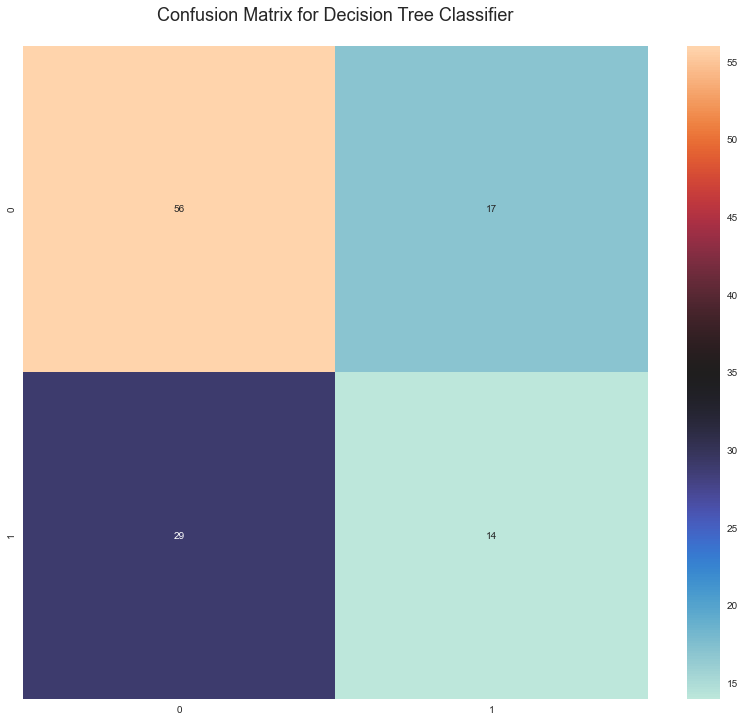

In [494]:
y_pred_dtc = dtc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(14,12)) 
sns.heatmap(cf_matrix, annot=True, cmap="icefire")
plt.title("Confusion Matrix for Decision Tree Classifier", fontsize=18, y=1.03)

#### Classification Report of Decision Tree Classifier

In [495]:
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       0.66      0.77      0.71        73
           2       0.45      0.33      0.38        43

    accuracy                           0.60       116
   macro avg       0.56      0.55      0.54       116
weighted avg       0.58      0.60      0.59       116



### Cat Boost Classifier

In [496]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 0.6125843	total: 1.1ms	remaining: 9.9ms
1:	learn: 0.5682126	total: 2.09ms	remaining: 8.36ms
2:	learn: 0.5270070	total: 3ms	remaining: 7.01ms
3:	learn: 0.5019780	total: 3.97ms	remaining: 5.96ms
4:	learn: 0.4824634	total: 5.05ms	remaining: 5.05ms
5:	learn: 0.4664118	total: 6.2ms	remaining: 4.13ms
6:	learn: 0.4566534	total: 7.12ms	remaining: 3.05ms
7:	learn: 0.4498974	total: 8.08ms	remaining: 2.02ms
8:	learn: 0.4332934	total: 9.28ms	remaining: 1.03ms
9:	learn: 0.4281051	total: 10.4ms	remaining: 0us


In [497]:
CatBoostClassifierScore = cat.score(x_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Accuracy obtained by CatBoost Classifier model: 66.37931034482759


#### Confusion matrix of Cat Boost Classifier

Text(0.5, 1.03, 'Confusion Matrix for CatBoost Classifier')

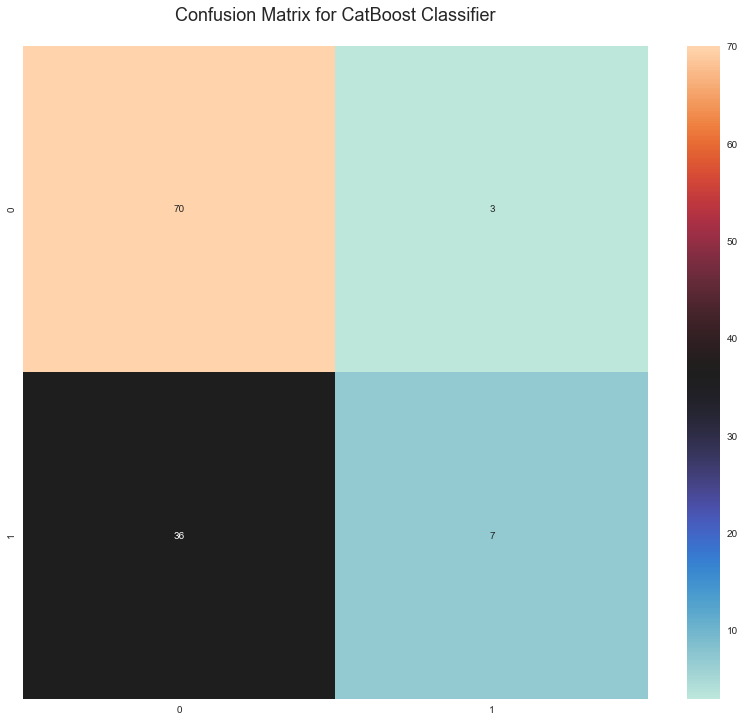

In [498]:
y_pred_cat = cat.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(14,12))
sns.heatmap(cf_matrix, annot=True, cmap="icefire")
plt.title("Confusion Matrix for CatBoost Classifier", fontsize=18, y=1.03)

#### Classification Report of Cat Boost Classifier

In [499]:
print(metrics.classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           1       0.66      0.96      0.78        73
           2       0.70      0.16      0.26        43

    accuracy                           0.66       116
   macro avg       0.68      0.56      0.52       116
weighted avg       0.68      0.66      0.59       116



### Gradient Boosting Classifier

In [500]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [501]:
GradientBoostingClassifierScore = gb.score(x_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 69.82758620689656


#### Confusion matrix Gradient Boosting Classifier

Text(0.5, 1.03, 'Confusion Matrix for Gradient Boosting Classifier')

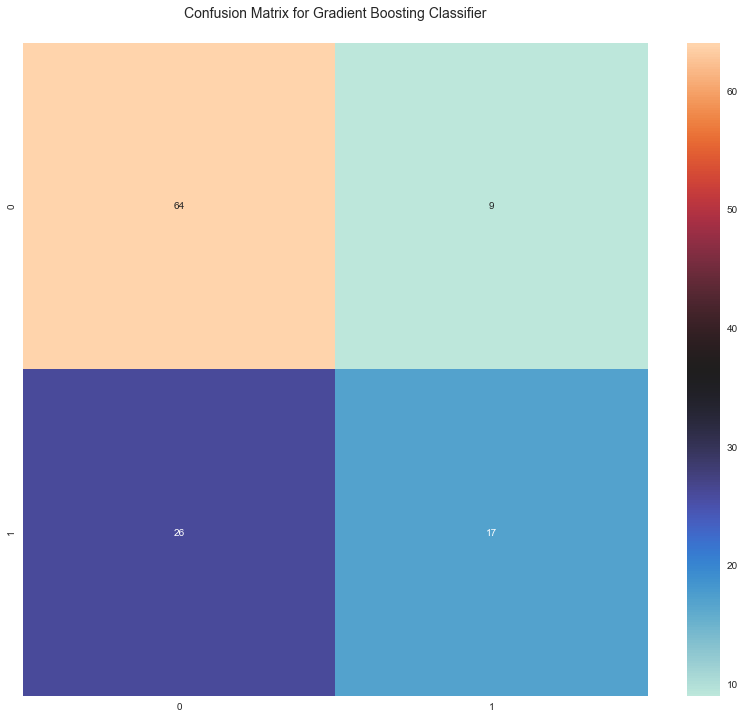

In [502]:
y_pred_gb = gb.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(14,12))
sns.heatmap(cf_matrix, annot=True, cmap="icefire")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, y=1.03)

#### Classification Report of Gradient Boosting Classifier

In [503]:
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           1       0.71      0.88      0.79        73
           2       0.65      0.40      0.49        43

    accuracy                           0.70       116
   macro avg       0.68      0.64      0.64       116
weighted avg       0.69      0.70      0.68       116



### Comparison between the models as per the accuracy

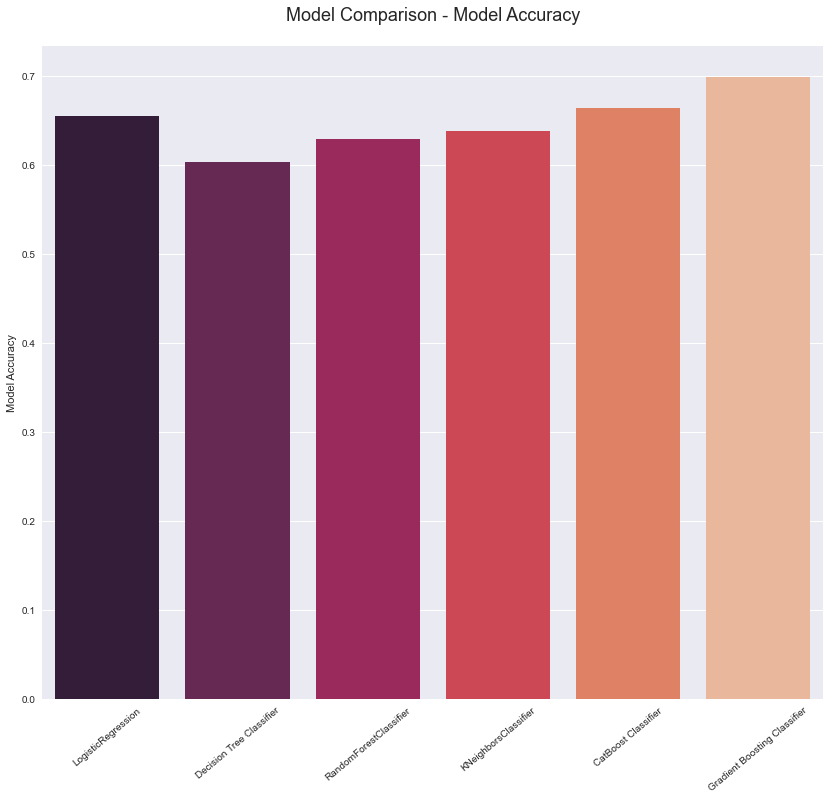

In [504]:
plt.style.use("seaborn")

x = ["LogisticRegression", 
     "Decision Tree Classifier", 
     "RandomForestClassifier", 
     "KNeighborsClassifier", 
     "CatBoost Classifier", 
     "Gradient Boosting Classifier"]

y = [LogisticRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore, 
     CatBoostClassifierScore, 
     GradientBoostingClassifierScore]

fig, ax = plt.subplots(figsize=(14,12))
sns.barplot(x=x,y=y, palette="rocket");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=18, y=1.03);

<p style="font-family:Arial Black;"> The above bar graph shows that Logistic Regression, CatBoost Classifier and Gradient Boosting Classifier perform the best on the test set. </p>

### Hyperparameter Tuning on Logistic Regression

In [506]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
      "penalty": ["l1", "l2", "elastic", "none" ],
      "C" : np.logspace(-4, 4, 20),
      "solver" : ["sag", "saga", "lbfgs", "liblinear", "newton-cg"],
      "max_iter" : [100, 1000, 2500, 5000]
    }
]

grid_search_lr = GridSearchCV(estimator = lr, 
                              param_grid = param_grid, 
                              cv = 5, 
                              n_jobs = -1, 
                              verbose = True)

In [507]:
grid_search_lr.fit(x_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elastic', 'none'],
                          'solver': ['sag', 'saga', 'lbfgs', 'liblinear',
                                     'newton-cg']}],
             verbose=True)

In [508]:
grid_search_lr.best_score_

0.7517999064983637

In [509]:
grid_search_lr_predict = grid_search_lr.predict(x_test)

In [515]:
print('Improvement in Logistic Regression after GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_lr.best_score_ - LogisticRegressionScore) / LogisticRegressionScore))

Improvement in Logistic Regression after GridSearchCV: 14.75%.


### Comparing the results after the improvement in Logistic Regression

Text(0.5, 1.03, 'Logistic Regression  vs  GridSearched Logistic Regression')

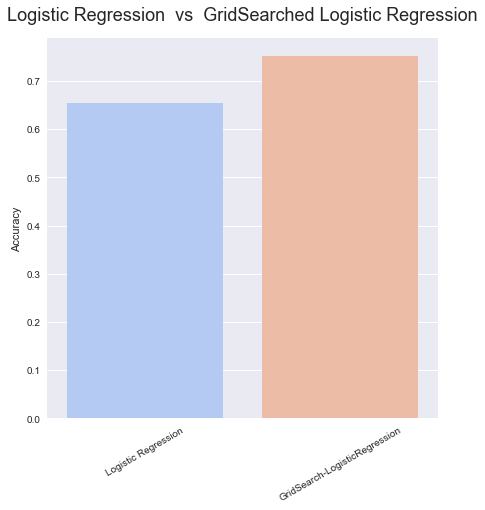

In [521]:
plt.style.use("seaborn")

x = ["Logistic Regression",
     "GridSearch-LogisticRegression"]

y = [LogisticRegressionScore,
     grid_search_lr.best_score_]

fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x=x,y=y, palette="coolwarm")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.title("Logistic Regression  vs  GridSearched Logistic Regression", fontsize=18, y=1.03)

### Comparing the GridSearch-Logistic Regression and Gradient Boosting Classifier 

Text(0.5, 1.03, 'Gradient Boosting Classifier  vs  GridSearched Logistic Regression')

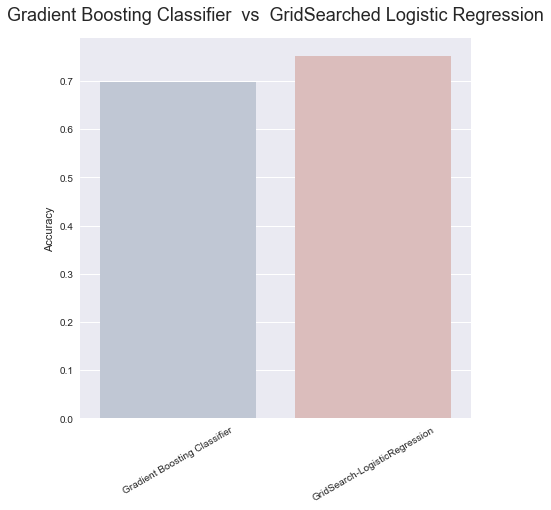

In [522]:
plt.style.use("seaborn")

x = ["Gradient Boosting Classifier",
     "GridSearch-LogisticRegression"]

y = [GradientBoostingClassifierScore,
     grid_search_lr.best_score_]

fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x=x,y=y, palette="vlag")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.title("Gradient Boosting Classifier  vs  GridSearched Logistic Regression", fontsize=18, y=1.03)

<p> After Hyperparameter tuning Logistic Regression model performs even better than the Gradient Boosting Classifier which was not the case before! </p>

### Classification Report of GridSearch-LogisticRegression

In [513]:
print(classification_report(y_test, grid_search_lr_predict))

              precision    recall  f1-score   support

           1       0.66      0.95      0.78        73
           2       0.67      0.19      0.29        43

    accuracy                           0.66       116
   macro avg       0.67      0.57      0.54       116
weighted avg       0.66      0.66      0.60       116

